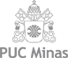
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 01_Coleta_Processamento.ipynb

<B>Data:</B> 10/10/2021
    
<B>Objetivo:</B>
    
<B>Bibliotecas:</B>  sys,pandas, numpy,matplotlib,BeautifulSoup,bs4,urllib,minhas_funcoes
<a class="anchor" id="etapas"></a>
## Indice

1. [Coleta de Dados](#dados)<br>
  &emsp;1.1 [Baixados](#csv)<br>
  &emsp;&emsp;1.1.1 [OLIST](#olist)<br>
  &emsp;&emsp;1.1.2 [PIB(IBGE)](#ibge)<br>
  &emsp;&emsp;1.1.3 [CEPs](#ceps)<br>
  &emsp;&emsp;1.1.4 [Área dos Municipios](#amun)<br>
  &emsp;1.2 [Web Scraping](#web)<br>
  &emsp;&emsp;1.2.1 [Capitais dos Estados](#wiki)<br>
  &emsp;&emsp;1.2.2 [Feriados Nacionais, Estaduais e Datas Comemorativas](#fdc)<br>
2. [Processamento/Tratamentos](#protrata)<br> 
  &emsp;2.1 [Criação do dataFrame df_OLIST](#cdo)<br>
  &emsp;&emsp;2.1.1 [Itens](#miten)<br>
  &emsp;&emsp;2.1.2 [Merge:Pedidos](#mpi)<br>
  &emsp;&emsp;2.1.3 [Merge:Avaliações](#mpa)<br>
  &emsp;&emsp;2.1.4 [Merge:Pagamentos](#pagat)<br>
  &emsp;&emsp;&emsp;2.1.4.1 [Categórica p/ numérica:payment_type](#catepay)<br>
  &emsp;&emsp;2.1.5 [Merge:Clientes](#loc)<br>
  &emsp;&emsp;2.1.6 [Merge:Produtos](#pro)<br>
  &emsp;&emsp;2.1.7 [Merge:Vendedores](#mvl)<br> 
  &emsp;&emsp;2.1.8 [Merge:Localizações](#locm)<br> 
  &emsp;2.2 [Criação do dataFrame df_PIB_Cap_Area](#pic)<br>
  &emsp;&emsp;2.2.1 [PIB](#pib)<br>
  &emsp;&emsp;2.2.2 [Capitais](#capi)<br>
  &emsp;2.3 [Merge Final:df_OLIST, df_PIB_Cap_Area e df_datas](#mfim)<br>
  &emsp;2.4 [Tratamentos de Dados](#trat)<br>
  &emsp;&emsp;2.4.1 [Ausentes](#ause)<br>
  &emsp;&emsp;2.4.2 [Inconsistentes](#inco)<br>
  &emsp;&emsp;2.4.3 [Duplicados](#dupli)<br>
  &emsp;&emsp;2.4.4 [Eliminando features desnecessárias](#efd)<br>
  &emsp;&emsp;2.4.5 [Renomeando algumas features](#raf)<br>
  &emsp;&emsp;2.4.6 [Conversão de tipos](#tra)<br>
  &emsp;&emsp;2.4.7 [Features categóricas](#featcat)<br>
  &emsp;&emsp;2.4.8 [Features categóricas para numéricas](#fcpn)<br>
  &emsp;2.5 [Análise e Tratamento dos Outliers](#arout)<br>
  &emsp;&emsp;2.5.1 [Features Numéricas](#featnum)<br>
  &emsp;2.6 [Feature Engineering](#feaeng)<br>
  &emsp;2.7 [Analytic Base Table(ABT)](#abt)<br>
  &emsp;&emsp;2.7.1 [Feature engineering adicional](#maisfe)<br>

## <a class="anchor" id="dados">1. Coleta de Dados</a>


In [1]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%whos

Interactive namespace is empty.


In [3]:

#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install urllib3
#pip install beautifulsoup4
#pip install bs4
#!pip install pyOD

In [4]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

#import datetime
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from datetime import datetime

import bs4
import urllib.request as urllib_request

from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4            import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.error   import URLError, HTTPError
from pathlib        import Path
from scipy          import stats
from scipy.stats    import normaltest, kstest, norm

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

## <a class="anchor" id="csv">1.1 Baixados</a>
[Retorna ao Indice](#etapas)

## <a class="anchor" id="olist">1.1.1 OLIST</a>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;"> https://www.kaggle.com/olistbr/marketing-funnel-olist Baixados em: 11/10/2021</p>

In [5]:

df_pedidos = pd.read_csv(caminho+'olist_orders_dataset.csv',sep=',', decimal=".", thousands=",",
                           parse_dates=['order_purchase_timestamp', 
                               'order_approved_at', 
                               'order_delivered_carrier_date', 
                               'order_delivered_customer_date', 
                               'order_estimated_delivery_date'])

df_produtos = pd.read_csv(caminho+'olist_products_dataset.csv', sep=',', decimal=".", thousands=",")
df_pedidos_itens = pd.read_csv(caminho+'olist_order_items_dataset.csv',sep=',', decimal=".", thousands=",",
                            parse_dates=['shipping_limit_date']  )
df_clientes = pd.read_csv(caminho+'olist_customers_dataset.csv',sep=',', decimal=".", thousands="," )
df_pagamentos = pd.read_csv(caminho+'olist_order_payments_dataset.csv',sep=',', decimal=".", thousands="," )
df_vendedores = pd.read_csv(caminho+'olist_sellers_dataset.csv',sep=',', decimal=".", thousands="," )
df_localizacoes = pd.read_csv(caminho+'olist_geolocation_dataset.csv',sep=',', decimal=".", thousands="," )
df_avaliacoes = pd.read_csv(caminho+'olist_order_reviews_dataset.csv',sep=',', decimal=".", thousands=",",
                            parse_dates=['review_creation_date','review_answer_timestamp']   )
#não será utilizado pois converte do portugues p/ ingles as categorias de produtos
#df_produtos_categorias = pd.read_csv(caminho+'product_category_name_translation.csv', na_values=["?"],sep=',', decimal='.')
   

In [6]:
#Cria tabela onde informações de cada dataframe utilizado:número de registros, número de registros duplicados,
#número de registros duplicados(%), número de registros ausentes e número de registros ausentes(%), ficam registrados.
df_dataframes = pd.DataFrame({})

## <a class="anchor" id="ibge">1.1.2 PIB(IBGE)</a>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Utilizado PIB per Capita por município obtida no site do IBGE:https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html
Acesso em: 29/11/2021</p>

In [7]:
df_PIB = pd.read_excel(caminho+'PIB_Municipios_2017.xlsx')

In [8]:
df_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 42 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Código da Grande Região                                                                                                                            5570 non-null   int64  
 1   Nome da Grande Região                                                                                                                              5570 non-null   object 
 2   Código da Unidade da Federação                                                                                                                     5570 non-null   int64  
 3   Sigla da

In [9]:
df_aux=mf.Resumo_DataFrame(df_PIB)
df_aux

Colunas  Nulos  Total de nulos  \
0                             Código da Grande Região      0            0.00   
1                               Nome da Grande Região      0            0.00   
2                      Código da Unidade da Federação      0            0.00   
3                       Sigla da Unidade da Federação      0            0.00   
4                        Nome da Unidade da Federação      0            0.00   
5                                 Código do Município      0            0.00   
6                                   Nome do Município      0            0.00   
7                                Região Metropolitana   4181           75.06   
8                               Código da Mesorregião      0            0.00   
9                                 Nome da Mesorregião      0            0.00   
10                             Código da Microrregião      0            0.00   
11                               Nome da Microrregião      0            0.00   
12               Código da Região Geográfica Imediata      0            0.00   
13                 Nome da Região Geográfica Imediata      0            0.00   
14            Município da Região Geográfica Imediata      0            0.00   
15          Código da Região Geográfica Intermediária      0            0.00   
16            Nome da Região Geográfica Intermediária      0            0.00   
17       Município da Região Geográfica Intermediária      0            0.00   
18                         Código Concentração Urbana   4910           88.15   
19                           Nome Concentração Urbana   4910           88.15   
20                           Tipo Concentração Urbana   4910           88.15   
21                        Código Arranjo Populacional   4614           82.84   
22                          Nome Arranjo Populacional   4614           82.84   
23                                  Hierarquia Urbana      0            0.00   
24          Hierarquia Urbana (principais categorias)      0            0.00   
25                             Código da Região Rural      0            0.00   
26                               Nome da Região Rural      0            0.00   
27     Região rural (segundo classificação do núcleo)      0            0.00   
28                                     Amazônia Legal      0            0.00   
29                                          Semiárido      0            0.00   
30                         Cidade-Região de São Paulo      0            0.00   
31  Valor adicionado bruto da Agropecuária, \na pr...      0            0.00   
32  Valor adicionado bruto da Indústria,\na preços...      0            0.00   
33  Valor adicionado bruto dos Serviços,\na preços...      0            0.00   
34  Valor adicionado bruto da Administração, defes...      0            0.00   
35  Valor adicionado bruto total, \na preços corre...      0            0.00   
36  Impostos, líquidos de subsídios, sobre produto...      0            0.00   
37  Produto Interno Bruto, \na preços correntes\n(...      0            0.00   
38  Produto Interno Bruto per capita, \na preços c...      0            0.00   
39         Atividade com maior valor adicionado bruto      0            0.00   
40  Atividade com segundo maior valor adicionado b...      0            0.00   
41  Atividade com terceiro maior valor adicionado ...      0            0.00   

    Total de unicos  Numero Registros     Tipo  
0                 5              5570    int64  
1                 5              5570   object  
2                27              5570    int64  
3                27              5570   object  
4                27              5570   object  
5              5570              5570    int64  
6              5298              5570   object  
7                81              5570   object  
8               137              5570    int64  
9               137              5570   object  
10              558              5570    int64  
11              5

In [10]:
df_PIB.head(5)

Código da Grande Região Nome da Grande Região  \
0                        1                 Norte   
1                        1                 Norte   
2                        1                 Norte   
3                        1                 Norte   
4                        1                 Norte   

   Código da Unidade da Federação Sigla da Unidade da Federação  \
0                              11                            RO   
1                              11                            RO   
2                              11                            RO   
3                              11                            RO   
4                              11                            RO   

  Nome da Unidade da Federação  Código do Município      Nome do Município  \
0                     Rondônia              1100015  Alta Floresta D'Oeste   
1                     Rondônia              1100023              Ariquemes   
2                     Rondônia              1100031                 Cabixi   
3                     Rondônia              1100049                 Cacoal   
4                     Rondônia              1100056             Cerejeiras   

  Região Metropolitana  Código da Mesorregião Nome da Mesorregião  \
0                  NaN                   1102   Leste Rondoniense   
1                  NaN                   1102   Leste Rondoniense   
2                  NaN                   1102   Leste Rondoniense   
3                  NaN                   1102   Leste Rondoniense   
4                  NaN                   1102   Leste Rondoniense   

   Código da Microrregião Nome da Microrregião  \
0                   11006               Cacoal   
1                   11003            Ariquemes   
2                   11008    Colorado do Oeste   
3                   11006               Cacoal   
4                   11008    Colorado do Oeste   

   Código da Região Geográfica Imediata Nome da Região Geográfica Imediata  \
0                                110005                             Cacoal   
1                                110002                          Ariquemes   
2                                110006                            Vilhena   
3                                110005                             Cacoal   
4                                110006                            Vilhena   

  Município da Região Geográfica Imediata  \
0                              do Entorno   
1                                    Polo   
2                              do Entorno   
3                                    Polo   
4                              do Entorno   

   Código da Região Geográfica Intermediária  \
0                                       1102   
1                                       1101   
2                                       1102   
3                                       1102   
4                                       1102   

  Nome da Região Geográfica Intermediária  \
0                               Ji-Paraná   
1                             Porto Velho   
2                               Ji-Paraná   
3                               Ji-Paraná   
4                               Ji-Paraná   

  Município da Região Geográfica Intermediária  Código Concentração Urbana  \
0                                   do Entorno                         NaN   
1                                   do Entorno                         NaN   
2                                   do Entorno                         NaN   
3                                   do Entorno                         NaN   
4                                   do Entorno                         NaN   

  Nome Concentração Urbana Tipo Concentração Urbana  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      NaN                      NaN   
3                      NaN                      NaN   
4                      NaN                      NaN   

  

In [11]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_PIB,'PIB-2017',['Nome do Município'])
df_dataframes

DataFrame  Numero de registros  Features  Duplicados  Duplicados(%)  \
0  PIB-2017                 5570        42         272           4.88   

   Ausentes  Ausentes(%)  
0      5164        92.71

## <a class="anchor" id="ceps">1.1.3 CEPs</a>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Página - CEPs -    
    Fonte:https://terminaldeinformacao.com/2019/01/12/tabela-com-lista-de-ceps-do-brasil Acesso em: 06/02/2022
    </p>

In [12]:
df_CEPS = pd.read_excel(caminho+'Lista_de_CEPs.xlsx')

In [13]:
df_CEPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6015 entries, 0 to 6014
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Estado         6015 non-null   object
 1   Localidade     6015 non-null   object
 2   Faixa de CEP   6015 non-null   object
 3   CEP Inicial    6015 non-null   int64 
 4   CEP Final      6015 non-null   int64 
 5   Situação       6015 non-null   object
 6   Tipo de Faixa  6015 non-null   object
dtypes: int64(2), object(5)
memory usage: 329.1+ KB


In [14]:
df_CEPS['Estado']=df_CEPS['Estado'].astype(str)
df_CEPS['Localidade']=df_CEPS['Localidade'].astype(str)
df_CEPS['Faixa de CEP']=df_CEPS['Faixa de CEP'].astype(str)

In [15]:
df_aux=mf.Resumo_DataFrame(df_CEPS)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  Numero Registros  \
0         Estado      0             0.0               27              6015   
1     Localidade      0             0.0             5295              6015   
2   Faixa de CEP      0             0.0             5800              6015   
3    CEP Inicial      0             0.0             5580              6015   
4      CEP Final      0             0.0             5797              6015   
5       Situação      0             0.0                3              6015   
6  Tipo de Faixa      0             0.0                2              6015   

     Tipo  
0  object  
1  object  
2  object  
3   int64  
4   int64  
5  object  
6  object

In [16]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_CEPS,'CEPs',['Localidade','Estado'])
df_dataframes

DataFrame  Numero de registros  Features  Duplicados  Duplicados(%)  \
0  PIB-2017                 5570        42         272           4.88   
1      CEPs                 6015         7         445           7.40   

   Ausentes  Ausentes(%)  
0      5164        92.71  
1         0         0.00

In [17]:
df_CEPS.duplicated('Faixa de CEP').value_counts()

False    5800
True      215
dtype: int64

In [18]:
df_CEPS.loc[df_CEPS['Faixa de CEP'].duplicated(keep=False)].sort_values(by='Faixa de CEP',ascending=True)

Estado    Localidade           Faixa de CEP  CEP Inicial  CEP Final  \
5772     SP     São Paulo  01000-001 a 05999-999      1000001    5999999   
5774     SP     São Paulo  01000-001 a 05999-999      1000001    5999999   
5569     SP        Osasco  06000-001 a 06299-999      6000001    6299999   
5568     SP        Osasco  06000-001 a 06299-999      6000001    6299999   
5251     SP   Carapicuíba  06300-001 a 06399-999      6300001    6399999   
...     ...           ...                    ...          ...        ...   
4240     RS  Cachoeirinha  94900-001 a 94999-999     94900001   94999999   
4420     RS       Lajeado  95900-001 a 95914-999     95900001   95914999   
4419     RS       Lajeado  95900-001 a 95914-999     95900001   95914999   
4537     RS    Rio Grande  96200-001 a 96224-999     96200001   96224999   
4536     RS    Rio Grande  96200-001 a 96224-999     96200001   96224999   

                        Situação             Tipo de Faixa  
5772  Codificado por logradouros        Total do município  
5774  Codificada por logradouros  Exclusiva da sede urbana  
5569  Codificada por logradouros  Exclusiva da sede urbana  
5568  Codificado por logradouros        Total do município  
5251  Codificado por logradouros        Total do município  
...                          ...                       ...  
4240  Codificada por logradouros  Exclusiva da sede urbana  
4420  Codificada por logradouros  Exclusiva da sede urbana  
4419  Codificado por logradouros        Total do município  
4537  Codificada por logradouros  Exclusiva da sede urbana  
4536  Codificado por logradouros        Total do município  

[430 rows x 7 columns]

In [19]:
df_CEPS = df_CEPS.drop_duplicates('Faixa de CEP', keep='last').reset_index(drop=True)

In [20]:
df_CEPS.duplicated('Faixa de CEP').value_counts()

False    5800
dtype: int64

In [21]:
df_CEPS.loc[df_CEPS['Faixa de CEP'].duplicated(keep=False)].sort_values(by='Faixa de CEP',ascending=True)

Empty DataFrame
Columns: [Estado, Localidade, Faixa de CEP, CEP Inicial, CEP Final, Situação, Tipo de Faixa]
Index: []

In [22]:
df_CEPS['Localidade'] = df_CEPS['Localidade'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_CEPS['Localidade'] = df_CEPS['Localidade'].apply(lambda z: z.lower())
df_CEPS['Localidade'] = df_CEPS['Localidade'].apply(mf.trocar_caracteres)

In [23]:
#Atualizando nome dos municipios
df_CEPS['Localidade'] = df_CEPS['Localidade'].apply(lambda x:x.replace('mogi guacu','mogi-guacu') )
df_CEPS['Localidade'] = df_CEPS['Localidade'].apply(lambda x:x.replace("santa barbara d'oeste","santa barbara doeste") )

In [24]:
df_CEPS['municipio_UF'] = df_CEPS['Localidade'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_CEPS['municipio_UF'] = df_CEPS['municipio_UF'].apply(lambda z: z.upper())
df_CEPS['municipio_UF'] = df_CEPS['municipio_UF'].apply(mf.trocar_caracteres)
df_CEPS['municipio_UF'] = df_CEPS['municipio_UF']+' - '+df_CEPS['Estado'].str.upper()

In [25]:
df_CEPS.sort_values(by='CEP Inicial',ascending=True)

Estado           Localidade           Faixa de CEP  CEP Inicial  \
5572     SP            sao paulo  01000-001 a 05999-999      1000001   
5389     SP               osasco  06000-001 a 06299-999      6000001   
5108     SP          carapicuiba  06300-001 a 06399-999      6300001   
5045     SP              barueri  06400-001 a 06499-999      6400001   
5540     SP  santana de parnaiba  06500-001 a 06549-999      6500001   
...     ...                  ...                    ...          ...   
4186     RS              charrua  99960-000 a 99964-999     99960000   
4076     RS           agua santa  99965-000 a 99969-999     99965000   
4191     RS              ciriaco  99970-000 a 99979-999     99970000   
4210     RS      david canabarro  99980-000 a 99989-999     99980000   
4354     RS            muliterno  99990-000 a 99999-999     99990000   

      CEP Final                        Situação             Tipo de Faixa  \
5572    5999999      Codificada por logradouros  Exclusiva da sede urbana   
5389    6299999      Codificada por logradouros  Exclusiva da sede urbana   
5108    6399999      Codificada por logradouros  Exclusiva da sede urbana   
5045    6499999      Codificada por logradouros  Exclusiva da sede urbana   
5540    6549999      Codificada por logradouros  Exclusiva da sede urbana   
...         ...                             ...                       ...   
4186   99964999  Não codificada por logradouros        Total do município   
4076   99969999  Não codificada por logradouros        Total do município   
4191   99979999  Não codificada por logradouros        Total do município   
4210   99989999  Não codificada por logradouros        Total do município   
4354   99999999  Não codificada por logradouros        Total do município   

                  municipio_UF  
5572            SAO PAULO - SP  
5389               OSASCO - SP  
5108          CARAPICUIBA - SP  
5045              BARUERI - SP  
5540  SANTANA DE PARNAIBA - SP  
...                        ...  
4186              CHARRUA - RS  
4076           AGUA SANTA - RS  
4191              CIRIACO - RS  
4210      DAVID CANABARRO - RS  
4354            MULITERNO - RS  

[5800 rows x 8 columns]

In [26]:
df_CEPS[df_CEPS['Localidade'] == 'mogi-guacu' ]

Estado  Localidade           Faixa de CEP  CEP Inicial  CEP Final  \
5344     SP  mogi-guacu  13840-001 a 13856-999     13840001   13856999   
5345     SP  mogi-guacu  13840-001 a 13855-999     13840001   13855999   

                        Situação             Tipo de Faixa     municipio_UF  
5344  Codificado por logradouros        Total do município  MOGI-GUACU - SP  
5345  Codificada por logradouros  Exclusiva da sede urbana  MOGI-GUACU - SP

## <a class="anchor" id="amun">1.1.4 Área dos Municipios</a>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Página - Área dos municipios -    
    Fonte:https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15761-areas-dos-municipios.html?edicao=24050&t=downloads Acesso em: 18/02/2022
    </p>

In [27]:
df_area_munic = pd.read_excel(caminho+'AR_BR_RG_UF_MES_MIC_MUN_2017.xls',sheet_name='AR_BR_MUN_2017',skipfooter=3)

In [28]:
df_area_munic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5572 non-null   int64  
 1   CD_GCUF      5572 non-null   int64  
 2   NM_UF        5572 non-null   object 
 3   NM_UF_SIGLA  5572 non-null   object 
 4   CD_GCMUN     5572 non-null   int64  
 5   NM_MUN_2017  5572 non-null   object 
 6   AR_MUN_2017  5572 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 304.8+ KB


In [29]:
df_area_munic

ID  CD_GCUF             NM_UF NM_UF_SIGLA  CD_GCMUN  \
0        1       11          Rondônia          RO   1100015   
1        2       11          Rondônia          RO   1100023   
2        3       11          Rondônia          RO   1100031   
3        4       11          Rondônia          RO   1100049   
4        5       11          Rondônia          RO   1100056   
...    ...      ...               ...         ...       ...   
5567  5568       52             Goiás          GO   5222005   
5568  5569       52             Goiás          GO   5222054   
5569  5570       52             Goiás          GO   5222203   
5570  5571       52             Goiás          GO   5222302   
5571  5572       53  Distrito Federal          DF   5300108   

                NM_MUN_2017  AR_MUN_2017  
0     ALTA FLORESTA D'OESTE     7067.025  
1                 ARIQUEMES     4426.571  
2                    CABIXI     1314.353  
3                    CACOAL     3792.948  
4                CEREJEIRAS     2783.300  
...                     ...          ...  
5567             VIANÓPOLIS      954.284  
5568         VICENTINÓPOLIS      737.255  
5569               VILA BOA     1060.172  
5570          VILA PROPÍCIO     2181.583  
5571               BRASÍLIA     5779.997  

[5572 rows x 7 columns]

In [30]:
df_aux=mf.Resumo_DataFrame(df_area_munic)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  Numero Registros  \
0           ID      0             0.0             5572              5572   
1      CD_GCUF      0             0.0               27              5572   
2        NM_UF      0             0.0               27              5572   
3  NM_UF_SIGLA      0             0.0               27              5572   
4     CD_GCMUN      0             0.0             5572              5572   
5  NM_MUN_2017      0             0.0             5299              5572   
6  AR_MUN_2017      0             0.0             5561              5572   

      Tipo  
0    int64  
1    int64  
2   object  
3   object  
4    int64  
5   object  
6  float64

In [31]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_area_munic,'Area municipios',['CD_GCMUN'])
df_dataframes

DataFrame  Numero de registros  Features  Duplicados  Duplicados(%)  \
0         PIB-2017                 5570        42         272           4.88   
1             CEPs                 6015         7         445           7.40   
2  Area municipios                 5572         7           0           0.00   

   Ausentes  Ausentes(%)  
0      5164        92.71  
1         0         0.00  
2         0         0.00


## <a class="anchor" id="web">1.2 Web Scraping</a>

[Retorna ao Indice](#etapas)

## <a class="anchor" id="wiki">1.2.1 Capitais dos Estados</a>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Página - tabela de estados:bandeiras e capitais -    
    Fonte:https://pt.m.wikipedia.org/wiki/Unidades_federativas_do_Brasil Acesso em: 17/10/2021
    </p>

response = urlopen('https://pt.m.wikipedia.org/wiki/Unidades_federativas_do_Brasil')
html  = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')

table = soup.find_all("table",{"class":"wikitable sortable"})
#table = soup.find('table', attrs={'class':'wikitable sortable'})
table_str = str(table)
df_uf = pd.read_html(table_str)[0]

anuncios = soup.findAll('div', {'class': 'well card'})
for elemento in anuncios:
    print(elemento.find('div', {'class': 'value-card'}))

#Exporta todas as bandeiras dos estados
lista=list(dicionario_UFs)
indice = -1
table_ = soup.find_all('table')[1]
for row in table_.find_all('tr'):
    colunas = row.find_all('td')
    for columns in colunas:
        imagem = columns.find('a',{'class': 'image'})        
        if imagem == None:
            c=0
        else:
            indice = indice + 1  
            origem = imagem.img
            urlretrieve('http:'+origem.get('src'), '../Data/Bandeiras_UF/'+lista[indice]+'.png') 
    

df_uf.to_csv(caminho+'Lista_UF_Capitais.csv', index = False)

In [32]:
df_uf = pd.read_csv(caminho+'Lista_UF_Capitais.csv',sep=',', decimal=".", thousands=",")

In [33]:
df_aux=mf.Resumo_DataFrame(df_uf)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                      Bandeira     27           100.0                0   
1            Unidade federativa      0             0.0               27   
2                    Abreviação      0             0.0               27   
3               Sede de governo      0             0.0               27   
4                    Área (km²)      0             0.0               27   
5              População (2014)      0             0.0               27   
6              Densidade (2005)      0             0.0               27   
7                    PIB (2015)      0             0.0               27   
8              (% total) (2015)      0             0.0               21   
9    PIB per capita (R$) (2015)      0             0.0               27   
10                   IDH (2010)      0             0.0               26   
11         Alfabetização (2016)      0             0.0               23   
12  Mortalidade infantil (2016)      0             0.0               27   
13   Expectativa de vida (2016)      0             0.0               23   

    Numero Registros     Tipo  
0                 27  float64  
1                 27   object  
2                 27   object  
3                 27   object  
4                 27   object  
5                 27   object  
6                 27    int64  
7                 27   object  
8                 27    int64  
9                 27   object  
10                27    int64  
11                27   object  
12                27   object  
13                27   object

In [34]:
df_uf.head(27)

Bandeira   Unidade federativa Abreviação Sede de governo   Área (km²)  \
0        NaN                 Acre         AC      Rio Branco    164 122,2   
1        NaN              Alagoas         AL          Maceió     27 767,7   
2        NaN                Amapá         AP          Macapá    142 814,6   
3        NaN             Amazonas         AM          Manaus  1 570 745,7   
4        NaN                Bahia         BA        Salvador    564 692,7   
5        NaN                Ceará         CE       Fortaleza    148 825,6   
6        NaN     Distrito Federal         DF        Brasília      5 822,1   
7        NaN       Espírito Santo         ES         Vitória     46 077,5   
8        NaN                Goiás         GO         Goiânia    340 086,7   
9        NaN             Maranhão         MA        São Luís    331 983,3   
10       NaN          Mato Grosso         MT          Cuiabá    903 357,9   
11       NaN   Mato Grosso do Sul         MS    Campo Grande    357 125,0   
12       NaN         Minas Gerais         MG  Belo Horizonte    586 528,3   
13       NaN                 Pará         PA           Belém  1 247 689,5   
14       NaN              Paraíba         PB     João Pessoa     56 439,8   
15       NaN               Paraná         PR        Curitiba    199 314,9   
16       NaN           Pernambuco         PE          Recife     98 311,6   
17       NaN                Piauí         PI        Teresina    251 529,2   
18       NaN       Rio de Janeiro         RJ  Rio de Janeiro     43 696,1   
19       NaN  Rio Grande do Norte         RN           Natal     52 796,8   
20       NaN    Rio Grande do Sul         RS    Porto Alegre    281 748,5   
21       NaN             Rondônia         RO     Porto Velho    237 576,2   
22       NaN              Roraima         RR       Boa Vista    224 299,0   
23       NaN       Santa Catarina         SC   Florianópolis     95 346,2   
24       NaN            São Paulo         SP       São Paulo    248 209,4   
25       NaN              Sergipe         SE         Aracaju     21 910,3   
26       NaN            Tocantins         TO          Palmas    277 620,9   

   População (2014)  Densidade (2005)     PIB (2015)  (% total) (2015)  \
0           795 145               430     13 622 000                 2   
1         3 327 551             10861     46 364 000                 8   
2           756 500               416     13 861 000                 2   
3         3 893 763               205     86 560 000                14   
4        15 150 143              2446    245 025 000                41   
5         8 867 448              5440    130 621 000                22   
6         2 867 869             40073    215 613 000                36   
7         3 894 899              7397    120 363 000                 2   
8         6 551 322              1652    173 632 000                29   
9         6 861 924              1838     78 475 000                13   
10        3 236 578               310    107 418 000                18   
11        2 630 098               634     83 082 000                14   
12       20 777 672              3279    519 326 000                87   
13        8 101 180               558    130 883 000                22   
14        3 950 359              6371     56 140 000                 9   
15       11 112 062              5148    376 960 000                63   
16        9 297 861              8558    156 955 000                26   
17        3 198 185              1195     39 148 000                 7   
18       16 497 395             35205    659 137 000                11   
19        3 419 550              5688     57 250 000                 1   
20       11 228 091              3849    381 985 000                64   
21        1 755 015               646     36 563 000                 6   
22          500 826               174     10 354 000                 2   
23        6 734 568              6153    249 073 000                42 

In [35]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_uf,'capitais',['Sede de governo'])
df_dataframes

DataFrame  Numero de registros  Features  Duplicados  Duplicados(%)  \
0         PIB-2017                 5570        42         272           4.88   
1             CEPs                 6015         7         445           7.40   
2  Area municipios                 5572         7           0           0.00   
3         capitais                   27        14           0           0.00   

   Ausentes  Ausentes(%)  
0      5164        92.71  
1         0         0.00  
2         0         0.00  
3        27       100.00

## <a class="anchor" id="fdc">1.2.2 Feriados Nacionais, Estaduais e Datas Comemorativas</a>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Listagem dos feriados nacionais, estaduais e datas comemorativas de 2017.   
    Fonte:https://calendario2017brasil.com.br Acesso em: 06/01/2022
    </p>

In [36]:
userAgents=[
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"
]

In [37]:

df_datas = pd.DataFrame({})

estados = ['acre','alagoas','amapa','amazonas','bahia','ceara','distrito-federal','espirito-santo','goias',\
    'maranhao','mato-grosso','mato-grosso-do-sul','minas-gerais','para','paraiba','parana','pernambuco',\
    'piaui','rio-de-janeiro','rio-grande-do-norte','rio-grande-do-sul','rondonia','roraima' ,'santa-catarina',\
    'sao-paulo','sergipe','tocantins']
ufs_abrev = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PA','PB','PR','PE','PI','RJ',\
    'RN','RS','RO','RR','SC','SP','SE','TO']
ind=0
for uf in estados:
    df_feriados = pd.DataFrame({})
    df_estadual = pd.DataFrame({})
    df_comemorativa = pd.DataFrame({})

    url=f'https://calendario2017brasil.com.br/{uf}'

    #requests para fazer uma operação HTTP GET e obter o HTML da página.
    doc = requests.get(url.format(npagina=1), headers={"User-agent": userAgents[1]})
    print(doc.status_code)
    analizador = BeautifulSoup(doc.content, 'html.parser')    
    
    try:
#       Feriados nacionais  
        tabela = analizador.find_all("table",{"class":"state_holidays_table"})[0]
        tabela_str = str(tabela)
        df_aux = pd.read_html(tabela_str)[0]
        
        print('Estado: {}'.format(uf))
        
        df_aux['Unnamed: 0'] = '2017-'+df_aux['Unnamed: 0'].str[3:5]+'-'+df_aux['Unnamed: 0'].str[0:2]       
        df_feriados['Data'] = df_aux['Unnamed: 0'].astype('datetime64')
        df_feriados['Tipo'] = 'Nacional'
        df_feriados['Descricao']=df_aux['Unnamed: 1'].astype('str')
        df_feriados['Uf'] = str(ufs_abrev[ind])  
        
#       Feriados estaduais        
        tabela = analizador.find_all("table",{"class":"state_vacations_table"})
#       Somente quando tiver feriados estaduais    
        if len(tabela) > 0:
            tabela_str = str(tabela)
            df_aux = pd.read_html(tabela_str) 

            df_aux[0]['Unnamed: 0'] = '2017-'+df_aux[0]['Unnamed: 0'].str[3:5]+'-'+df_aux[0]['Unnamed: 0'].str[0:2] 
            df_estadual['Data'] =  df_aux[0]['Unnamed: 0'].astype('datetime64')
            df_estadual['Tipo'] = 'Estadual'
            df_estadual['Descricao']=df_aux[0]['Unnamed: 1'].astype('str')
            df_estadual['Uf'] = str(ufs_abrev[ind])
        
#       Datas comemorativas         
        tabela = analizador.find_all("table",{"class":"state_holidays_table"})[1]
        tabela_str = str(tabela)
        df_aux = pd.read_html(tabela_str) 

        df_aux[0]['Unnamed: 0'] = '2017-'+df_aux[0]['Unnamed: 0'].str[3:5]+'-'+df_aux[0]['Unnamed: 0'].str[0:2]        
        df_comemorativa['Data'] =  df_aux[0]['Unnamed: 0'].astype('datetime64')
        df_comemorativa['Tipo'] = 'Comemorativa'
        df_comemorativa['Descricao']=df_aux[0]['Unnamed: 1'].astype('str')
        df_comemorativa['Uf'] = str(ufs_abrev[ind])   
        ind += 1
        df_datas=pd.concat([df_datas,df_feriados, df_estadual, df_comemorativa]).reset_index(drop=True) 
    except:
        x=0
#       elimina algumas datas que estão como feriados nacionais e comemorativas
df_datas = df_datas.drop_duplicates(['Data','Uf'], keep='first').reset_index(drop=True)
print('Terminei webscraping-Feriados Nacionais, Estaduais e Datas Comemorativas.')
    

200
Estado: acre
200
Estado: alagoas
200
Estado: amapa
200
Estado: amazonas
200
Estado: bahia
200
Estado: ceara
200
Estado: distrito-federal
200
Estado: espirito-santo
200
Estado: goias
200
Estado: maranhao
200
Estado: mato-grosso
200
Estado: mato-grosso-do-sul
200
Estado: minas-gerais
200
Estado: para
200
Estado: paraiba
200
Estado: parana
200
Estado: pernambuco
200
Estado: piaui
200
Estado: rio-de-janeiro
200
Estado: rio-grande-do-norte
200
Estado: rio-grande-do-sul
200
Estado: rondonia
200
Estado: roraima
200
Estado: santa-catarina
200
Estado: sao-paulo
200
Estado: sergipe
200
Estado: tocantins
Terminei webscraping-Feriados Nacionais, Estaduais e Datas Comemorativas.


In [38]:
#df_datas[df_datas['Uf'] == 'tocantins']
df_aux = df_datas.groupby(['Uf', 'Tipo'])['Uf'].count()
df_aux

Uf  Tipo        
AC  Comemorativa    15
    Estadual         4
    Nacional        11
AL  Comemorativa    12
    Estadual         4
    Nacional        11
AM  Comemorativa    14
    Estadual         3
    Nacional        11
AP  Comemorativa    14
    Estadual         4
    Nacional        11
BA  Comemorativa    15
    Estadual         1
    Nacional        11
CE  Comemorativa    15
    Estadual         2
    Nacional        11
DF  Comemorativa    15
    Estadual         1
    Nacional        11
ES  Comemorativa    15
    Estadual         1
    Nacional        11
GO  Comemorativa    15
    Estadual         1
    Nacional        11
MA  Comemorativa    15
    Estadual         1
    Nacional        11
MG  Comemorativa    15
    Nacional        11
MS  Comemorativa    15
    Estadual         1
    Nacional        11
MT  Comemorativa    14
    Estadual         1
    Nacional        11
PA  Comemorativa    15
    Estadual         1
    Nacional        11
PB  Comemorativa    15
    Estadual     

In [39]:
df_datas

Data          Tipo                                Descricao  Uf
0   2017-01-01      Nacional               Confraternização Universal  AC
1   2017-02-28      Nacional                                 Carnaval  AC
2   2017-04-14      Nacional                        Sexta-feira Santa  AC
3   2017-04-21      Nacional                               Tiradentes  AC
4   2017-05-01      Nacional                       Dia do Trabalhador  AC
..         ...           ...                                      ...  ..
732 2017-06-29  Comemorativa                         Dia de São Pedro  TO
733 2017-07-20  Comemorativa  Dia do Amigo e Internacional da Amizade  TO
734 2017-08-13  Comemorativa                             Dia dos Pais  TO
735 2017-10-15  Comemorativa                         Dia do Professor  TO
736 2017-11-20  Comemorativa        Dia Nacional da Consciência Negra  TO

[737 rows x 4 columns]

In [40]:
df_datas.to_csv(caminho+'Feriados_Nacionais_Estaduais_Comemorativas.csv', index = False)

In [41]:
df_datas = pd.read_csv(caminho+'Feriados_Nacionais_Estaduais_Comemorativas.csv',sep=',', decimal=".", thousands=",")

In [42]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_datas,'Feriados, Estaduais e Comemorativas',['Data','Uf'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                             PIB-2017                 5570        42   
1                                 CEPs                 6015         7   
2                      Area municipios                 5572         7   
3                             capitais                   27        14   
4  Feriados, Estaduais e Comemorativas                  737         4   

   Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0         272           4.88      5164        92.71  
1         445           7.40         0         0.00  
2           0           0.00         0         0.00  
3           0           0.00        27       100.00  
4           0           0.00         0         0.00

## <a class="anchor" id="protrata">2. Processamento/Tratamentos</a>
[Retorna ao Indice](#etapas)

In [43]:
#lista_info=[]
#lista_info = mf.Verifica_Integridade_Referencial('pedidosXitens',df_pedidos,df_pedidos_itens,'left','left_only')
#lista_info

## <a class="anchor" id="cdo">2.1 Criação do dataFrame df_OLIST</a>

## <a class="anchor" id="miten">2.1.1 Itens</a>

In [44]:
df_pedidos_itens.head(5)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [45]:
df_aux=mf.Resumo_DataFrame(df_pedidos_itens)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0             order_id      0             0.0            98666   
1        order_item_id      0             0.0               21   
2           product_id      0             0.0            32951   
3            seller_id      0             0.0             3095   
4  shipping_limit_date      0             0.0            93318   
5                price      0             0.0             5968   
6        freight_value      0             0.0             6999   

   Numero Registros            Tipo  
0            112650          object  
1            112650           int64  
2            112650          object  
3            112650          object  
4            112650  datetime64[ns]  
5            112650         float64  
6            112650         float64

Existem 112.650 linhas nesta tabela, mas apenas 98.666 valores exclusivos de order_id porque alguns pedidos contêm mais de 1 item. O número do item pode ser encontrado na coluna order_item_id. Cada item recebe seu próprio id de item para cada pedido, começando de 1 em diante. Cada linha nesta tabela representa 1 item em um pedido. Esta tabela também contém informações do vendedor, preço e valor do frete. O formato da coluna shipping_limit_date foi alterado de string para data e hora para facilitar o processamento. Também adicionamos uma nova coluna, items_in_order, que representa o número de itens nesse pedido. 

In [46]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_pedidos_itens,'itens dos pedidos',['order_id'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                             PIB-2017                 5570        42   
1                                 CEPs                 6015         7   
2                      Area municipios                 5572         7   
3                             capitais                   27        14   
4  Feriados, Estaduais e Comemorativas                  737         4   
5                    itens dos pedidos               112650         7   

   Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0         272           4.88      5164        92.71  
1         445           7.40         0         0.00  
2           0           0.00         0         0.00  
3           0           0.00        27       100.00  
4           0           0.00         0         0.00  
5       13984          12.41         0         0.00

#itens dos pedidos: numero de registros(112650) - duplicados(13984) = 98666 --> numero de pedidos

In [47]:
df = df_pedidos_itens.groupby('order_id').count()
numero_itens_por_pedido = df.groupby('order_item_id').count()['product_id']
numero_itens_por_pedido = numero_itens_por_pedido.rename("numero_itens_por_pedido")
print("Número de Itens por Pedido")
for idx, line in numero_itens_por_pedido.items():
    print(f"\t{line} pedido(s) com {idx} item(ns) {(round((line/len(df)*100),3))}%")

Número de Itens por Pedido
	88863 pedido(s) com 1 item(ns) 90.064%
	7516 pedido(s) com 2 item(ns) 7.618%
	1322 pedido(s) com 3 item(ns) 1.34%
	505 pedido(s) com 4 item(ns) 0.512%
	204 pedido(s) com 5 item(ns) 0.207%
	198 pedido(s) com 6 item(ns) 0.201%
	22 pedido(s) com 7 item(ns) 0.022%
	8 pedido(s) com 8 item(ns) 0.008%
	3 pedido(s) com 9 item(ns) 0.003%
	8 pedido(s) com 10 item(ns) 0.008%
	4 pedido(s) com 11 item(ns) 0.004%
	5 pedido(s) com 12 item(ns) 0.005%
	1 pedido(s) com 13 item(ns) 0.001%
	2 pedido(s) com 14 item(ns) 0.002%
	2 pedido(s) com 15 item(ns) 0.002%
	2 pedido(s) com 20 item(ns) 0.002%
	1 pedido(s) com 21 item(ns) 0.001%


In [48]:
#Verificando a data limite de entrega ao parceiro logistico
df_pedidos_itens_agg = df_pedidos_itens.groupby(by = ['order_id'], as_index=False)\
    .agg({
        'shipping_limit_date': 'nunique'        })

In [49]:
df_pedidos_itens_agg[df_pedidos_itens_agg.shipping_limit_date > 1].sort_values(by='shipping_limit_date', ascending=False)

order_id  shipping_limit_date
16691  2baf80a0f30b1660ef1d0653314c04dd                    3
30757  4fb104ec6918efe57f7e105fe598d96f                    3
85527  dda0996054bec18cafa1ede0d62dd3cb                    3
79967  cf5c8d9f52807cb2d2f0a0ff54c478da                    3
60346  9d817e85739426de1efcd842ee59cbd1                    3
...                                 ...                  ...
35449  5c455e9a6d56d30c1652aea99d744e5c                    2
35073  5b4101f533b7c66611b649809ff634b1                    2
35053  5b33244d158adb23abb0d481fa052af8                    2
33422  56c342adb8f074b20da098539a429d68                    2
98563  ffb8f7de8940249a3221252818937ecb                    2

[336 rows x 2 columns]

O mesmo pedido pode ter várias datas limite de entrega ao parceiro logistico, porque produtos diferentes estão presentes no mesmo pedido.

In [50]:
df_pedidos_itens[df_pedidos_itens['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

order_id  order_item_id  \
57297  8272b63d03f5f79c56e9e4120aec44ef              1   
57298  8272b63d03f5f79c56e9e4120aec44ef              2   
57299  8272b63d03f5f79c56e9e4120aec44ef              3   
57300  8272b63d03f5f79c56e9e4120aec44ef              4   
57301  8272b63d03f5f79c56e9e4120aec44ef              5   
57302  8272b63d03f5f79c56e9e4120aec44ef              6   
57303  8272b63d03f5f79c56e9e4120aec44ef              7   
57304  8272b63d03f5f79c56e9e4120aec44ef              8   
57305  8272b63d03f5f79c56e9e4120aec44ef              9   
57306  8272b63d03f5f79c56e9e4120aec44ef             10   
57307  8272b63d03f5f79c56e9e4120aec44ef             11   
57308  8272b63d03f5f79c56e9e4120aec44ef             12   
57309  8272b63d03f5f79c56e9e4120aec44ef             13   
57310  8272b63d03f5f79c56e9e4120aec44ef             14   
57311  8272b63d03f5f79c56e9e4120aec44ef             15   
57312  8272b63d03f5f79c56e9e4120aec44ef             16   
57313  8272b63d03f5f79c56e9e4120aec44ef             17   
57314  8272b63d03f5f79c56e9e4120aec44ef             18   
57315  8272b63d03f5f79c56e9e4120aec44ef             19   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
57317  8272b63d03f5f79c56e9e4120aec44ef             21   

                             product_id                         seller_id  \
57297  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57298  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57299  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57300  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57301  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57302  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57303  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57304  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57305  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57306  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57307  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57308  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57309  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57310  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57311  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57312  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57313  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57314  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57315  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   

      shipping_limit_date  price  freight_value  
57297 2017-07-21 18:25:23    1.2           7.89  
57298 2017-07-21 18:25:23    1.2           7.89  
57299 2017-07-21 18:25:23    1.2           7.89  
57300 2017-07-21 18:25:23    1.2           7.89  
57301 2017-07-21 18:25:23    1.2           7.89  
57302 2017-07-21 18:25:23    1.2           7.89  
57303 2017-07-21 18:25:23    1.2           7.89  
57304 2017-07-21 18:25:23    1.2           7.89  
57305 2017-07-21 18:25:23    1.2           7.89  
57306 2017-07-21 18:25:23    1.2           7.89  
57307 2017-07-21 18:25:23    1.2           7.89  
57308 2017-07-21 18:25:23    1.2           7.89  
57309 2017-07-21 18:25:23    1.2           7.89  
57310 2017-07-21 18:25:23    1.2           7.89  
57311 2017-07-21 18:25:23    1.2           7.89  
57312 2017-07-21 18:25:23    1.2           7.89  
57313 2017-07-21 18:25:23    1.2           7.89  
57314 2017-07-21 18:25:23    1.2           7.89  
57315 2017-07-21 18:25:23    1.2           7.89  
57316 2017-07-21 18:25:23    1.2           7.89  
57317 201

In [51]:
df_pedidos_itens[df_pedidos_itens['order_id'] == 'ffb8f7de8940249a3221252818937ecb']

order_id  order_item_id  \
112530  ffb8f7de8940249a3221252818937ecb              1   
112531  ffb8f7de8940249a3221252818937ecb              2   
112532  ffb8f7de8940249a3221252818937ecb              3   

                              product_id                         seller_id  \
112530  bd6e8cf9fe4122c385da2bcb9f979d5d  9f50216bfd01913736a55a11b55ea842   
112531  803f77475e1b51b47f1bfec4f2ec353f  c9c7905cffc4ef9ff9f113554423e671   
112532  bd0ac51dc93e62c4dbe6ca9d70a9b311  1d4587203296c8f4ad134dc286fa6db0   

       shipping_limit_date  price  freight_value  
112530 2018-07-27 09:04:32  45.00           6.79  
112531 2018-07-25 09:04:32  79.99           6.37  
112532 2018-07-27 09:04:32  64.50          42.47

In [52]:
#3 vendedores diferentes com 3 produtos diferentes com 2 shipping_limit_date diferentes.
#Itens dos pedidos serão agrupados por vendedores para o propósito deste projeto.

In [53]:
df_aux=df_pedidos_itens.groupby(['seller_id','order_id','product_id','shipping_limit_date']).agg({'order_item_id':'count', \
                'price':'sum', 'freight_value':'sum'}).reset_index()

In [54]:
#Conferindo...
df_aux[df_aux['order_id'] == 'ffb8f7de8940249a3221252818937ecb']

seller_id                          order_id  \
12284  1d4587203296c8f4ad134dc286fa6db0  ffb8f7de8940249a3221252818937ecb   
67093  9f50216bfd01913736a55a11b55ea842  ffb8f7de8940249a3221252818937ecb   
78415  c9c7905cffc4ef9ff9f113554423e671  ffb8f7de8940249a3221252818937ecb   

                             product_id shipping_limit_date  order_item_id  \
12284  bd0ac51dc93e62c4dbe6ca9d70a9b311 2018-07-27 09:04:32              1   
67093  bd6e8cf9fe4122c385da2bcb9f979d5d 2018-07-27 09:04:32              1   
78415  803f77475e1b51b47f1bfec4f2ec353f 2018-07-25 09:04:32              1   

       price  freight_value  
12284  64.50          42.47  
67093  45.00           6.79  
78415  79.99           6.37

In [55]:
df_aux[df_aux['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

seller_id                          order_id  \
17228  2709af9587499e95e803a6498a5a56e9  8272b63d03f5f79c56e9e4120aec44ef   
17229  2709af9587499e95e803a6498a5a56e9  8272b63d03f5f79c56e9e4120aec44ef   
17230  2709af9587499e95e803a6498a5a56e9  8272b63d03f5f79c56e9e4120aec44ef   

                             product_id shipping_limit_date  order_item_id  \
17228  05b515fdc76e888aada3c6d66c201dff 2017-07-21 18:25:23             10   
17229  270516a3f41dc035aa87d220228f844c 2017-07-21 18:25:23             10   
17230  79ce45dbc2ea29b22b5a261bbb7b7ee7 2017-07-21 18:25:23              1   

       price  freight_value  
17228   12.0          78.90  
17229   12.0          78.90  
17230    7.8           6.57

In [56]:
df_pedidos_itens.shape

(112650, 7)

In [57]:
df_temp=mf.Resumo_DataFrame(df_pedidos_itens)
display(df_temp)
df_temp=mf.Resumo_DataFrame(df_aux)
df_temp

Colunas  Nulos  Total de nulos  Total de unicos  \
0             order_id      0             0.0            98666   
1        order_item_id      0             0.0               21   
2           product_id      0             0.0            32951   
3            seller_id      0             0.0             3095   
4  shipping_limit_date      0             0.0            93318   
5                price      0             0.0             5968   
6        freight_value      0             0.0             6999   

   Numero Registros            Tipo  
0            112650          object  
1            112650           int64  
2            112650          object  
3            112650          object  
4            112650  datetime64[ns]  
5            112650         float64  
6            112650         float64

Colunas  Nulos  Total de nulos  Total de unicos  \
0            seller_id      0             0.0             3095   
1             order_id      0             0.0            98666   
2           product_id      0             0.0            32951   
3  shipping_limit_date      0             0.0            93318   
4        order_item_id      0             0.0               16   
5                price      0             0.0             6981   
6        freight_value      0             0.0             7969   

   Numero Registros            Tipo  
0            102425          object  
1            102425          object  
2            102425          object  
3            102425  datetime64[ns]  
4            102425           int64  
5            102425         float64  
6            102425         float64

In [58]:
#Antes do agrupamento
df_pedidos_itens['price'].sum()

13591643.700000003

In [59]:
#Depois do agrupamento
df_aux['price'].sum()

13591643.7

In [60]:
df_OLIST = df_aux

In [61]:
df = df_OLIST.groupby('order_id').count()
numero_itens_por_pedido = df.groupby('order_item_id').count()['product_id']
numero_itens_por_pedido = numero_itens_por_pedido.rename("numero_itens_por_pedido")
print("Número de Itens por Pedido")
for idx, line in numero_itens_por_pedido.items():
    print(f"\t{line} pedido(s) com {idx} item(ns) {(round((line/len(df)*100),3))}%")

Número de Itens por Pedido
	95430 pedido(s) com 1 item(ns) 96.72%
	2846 pedido(s) com 2 item(ns) 2.884%
	298 pedido(s) com 3 item(ns) 0.302%
	70 pedido(s) com 4 item(ns) 0.071%
	8 pedido(s) com 5 item(ns) 0.008%
	10 pedido(s) com 6 item(ns) 0.01%
	3 pedido(s) com 7 item(ns) 0.003%
	1 pedido(s) com 8 item(ns) 0.001%


## <a class="anchor" id="mpi">2.1.2 Merge:Pedidos</a>

In [62]:
df_pedidos.head(5)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [63]:
df_aux=mf.Resumo_DataFrame(df_pedidos)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                       order_id      0            0.00            99441   
1                    customer_id      0            0.00            99441   
2                   order_status      0            0.00                8   
3       order_purchase_timestamp      0            0.00            98875   
4              order_approved_at    160            0.16            90733   
5   order_delivered_carrier_date   1783            1.79            81018   
6  order_delivered_customer_date   2965            2.98            95664   
7  order_estimated_delivery_date      0            0.00              459   

   Numero Registros            Tipo  
0             99441          object  
1             99441          object  
2             99441          object  
3             99441  datetime64[ns]  
4             99441  datetime64[ns]  
5             99441  datetime64[ns]  
6             99441  datetime64[ns]  
7             99441  datetime64[ns]

In [64]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_pedidos,'pedidos',['order_id'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                             PIB-2017                 5570        42   
1                                 CEPs                 6015         7   
2                      Area municipios                 5572         7   
3                             capitais                   27        14   
4  Feriados, Estaduais e Comemorativas                  737         4   
5                    itens dos pedidos               112650         7   
6                              pedidos                99441         8   

   Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0         272           4.88      5164        92.71  
1         445           7.40         0         0.00  
2           0           0.00         0         0.00  
3           0           0.00        27       100.00  
4           0           0.00         0         0.00  
5       13984          12.41         0         0.00  
6           0           0.00      2980         3.00

In [65]:
#No df_pedidos_itens customer_id=98661 e aqui temos 99441.Verificar!

775 pedidos sem itens.


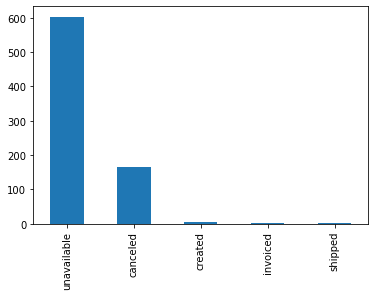

In [66]:
# Pedidos sem itens
df_pedidos_sem_itens=df_pedidos[~df_pedidos['order_id'].isin(df_pedidos_itens['order_id'])]
grafico=df_pedidos[~df_pedidos['order_id'].isin(df_pedidos_itens['order_id'])]['order_status'].value_counts()
grafico.plot(kind='bar')
df_pedidos_sem_itens['order_status'].value_counts()
print("{} pedidos sem itens.".format(df_pedidos_sem_itens['order_id'].nunique()))


In [67]:
df_pedidos.shape

(99441, 8)

In [68]:
# Eliminando pedidos sem itens
df_pedidos=df_pedidos[df_pedidos['order_id'].isin(df_pedidos_itens['order_id'])]

In [69]:
df_pedidos.shape

(98666, 8)

In [70]:
df_pedidos_sem_itens

order_id                       customer_id  \
266    8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
586    c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
687    37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
737    d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
...                                 ...                               ...   
99252  aaab15da689073f8f9aa978a390a69d1  df20748206e4b865b2f14a5eabbfcf34   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp   order_approved_at  \
266    unavailable      2017-11-16 15:09:28 2017-11-16 15:26:57   
586    unavailable      2018-01-31 11:31:37 2018-01-31 14:23:50   
687    unavailable      2017-08-14 17:38:02 2017-08-17 00:15:18   
737    unavailable      2018-01-08 19:39:03 2018-01-09 07:26:08   
1130      canceled      2018-08-28 15:26:39                 NaT   
...            ...                      ...                 ...   
99252  unavailable      2018-01-16 14:27:59 2018-01-17 03:37:34   
99283     canceled      2018-08-31 16:13:44                 NaT   
99347     canceled      2018-09-06 18:45:47                 NaT   
99348  unavailable      2017-08-23 16:28:04 2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
266                            NaT                           NaT   
586                            NaT                           NaT   
687                            NaT                           NaT   
737                            NaT                           NaT   
1130                           NaT                           NaT   
...                            ...                           ...   
99252                          NaT                           NaT   
99283                          NaT                           NaT   
99347                          NaT                           NaT   
99348                          NaT                           NaT   
99415                          NaT                           NaT   

      order_estimated_delivery_date  
266                      2017-12-05  
586                      2018-02-16  
687                      2017-09-05  
737                      2018-02-06  
1130                     2018-09-12  
...                             ...  
99252                    2018-02-06  
99283                    2018-10-01  
99347                    2018-09-27  
99348                    2017-09-15  
99415                    2017-10-23  

[775 rows x 8 columns]

In [71]:
numero_status_por_pedido = df_pedidos['order_status'].value_counts()
print("Status por Pedido")
for line, idx in numero_status_por_pedido.items():
    print(f"\t{idx} pedido(s) {line} {(round((idx/len(df_pedidos)*100),3))}%")

Status por Pedido
	96478 pedido(s) delivered 97.782%
	1106 pedido(s) shipped 1.121%
	461 pedido(s) canceled 0.467%
	312 pedido(s) invoiced 0.316%
	301 pedido(s) processing 0.305%
	6 pedido(s) unavailable 0.006%
	2 pedido(s) approved 0.002%


order_status:

delivered (entregue)

shipped  (enviado) 

canceled (cancelado)

invoiced (faturado)

unavailable (indisponível)

processing (em processamento)

approved (aprovado)

In [72]:
df_aux=mf.Resumo_DataFrame(df_pedidos)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                       order_id      0            0.00            98666   
1                    customer_id      0            0.00            98666   
2                   order_status      0            0.00                7   
3       order_purchase_timestamp      0            0.00            98112   
4              order_approved_at     14            0.01            90174   
5   order_delivered_carrier_date   1009            1.02            81017   
6  order_delivered_customer_date   2190            2.22            95664   
7  order_estimated_delivery_date      0            0.00              450   

   Numero Registros            Tipo  
0             98666          object  
1             98666          object  
2             98666          object  
3             98666  datetime64[ns]  
4             98666  datetime64[ns]  
5             98666  datetime64[ns]  
6             98666  datetime64[ns]  
7             98666  datetime64[ns]

In [73]:
# check distribuição das datas de venda
df_pedidos.order_id.groupby([df_pedidos.order_purchase_timestamp.dt.year.rename('ano'), 
                         df_pedidos.order_purchase_timestamp.dt.month.rename('mes')]).size().reset_index(name='counts')

ano  mes  counts
0   2016    9       3
1   2016   10     308
2   2016   12       1
3   2017    1     789
4   2017    2    1733
5   2017    3    2641
6   2017    4    2391
7   2017    5    3660
8   2017    6    3217
9   2017    7    3969
10  2017    8    4293
11  2017    9    4243
12  2017   10    4568
13  2017   11    7451
14  2017   12    5624
15  2018    1    7220
16  2018    2    6694
17  2018    3    7188
18  2018    4    6934
19  2018    5    6853
20  2018    6    6160
21  2018    7    6273
22  2018    8    6452
23  2018    9       1

In [74]:
df_OLIST = pd.merge(left=df_OLIST, right=df_pedidos, how='left', left_on='order_id', right_on='order_id')
df_aux=mf.Resumo_DataFrame(df_OLIST)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                       seller_id      0            0.00             3095   
1                        order_id      0            0.00            98666   
2                      product_id      0            0.00            32951   
3             shipping_limit_date      0            0.00            93318   
4                   order_item_id      0            0.00               16   
5                           price      0            0.00             6981   
6                   freight_value      0            0.00             7969   
7                     customer_id      0            0.00            98666   
8                    order_status      0            0.00                7   
9        order_purchase_timestamp      0            0.00            98112   
10              order_approved_at     14            0.01            90174   
11   order_delivered_carrier_date   1028            1.00            81017   
12  order_delivered_customer_date   2230            2.18            95664   
13  order_estimated_delivery_date      0            0.00              450   

    Numero Registros            Tipo  
0             102425          object  
1             102425          object  
2             102425          object  
3             102425  datetime64[ns]  
4             102425           int64  
5             102425         float64  
6             102425         float64  
7             102425          object  
8             102425          object  
9             102425  datetime64[ns]  
10            102425  datetime64[ns]  
11            102425  datetime64[ns]  
12            102425  datetime64[ns]  
13            102425  datetime64[ns]

** Notas **

Este projeto ficará limitado aos pedidos delivered(entregues) 96478 pedido(s) 97.782%, pois terá todo o processo, pagamento e avaliações.

Ao ano de 2017, pois o PIB-2017 enriquecerá.

## <a class="anchor" id="mpa">2.1.3 Merge:Avaliações</a>

In [75]:
df_avaliacoes.head(5)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [76]:
df_aux=mf.Resumo_DataFrame(df_avaliacoes)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                review_id      0            0.00            99173   
1                 order_id      0            0.00            99441   
2             review_score      0            0.00                5   
3     review_comment_title  88285           88.28             4600   
4   review_comment_message  58247           58.25            36921   
5     review_creation_date      0            0.00              637   
6  review_answer_timestamp      0            0.00            99010   

   Numero Registros            Tipo  
0            100000          object  
1            100000          object  
2            100000           int64  
3            100000          object  
4            100000          object  
5            100000  datetime64[ns]  
6            100000  datetime64[ns]

In [77]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_avaliacoes,'avaliações',['order_id'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                             PIB-2017                 5570        42   
1                                 CEPs                 6015         7   
2                      Area municipios                 5572         7   
3                             capitais                   27        14   
4  Feriados, Estaduais e Comemorativas                  737         4   
5                    itens dos pedidos               112650         7   
6                              pedidos                99441         8   
7                           avaliações               100000         7   

   Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0         272           4.88      5164        92.71  
1         445           7.40         0         0.00  
2           0           0.00         0         0.00  
3           0           0.00        27       100.00  
4           0           0.00         0         0.00  
5       13984          12.41         0         0.00  
6           0           0.00      2980         3.00  
7         559           0.56     90014        90.01

In [78]:
df_avaliacoes.duplicated().sum()

0

In [79]:
df_avaliacoes[df_avaliacoes.duplicated(["review_id","review_score"], keep=False)].sort_values(by ="review_id")

review_id                          order_id  \
47045  00130cbe1f9d422698c812ed8ded1919  dfcdfc43867d1c1381bfaf62d6b9c195   
30062  00130cbe1f9d422698c812ed8ded1919  04a28263e085d399c97ae49e0b477efa   
63695  0115633a9c298b6a98bcbe4eee75345f  0c9850b2c179c1ef60d2855e2751d1fa   
91399  0115633a9c298b6a98bcbe4eee75345f  78a4201f58af3463bdab842eea4bc801   
57727  0174caf0ee5964646040cd94e15ac95e  74db91e33b4e1fd865356c89a61abf1f   
...                                 ...                               ...   
40677  fe5c833752953fed3209646f1f63b53c  d3775e436e60258e62e678a0f68a0f8d   
7924   ff2fc9e68f8aabfbe18d710b83aabd30  2da58e0a7dcfa4ce1e00fad9d03ca3b5   
83183  ff2fc9e68f8aabfbe18d710b83aabd30  1078d496cc6ab9a8e6f2be77abf5091b   
1997   ffb8cff872a625632ac983eb1f88843c  c88b1d1b157a9999ce368f218a407141   
74551  ffb8cff872a625632ac983eb1f88843c  c44883fc2529b4aa03ca90e7e09d95b6   

       review_score review_comment_title  \
47045             1                  NaN   
30062             1                  NaN   
63695             5                  NaN   
91399             5                  NaN   
57727             1                  NaN   
...             ...                  ...   
40677             1                  NaN   
7924              2                  NaN   
83183             2                  NaN   
1997              3                  NaN   
74551             3                  NaN   

                                  review_comment_message review_creation_date  \
47045  O cartucho "original HP" 60XL não é reconhecid...           2018-03-07   
30062  O cartucho "original HP" 60XL não é reconhecid...           2018-03-07   
63695                                                NaN           2017-09-21   
91399                                                NaN           2017-09-21   
57727  Produto entregue dentro de embalagem do fornec...           2018-03-07   
...                                                  ...                  ...   
40677  Comprei dois produtos e ambos, mesmo enviados ...           2018-02-28   
7924                                                 NaN           2018-03-17   
83183                                                NaN           2018-03-17   
1997                                                 NaN           2017-07-22   
74551                                                NaN           2017-07-22   

      review_answer_timestamp  
47045     2018-03-20 18:08:23  
30062     2018-03-20 18:08:23  
63695     2017-09-26 03:27:47  
91399     2017-09-26 03:27:47  
57727     2018-03-08 03:00:53  
...                       ...  
40677     2018-02-28 13:57:52  
7924      2018-03-19 11:44:15  
83183     2018-03-19 11:44:15  
1997      2017-07-26 13:41:07  
74551     2017-07-26 13:41:07  

[1629 rows x 7 columns]

In [80]:
df_avaliacoes[df_avaliacoes['order_id'] == 'c88b1d1b157a9999ce368f218a407141']

review_id                          order_id  \
1997   ffb8cff872a625632ac983eb1f88843c  c88b1d1b157a9999ce368f218a407141   
83187  202b5f44d09cd3cfc0d6bd12f01b044c  c88b1d1b157a9999ce368f218a407141   
90069  fb96ea2ef8cce1c888f4d45c8e22b793  c88b1d1b157a9999ce368f218a407141   

       review_score review_comment_title review_comment_message  \
1997              3                  NaN                    NaN   
83187             5                  NaN                    NaN   
90069             5                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
1997            2017-07-22     2017-07-26 13:41:07  
83187           2017-07-22     2017-07-26 13:40:22  
90069           2017-07-21     2017-07-26 13:45:15

Temos várias avaliações(3,5 e 5) para o mesmo pedido c88b1d1b157a9999ce368f218a407141, logo pegarei a última avaliação, ou seja, a mais recente.
Ultima avaliação foi em 2017-07-26 13:45:15.


In [81]:
df_avaliacoes.shape

(100000, 7)

In [82]:
#Somente avaliações de pedidos
df_avaliacoes=df_avaliacoes[df_avaliacoes['order_id'].isin(df_pedidos['order_id'])]

In [83]:
df_avaliacoes.shape

(99222, 7)

In [84]:
# Verifica a existencia de multiplas avaliações para mesmo pedido
print("{} pedidos com multiplas avaliações".format(len(df_avaliacoes[df_avaliacoes.duplicated(['order_id'])])))

556 pedidos com multiplas avaliações


In [85]:
# remove avaliações duplicadas, mantendo a última
df_ultima = df_avaliacoes.groupby('order_id')['review_answer_timestamp'].max()
df_avaliacoes_ultima = pd.merge(left=df_ultima, right=df_avaliacoes, how='inner', 
                   left_on=['order_id','review_answer_timestamp'], 
                   right_on=['order_id','review_answer_timestamp'])

In [86]:
# Verifica a existencia de multiplas avaliações para mesmo pedido
print("{} pedidos com multiplas avaliações".format(len(df_avaliacoes_ultima[df_avaliacoes_ultima.duplicated(['order_id'])])))    


0 pedidos com multiplas avaliações


In [87]:
df_aux=mf.Resumo_DataFrame(df_avaliacoes)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                review_id      0            0.00            98453   
1                 order_id      0            0.00            98666   
2             review_score      0            0.00                5   
3     review_comment_title  87599           88.29             4569   
4   review_comment_message  58012           58.47            36435   
5     review_creation_date      0            0.00              634   
6  review_answer_timestamp      0            0.00            98291   

   Numero Registros            Tipo  
0             99222          object  
1             99222          object  
2             99222           int64  
3             99222          object  
4             99222          object  
5             99222  datetime64[ns]  
6             99222  datetime64[ns]

In [88]:
df_avaliacoes_ultima[df_avaliacoes_ultima['order_id'] == 'c88b1d1b157a9999ce368f218a407141']
#Ultima review_answer_timestamp=2017-07-26 13:45:15 pela max().

order_id review_answer_timestamp  \
77299  c88b1d1b157a9999ce368f218a407141     2017-07-26 13:45:15   

                              review_id  review_score review_comment_title  \
77299  fb96ea2ef8cce1c888f4d45c8e22b793             5                  NaN   

      review_comment_message review_creation_date  
77299                    NaN           2017-07-21

In [89]:
df_aux=mf.Resumo_DataFrame(df_avaliacoes_ultima)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                 order_id      0            0.00            98666   
1  review_answer_timestamp      0            0.00            97974   
2                review_id      0            0.00            98136   
3             review_score      0            0.00                5   
4     review_comment_title  87062           88.24             4566   
5   review_comment_message  57663           58.44            36334   
6     review_creation_date      0            0.00              634   

   Numero Registros            Tipo  
0             98666          object  
1             98666  datetime64[ns]  
2             98666          object  
3             98666           int64  
4             98666          object  
5             98666          object  
6             98666  datetime64[ns]

In [90]:
   
review_score_por_pedido = df_avaliacoes_ultima['review_score'].value_counts()
print("Review Score por Pedido")
for line, idx in review_score_por_pedido.items():
    print(f"\t{idx} pedido(s) com score={line} {(round((idx/len(df_avaliacoes_ultima)*100),3))}%")    

Review Score por Pedido
	57027 pedido(s) com score=5 57.798%
	19059 pedido(s) com score=4 19.317%
	11243 pedido(s) com score=1 11.395%
	8188 pedido(s) com score=3 8.299%
	3149 pedido(s) com score=2 3.192%


In [91]:
df_OLIST = pd.merge(left=df_OLIST, 
                    right=df_avaliacoes_ultima,
                    how='left', 
                    left_on='order_id', 
                    right_on='order_id')
df_aux=mf.Resumo_DataFrame(df_OLIST)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                       seller_id      0            0.00             3095   
1                        order_id      0            0.00            98666   
2                      product_id      0            0.00            32951   
3             shipping_limit_date      0            0.00            93318   
4                   order_item_id      0            0.00               16   
5                           price      0            0.00             6981   
6                   freight_value      0            0.00             7969   
7                     customer_id      0            0.00            98666   
8                    order_status      0            0.00                7   
9        order_purchase_timestamp      0            0.00            98112   
10              order_approved_at     14            0.01            90174   
11   order_delivered_carrier_date   1028            1.00            81017   
12  order_delivered_customer_date   2230            2.18            95664   
13  order_estimated_delivery_date      0            0.00              450   
14        review_answer_timestamp      0            0.00            97974   
15                      review_id      0            0.00            98136   
16                   review_score      0            0.00                5   
17           review_comment_title  90233           88.10             4566   
18         review_comment_message  59289           57.89            36334   
19           review_creation_date      0            0.00              634   

    Numero Registros            Tipo  
0             102425          object  
1             102425          object  
2             102425          object  
3             102425  datetime64[ns]  
4             102425           int64  
5             102425         float64  
6             102425         float64  
7             102425          object  
8             102425          object  
9             102425  datetime64[ns]  
10            102425  datetime64[ns]  
11            102425  datetime64[ns]  
12            102425  datetime64[ns]  
13            102425  datetime64[ns]  
14            102425  datetime64[ns]  
15            102425          object  
16            102425           int64  
17            102425          object  
18            102425          object  
19            102425  datetime64[ns]

## <a class="anchor" id="pagat">2.1.4 Merge:Pagamentos</a>

In [92]:
df_pagamentos.head(5)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [93]:
df_aux=mf.Resumo_DataFrame(df_pagamentos)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0              order_id      0             0.0            99440   
1    payment_sequential      0             0.0               29   
2          payment_type      0             0.0                5   
3  payment_installments      0             0.0               24   
4         payment_value      0             0.0            29077   

   Numero Registros     Tipo  
0            103886   object  
1            103886    int64  
2            103886   object  
3            103886    int64  
4            103886  float64

In [94]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_pagamentos,'pagamentos',['order_id'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                             PIB-2017                 5570        42   
1                                 CEPs                 6015         7   
2                      Area municipios                 5572         7   
3                             capitais                   27        14   
4  Feriados, Estaduais e Comemorativas                  737         4   
5                    itens dos pedidos               112650         7   
6                              pedidos                99441         8   
7                           avaliações               100000         7   
8                           pagamentos               103886         5   

   Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0         272           4.88      5164        92.71  
1         445           7.40         0         0.00  
2           0           0.00         0         0.00  
3           0           0.00        27       100.00  
4           0           0.00         0         0.00  
5       13984          12.41         0         0.00  
6           0           0.00      2980         3.00  
7         559           0.56     90014        90.01  
8        4446           4.28         0         0.00

In [95]:
df_pagamentos.shape

(103886, 5)

In [96]:
#Somente pagamentos dos pedidos com itens
df_pagamentos=df_pagamentos[df_pagamentos['order_id'].isin(df_pedidos['order_id'])]

In [97]:
df_pagamentos.shape

(103056, 5)

In [98]:
df_aux=mf.Resumo_DataFrame(df_pagamentos)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0              order_id      0             0.0            98665   
1    payment_sequential      0             0.0               29   
2          payment_type      0             0.0                4   
3  payment_installments      0             0.0               24   
4         payment_value      0             0.0            28938   

   Numero Registros     Tipo  
0            103056   object  
1            103056    int64  
2            103056   object  
3            103056    int64  
4            103056  float64

Existe 98665 no df_pagamentos ao passo que em df_pedidos temos 98666.Investigando.

In [99]:
df_pedidos[~df_pedidos['order_id'].isin(df_pagamentos['order_id'])]

order_id                       customer_id  \
30710  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   

      order_status order_purchase_timestamp   order_approved_at  \
30710    delivered      2016-09-15 12:16:38 2016-09-15 12:16:38   

      order_delivered_carrier_date order_delivered_customer_date  \
30710          2016-11-07 17:11:53           2016-11-09 07:47:38   

      order_estimated_delivery_date  
30710                    2016-10-04

Pedido sem pagamento.Investigando.

In [100]:
df_OLIST[df_OLIST['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

seller_id                          order_id  \
95268  ecccfa2bb93b34a3bf033cc5d1dcdc69  bfbd0f9bdef84302105ad712db648a6c   

                             product_id shipping_limit_date  order_item_id  \
95268  5a6b04657a4c5ee34285d1e4619a96b4 2016-09-19 23:11:33              3   

        price  freight_value                       customer_id order_status  \
95268  134.97           8.49  86dc2ffce2dfff336de2f386a786e574    delivered   

      order_purchase_timestamp   order_approved_at  \
95268      2016-09-15 12:16:38 2016-09-15 12:16:38   

      order_delivered_carrier_date order_delivered_customer_date  \
95268          2016-11-07 17:11:53           2016-11-09 07:47:38   

      order_estimated_delivery_date review_answer_timestamp  \
95268                    2016-10-04     2016-10-07 18:32:28   

                              review_id  review_score review_comment_title  \
95268  6916ca4502d6d3bfd39818759d55d536             1                  NaN   

                               review_comment_message review_creation_date  
95268  nao recebi o produto e nem resposta da empresa           2016-10-06

Pela informação na feature review_comment_message:"nao recebi o produto e nem resposta da empresa", posso excluir pois não teve pagamento.

In [101]:
df_OLIST.shape[0]

102425

In [102]:
df_OLIST.drop(df_OLIST.loc[df_OLIST['order_id']=='bfbd0f9bdef84302105ad712db648a6c'].index, inplace=True)
#conferindo
df_OLIST[df_OLIST['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

Empty DataFrame
Columns: [seller_id, order_id, product_id, shipping_limit_date, order_item_id, price, freight_value, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, review_answer_timestamp, review_id, review_score, review_comment_title, review_comment_message, review_creation_date]
Index: []

In [103]:
df_OLIST.shape[0]

102424

In [104]:
df_aux=mf.Resumo_DataFrame(df_OLIST)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                       seller_id      0            0.00             3095   
1                        order_id      0            0.00            98665   
2                      product_id      0            0.00            32951   
3             shipping_limit_date      0            0.00            93317   
4                   order_item_id      0            0.00               16   
5                           price      0            0.00             6981   
6                   freight_value      0            0.00             7969   
7                     customer_id      0            0.00            98665   
8                    order_status      0            0.00                7   
9        order_purchase_timestamp      0            0.00            98111   
10              order_approved_at     14            0.01            90173   
11   order_delivered_carrier_date   1028            1.00            81016   
12  order_delivered_customer_date   2230            2.18            95663   
13  order_estimated_delivery_date      0            0.00              449   
14        review_answer_timestamp      0            0.00            97973   
15                      review_id      0            0.00            98135   
16                   review_score      0            0.00                5   
17           review_comment_title  90232           88.10             4566   
18         review_comment_message  59289           57.89            36333   
19           review_creation_date      0            0.00              633   

    Numero Registros            Tipo  
0             102424          object  
1             102424          object  
2             102424          object  
3             102424  datetime64[ns]  
4             102424           int64  
5             102424         float64  
6             102424         float64  
7             102424          object  
8             102424          object  
9             102424  datetime64[ns]  
10            102424  datetime64[ns]  
11            102424  datetime64[ns]  
12            102424  datetime64[ns]  
13            102424  datetime64[ns]  
14            102424  datetime64[ns]  
15            102424          object  
16            102424           int64  
17            102424          object  
18            102424          object  
19            102424  datetime64[ns]

In [105]:
df_pagamentos.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [106]:
print("{} Número máximo de sequencias de pagamento.".format(df_pagamentos['payment_sequential'].nunique()))
print("{} Número máximo de parcelas para pagamento.".format(df_pagamentos['payment_installments'].nunique()))

29 Número máximo de sequencias de pagamento.
24 Número máximo de parcelas para pagamento.


In [107]:
pedidos_maior=(df_pagamentos.duplicated('order_id',keep='first').value_counts()[1] / df_pagamentos.shape[0])*100
print("{} ({:.2f}%) Número de pedidos pagos em várias parcelas.".format(df_pagamentos.duplicated('order_id',keep='first').value_counts()[1], pedidos_maior))

4391 (4.26%) Número de pedidos pagos em várias parcelas.


In [108]:
df_aux=df_pagamentos.groupby(['payment_sequential','order_id']).count().reset_index()
df_aux.sort_values(by=['payment_sequential','order_id'],ascending=False)

payment_sequential                          order_id  payment_type  \
103055                  29  fa65dad1b0e818e3ccc5cb0e39231352             1   
103054                  28  fa65dad1b0e818e3ccc5cb0e39231352             1   
103053                  27  fa65dad1b0e818e3ccc5cb0e39231352             1   
103052                  26  fa65dad1b0e818e3ccc5cb0e39231352             1   
103051                  26  ccf804e764ed5650cd8759557269dc13             1   
...                    ...                               ...           ...   
4                        1  00042b26cf59d7ce69dfabb4e55b4fd9             1   
3                        1  00024acbcdf0a6daa1e931b038114c75             1   
2                        1  000229ec398224ef6ca0657da4fc703e             1   
1                        1  00018f77f2f0320c557190d7a144bdd3             1   
0                        1  00010242fe8c5a6d1ba2dd792cb16214             1   

        payment_installments  payment_value  
103055                     1              1  
103054                     1              1  
103053                     1              1  
103052                     1              1  
103051                     1              1  
...                      ...            ...  
4                          1              1  
3                          1              1  
2                          1              1  
1                          1              1  
0                          1              1  

[103056 rows x 5 columns]

In [109]:
df_pagamentos[df_pagamentos['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

order_id  payment_sequential payment_type  \
4885    fa65dad1b0e818e3ccc5cb0e39231352                  27      voucher   
9985    fa65dad1b0e818e3ccc5cb0e39231352                   4      voucher   
14321   fa65dad1b0e818e3ccc5cb0e39231352                   1      voucher   
17274   fa65dad1b0e818e3ccc5cb0e39231352                   9      voucher   
19565   fa65dad1b0e818e3ccc5cb0e39231352                  10      voucher   
23074   fa65dad1b0e818e3ccc5cb0e39231352                   2      voucher   
24879   fa65dad1b0e818e3ccc5cb0e39231352                  25      voucher   
28330   fa65dad1b0e818e3ccc5cb0e39231352                   5      voucher   
29648   fa65dad1b0e818e3ccc5cb0e39231352                   6      voucher   
32519   fa65dad1b0e818e3ccc5cb0e39231352                  11      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
39108   fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   
39111   fa65dad1b0e818e3ccc5cb0e39231352                  28      voucher   
63369   fa65dad1b0e818e3ccc5cb0e39231352                  15      voucher   
65641   fa65dad1b0e818e3ccc5cb0e39231352                   3      voucher   
68853   fa65dad1b0e818e3ccc5cb0e39231352                   8      voucher   
73537   fa65dad1b0e818e3ccc5cb0e39231352                  12      voucher   
74239   fa65dad1b0e818e3ccc5cb0e39231352                  21      voucher   
74721   fa65dad1b0e818e3ccc5cb0e39231352                  19      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
78050   fa65dad1b0e818e3ccc5cb0e39231352                  16      voucher   
79587   fa65dad1b0e818e3ccc5cb0e39231352                  26      voucher   
79670   fa65dad1b0e818e3ccc5cb0e39231352                  17      voucher   
80321   fa65dad1b0e818e3ccc5cb0e39231352                  18      voucher   
82593   fa65dad1b0e818e3ccc5cb0e39231352                   7      voucher   
85166   fa65dad1b0e818e3ccc5cb0e39231352                  23      voucher   
93337   fa65dad1b0e818e3ccc5cb0e39231352                  20      voucher   
99213   fa65dad1b0e818e3ccc5cb0e39231352                  24      voucher   
100606  fa65dad1b0e818e3ccc5cb0e39231352                  22      voucher   

        payment_installments  payment_value  
4885                       1          66.02  
9985                       1          29.16  
14321                      1           3.71  
17274                      1           1.08  
19565                      1          12.86  
23074                      1           8.51  
24879                      1           3.68  
28330                      1           0.66  
29648                      1           5.02  
32519                      1           4.03  
36822                      1           0.00  
39108                      1          19.26  
39111                      1          29.05  
63369                      1          14.04  
65641                      1           2.95  
68853                      1          26.02  
73537                      1           3.60  
74239                      1           4.11  
74721                      1           5.02  
77885                      1           0.00  
78050                      1          12.86  
79587                      1          28.27  
79670                      1           3.72  
80321                      1           0.73  
82593                      1           0.32  
85166                      1          18.86  
93337                      1         150.00  
99213                      1           0.42  
100606                     1           4.03

## <a class="anchor" id="catepay">2.1.4.1 Categórica p/ numérica:payment_type</a>

In [110]:
df_pagamentos_grupo = df_pagamentos.groupby(['order_id','payment_type']).agg({'payment_sequential': "count",
                                                                                          'payment_installments': sum,
                                                                                          'payment_value': sum})

In [111]:
df_pagamentos_grupo.head(45).head(5)

payment_sequential  \
order_id                         payment_type                       
00010242fe8c5a6d1ba2dd792cb16214 credit_card                    1   
00018f77f2f0320c557190d7a144bdd3 credit_card                    1   
000229ec398224ef6ca0657da4fc703e credit_card                    1   
00024acbcdf0a6daa1e931b038114c75 credit_card                    1   
00042b26cf59d7ce69dfabb4e55b4fd9 credit_card                    1   

                                               payment_installments  \
order_id                         payment_type                         
00010242fe8c5a6d1ba2dd792cb16214 credit_card                      2   
00018f77f2f0320c557190d7a144bdd3 credit_card                      3   
000229ec398224ef6ca0657da4fc703e credit_card                      5   
00024acbcdf0a6daa1e931b038114c75 credit_card                      2   
00042b26cf59d7ce69dfabb4e55b4fd9 credit_card                      3   

                                               payment_value  
order_id                         payment_type                 
00010242fe8c5a6d1ba2dd792cb16214 credit_card           72.19  
00018f77f2f0320c557190d7a144bdd3 credit_card          259.83  
000229ec398224ef6ca0657da4fc703e credit_card          216.87  
00024acbcdf0a6daa1e931b038114c75 credit_card           25.78  
00042b26cf59d7ce69dfabb4e55b4fd9 credit_card          218.04

In [112]:
df_pagamentos_grupo.loc[[('ee9ca989fc93ba09a6eddc250ce01742','credit_card'),('ee9ca989fc93ba09a6eddc250ce01742','voucher')],:]

payment_sequential  \
order_id                         payment_type                       
ee9ca989fc93ba09a6eddc250ce01742 credit_card                    1   
                                 voucher                       18   

                                               payment_installments  \
order_id                         payment_type                         
ee9ca989fc93ba09a6eddc250ce01742 credit_card                      1   
                                 voucher                         18   

                                               payment_value  
order_id                         payment_type                 
ee9ca989fc93ba09a6eddc250ce01742 credit_card            1.76  
                                 voucher               80.97

In [113]:
df_pagamentos_grupo.shape

(100892, 3)

In [114]:
#novo nível de rótulos de coluna
df_temps = df_pagamentos_grupo.unstack(1).reset_index()

In [115]:
df_temps.shape

(98665, 13)

In [116]:
df_temps.head(5)

order_id payment_sequential              \
payment_type                                               boleto credit_card   
0             00010242fe8c5a6d1ba2dd792cb16214                NaN         1.0   
1             00018f77f2f0320c557190d7a144bdd3                NaN         1.0   
2             000229ec398224ef6ca0657da4fc703e                NaN         1.0   
3             00024acbcdf0a6daa1e931b038114c75                NaN         1.0   
4             00042b26cf59d7ce69dfabb4e55b4fd9                NaN         1.0   

                                payment_installments                         \
payment_type debit_card voucher               boleto credit_card debit_card   
0                   NaN     NaN                  NaN         2.0        NaN   
1                   NaN     NaN                  NaN         3.0        NaN   
2                   NaN     NaN                  NaN         5.0        NaN   
3                   NaN     NaN                  NaN         2.0        NaN   
4                   NaN     NaN                  NaN         3.0        NaN   

                     payment_value                                 
payment_type voucher        boleto credit_card debit_card voucher  
0                NaN           NaN       72.19        NaN     NaN  
1                NaN           NaN      259.83        NaN     NaN  
2                NaN           NaN      216.87        NaN     NaN  
3                NaN           NaN       25.78        NaN     NaN  
4                NaN           NaN      218.04        NaN     NaN

In [117]:
df_temps.columns = df_temps.columns.map('_'.join).str.strip('_')
df_temps.fillna(0, inplace = True)

In [118]:
df_temps.shape

(98665, 13)

In [119]:
df_temps.head(5)

order_id  payment_sequential_boleto  \
0  00010242fe8c5a6d1ba2dd792cb16214                        0.0   
1  00018f77f2f0320c557190d7a144bdd3                        0.0   
2  000229ec398224ef6ca0657da4fc703e                        0.0   
3  00024acbcdf0a6daa1e931b038114c75                        0.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9                        0.0   

   payment_sequential_credit_card  payment_sequential_debit_card  \
0                             1.0                            0.0   
1                             1.0                            0.0   
2                             1.0                            0.0   
3                             1.0                            0.0   
4                             1.0                            0.0   

   payment_sequential_voucher  payment_installments_boleto  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   payment_installments_credit_card  payment_installments_debit_card  \
0                               2.0                              0.0   
1                               3.0                              0.0   
2                               5.0                              0.0   
3                               2.0                              0.0   
4                               3.0                              0.0   

   payment_installments_voucher  payment_value_boleto  \
0                           0.0                   0.0   
1                           0.0                   0.0   
2                           0.0                   0.0   
3                           0.0                   0.0   
4                           0.0                   0.0   

   payment_value_credit_card  payment_value_debit_card  payment_value_voucher  
0                      72.19                       0.0                    0.0  
1                     259.83                       0.0                    0.0  
2                     216.87                       0.0                    0.0  
3                      25.78                       0.0                    0.0  
4                     218.04                       0.0                    0.0

In [120]:
df_temps[df_temps['order_id'] == 'ee9ca989fc93ba09a6eddc250ce01742']

order_id  payment_sequential_boleto  \
91989  ee9ca989fc93ba09a6eddc250ce01742                        0.0   

       payment_sequential_credit_card  payment_sequential_debit_card  \
91989                             1.0                            0.0   

       payment_sequential_voucher  payment_installments_boleto  \
91989                        18.0                          0.0   

       payment_installments_credit_card  payment_installments_debit_card  \
91989                               1.0                              0.0   

       payment_installments_voucher  payment_value_boleto  \
91989                          18.0                   0.0   

       payment_value_credit_card  payment_value_debit_card  \
91989                       1.76                       0.0   

       payment_value_voucher  
91989                  80.97

Passou de 29 registros para 1 registro com todos os pagamentos.

In [121]:
df_temps[df_temps['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

order_id  payment_sequential_boleto  \
96501  fa65dad1b0e818e3ccc5cb0e39231352                        0.0   

       payment_sequential_credit_card  payment_sequential_debit_card  \
96501                             0.0                            0.0   

       payment_sequential_voucher  payment_installments_boleto  \
96501                        29.0                          0.0   

       payment_installments_credit_card  payment_installments_debit_card  \
96501                               0.0                              0.0   

       payment_installments_voucher  payment_value_boleto  \
96501                          29.0                   0.0   

       payment_value_credit_card  payment_value_debit_card  \
96501                        0.0                       0.0   

       payment_value_voucher  
96501                 457.99

Quando o número de variáveis fictícias criadas é igual ao número de valores que o valor categórico pode assumir. Isso leva à multicolinearidade, que causa cálculos incorretos de coeficientes de regressão e valores p.
A multicolinearidade na análise de regressão ocorre quando duas ou mais variáveis preditoras são altamente correlacionadas entre si, de modo que não fornecem informações únicas ou independentes no modelo de regressão.
Se o grau de correlação for alto o suficiente entre as variáveis, pode causar problemas ao ajustar e interpretar o modelo de regressão.
A  multicolinearidade afeta apenas as variáveis preditoras que estão correlacionadas entre si. Como não estou interessado em uma variável preditora no modelo que não sofre de multicolinearidade, então a multicolinearidade não é uma preocupação.

In [122]:
df_pagamentos_grupo_categoria = pd.get_dummies(df_pagamentos_grupo.reset_index(), columns = ['payment_type'],drop_first=False)

In [123]:
df_pagamentos_grupo_categoria[df_pagamentos_grupo_categoria['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

order_id  payment_sequential  \
98674  fa65dad1b0e818e3ccc5cb0e39231352                  29   

       payment_installments  payment_value  payment_type_boleto  \
98674                    29         457.99                    0   

       payment_type_credit_card  payment_type_debit_card  payment_type_voucher  
98674                         0                        0                     1

In [124]:
df_pagamentos_grupo_categoria[df_pagamentos_grupo_categoria['order_id'] == 'ee9ca989fc93ba09a6eddc250ce01742']

order_id  payment_sequential  \
94059  ee9ca989fc93ba09a6eddc250ce01742                   1   
94060  ee9ca989fc93ba09a6eddc250ce01742                  18   

       payment_installments  payment_value  payment_type_boleto  \
94059                     1           1.76                    0   
94060                    18          80.97                    0   

       payment_type_credit_card  payment_type_debit_card  payment_type_voucher  
94059                         1                        0                     0  
94060                         0                        0                     1

In [125]:
df_pagamentos_final = df_pagamentos_grupo_categoria.groupby('order_id').agg({'payment_type_boleto':sum,
                                                                                   'payment_type_credit_card':sum,
                                                                                   'payment_type_debit_card':sum,
                                                                                   'payment_type_voucher':sum,}).reset_index()

In [126]:
df_pagamentos_final

order_id  payment_type_boleto  \
0      00010242fe8c5a6d1ba2dd792cb16214                    0   
1      00018f77f2f0320c557190d7a144bdd3                    0   
2      000229ec398224ef6ca0657da4fc703e                    0   
3      00024acbcdf0a6daa1e931b038114c75                    0   
4      00042b26cf59d7ce69dfabb4e55b4fd9                    0   
...                                 ...                  ...   
98660  fffc94f6ce00a00581880bf54a75a037                    1   
98661  fffcd46ef2263f404302a634eb57f7eb                    1   
98662  fffce4705a9662cd70adb13d4a31832d                    0   
98663  fffe18544ffabc95dfada21779c9644f                    0   
98664  fffe41c64501cc87c801fd61db3f6244                    0   

       payment_type_credit_card  payment_type_debit_card  payment_type_voucher  
0                             1                        0                     0  
1                             1                        0                     0  
2                             1                        0                     0  
3                             1                        0                     0  
4                             1                        0                     0  
...                         ...                      ...                   ...  
98660                         0                        0                     0  
98661                         0                        0                     0  
98662                         1                        0                     0  
98663                         1                        0                     0  
98664                         1                        0                     0  

[98665 rows x 5 columns]

In [127]:
df_pagamentos_final[df_pagamentos_final['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']

order_id  payment_type_boleto  \
96501  fa65dad1b0e818e3ccc5cb0e39231352                    0   

       payment_type_credit_card  payment_type_debit_card  payment_type_voucher  
96501                         0                        0                     1

In [128]:
df_pagamentos.shape

(103056, 5)

In [129]:
#Conferindo...
#antes da categorização da feature payment_type
df_pagamentos['payment_value'].sum()

15846280.17

In [130]:
#depois da categorização da feature payment_type
df_temps['payment_value_voucher'].sum()+\
df_temps['payment_value_debit_card'].sum()+\
df_temps['payment_value_credit_card'].sum()+\
df_temps['payment_value_boleto'].sum()

15846280.169999998

In [131]:
df_pagamentos = df_temps.merge(df_pagamentos_final, on = 'order_id', validate = '1:1')
#df_pagamentos_1 = df_temps.merge(df_pagamentos_final, on = 'order_id')

In [132]:
#depois de atualizar df_pagamentos
df_pagamentos['payment_value_voucher'].sum()+\
df_pagamentos['payment_value_debit_card'].sum()+\
df_pagamentos['payment_value_credit_card'].sum()+\
df_pagamentos['payment_value_boleto'].sum()

15846280.169999998

In [133]:
#Antes 103056
df_pagamentos.shape

(98665, 17)

In [134]:
df_aux=mf.Resumo_DataFrame(df_pagamentos)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                           order_id      0             0.0            98665   
1          payment_sequential_boleto      0             0.0                2   
2     payment_sequential_credit_card      0             0.0                3   
3      payment_sequential_debit_card      0             0.0                3   
4         payment_sequential_voucher      0             0.0               20   
5        payment_installments_boleto      0             0.0                2   
6   payment_installments_credit_card      0             0.0               24   
7    payment_installments_debit_card      0             0.0                3   
8       payment_installments_voucher      0             0.0               20   
9               payment_value_boleto      0             0.0            10473   
10         payment_value_credit_card      0             0.0            25322   
11          payment_value_debit_card      0             0.0             1379   
12             payment_value_voucher      0             0.0             2774   
13               payment_type_boleto      0             0.0                2   
14          payment_type_credit_card      0             0.0                2   
15           payment_type_debit_card      0             0.0                2   
16              payment_type_voucher      0             0.0                2   

    Numero Registros     Tipo  
0              98665   object  
1              98665  float64  
2              98665  float64  
3              98665  float64  
4              98665  float64  
5              98665  float64  
6              98665  float64  
7              98665  float64  
8              98665  float64  
9              98665  float64  
10             98665  float64  
11             98665  float64  
12             98665  float64  
13             98665    uint8  
14             98665    uint8  
15             98665    uint8  
16             98665    uint8

In [135]:
df_OLIST.shape

(102424, 20)

In [136]:
df_OLIST = pd.merge(left=df_OLIST, right=df_pagamentos, how = 'left', left_on='order_id', right_on='order_id')
df_temp= mf.Resumo_DataFrame(df_OLIST)
df_temp


Colunas  Nulos  Total de nulos  Total de unicos  \
0                          seller_id      0            0.00             3095   
1                           order_id      0            0.00            98665   
2                         product_id      0            0.00            32951   
3                shipping_limit_date      0            0.00            93317   
4                      order_item_id      0            0.00               16   
5                              price      0            0.00             6981   
6                      freight_value      0            0.00             7969   
7                        customer_id      0            0.00            98665   
8                       order_status      0            0.00                7   
9           order_purchase_timestamp      0            0.00            98111   
10                 order_approved_at     14            0.01            90173   
11      order_delivered_carrier_date   1028            1.00            81016   
12     order_delivered_customer_date   2230            2.18            95663   
13     order_estimated_delivery_date      0            0.00              449   
14           review_answer_timestamp      0            0.00            97973   
15                         review_id      0            0.00            98135   
16                      review_score      0            0.00                5   
17              review_comment_title  90232           88.10             4566   
18            review_comment_message  59289           57.89            36333   
19              review_creation_date      0            0.00              633   
20         payment_sequential_boleto      0            0.00                2   
21    payment_sequential_credit_card      0            0.00                3   
22     payment_sequential_debit_card      0            0.00                3   
23        payment_sequential_voucher      0            0.00               20   
24       payment_installments_boleto      0            0.00                2   
25  payment_installments_credit_card      0            0.00               24   
26   payment_installments_debit_card      0            0.00                3   
27      payment_installments_voucher      0            0.00               20   
28              payment_value_boleto      0            0.00            10473   
29         payment_value_credit_card      0            0.00            25322   
30          payment_value_debit_card      0            0.00             1379   
31             payment_value_voucher      0            0.00             2774   
32               payment_type_boleto      0            0.00                2   
33          payment_type_credit_card      0            0.00                2   
34           payment_type_debit_card      0            0.00                2   
35              payment_type_voucher      0            0.00                2   

    Numero Registros            Tipo  
0             102424          object  
1             102424          object  
2             102424          object  
3             102424  datetime64[ns]  
4             102424           int64  
5             102424         float64  
6             102424         float64  
7             102424          object  
8             102424          object  
9             102424  datetime64[ns]  
10            102424  datetime64[ns]  
11            102424  datetime64[ns]  
12            102424  datetime64[ns]  
13            102424  datetime64[ns]  
14            102424  datetime64[ns]  
15            102424          object  
16            102424           int64  
17            102424          object  
18            102424          object  
19            102424  datetime64[ns]  
20            102424         float64  
21            102424         float64  
22            102424         float64  
23            102424         float64  
24            102424         float64  
25            102424         float64  
26            1

## <a class="anchor" id="loc">2.1.5 Merge:Clientes</a>

In [137]:
df_clientes.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [138]:
df_aux=mf.Resumo_DataFrame(df_clientes)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0               customer_id      0             0.0            99441   
1        customer_unique_id      0             0.0            96096   
2  customer_zip_code_prefix      0             0.0            14994   
3             customer_city      0             0.0             4119   
4            customer_state      0             0.0               27   

   Numero Registros    Tipo  
0             99441  object  
1             99441  object  
2             99441   int64  
3             99441  object  
4             99441  object

Existe a diferença de 3345 registros entre customer_id e customer_unique_id. Customer_unique_id é código único para cada cliente, agora customer_id é o código do cliente para a respectiva compra,cliente pode ter feito vários pedidos. Não temos nulos, nem repetidos.

In [139]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_clientes,'clientes',['customer_id'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                             PIB-2017                 5570        42   
1                                 CEPs                 6015         7   
2                      Area municipios                 5572         7   
3                             capitais                   27        14   
4  Feriados, Estaduais e Comemorativas                  737         4   
5                    itens dos pedidos               112650         7   
6                              pedidos                99441         8   
7                           avaliações               100000         7   
8                           pagamentos               103886         5   
9                             clientes                99441         5   

   Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0         272           4.88      5164        92.71  
1         445           7.40         0         0.00  
2           0           0.00         0         0.00  
3           0           0.00        27       100.00  
4           0           0.00         0         0.00  
5       13984          12.41         0         0.00  
6           0           0.00      2980         3.00  
7         559           0.56     90014        90.01  
8        4446           4.28         0         0.00  
9           0           0.00         0         0.00

In [140]:
df = df_clientes.groupby('customer_unique_id').count()
numero_itens_por_clientes = df.groupby('customer_id').count()['customer_state']
numero_itens_por_clientes = numero_itens_por_clientes.rename("numero_itens_por_clientes")
print("Número de Clientes x Número de itens ")
for idx, line in numero_itens_por_clientes.items():
    print(f"\t{line} cliente(s) com {idx} item(ns) {(round((line/len(df)*100),3))}%")

Número de Clientes x Número de itens 
	93099 cliente(s) com 1 item(ns) 96.881%
	2745 cliente(s) com 2 item(ns) 2.857%
	203 cliente(s) com 3 item(ns) 0.211%
	30 cliente(s) com 4 item(ns) 0.031%
	8 cliente(s) com 5 item(ns) 0.008%
	6 cliente(s) com 6 item(ns) 0.006%
	3 cliente(s) com 7 item(ns) 0.003%
	1 cliente(s) com 9 item(ns) 0.001%
	1 cliente(s) com 17 item(ns) 0.001%


In [141]:
df = df_clientes.groupby('customer_unique_id').customer_id.nunique()
print(f"{df[df > 1].count()} clientes que fizeram pelo menos 2 pedidos.")

2997 clientes que fizeram pelo menos 2 pedidos.


In [142]:
df.shape

(96096,)

In [143]:
df.describe()

count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: customer_id, dtype: float64

In [144]:
#Em média, um cliente faz um pedido e no máximo 17 pedidos.

In [145]:
mf.atualiza_municipios_nomes(df_clientes,'customer_city')

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [146]:
df_OLIST = pd.merge(left=df_OLIST, 
                    right=df_clientes,                     
                    how='left', 
                    left_on='customer_id', 
                    right_on='customer_id')
df_aux=mf.Resumo_DataFrame(df_OLIST)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                          seller_id      0            0.00             3095   
1                           order_id      0            0.00            98665   
2                         product_id      0            0.00            32951   
3                shipping_limit_date      0            0.00            93317   
4                      order_item_id      0            0.00               16   
5                              price      0            0.00             6981   
6                      freight_value      0            0.00             7969   
7                        customer_id      0            0.00            98665   
8                       order_status      0            0.00                7   
9           order_purchase_timestamp      0            0.00            98111   
10                 order_approved_at     14            0.01            90173   
11      order_delivered_carrier_date   1028            1.00            81016   
12     order_delivered_customer_date   2230            2.18            95663   
13     order_estimated_delivery_date      0            0.00              449   
14           review_answer_timestamp      0            0.00            97973   
15                         review_id      0            0.00            98135   
16                      review_score      0            0.00                5   
17              review_comment_title  90232           88.10             4566   
18            review_comment_message  59289           57.89            36333   
19              review_creation_date      0            0.00              633   
20         payment_sequential_boleto      0            0.00                2   
21    payment_sequential_credit_card      0            0.00                3   
22     payment_sequential_debit_card      0            0.00                3   
23        payment_sequential_voucher      0            0.00               20   
24       payment_installments_boleto      0            0.00                2   
25  payment_installments_credit_card      0            0.00               24   
26   payment_installments_debit_card      0            0.00                3   
27      payment_installments_voucher      0            0.00               20   
28              payment_value_boleto      0            0.00            10473   
29         payment_value_credit_card      0            0.00            25322   
30          payment_value_debit_card      0            0.00             1379   
31             payment_value_voucher      0            0.00             2774   
32               payment_type_boleto      0            0.00                2   
33          payment_type_credit_card      0            0.00                2   
34           payment_type_debit_card      0            0.00                2   
35              payment_type_voucher      0            0.00                2   
36                customer_unique_id      0            0.00            95419   
37          customer_zip_code_prefix      0            0.00            14976   
38                     customer_city      0            0.00             4109   
39                    customer_state      0            0.00               27   

    Numero Registros            Tipo  
0             102424          object  
1             102424          object  
2             102424          object  
3             102424  datetime64[ns]  
4             102424           int64  
5             102424         float64  
6             102424         float64  
7             102424          object  
8             102424          object  
9             102424  datetime64[ns]  
10            102424  datetime64[ns]  
11            102424  datetime64[ns]  
12            102424  datetime64[ns]  
13            102424  datetime64[ns]  
14            102424  datetime64[ns]  
15            102424          object  
16            102424           int64  
17            102424          object  
18     

## <a class="anchor" id="pro">2.1.6 Merge:Produtos</a>

In [147]:
df_produtos.head(5)

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [148]:
df_aux=mf.Resumo_DataFrame(df_produtos)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                  product_id      0            0.00            32951   
1       product_category_name    610            1.85               73   
2         product_name_lenght    610            1.85               66   
3  product_description_lenght    610            1.85             2960   
4          product_photos_qty    610            1.85               19   
5            product_weight_g      2            0.01             2204   
6           product_length_cm      2            0.01               99   
7           product_height_cm      2            0.01              102   
8            product_width_cm      2            0.01               95   

   Numero Registros     Tipo  
0             32951   object  
1             32951   object  
2             32951  float64  
3             32951  float64  
4             32951  float64  
5             32951  float64  
6             32951  float64  
7             32951  float64  
8             32951  float64

In [149]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_produtos,'produtos',['product_id'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                              PIB-2017                 5570        42   
1                                  CEPs                 6015         7   
2                       Area municipios                 5572         7   
3                              capitais                   27        14   
4   Feriados, Estaduais e Comemorativas                  737         4   
5                     itens dos pedidos               112650         7   
6                               pedidos                99441         8   
7                            avaliações               100000         7   
8                            pagamentos               103886         5   
9                              clientes                99441         5   
10                             produtos                32951         9   

    Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0          272           4.88      5164        92.71  
1          445           7.40         0         0.00  
2            0           0.00         0         0.00  
3            0           0.00        27       100.00  
4            0           0.00         0         0.00  
5        13984          12.41         0         0.00  
6            0           0.00      2980         3.00  
7          559           0.56     90014        90.01  
8         4446           4.28         0         0.00  
9            0           0.00         0         0.00  
10           0           0.00       611         1.85

In [150]:
df_OLIST.shape

(102424, 40)

In [151]:
df_OLIST = pd.merge(left=df_OLIST, right=df_produtos, how = 'left', left_on='product_id', right_on='product_id', validate = 'm:1')


In [152]:
df_OLIST.shape

(102424, 48)

## <a class="anchor" id="mvl">2.1.7 Merge:Vendedores</a>

In [153]:
df_vendedores.head(5)

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [154]:
df_aux=mf.Resumo_DataFrame(df_vendedores)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0               seller_id      0             0.0             3095   
1  seller_zip_code_prefix      0             0.0             2246   
2             seller_city      0             0.0              611   
3            seller_state      0             0.0               23   

   Numero Registros    Tipo  
0              3095  object  
1              3095   int64  
2              3095  object  
3              3095  object

In [155]:
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_vendedores,'vendedores',['seller_id'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                              PIB-2017                 5570        42   
1                                  CEPs                 6015         7   
2                       Area municipios                 5572         7   
3                              capitais                   27        14   
4   Feriados, Estaduais e Comemorativas                  737         4   
5                     itens dos pedidos               112650         7   
6                               pedidos                99441         8   
7                            avaliações               100000         7   
8                            pagamentos               103886         5   
9                              clientes                99441         5   
10                             produtos                32951         9   
11                           vendedores                 3095         4   

    Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0          272           4.88      5164        92.71  
1          445           7.40         0         0.00  
2            0           0.00         0         0.00  
3            0           0.00        27       100.00  
4            0           0.00         0         0.00  
5        13984          12.41         0         0.00  
6            0           0.00      2980         3.00  
7          559           0.56     90014        90.01  
8         4446           4.28         0         0.00  
9            0           0.00         0         0.00  
10           0           0.00       611         1.85  
11           0           0.00         0         0.00

In [156]:
#Corrigindo estados de algumas cidades
df_vendedores.loc[513, 'seller_state'] = 'RJ'
df_vendedores.loc[[1233,1905,2510], 'seller_state'] = 'PR'
df_vendedores.loc[[1303,1449], 'seller_state'] = 'SC'
df_vendedores.loc[[287], 'seller_state'] = 'RJ'
df_vendedores.loc[[1656], 'seller_state'] = 'MG'
df_vendedores.loc[[2785], 'seller_state'] = 'PR'
df_vendedores.loc[[549,3036], 'seller_state'] = 'MG'
df_vendedores.loc[[311,2780], 'seller_state'] = 'PR'
df_vendedores.loc[[198], 'seller_state'] = 'PR'
df_vendedores.loc[[275], 'seller_state'] = 'PR'
df_vendedores.loc[[2033], 'seller_state'] = 'SC'
df_vendedores.loc[[1494], 'seller_state'] = 'SC'
df_vendedores.loc[[70,1102], 'seller_state'] = 'RS'
df_vendedores.loc[[2589], 'seller_state'] = 'MS'
df_vendedores.loc[[424], 'seller_state'] = 'MG'
df_vendedores.loc[[517], 'seller_city'] = 'rio de janeiro'
df_vendedores.loc[[2258], 'seller_city'] = 'curitiba'
df_vendedores.loc[[2662], 'seller_city'] = 'brasilia'

In [157]:
#df_vendedores[df_vendedores['seller_state'] == 'DF']['seller_state'].value_counts()

In [158]:
df_PIB[df_PIB['Nome do Município']== 'Brasília']

Código da Grande Região Nome da Grande Região  \
5569                        5          Centro-oeste   

      Código da Unidade da Federação Sigla da Unidade da Federação  \
5569                              53                            DF   

     Nome da Unidade da Federação  Código do Município Nome do Município  \
5569             Distrito Federal              5300108          Brasília   

                                   Região Metropolitana  \
5569  RIDE - Região Integrada de Desenvolvimento do ...   

      Código da Mesorregião Nome da Mesorregião  Código da Microrregião  \
5569                   5301    Distrito Federal                   53001   

     Nome da Microrregião  Código da Região Geográfica Imediata  \
5569             Brasília                                530001   

     Nome da Região Geográfica Imediata  \
5569                   Distrito Federal   

     Município da Região Geográfica Imediata  \
5569                                    Polo   

      Código da Região Geográfica Intermediária  \
5569                                       5301   

     Nome da Região Geográfica Intermediária  \
5569                        Distrito Federal   

     Município da Região Geográfica Intermediária  Código Concentração Urbana  \
5569                                   do Entorno                   5300108.0   

     Nome Concentração Urbana  \
5569              Brasília/DF   

                               Tipo Concentração Urbana  \
5569  Grande concentração urbana considerada na anál...   

      Código Arranjo Populacional Nome Arranjo Populacional  \
5569                    5300108.0               Brasília/DF   

        Hierarquia Urbana Hierarquia Urbana (principais categorias)  \
5569  Núcleo de Metrópole                                 Metrópole   

      Código da Região Rural                            Nome da Região Rural  \
5569                    5204  Região Rural da Metrópole Nacional de Brasília   

     Região rural (segundo classificação do núcleo) Amazônia Legal Semiárido  \
5569             Região Rural de Metrópole Nacional            Não       Não   

     Cidade-Região de São Paulo  \
5569                        Não   

      Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)  \
5569                                         828313.642                          

      Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)  \
5569                                        8443860.609                      

      Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)  \
5569                                       1.082876e+08                                                                                                      

      Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)  \
5569                                        98002586.38                                                                                  

      Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)  \
5569                                        215562327.9                

      Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)  \
5569                                       2.912043e+07                                   

      Produto Interno Bruto, \na preços correntes\n(R$ 1.000)  \
5569                                       2.446828e+08         

      Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)  \
5569                                           80502.47                   

             Atividade com maior valor adicionado bruto  \
5569  Administração, defesa, educação e saúde públic...   

     Atividade com segundo maior valor adicionado bruto  \
5569                                    Demais serviços   

     Atividade com terceiro maior va

In [159]:
mf.atualiza_municipios_nomes(df_vendedores,'seller_city')
mf.atualiza_municipios_vendedores(df_vendedores,'seller_city')

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi-guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [160]:
df_OLIST = pd.merge(left=df_OLIST, right=df_vendedores, how = 'left', left_on='seller_id', right_on='seller_id', validate = 'm:1')
df_aux=mf.Resumo_DataFrame(df_OLIST)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                          seller_id      0            0.00             3095   
1                           order_id      0            0.00            98665   
2                         product_id      0            0.00            32951   
3                shipping_limit_date      0            0.00            93317   
4                      order_item_id      0            0.00               16   
5                              price      0            0.00             6981   
6                      freight_value      0            0.00             7969   
7                        customer_id      0            0.00            98665   
8                       order_status      0            0.00                7   
9           order_purchase_timestamp      0            0.00            98111   
10                 order_approved_at     14            0.01            90173   
11      order_delivered_carrier_date   1028            1.00            81016   
12     order_delivered_customer_date   2230            2.18            95663   
13     order_estimated_delivery_date      0            0.00              449   
14           review_answer_timestamp      0            0.00            97973   
15                         review_id      0            0.00            98135   
16                      review_score      0            0.00                5   
17              review_comment_title  90232           88.10             4566   
18            review_comment_message  59289           57.89            36333   
19              review_creation_date      0            0.00              633   
20         payment_sequential_boleto      0            0.00                2   
21    payment_sequential_credit_card      0            0.00                3   
22     payment_sequential_debit_card      0            0.00                3   
23        payment_sequential_voucher      0            0.00               20   
24       payment_installments_boleto      0            0.00                2   
25  payment_installments_credit_card      0            0.00               24   
26   payment_installments_debit_card      0            0.00                3   
27      payment_installments_voucher      0            0.00               20   
28              payment_value_boleto      0            0.00            10473   
29         payment_value_credit_card      0            0.00            25322   
30          payment_value_debit_card      0            0.00             1379   
31             payment_value_voucher      0            0.00             2774   
32               payment_type_boleto      0            0.00                2   
33          payment_type_credit_card      0            0.00                2   
34           payment_type_debit_card      0            0.00                2   
35              payment_type_voucher      0            0.00                2   
36                customer_unique_id      0            0.00            95419   
37          customer_zip_code_prefix      0            0.00            14976   
38                     customer_city      0            0.00             4109   
39                    customer_state      0            0.00               27   
40             product_category_name   1460            1.43               73   
41               product_name_lenght   1460            1.43               66   
42        product_description_lenght   1460            1.43             2960   
43                product_photos_qty   1460            1.43               19   
44                  product_weight_g     16            0.02             2204   
45                 product_length_cm     16            0.02               99   
46                 product_height_cm     16            0.02              102   
47                  product_width_cm     16            0.02               95   
48            seller_zip_code_prefix      0            0.00             2246   
49                       sell

## <a class="anchor" id="locm">2.1.8 Merge:Localizações</a>

In [161]:
#CEP do Brasil:
#Um código postal brasileiro, também conhecido como CEP, significa Código de Endereço Postal (* Código de Endereço Postal *)
#e contém 8 dígitos. Introduzido em 1972 como uma sequência de cinco dígitos, foi expandido para oito dígitos em 1992 para permitir uma localização mais precisa. O formato padrão é "nnnnn-nnn" (os cinco dígitos originais, um hífen e os novos três dígitos).

#** CEP: ** 12.345-678

#A maioria das cidades com população em torno de 100.000 ou mais tem um CEP atribuído a todos os locais públicos e a alguns 
#espaços privados de alta ocupação, como grandes edifícios comerciais e grandes condomínios residenciais. As cidades pequenas recebem um código geral de 5 dígitos seguido do sufixo -000.

#a primeira parte é composta por 5 dígitos que representam Região, Sub-região, Setor, Subsetor e Subsetor Divisor.
#a segunda parte contém 3 dígitos, separados por um hífen da primeira, e representa os Identificadores de Distribuição.
#Mais informações sobre o funcionamento do CEP podem ser encontradas no site dos Correios.

#Vamos dar uma olhada no conjunto de dados de geolocalização fornecido pela Olist e tentar entender como o CEP funciona 
#geograficamente.

In [162]:
df_localizacoes.head(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [163]:
df_aux=mf.Resumo_DataFrame(df_localizacoes)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0  geolocation_zip_code_prefix      0             0.0            19015   
1              geolocation_lat      0             0.0           717360   
2              geolocation_lng      0             0.0           717613   
3             geolocation_city      0             0.0             8011   
4            geolocation_state      0             0.0               27   

   Numero Registros     Tipo  
0           1000163    int64  
1           1000163  float64  
2           1000163  float64  
3           1000163   object  
4           1000163   object

São 19015 zip code unicos, quer dizer para esta informação existe mais de uma latitude e longitude.

In [164]:
#df_localizacoes.duplicated().sum()
df_dataframes=mf.atualiza_df_dataframes(df_dataframes,df_localizacoes,'localizações',['geolocation_zip_code_prefix'])
df_dataframes

DataFrame  Numero de registros  Features  \
0                              PIB-2017                 5570        42   
1                                  CEPs                 6015         7   
2                       Area municipios                 5572         7   
3                              capitais                   27        14   
4   Feriados, Estaduais e Comemorativas                  737         4   
5                     itens dos pedidos               112650         7   
6                               pedidos                99441         8   
7                            avaliações               100000         7   
8                            pagamentos               103886         5   
9                              clientes                99441         5   
10                             produtos                32951         9   
11                           vendedores                 3095         4   
12                         localizações              1000163         5   

    Duplicados  Duplicados(%)  Ausentes  Ausentes(%)  
0          272           4.88      5164        92.71  
1          445           7.40         0         0.00  
2            0           0.00         0         0.00  
3            0           0.00        27       100.00  
4            0           0.00         0         0.00  
5        13984          12.41         0         0.00  
6            0           0.00      2980         3.00  
7          559           0.56     90014        90.01  
8         4446           4.28         0         0.00  
9            0           0.00         0         0.00  
10           0           0.00       611         1.85  
11           0           0.00         0         0.00  
12      981148          98.10         0         0.00

In [165]:
df_localizacoes[df_localizacoes['geolocation_zip_code_prefix'] == 99980].head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
999742                        99980       -28.389218       -51.846012   
999764                        99980       -28.386239       -51.847741   
999775                        99980       -28.386689       -51.847091   
999796                        99980       -28.388342       -51.845194   
999808                        99980       -28.387842       -51.846890   

       geolocation_city geolocation_state  
999742  david canabarro                RS  
999764  david canabarro                RS  
999775  david canabarro                RS  
999796  david canabarro                RS  
999808  david canabarro                RS

In [166]:
df_localizacoes_sem_duplicados = df_localizacoes.drop_duplicates()
len(df_localizacoes_sem_duplicados)

738332

Repetição de prefixos do cep com diferentes latitudes/longitudes.

Simulando relacionamento cliente e localizações, para verificar se há zip cod sem cadastro.


In [167]:
df_aux = df_clientes.merge(df_localizacoes_sem_duplicados, how = 'left', left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', validate = 'm:m',indicator = True)
df_aux['_merge'].value_counts()


both          10327728
left_only          278
right_only           0
Name: _merge, dtype: int64

São 278 registros sem localização.Estes registros serão tratados em 2.4.1 Ausentes.

In [168]:
df_clientes_sem_lat_long=df_aux[df_aux['_merge'] == 'left_only']
df_clientes_sem_lat_long

customer_id                customer_unique_id  \
36723     ecb1725b26e8b8c458181455dfa434ea  b55a113bb84fc10eaf58c6d09ec69794   
40906     bcf86029aeed4ed8bac0e16eb14c22f5  7cd7974c9f79f75b77f323878ef87f43   
92552     f4302056f0c58570522590f8181de2c7  67b05b597a66b5c449025000b9430abb   
127988    03bbe0ce5c28e05f22917607db798818  8f3dca4306d5a89e4ae2c65c110603a2   
133316    ad4950aded55c2ea376be59506456d68  aa2b96dd03307ea6dc4b763c0b5f0b39   
...                                    ...                               ...   
10128747  cf818420383856a129134f5f8343f7b8  795c495a65f983b242fb01bd507977c5   
10159596  67f3e907dce402e696b15f9308ff22ed  6f232f2f5c7f33b7bd9d794d2afacadd   
10194587  f792e419335df11d82c32efcfb09c51b  c04c085b8e7573ba87b9ae1968d0985e   
10271129  78a11bb1fa72f556996b9a5b9bcd0629  e7536f62a200b415edd9491ac12a17fa   
10311029  ff09fd7b29e7488a8d8a20badcd8befe  8c21dd8c37144807c601f99f2a209dfb   

          customer_zip_code_prefix             customer_city customer_state  \
36723                        72300                  brasilia             DF   
40906                        11547                   cubatao             SP   
92552                        64605                     picos             PI   
127988                       72465                  brasilia             DF   
133316                        7729                  caieiras             SP   
...                            ...                       ...            ...   
10128747                     72338                  brasilia             DF   
10159596                     68629               paragominas             PA   
10194587                     28530  sao sebastiao do paraiba             RJ   
10271129                     55863                    siriji             PE   
10311029                     72587                  brasilia             DF   

          geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
36723                             NaN              NaN              NaN   
40906                             NaN              NaN              NaN   
92552                             NaN              NaN              NaN   
127988                            NaN              NaN              NaN   
133316                            NaN              NaN              NaN   
...                               ...              ...              ...   
10128747                          NaN              NaN              NaN   
10159596                          NaN              NaN              NaN   
10194587                          NaN              NaN              NaN   
10271129                          NaN              NaN              NaN   
10311029                          NaN              NaN              NaN   

         geolocation_city geolocation_state     _merge  
36723                 NaN               NaN  left_only  
40906                 NaN               NaN  left_only  
92552                 NaN               NaN  left_only  
127988                NaN               NaN  left_only  
133316                NaN               NaN  left_only  
...                   ...               ...        ...  
10128747              NaN               NaN  left_only  
10159596              NaN               NaN  left_only  
10194587              NaN               NaN  left_only  
10271129              NaN               NaN  left_only  
10311029              NaN               NaN  left_only  

[278 rows x 11 columns]

In [169]:
df_aux = df_aux[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
                                                   'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng','geolocation_city',
                                                   'geolocation_state']]
df_aux.rename(columns = {'geolocation_lat':'customer_latitude','geolocation_lng':'customer_longitude','geolocation_city': 'customer_geo_city',
                                                   'geolocation_state': 'customer_geo_state'}, inplace = True)

df_aux['customer_geo_city']=df_aux['customer_geo_city'].astype(str)
df_aux['customer_city']=df_aux['customer_city'].astype(str)

Usarei a mediana por ser mais robusta a um valor extremo.

In [170]:
df_temp = df_aux.groupby(['customer_id']).agg({'customer_unique_id':'first',
                            'customer_zip_code_prefix':'first',
                            'customer_city':'first',
                            'customer_state':'first',
                            'customer_geo_city':'first',
                            'customer_geo_state':'first',
                            'customer_latitude': 'median',
                            'customer_longitude': 'median'}).reset_index() 


In [171]:
df_selecao = df_temp[['customer_id','customer_latitude', 'customer_longitude']]
df_selecao

customer_id  customer_latitude  customer_longitude
0      00012a2ce6f8dcda20d059ce98491703         -23.499387          -46.767180
1      000161a058600d5901f007fab4c27140         -20.472342          -45.123286
2      0001fd6190edaaf884bcaf3d49edf079         -18.707605          -40.398483
3      0002414f95344307404f0ace7a26f1d5         -21.770599          -43.355230
4      000379cdec625522490c315e70c7a9fb         -23.738425          -46.689274
...                                 ...                ...                 ...
99436  fffecc9f79fd8c764f843e9951b11341         -29.630585          -50.835129
99437  fffeda5b6d849fbd39689bb92087f431         -22.961018          -43.215229
99438  ffff42319e9b2d713724ae527742af25         -23.606329          -46.756651
99439  ffffa3172527f765de70084a7e53aae8         -21.428231          -45.946873
99440  ffffe8b65bbe3087b653a978c870db99         -23.543088          -46.812011

[99441 rows x 3 columns]

In [172]:
df_aux.head(2)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  customer_latitude  \
0                     14409        franca             SP         -20.509897   
1                     14409        franca             SP         -20.497396   

   customer_longitude customer_geo_city customer_geo_state  
0          -47.397866            franca                 SP  
1          -47.399241            franca                 SP

In [173]:
df_aux=mf.Resumo_DataFrame(df_temp)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0               customer_id      0            0.00            99441   
1        customer_unique_id      0            0.00            96096   
2  customer_zip_code_prefix      0            0.00            14994   
3             customer_city      0            0.00             4118   
4            customer_state      0            0.00               27   
5         customer_geo_city      0            0.00             4201   
6        customer_geo_state    278            0.28               27   
7         customer_latitude    278            0.28            14834   
8        customer_longitude    278            0.28            14837   

   Numero Registros     Tipo  
0             99441   object  
1             99441   object  
2             99441    int64  
3             99441   object  
4             99441   object  
5             99441   object  
6             99441   object  
7             99441  float64  
8             99441  float64

In [174]:
df_OLIST.shape

(102424, 51)

In [175]:
df_OLIST = pd.merge(left=df_OLIST, right=df_selecao, how = 'left', left_on = 'customer_id', right_on='customer_id')
df_OLIST.shape

(102424, 53)

Simulando relacionamento vendedores e localizações, para verificar se há zip cod sem cadastro.

In [176]:
df_aux = df_vendedores.merge(df_localizacoes, how = 'left', left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', validate = 'm:m',indicator = True)
df_aux['_merge'].value_counts()


both          435087
left_only          7
right_only         0
Name: _merge, dtype: int64

São 7 zip code sem latitude e longitude. Estes registros serão tratados em 2.4.1 Ausentes.

In [177]:
df_aux = df_aux[['seller_id', 'seller_zip_code_prefix', 
                                                   'seller_city', 'seller_state', 'geolocation_lat', 'geolocation_lng']]
df_aux.rename(columns = {'geolocation_lat':'seller_latitude','geolocation_lng':'seller_longitude'}, inplace = True)
df_aux

seller_id  seller_zip_code_prefix seller_city  \
0       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
2       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
3       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
4       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
...                                  ...                     ...         ...   
435089  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
435090  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
435091  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
435092  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
435093  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   

       seller_state  seller_latitude  seller_longitude  
0                SP       -22.898536        -47.063125  
1                SP       -22.895499        -47.061944  
2                SP       -22.891740        -47.060820  
3                SP       -22.895762        -47.066144  
4                SP       -22.896154        -47.062431  
...             ...              ...               ...  
435089           SP       -23.011130        -45.592347  
435090           SP       -23.013452        -45.584299  
435091           SP       -23.009155        -45.592019  
435092           SP       -23.009019        -45.584925  
435093           SP       -23.010990        -45.586938  

[435094 rows x 6 columns]

Usarei a mediana por ser mais robusta a um valor extremo.

In [178]:
df_temp = df_aux.groupby(['seller_id']).agg({
                            'seller_zip_code_prefix':'first',
                            'seller_city':'first',
                            'seller_state':'first',
                            'seller_latitude': 'median',
                            'seller_longitude': 'median'}).reset_index()  


In [179]:
df_aux=mf.Resumo_DataFrame(df_temp)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0               seller_id      0            0.00             3095   
1  seller_zip_code_prefix      0            0.00             2246   
2             seller_city      0            0.00              566   
3            seller_state      0            0.00               22   
4         seller_latitude      7            0.23             2239   
5        seller_longitude      7            0.23             2239   

   Numero Registros     Tipo  
0              3095   object  
1              3095    int64  
2              3095   object  
3              3095   object  
4              3095  float64  
5              3095  float64

In [180]:
df_selecao = df_temp[['seller_id','seller_latitude', 'seller_longitude']]
df_selecao

seller_id  seller_latitude  seller_longitude
0     0015a82c2db000af6aaaf3ae2ecb0532       -23.641517        -46.542105
1     001cca7ae9ae17fb1caed9dfb1094831       -20.271105        -40.415232
2     001e6ad469a905060d959994f1b41e4f       -22.872420        -43.027930
3     002100f778ceb8431b7a1020ff7ab48f       -20.530007        -47.411024
4     003554e2dce176b5555353e4f3555ac8       -16.642567        -49.274629
...                                ...              ...               ...
3090  ffcfefa19b08742c5d315f2791395ee5       -25.426558        -49.255263
3091  ffdd9f82b9a447f6f8d4b91554cc7dd3       -25.417200        -49.259469
3092  ffeee66ac5d5a62fe688b9d26f83f534       -20.815284        -49.507466
3093  fffd5413c0700ac820c7069d66d98c89       -22.722793        -46.846086
3094  ffff564a4f9085cd26170f4732393726       -22.893511        -47.080024

[3095 rows x 3 columns]

In [181]:
df_OLIST.shape

(102424, 53)

In [182]:
df_OLIST = pd.merge(left=df_OLIST, right=df_selecao, how = 'left', left_on = 'seller_id', right_on='seller_id', validate = 'm:1')
df_OLIST.shape

(102424, 55)

É necessário criar campo municipio_UF no dataframe df_OLIST p/ possibilitar o merge.

In [183]:
df_OLIST['municipio_UF'] = df_OLIST['customer_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_OLIST['municipio_UF'] = df_OLIST['municipio_UF'].apply(lambda z: z.upper())
df_OLIST['municipio_UF'] = df_OLIST['municipio_UF'].apply(mf.trocar_caracteres)
df_OLIST['municipio_UF'] = df_OLIST['municipio_UF']+' - '+df_OLIST['customer_state'].str.upper()
df_OLIST['seller_municipio_UF'] = df_OLIST['seller_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_OLIST['seller_municipio_UF'] = df_OLIST['seller_municipio_UF'].apply(lambda z: z.upper())
df_OLIST['seller_municipio_UF'] = df_OLIST['seller_municipio_UF'].apply(mf.trocar_caracteres)
df_OLIST['seller_municipio_UF'] = df_OLIST['seller_municipio_UF']+' - '+df_OLIST['seller_state'].str.upper()
df_aux=mf.Resumo_DataFrame(df_OLIST)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                          seller_id      0            0.00             3095   
1                           order_id      0            0.00            98665   
2                         product_id      0            0.00            32951   
3                shipping_limit_date      0            0.00            93317   
4                      order_item_id      0            0.00               16   
5                              price      0            0.00             6981   
6                      freight_value      0            0.00             7969   
7                        customer_id      0            0.00            98665   
8                       order_status      0            0.00                7   
9           order_purchase_timestamp      0            0.00            98111   
10                 order_approved_at     14            0.01            90173   
11      order_delivered_carrier_date   1028            1.00            81016   
12     order_delivered_customer_date   2230            2.18            95663   
13     order_estimated_delivery_date      0            0.00              449   
14           review_answer_timestamp      0            0.00            97973   
15                         review_id      0            0.00            98135   
16                      review_score      0            0.00                5   
17              review_comment_title  90232           88.10             4566   
18            review_comment_message  59289           57.89            36333   
19              review_creation_date      0            0.00              633   
20         payment_sequential_boleto      0            0.00                2   
21    payment_sequential_credit_card      0            0.00                3   
22     payment_sequential_debit_card      0            0.00                3   
23        payment_sequential_voucher      0            0.00               20   
24       payment_installments_boleto      0            0.00                2   
25  payment_installments_credit_card      0            0.00               24   
26   payment_installments_debit_card      0            0.00                3   
27      payment_installments_voucher      0            0.00               20   
28              payment_value_boleto      0            0.00            10473   
29         payment_value_credit_card      0            0.00            25322   
30          payment_value_debit_card      0            0.00             1379   
31             payment_value_voucher      0            0.00             2774   
32               payment_type_boleto      0            0.00                2   
33          payment_type_credit_card      0            0.00                2   
34           payment_type_debit_card      0            0.00                2   
35              payment_type_voucher      0            0.00                2   
36                customer_unique_id      0            0.00            95419   
37          customer_zip_code_prefix      0            0.00            14976   
38                     customer_city      0            0.00             4109   
39                    customer_state      0            0.00               27   
40             product_category_name   1460            1.43               73   
41               product_name_lenght   1460            1.43               66   
42        product_description_lenght   1460            1.43             2960   
43                product_photos_qty   1460            1.43               19   
44                  product_weight_g     16            0.02             2204   
45                 product_length_cm     16            0.02               99   
46                 product_height_cm     16            0.02              102   
47                  product_width_cm     16            0.02               95   
48            seller_zip_code_prefix      0            0.00             2246   
49                       sell

In [184]:
df_OLIST[df_OLIST.duplicated()==True]

Empty DataFrame
Columns: [seller_id, order_id, product_id, shipping_limit_date, order_item_id, price, freight_value, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, review_answer_timestamp, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, payment_sequential_boleto, payment_sequential_credit_card, payment_sequential_debit_card, payment_sequential_voucher, payment_installments_boleto, payment_installments_credit_card, payment_installments_debit_card, payment_installments_voucher, payment_value_boleto, payment_value_credit_card, payment_value_debit_card, payment_value_voucher, payment_type_boleto, payment_type_credit_card, payment_type_debit_card, payment_type_voucher, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, seller_zip_code_prefix, seller_city, seller_state, customer_latitude, customer_longitude, seller_latitude, seller_longitude, municipio_UF, seller_municipio_UF]
Index: []

In [185]:
df_OLIST.shape

(102424, 57)

## <a class="anchor" id="pic">2.2 Criação do dataFrame df_PIB_Cap_Area</a>

## <a class="anchor" id="pib">2.2.1 PIB</a>

In [186]:
df_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 42 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Código da Grande Região                                                                                                                            5570 non-null   int64  
 1   Nome da Grande Região                                                                                                                              5570 non-null   object 
 2   Código da Unidade da Federação                                                                                                                     5570 non-null   int64  
 3   Sigla da

In [187]:
df_aux=mf.Resumo_DataFrame(df_PIB)
df_aux

Colunas  Nulos  Total de nulos  \
0                             Código da Grande Região      0            0.00   
1                               Nome da Grande Região      0            0.00   
2                      Código da Unidade da Federação      0            0.00   
3                       Sigla da Unidade da Federação      0            0.00   
4                        Nome da Unidade da Federação      0            0.00   
5                                 Código do Município      0            0.00   
6                                   Nome do Município      0            0.00   
7                                Região Metropolitana   4181           75.06   
8                               Código da Mesorregião      0            0.00   
9                                 Nome da Mesorregião      0            0.00   
10                             Código da Microrregião      0            0.00   
11                               Nome da Microrregião      0            0.00   
12               Código da Região Geográfica Imediata      0            0.00   
13                 Nome da Região Geográfica Imediata      0            0.00   
14            Município da Região Geográfica Imediata      0            0.00   
15          Código da Região Geográfica Intermediária      0            0.00   
16            Nome da Região Geográfica Intermediária      0            0.00   
17       Município da Região Geográfica Intermediária      0            0.00   
18                         Código Concentração Urbana   4910           88.15   
19                           Nome Concentração Urbana   4910           88.15   
20                           Tipo Concentração Urbana   4910           88.15   
21                        Código Arranjo Populacional   4614           82.84   
22                          Nome Arranjo Populacional   4614           82.84   
23                                  Hierarquia Urbana      0            0.00   
24          Hierarquia Urbana (principais categorias)      0            0.00   
25                             Código da Região Rural      0            0.00   
26                               Nome da Região Rural      0            0.00   
27     Região rural (segundo classificação do núcleo)      0            0.00   
28                                     Amazônia Legal      0            0.00   
29                                          Semiárido      0            0.00   
30                         Cidade-Região de São Paulo      0            0.00   
31  Valor adicionado bruto da Agropecuária, \na pr...      0            0.00   
32  Valor adicionado bruto da Indústria,\na preços...      0            0.00   
33  Valor adicionado bruto dos Serviços,\na preços...      0            0.00   
34  Valor adicionado bruto da Administração, defes...      0            0.00   
35  Valor adicionado bruto total, \na preços corre...      0            0.00   
36  Impostos, líquidos de subsídios, sobre produto...      0            0.00   
37  Produto Interno Bruto, \na preços correntes\n(...      0            0.00   
38  Produto Interno Bruto per capita, \na preços c...      0            0.00   
39         Atividade com maior valor adicionado bruto      0            0.00   
40  Atividade com segundo maior valor adicionado b...      0            0.00   
41  Atividade com terceiro maior valor adicionado ...      0            0.00   

    Total de unicos  Numero Registros     Tipo  
0                 5              5570    int64  
1                 5              5570   object  
2                27              5570    int64  
3                27              5570   object  
4                27              5570   object  
5              5570              5570    int64  
6              5298              5570   object  
7                81              5570   object  
8               137              5570    int64  
9               137              5570   object  
10              558              5570    int64  
11              5

In [188]:
df_PIB

Código da Grande Região Nome da Grande Região  \
0                           1                 Norte   
1                           1                 Norte   
2                           1                 Norte   
3                           1                 Norte   
4                           1                 Norte   
...                       ...                   ...   
5565                        5          Centro-oeste   
5566                        5          Centro-oeste   
5567                        5          Centro-oeste   
5568                        5          Centro-oeste   
5569                        5          Centro-oeste   

      Código da Unidade da Federação Sigla da Unidade da Federação  \
0                                 11                            RO   
1                                 11                            RO   
2                                 11                            RO   
3                                 11                            RO   
4                                 11                            RO   
...                              ...                           ...   
5565                              52                            GO   
5566                              52                            GO   
5567                              52                            GO   
5568                              52                            GO   
5569                              53                            DF   

     Nome da Unidade da Federação  Código do Município      Nome do Município  \
0                        Rondônia              1100015  Alta Floresta D'Oeste   
1                        Rondônia              1100023              Ariquemes   
2                        Rondônia              1100031                 Cabixi   
3                        Rondônia              1100049                 Cacoal   
4                        Rondônia              1100056             Cerejeiras   
...                           ...                  ...                    ...   
5565                        Goiás              5222005             Vianópolis   
5566                        Goiás              5222054         Vicentinópolis   
5567                        Goiás              5222203               Vila Boa   
5568                        Goiás              5222302          Vila Propício   
5569             Distrito Federal              5300108               Brasília   

                                   Região Metropolitana  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
5565                                                NaN   
5566                                                NaN   
5567  RIDE - Região Integrada de Desenvolvimento do ...   
5568                                                NaN   
5569  RIDE - Região Integrada de Desenvolvimento do ...   

      Código da Mesorregião Nome da Mesorregião  Código da Microrregião  \
0                      1102   Leste Rondoniense                   11006   
1                      1102   Leste Rondoniense                   11003   
2                      1102   Leste Rondoniense                   11008   
3                      1102   Leste Rondoniense                   11006   
4                      1102   Leste Rondoniense                   11008   
...                     ...                 ...                     ...   
5565                   5205          Sul Goiano                   52016   
5566                   5205          Sul Goiano                   52015   
5567                   5204        Leste Goiano                   52012   
5568                   5204        Leste Goiano                   52012 

Nome do Município:5298 registros. Agora com 5570 municipios tempos 5570-5298=272 municipios com mesmo nome, verificar!

In [189]:
df_PIB[df_PIB.duplicated('Nome do Município')==True]

Código da Grande Região Nome da Grande Região  \
335                         1                 Norte   
403                         1                 Norte   
464                         2              Nordeste   
601                         2              Nordeste   
745                         2              Nordeste   
...                       ...                   ...   
5506                        5          Centro-oeste   
5527                        5          Centro-oeste   
5536                        5          Centro-oeste   
5545                        5          Centro-oeste   
5555                        5          Centro-oeste   

      Código da Unidade da Federação Sigla da Unidade da Federação  \
335                               17                            TO   
403                               17                            TO   
464                               21                            MA   
601                               21                            MA   
745                               22                            PI   
...                              ...                           ...   
5506                              52                            GO   
5527                              52                            GO   
5536                              52                            GO   
5545                              52                            GO   
5555                              52                            GO   

     Nome da Unidade da Federação  Código do Município  \
335                     Tocantins              1703305   
403                     Tocantins              1716307   
464                      Maranhão              2100873   
601                      Maranhão              2109239   
745                         Piauí              2203701   
...                           ...                  ...   
5506                        Goiás              5217203   
5527                        Goiás              5219357   
5536                        Goiás              5219803   
5545                        Goiás              5220405   
5555                        Goiás              5221403   

           Nome do Município Região Metropolitana  Código da Mesorregião  \
335   Bom Jesus do Tocantins                  NaN                   1702   
403               Pau D'Arco                  NaN                   1701   
464                 Araguanã                  NaN                   2102   
601        Presidente Médici                  NaN                   2102   
745              Esperantina                  NaN                   2201   
...                      ...                  ...                    ...   
5506                Piranhas                  NaN                   5201   
5527            Santa Isabel                  NaN                   5203   
5536            São Domingos                  NaN                   5204   
5545               São Simão                  NaN                   5205   
5555                Trindade           RM Goiânia                   5203   

         Nome da Mesorregião  Código da Microrregião  \
335    Oriental do Tocantins                   17006   
403   Ocidental do Tocantins                   17002   
464         Oeste Maranhense                   21008   
601         Oeste Maranhense                   21008   
745          Norte Piauiense                   22001   
...                      ...                     ...   
5506         Noroeste Goiano                   52003   
5527           Centro Goiano                   52006   
5536            Leste Goiano                   52011   
5545              Sul Goiano                   52018   
5555           Centro Goiano                   52010   

          Nome da Microrregião  Código da Região Geográfica Imediata  \
335             Porto Nacional                                170006   
403                  Araguaína                                170005   
464  

In [190]:
df_PIB[df_PIB['Nome do Município'] =='Esperantina']

Código da Grande Região Nome da Grande Região  \
359                        1                 Norte   
745                        2              Nordeste   

     Código da Unidade da Federação Sigla da Unidade da Federação  \
359                              17                            TO   
745                              22                            PI   

    Nome da Unidade da Federação  Código do Município Nome do Município  \
359                    Tocantins              1707405       Esperantina   
745                        Piauí              2203701       Esperantina   

    Região Metropolitana  Código da Mesorregião     Nome da Mesorregião  \
359                  NaN                   1701  Ocidental do Tocantins   
745                  NaN                   2201         Norte Piauiense   

     Código da Microrregião      Nome da Microrregião  \
359                   17001          Bico do Papagaio   
745                   22001  Baixo Parnaíba Piauiense   

     Código da Região Geográfica Imediata Nome da Região Geográfica Imediata  \
359                                170009                         Araguatins   
745                                220008                        Esperantina   

    Município da Região Geográfica Imediata  \
359                              do Entorno   
745                                    Polo   

     Código da Região Geográfica Intermediária  \
359                                       1702   
745                                       2202   

    Nome da Região Geográfica Intermediária  \
359                               Araguaína   
745                                Parnaíba   

    Município da Região Geográfica Intermediária  Código Concentração Urbana  \
359                                   do Entorno                         NaN   
745                                   do Entorno                         NaN   

    Nome Concentração Urbana Tipo Concentração Urbana  \
359                      NaN                      NaN   
745                      NaN                      NaN   

     Código Arranjo Populacional Nome Arranjo Populacional Hierarquia Urbana  \
359                          NaN                       NaN      Centro Local   
745                          NaN                       NaN  Centro de Zona A   

    Hierarquia Urbana (principais categorias)  Código da Região Rural  \
359                              Centro Local                    1701   
745                            Centro de Zona                    2201   

                                  Nome da Região Rural  \
359  Região Rural das Capitais Regionais de Araguaí...   
745    Região Rural do Centro Sub-regional de Parnaíba   

    Região rural (segundo classificação do núcleo) Amazônia Legal Semiárido  \
359               Região Rural de Capital Regional            Sim       Não   
745            Região Rural de Centro Sub-regional            Não       Não   

    Cidade-Região de São Paulo  \
359                        Não   
745                        Não   

     Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)  \
359                                           9095.352                          
745                                          11636.802                          

     Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)  \
359                                           1721.021                      
745                                          23838.330                      

     Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)  \
359                                          13854.916                                                                                                      
745                                         121906.046                                                                                                    

São 272 municipios com mesmo nome, em estados diferentes.Ok! 

In [191]:
df_PIB['municipio_UF'] = df_PIB['Nome do Município'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_PIB['municipio_UF'] = df_PIB['municipio_UF'].apply(lambda z: z.upper())
df_PIB['municipio_UF'] = df_PIB['municipio_UF'].apply(mf.trocar_caracteres)
df_PIB['municipio_UF'] = df_PIB['municipio_UF']+' - '+df_PIB['Sigla da Unidade da Federação'].str.upper()

In [192]:
df_PIB[df_PIB['municipio_UF'] =='ESPERANTINA - PI']

Código da Grande Região Nome da Grande Região  \
745                        2              Nordeste   

     Código da Unidade da Federação Sigla da Unidade da Federação  \
745                              22                            PI   

    Nome da Unidade da Federação  Código do Município Nome do Município  \
745                        Piauí              2203701       Esperantina   

    Região Metropolitana  Código da Mesorregião Nome da Mesorregião  \
745                  NaN                   2201     Norte Piauiense   

     Código da Microrregião      Nome da Microrregião  \
745                   22001  Baixo Parnaíba Piauiense   

     Código da Região Geográfica Imediata Nome da Região Geográfica Imediata  \
745                                220008                        Esperantina   

    Município da Região Geográfica Imediata  \
745                                    Polo   

     Código da Região Geográfica Intermediária  \
745                                       2202   

    Nome da Região Geográfica Intermediária  \
745                                Parnaíba   

    Município da Região Geográfica Intermediária  Código Concentração Urbana  \
745                                   do Entorno                         NaN   

    Nome Concentração Urbana Tipo Concentração Urbana  \
745                      NaN                      NaN   

     Código Arranjo Populacional Nome Arranjo Populacional Hierarquia Urbana  \
745                          NaN                       NaN  Centro de Zona A   

    Hierarquia Urbana (principais categorias)  Código da Região Rural  \
745                            Centro de Zona                    2201   

                                Nome da Região Rural  \
745  Região Rural do Centro Sub-regional de Parnaíba   

    Região rural (segundo classificação do núcleo) Amazônia Legal Semiárido  \
745            Região Rural de Centro Sub-regional            Não       Não   

    Cidade-Região de São Paulo  \
745                        Não   

     Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)  \
745                                          11636.802                          

     Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)  \
745                                           23838.33                      

     Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)  \
745                                         121906.046                                                                                                      

     Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)  \
745                                         157130.051                                                                                  

     Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)  \
745                                         314511.228                

     Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)  \
745                                          23879.267                                   

     Produto Interno Bruto, \na preços correntes\n(R$ 1.000)  \
745                                         338390.495         

     Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)  \
745                                            8659.36                   

            Atividade com maior valor adicionado bruto  \
745  Administração, defesa, educação e saúde públic...   

    Atividade com segundo maior valor adicionado bruto  \
745                                    Demais serviços   

    Atividade com terceiro maior valor adicionado bruto      municipio_UF  
745  Comércio e reparação de veículos automotores e...   ESPERANTINA - PI

In [193]:
df_PIB[df_PIB['municipio_UF'] =='ESPERANTINA - TO']

Código da Grande Região Nome da Grande Região  \
359                        1                 Norte   

     Código da Unidade da Federação Sigla da Unidade da Federação  \
359                              17                            TO   

    Nome da Unidade da Federação  Código do Município Nome do Município  \
359                    Tocantins              1707405       Esperantina   

    Região Metropolitana  Código da Mesorregião     Nome da Mesorregião  \
359                  NaN                   1701  Ocidental do Tocantins   

     Código da Microrregião Nome da Microrregião  \
359                   17001     Bico do Papagaio   

     Código da Região Geográfica Imediata Nome da Região Geográfica Imediata  \
359                                170009                         Araguatins   

    Município da Região Geográfica Imediata  \
359                              do Entorno   

     Código da Região Geográfica Intermediária  \
359                                       1702   

    Nome da Região Geográfica Intermediária  \
359                               Araguaína   

    Município da Região Geográfica Intermediária  Código Concentração Urbana  \
359                                   do Entorno                         NaN   

    Nome Concentração Urbana Tipo Concentração Urbana  \
359                      NaN                      NaN   

     Código Arranjo Populacional Nome Arranjo Populacional Hierarquia Urbana  \
359                          NaN                       NaN      Centro Local   

    Hierarquia Urbana (principais categorias)  Código da Região Rural  \
359                              Centro Local                    1701   

                                  Nome da Região Rural  \
359  Região Rural das Capitais Regionais de Araguaí...   

    Região rural (segundo classificação do núcleo) Amazônia Legal Semiárido  \
359               Região Rural de Capital Regional            Sim       Não   

    Cidade-Região de São Paulo  \
359                        Não   

     Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)  \
359                                           9095.352                          

     Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)  \
359                                           1721.021                      

     Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)  \
359                                          13854.916                                                                                                      

     Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)  \
359                                          58053.046                                                                                  

     Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)  \
359                                          82724.335                

     Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)  \
359                                           2248.333                                   

     Produto Interno Bruto, \na preços correntes\n(R$ 1.000)  \
359                                          84972.668         

     Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)  \
359                                            7872.94                   

            Atividade com maior valor adicionado bruto  \
359  Administração, defesa, educação e saúde públic...   

    Atividade com segundo maior valor adicionado bruto  \
359                                    Demais serviços   

    Atividade com terceiro maior valor adicionado bruto      municipio_UF  
359               Pecuária, inclusive apoio à pecuária   ESPERANTINA - TO

In [194]:
df_PIB.tail(30)

Código da Grande Região Nome da Grande Região  \
5540                        5          Centro-oeste   
5541                        5          Centro-oeste   
5542                        5          Centro-oeste   
5543                        5          Centro-oeste   
5544                        5          Centro-oeste   
5545                        5          Centro-oeste   
5546                        5          Centro-oeste   
5547                        5          Centro-oeste   
5548                        5          Centro-oeste   
5549                        5          Centro-oeste   
5550                        5          Centro-oeste   
5551                        5          Centro-oeste   
5552                        5          Centro-oeste   
5553                        5          Centro-oeste   
5554                        5          Centro-oeste   
5555                        5          Centro-oeste   
5556                        5          Centro-oeste   
5557                        5          Centro-oeste   
5558                        5          Centro-oeste   
5559                        5          Centro-oeste   
5560                        5          Centro-oeste   
5561                        5          Centro-oeste   
5562                        5          Centro-oeste   
5563                        5          Centro-oeste   
5564                        5          Centro-oeste   
5565                        5          Centro-oeste   
5566                        5          Centro-oeste   
5567                        5          Centro-oeste   
5568                        5          Centro-oeste   
5569                        5          Centro-oeste   

      Código da Unidade da Federação Sigla da Unidade da Federação  \
5540                              52                            GO   
5541                              52                            GO   
5542                              52                            GO   
5543                              52                            GO   
5544                              52                            GO   
5545                              52                            GO   
5546                              52                            GO   
5547                              52                            GO   
5548                              52                            GO   
5549                              52                            GO   
5550                              52                            GO   
5551                              52                            GO   
5552                              52                            GO   
5553                              52                            GO   
5554                              52                            GO   
5555                              52                            GO   
5556                              52                            GO   
5557                              52                            GO   
5558                              52                            GO   
5559                              52                            GO   
5560                              52                            GO   
5561                              52                            GO   
5562                              52                            GO   
5563                              52                            GO   
5564                              52                            GO   
5565                              52                            GO   
5566                              52                            GO   
5567                              52                            GO   
5568                              52                            GO   
5569                              53                            DF   

     Nome da Unidade da Federação  Código do Município  \
5540                        Goiás              5220108   
5541         

In [195]:
df_aux=mf.Resumo_DataFrame(df_PIB)
df_aux

Colunas  Nulos  Total de nulos  \
0                             Código da Grande Região      0            0.00   
1                               Nome da Grande Região      0            0.00   
2                      Código da Unidade da Federação      0            0.00   
3                       Sigla da Unidade da Federação      0            0.00   
4                        Nome da Unidade da Federação      0            0.00   
5                                 Código do Município      0            0.00   
6                                   Nome do Município      0            0.00   
7                                Região Metropolitana   4181           75.06   
8                               Código da Mesorregião      0            0.00   
9                                 Nome da Mesorregião      0            0.00   
10                             Código da Microrregião      0            0.00   
11                               Nome da Microrregião      0            0.00   
12               Código da Região Geográfica Imediata      0            0.00   
13                 Nome da Região Geográfica Imediata      0            0.00   
14            Município da Região Geográfica Imediata      0            0.00   
15          Código da Região Geográfica Intermediária      0            0.00   
16            Nome da Região Geográfica Intermediária      0            0.00   
17       Município da Região Geográfica Intermediária      0            0.00   
18                         Código Concentração Urbana   4910           88.15   
19                           Nome Concentração Urbana   4910           88.15   
20                           Tipo Concentração Urbana   4910           88.15   
21                        Código Arranjo Populacional   4614           82.84   
22                          Nome Arranjo Populacional   4614           82.84   
23                                  Hierarquia Urbana      0            0.00   
24          Hierarquia Urbana (principais categorias)      0            0.00   
25                             Código da Região Rural      0            0.00   
26                               Nome da Região Rural      0            0.00   
27     Região rural (segundo classificação do núcleo)      0            0.00   
28                                     Amazônia Legal      0            0.00   
29                                          Semiárido      0            0.00   
30                         Cidade-Região de São Paulo      0            0.00   
31  Valor adicionado bruto da Agropecuária, \na pr...      0            0.00   
32  Valor adicionado bruto da Indústria,\na preços...      0            0.00   
33  Valor adicionado bruto dos Serviços,\na preços...      0            0.00   
34  Valor adicionado bruto da Administração, defes...      0            0.00   
35  Valor adicionado bruto total, \na preços corre...      0            0.00   
36  Impostos, líquidos de subsídios, sobre produto...      0            0.00   
37  Produto Interno Bruto, \na preços correntes\n(...      0            0.00   
38  Produto Interno Bruto per capita, \na preços c...      0            0.00   
39         Atividade com maior valor adicionado bruto      0            0.00   
40  Atividade com segundo maior valor adicionado b...      0            0.00   
41  Atividade com terceiro maior valor adicionado ...      0            0.00   
42                                       municipio_UF      0            0.00   

    Total de unicos  Numero Registros     Tipo  
0                 5              5570    int64  
1                 5              5570   object  
2                27              5570    int64  
3                27              5570   object  
4                27              5570   object  
5              5570              5570    int64  
6              5298              5570   object  
7                81              5570   object  
8               137              5570    int64  
9               137              55

Campo municipio_UF com 5570 ocorrencias.

Diferenças na escrita de alguns municipios.Padronizando com nome dos municipios do CEP(df_CEPS).

In [196]:
mf.atualiza_municipios_PIB(df_PIB,'municipio_UF')
#atualiza_municipios_PIB(df_PIB,'municipio_UF')

Código da Grande Região Nome da Grande Região  \
0                           1                 Norte   
1                           1                 Norte   
2                           1                 Norte   
3                           1                 Norte   
4                           1                 Norte   
...                       ...                   ...   
5565                        5          Centro-oeste   
5566                        5          Centro-oeste   
5567                        5          Centro-oeste   
5568                        5          Centro-oeste   
5569                        5          Centro-oeste   

      Código da Unidade da Federação Sigla da Unidade da Federação  \
0                                 11                            RO   
1                                 11                            RO   
2                                 11                            RO   
3                                 11                            RO   
4                                 11                            RO   
...                              ...                           ...   
5565                              52                            GO   
5566                              52                            GO   
5567                              52                            GO   
5568                              52                            GO   
5569                              53                            DF   

     Nome da Unidade da Federação  Código do Município      Nome do Município  \
0                        Rondônia              1100015  Alta Floresta D'Oeste   
1                        Rondônia              1100023              Ariquemes   
2                        Rondônia              1100031                 Cabixi   
3                        Rondônia              1100049                 Cacoal   
4                        Rondônia              1100056             Cerejeiras   
...                           ...                  ...                    ...   
5565                        Goiás              5222005             Vianópolis   
5566                        Goiás              5222054         Vicentinópolis   
5567                        Goiás              5222203               Vila Boa   
5568                        Goiás              5222302          Vila Propício   
5569             Distrito Federal              5300108               Brasília   

                                   Região Metropolitana  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
5565                                                NaN   
5566                                                NaN   
5567  RIDE - Região Integrada de Desenvolvimento do ...   
5568                                                NaN   
5569  RIDE - Região Integrada de Desenvolvimento do ...   

      Código da Mesorregião Nome da Mesorregião  Código da Microrregião  \
0                      1102   Leste Rondoniense                   11006   
1                      1102   Leste Rondoniense                   11003   
2                      1102   Leste Rondoniense                   11008   
3                      1102   Leste Rondoniense                   11006   
4                      1102   Leste Rondoniense                   11008   
...                     ...                 ...                     ...   
5565                   5205          Sul Goiano                   52016   
5566                   5205          Sul Goiano                   52015   
5567                   5204        Leste Goiano                   52012   
5568                   5204        Leste Goiano                   52012 

In [197]:
df_aux=mf.Resumo_DataFrame(df_PIB)
df_aux

Colunas  Nulos  Total de nulos  \
0                             Código da Grande Região      0            0.00   
1                               Nome da Grande Região      0            0.00   
2                      Código da Unidade da Federação      0            0.00   
3                       Sigla da Unidade da Federação      0            0.00   
4                        Nome da Unidade da Federação      0            0.00   
5                                 Código do Município      0            0.00   
6                                   Nome do Município      0            0.00   
7                                Região Metropolitana   4181           75.06   
8                               Código da Mesorregião      0            0.00   
9                                 Nome da Mesorregião      0            0.00   
10                             Código da Microrregião      0            0.00   
11                               Nome da Microrregião      0            0.00   
12               Código da Região Geográfica Imediata      0            0.00   
13                 Nome da Região Geográfica Imediata      0            0.00   
14            Município da Região Geográfica Imediata      0            0.00   
15          Código da Região Geográfica Intermediária      0            0.00   
16            Nome da Região Geográfica Intermediária      0            0.00   
17       Município da Região Geográfica Intermediária      0            0.00   
18                         Código Concentração Urbana   4910           88.15   
19                           Nome Concentração Urbana   4910           88.15   
20                           Tipo Concentração Urbana   4910           88.15   
21                        Código Arranjo Populacional   4614           82.84   
22                          Nome Arranjo Populacional   4614           82.84   
23                                  Hierarquia Urbana      0            0.00   
24          Hierarquia Urbana (principais categorias)      0            0.00   
25                             Código da Região Rural      0            0.00   
26                               Nome da Região Rural      0            0.00   
27     Região rural (segundo classificação do núcleo)      0            0.00   
28                                     Amazônia Legal      0            0.00   
29                                          Semiárido      0            0.00   
30                         Cidade-Região de São Paulo      0            0.00   
31  Valor adicionado bruto da Agropecuária, \na pr...      0            0.00   
32  Valor adicionado bruto da Indústria,\na preços...      0            0.00   
33  Valor adicionado bruto dos Serviços,\na preços...      0            0.00   
34  Valor adicionado bruto da Administração, defes...      0            0.00   
35  Valor adicionado bruto total, \na preços corre...      0            0.00   
36  Impostos, líquidos de subsídios, sobre produto...      0            0.00   
37  Produto Interno Bruto, \na preços correntes\n(...      0            0.00   
38  Produto Interno Bruto per capita, \na preços c...      0            0.00   
39         Atividade com maior valor adicionado bruto      0            0.00   
40  Atividade com segundo maior valor adicionado b...      0            0.00   
41  Atividade com terceiro maior valor adicionado ...      0            0.00   
42                                       municipio_UF      0            0.00   

    Total de unicos  Numero Registros     Tipo  
0                 5              5570    int64  
1                 5              5570   object  
2                27              5570    int64  
3                27              5570   object  
4                27              5570   object  
5              5570              5570    int64  
6              5298              5570   object  
7                81              5570   object  
8               137              5570    int64  
9               137              55

In [198]:
df_ids_munic_estados=df_PIB[['municipio_UF','Código da Unidade da Federação', 'Código do Município','Código da Grande Região','Nome da Grande Região']]
df_ids_munic_estados.rename(columns={'Código da Unidade da Federação':'cod_estado','Código do Município':'cod_municipio',
                        'Código da Grande Região':'cod_grande_regiao','Nome da Grande Região':'nome_grande_regiao'}, inplace=True)
df_ids_munic_estados

municipio_UF  cod_estado  cod_municipio  \
0     ALTA FLORESTA D'OESTE - RO          11        1100015   
1                 ARIQUEMES - RO          11        1100023   
2                    CABIXI - RO          11        1100031   
3                    CACOAL - RO          11        1100049   
4                CEREJEIRAS - RO          11        1100056   
...                          ...         ...            ...   
5565             VIANOPOLIS - GO          52        5222005   
5566         VICENTINOPOLIS - GO          52        5222054   
5567               VILA BOA - GO          52        5222203   
5568          VILA PROPICIO - GO          52        5222302   
5569               BRASILIA - DF          53        5300108   

      cod_grande_regiao nome_grande_regiao  
0                     1              Norte  
1                     1              Norte  
2                     1              Norte  
3                     1              Norte  
4                     1              Norte  
...                 ...                ...  
5565                  5       Centro-oeste  
5566                  5       Centro-oeste  
5567                  5       Centro-oeste  
5568                  5       Centro-oeste  
5569                  5       Centro-oeste  

[5570 rows x 5 columns]

## <a class="anchor" id="capi">2.2.2 Capitais</a>

In [199]:
df_uf.head(5)

Bandeira Unidade federativa Abreviação Sede de governo   Área (km²)  \
0       NaN               Acre         AC      Rio Branco    164 122,2   
1       NaN            Alagoas         AL          Maceió     27 767,7   
2       NaN              Amapá         AP          Macapá    142 814,6   
3       NaN           Amazonas         AM          Manaus  1 570 745,7   
4       NaN              Bahia         BA        Salvador    564 692,7   

  População (2014)  Densidade (2005)   PIB (2015)  (% total) (2015)  \
0          795 145               430   13 622 000                 2   
1        3 327 551             10861   46 364 000                 8   
2          756 500               416   13 861 000                 2   
3        3 893 763               205   86 560 000                14   
4       15 150 143              2446  245 025 000                41   

  PIB per capita (R$) (2015)  IDH (2010) Alfabetização (2016)  \
0                  16 953,46         663                86,9%   
1                  13 877,53         631                80,6%   
2                  18 079,54         708                  95%   
3                  21 978,95         674                93,1%   
4                  16 115,89         660                  87%   

  Mortalidade infantil (2016) Expectativa de vida (2016)  
0                       17,0‰                  73,9 anos  
1                       19,5‰                  71,6 anos  
2                       23,2‰                  73,9 anos  
3                       18,2‰                  71,9 anos  
4                       17,3‰                  73,5 anos

Criando campo municipio_UF para realizar merge com dataframe PIB.

In [200]:
df_uf['municipio_UF'] = df_uf['Sede de governo'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_uf['municipio_UF'] = df_uf['municipio_UF'].apply(lambda z: z.upper())
df_uf['municipio_UF'] = df_uf['municipio_UF'].apply(mf.trocar_caracteres)
df_uf['municipio_UF'] = df_uf['municipio_UF']+' - '+df_uf['Abreviação'].str.upper()

In [201]:
df_uf.head(5)

Bandeira Unidade federativa Abreviação Sede de governo   Área (km²)  \
0       NaN               Acre         AC      Rio Branco    164 122,2   
1       NaN            Alagoas         AL          Maceió     27 767,7   
2       NaN              Amapá         AP          Macapá    142 814,6   
3       NaN           Amazonas         AM          Manaus  1 570 745,7   
4       NaN              Bahia         BA        Salvador    564 692,7   

  População (2014)  Densidade (2005)   PIB (2015)  (% total) (2015)  \
0          795 145               430   13 622 000                 2   
1        3 327 551             10861   46 364 000                 8   
2          756 500               416   13 861 000                 2   
3        3 893 763               205   86 560 000                14   
4       15 150 143              2446  245 025 000                41   

  PIB per capita (R$) (2015)  IDH (2010) Alfabetização (2016)  \
0                  16 953,46         663                86,9%   
1                  13 877,53         631                80,6%   
2                  18 079,54         708                  95%   
3                  21 978,95         674                93,1%   
4                  16 115,89         660                  87%   

  Mortalidade infantil (2016) Expectativa de vida (2016)     municipio_UF  
0                       17,0‰                  73,9 anos  RIO BRANCO - AC  
1                       19,5‰                  71,6 anos      MACEIO - AL  
2                       23,2‰                  73,9 anos      MACAPA - AP  
3                       18,2‰                  71,9 anos      MANAUS - AM  
4                       17,3‰                  73,5 anos    SALVADOR - BA

In [202]:
df_PIB_Cap_Area = pd.merge(left=df_PIB, right=df_uf, how='left', left_on='municipio_UF', right_on='municipio_UF')
df_aux=mf.Resumo_DataFrame(df_PIB_Cap_Area)
df_aux

Colunas  Nulos  Total de nulos  \
0                             Código da Grande Região      0            0.00   
1                               Nome da Grande Região      0            0.00   
2                      Código da Unidade da Federação      0            0.00   
3                       Sigla da Unidade da Federação      0            0.00   
4                        Nome da Unidade da Federação      0            0.00   
5                                 Código do Município      0            0.00   
6                                   Nome do Município      0            0.00   
7                                Região Metropolitana   4181           75.06   
8                               Código da Mesorregião      0            0.00   
9                                 Nome da Mesorregião      0            0.00   
10                             Código da Microrregião      0            0.00   
11                               Nome da Microrregião      0            0.00   
12               Código da Região Geográfica Imediata      0            0.00   
13                 Nome da Região Geográfica Imediata      0            0.00   
14            Município da Região Geográfica Imediata      0            0.00   
15          Código da Região Geográfica Intermediária      0            0.00   
16            Nome da Região Geográfica Intermediária      0            0.00   
17       Município da Região Geográfica Intermediária      0            0.00   
18                         Código Concentração Urbana   4910           88.15   
19                           Nome Concentração Urbana   4910           88.15   
20                           Tipo Concentração Urbana   4910           88.15   
21                        Código Arranjo Populacional   4614           82.84   
22                          Nome Arranjo Populacional   4614           82.84   
23                                  Hierarquia Urbana      0            0.00   
24          Hierarquia Urbana (principais categorias)      0            0.00   
25                             Código da Região Rural      0            0.00   
26                               Nome da Região Rural      0            0.00   
27     Região rural (segundo classificação do núcleo)      0            0.00   
28                                     Amazônia Legal      0            0.00   
29                                          Semiárido      0            0.00   
30                         Cidade-Região de São Paulo      0            0.00   
31  Valor adicionado bruto da Agropecuária, \na pr...      0            0.00   
32  Valor adicionado bruto da Indústria,\na preços...      0            0.00   
33  Valor adicionado bruto dos Serviços,\na preços...      0            0.00   
34  Valor adicionado bruto da Administração, defes...      0            0.00   
35  Valor adicionado bruto total, \na preços corre...      0            0.00   
36  Impostos, líquidos de subsídios, sobre produto...      0            0.00   
37  Produto Interno Bruto, \na preços correntes\n(...      0            0.00   
38  Produto Interno Bruto per capita, \na preços c...      0            0.00   
39         Atividade com maior valor adicionado bruto      0            0.00   
40  Atividade com segundo maior valor adicionado b...      0            0.00   
41  Atividade com terceiro maior valor adicionado ...      0            0.00   
42                                       municipio_UF      0            0.00   
43                                           Bandeira   5570          100.00   
44                                 Unidade federativa   5543           99.52   
45                                         Abreviação   5543           99.52   
46                                    Sede de governo   5543           99.52   
47                                         Área (km²)   5543           99.52   
48                                   População (2014)   5543           99.52   
49                                   Densidade

São 5570 municipios - 5543 = 27 capitais que foram atualizadas.

In [203]:
df_PIB_Cap_Area.shape

(5570, 57)

In [204]:
df_PIB_Cap_Area.reset_index()

index  Código da Grande Região Nome da Grande Região  \
0         0                        1                 Norte   
1         1                        1                 Norte   
2         2                        1                 Norte   
3         3                        1                 Norte   
4         4                        1                 Norte   
...     ...                      ...                   ...   
5565   5565                        5          Centro-oeste   
5566   5566                        5          Centro-oeste   
5567   5567                        5          Centro-oeste   
5568   5568                        5          Centro-oeste   
5569   5569                        5          Centro-oeste   

      Código da Unidade da Federação Sigla da Unidade da Federação  \
0                                 11                            RO   
1                                 11                            RO   
2                                 11                            RO   
3                                 11                            RO   
4                                 11                            RO   
...                              ...                           ...   
5565                              52                            GO   
5566                              52                            GO   
5567                              52                            GO   
5568                              52                            GO   
5569                              53                            DF   

     Nome da Unidade da Federação  Código do Município      Nome do Município  \
0                        Rondônia              1100015  Alta Floresta D'Oeste   
1                        Rondônia              1100023              Ariquemes   
2                        Rondônia              1100031                 Cabixi   
3                        Rondônia              1100049                 Cacoal   
4                        Rondônia              1100056             Cerejeiras   
...                           ...                  ...                    ...   
5565                        Goiás              5222005             Vianópolis   
5566                        Goiás              5222054         Vicentinópolis   
5567                        Goiás              5222203               Vila Boa   
5568                        Goiás              5222302          Vila Propício   
5569             Distrito Federal              5300108               Brasília   

                                   Região Metropolitana  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
5565                                                NaN   
5566                                                NaN   
5567  RIDE - Região Integrada de Desenvolvimento do ...   
5568                                                NaN   
5569  RIDE - Região Integrada de Desenvolvimento do ...   

      Código da Mesorregião Nome da Mesorregião  Código da Microrregião  \
0                      1102   Leste Rondoniense                   11006   
1                      1102   Leste Rondoniense                   11003   
2                      1102   Leste Rondoniense                   11008   
3                      1102   Leste Rondoniense                   11006   
4                      1102   Leste Rondoniense                   11008   
...                     ...                 ...                     ...   
5565                   5205          Sul Goiano                   52016   
5566                   5205          Sul Goiano                   52015   
5567                   5204        Leste Goiano                

In [205]:
df_PIB_Cap_Area = pd.merge(left=df_PIB_Cap_Area, right=df_area_munic, how='left', left_on='Código do Município', right_on='CD_GCMUN')
df_aux=mf.Resumo_DataFrame(df_PIB_Cap_Area)
df_aux

Colunas  Nulos  Total de nulos  \
0                             Código da Grande Região      0            0.00   
1                               Nome da Grande Região      0            0.00   
2                      Código da Unidade da Federação      0            0.00   
3                       Sigla da Unidade da Federação      0            0.00   
4                        Nome da Unidade da Federação      0            0.00   
5                                 Código do Município      0            0.00   
6                                   Nome do Município      0            0.00   
7                                Região Metropolitana   4181           75.06   
8                               Código da Mesorregião      0            0.00   
9                                 Nome da Mesorregião      0            0.00   
10                             Código da Microrregião      0            0.00   
11                               Nome da Microrregião      0            0.00   
12               Código da Região Geográfica Imediata      0            0.00   
13                 Nome da Região Geográfica Imediata      0            0.00   
14            Município da Região Geográfica Imediata      0            0.00   
15          Código da Região Geográfica Intermediária      0            0.00   
16            Nome da Região Geográfica Intermediária      0            0.00   
17       Município da Região Geográfica Intermediária      0            0.00   
18                         Código Concentração Urbana   4910           88.15   
19                           Nome Concentração Urbana   4910           88.15   
20                           Tipo Concentração Urbana   4910           88.15   
21                        Código Arranjo Populacional   4614           82.84   
22                          Nome Arranjo Populacional   4614           82.84   
23                                  Hierarquia Urbana      0            0.00   
24          Hierarquia Urbana (principais categorias)      0            0.00   
25                             Código da Região Rural      0            0.00   
26                               Nome da Região Rural      0            0.00   
27     Região rural (segundo classificação do núcleo)      0            0.00   
28                                     Amazônia Legal      0            0.00   
29                                          Semiárido      0            0.00   
30                         Cidade-Região de São Paulo      0            0.00   
31  Valor adicionado bruto da Agropecuária, \na pr...      0            0.00   
32  Valor adicionado bruto da Indústria,\na preços...      0            0.00   
33  Valor adicionado bruto dos Serviços,\na preços...      0            0.00   
34  Valor adicionado bruto da Administração, defes...      0            0.00   
35  Valor adicionado bruto total, \na preços corre...      0            0.00   
36  Impostos, líquidos de subsídios, sobre produto...      0            0.00   
37  Produto Interno Bruto, \na preços correntes\n(...      0            0.00   
38  Produto Interno Bruto per capita, \na preços c...      0            0.00   
39         Atividade com maior valor adicionado bruto      0            0.00   
40  Atividade com segundo maior valor adicionado b...      0            0.00   
41  Atividade com terceiro maior valor adicionado ...      0            0.00   
42                                       municipio_UF      0            0.00   
43                                           Bandeira   5570          100.00   
44                                 Unidade federativa   5543           99.52   
45                                         Abreviação   5543           99.52   
46                                    Sede de governo   5543           99.52   
47                                         Área (km²)   5543           99.52   
48                                   População (2014)   5543           99.52   
49                                   Densidade

In [206]:
df_PIB_Cap_Area.head(5)

Código da Grande Região Nome da Grande Região  \
0                        1                 Norte   
1                        1                 Norte   
2                        1                 Norte   
3                        1                 Norte   
4                        1                 Norte   

   Código da Unidade da Federação Sigla da Unidade da Federação  \
0                              11                            RO   
1                              11                            RO   
2                              11                            RO   
3                              11                            RO   
4                              11                            RO   

  Nome da Unidade da Federação  Código do Município      Nome do Município  \
0                     Rondônia              1100015  Alta Floresta D'Oeste   
1                     Rondônia              1100023              Ariquemes   
2                     Rondônia              1100031                 Cabixi   
3                     Rondônia              1100049                 Cacoal   
4                     Rondônia              1100056             Cerejeiras   

  Região Metropolitana  Código da Mesorregião Nome da Mesorregião  \
0                  NaN                   1102   Leste Rondoniense   
1                  NaN                   1102   Leste Rondoniense   
2                  NaN                   1102   Leste Rondoniense   
3                  NaN                   1102   Leste Rondoniense   
4                  NaN                   1102   Leste Rondoniense   

   Código da Microrregião Nome da Microrregião  \
0                   11006               Cacoal   
1                   11003            Ariquemes   
2                   11008    Colorado do Oeste   
3                   11006               Cacoal   
4                   11008    Colorado do Oeste   

   Código da Região Geográfica Imediata Nome da Região Geográfica Imediata  \
0                                110005                             Cacoal   
1                                110002                          Ariquemes   
2                                110006                            Vilhena   
3                                110005                             Cacoal   
4                                110006                            Vilhena   

  Município da Região Geográfica Imediata  \
0                              do Entorno   
1                                    Polo   
2                              do Entorno   
3                                    Polo   
4                              do Entorno   

   Código da Região Geográfica Intermediária  \
0                                       1102   
1                                       1101   
2                                       1102   
3                                       1102   
4                                       1102   

  Nome da Região Geográfica Intermediária  \
0                               Ji-Paraná   
1                             Porto Velho   
2                               Ji-Paraná   
3                               Ji-Paraná   
4                               Ji-Paraná   

  Município da Região Geográfica Intermediária  Código Concentração Urbana  \
0                                   do Entorno                         NaN   
1                                   do Entorno                         NaN   
2                                   do Entorno                         NaN   
3                                   do Entorno                         NaN   
4                                   do Entorno                         NaN   

  Nome Concentração Urbana Tipo Concentração Urbana  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      NaN                      NaN   
3                      NaN                      NaN   
4                      NaN                      NaN   

  

In [207]:
df_aux=mf.Resumo_DataFrame(df_PIB_Cap_Area)
df_aux

Colunas  Nulos  Total de nulos  \
0                             Código da Grande Região      0            0.00   
1                               Nome da Grande Região      0            0.00   
2                      Código da Unidade da Federação      0            0.00   
3                       Sigla da Unidade da Federação      0            0.00   
4                        Nome da Unidade da Federação      0            0.00   
5                                 Código do Município      0            0.00   
6                                   Nome do Município      0            0.00   
7                                Região Metropolitana   4181           75.06   
8                               Código da Mesorregião      0            0.00   
9                                 Nome da Mesorregião      0            0.00   
10                             Código da Microrregião      0            0.00   
11                               Nome da Microrregião      0            0.00   
12               Código da Região Geográfica Imediata      0            0.00   
13                 Nome da Região Geográfica Imediata      0            0.00   
14            Município da Região Geográfica Imediata      0            0.00   
15          Código da Região Geográfica Intermediária      0            0.00   
16            Nome da Região Geográfica Intermediária      0            0.00   
17       Município da Região Geográfica Intermediária      0            0.00   
18                         Código Concentração Urbana   4910           88.15   
19                           Nome Concentração Urbana   4910           88.15   
20                           Tipo Concentração Urbana   4910           88.15   
21                        Código Arranjo Populacional   4614           82.84   
22                          Nome Arranjo Populacional   4614           82.84   
23                                  Hierarquia Urbana      0            0.00   
24          Hierarquia Urbana (principais categorias)      0            0.00   
25                             Código da Região Rural      0            0.00   
26                               Nome da Região Rural      0            0.00   
27     Região rural (segundo classificação do núcleo)      0            0.00   
28                                     Amazônia Legal      0            0.00   
29                                          Semiárido      0            0.00   
30                         Cidade-Região de São Paulo      0            0.00   
31  Valor adicionado bruto da Agropecuária, \na pr...      0            0.00   
32  Valor adicionado bruto da Indústria,\na preços...      0            0.00   
33  Valor adicionado bruto dos Serviços,\na preços...      0            0.00   
34  Valor adicionado bruto da Administração, defes...      0            0.00   
35  Valor adicionado bruto total, \na preços corre...      0            0.00   
36  Impostos, líquidos de subsídios, sobre produto...      0            0.00   
37  Produto Interno Bruto, \na preços correntes\n(...      0            0.00   
38  Produto Interno Bruto per capita, \na preços c...      0            0.00   
39         Atividade com maior valor adicionado bruto      0            0.00   
40  Atividade com segundo maior valor adicionado b...      0            0.00   
41  Atividade com terceiro maior valor adicionado ...      0            0.00   
42                                       municipio_UF      0            0.00   
43                                           Bandeira   5570          100.00   
44                                 Unidade federativa   5543           99.52   
45                                         Abreviação   5543           99.52   
46                                    Sede de governo   5543           99.52   
47                                         Área (km²)   5543           99.52   
48                                   População (2014)   5543           99.52   
49                                   Densidade

In [208]:
df_OLIST.head(5)

seller_id                          order_id  \
0  0015a82c2db000af6aaaf3ae2ecb0532  7f39ba4c9052be115350065d07583cac   
1  0015a82c2db000af6aaaf3ae2ecb0532  9dc8d1a6f16f1b89874c29c9d8d30447   
2  0015a82c2db000af6aaaf3ae2ecb0532  d455a8cb295653b55abda06d434ab492   
3  001cca7ae9ae17fb1caed9dfb1094831  006e43460a55bc60c0a437521e426529   
4  001cca7ae9ae17fb1caed9dfb1094831  00dfb074b5c910fbd08e04691c4b712f   

                         product_id shipping_limit_date  order_item_id  price  \
0  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-24 23:56:20              1  895.0   
1  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-18 14:49:22              1  895.0   
2  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-12 22:24:16              1  895.0   
3  08574b074924071f4e201e151b152b4e 2017-05-17 01:30:22              1   99.0   
4  4f3b83b83f7fb280fca4f90ba502f50e 2017-06-19 19:55:19              1   99.5   

   freight_value                       customer_id order_status  \
0          21.02  d7fc82cbeafea77bd0a8fbbf6296e387    delivered   
1          21.02  d9442164acf4b03109425633efaa0cfc    delivered   
2          21.02  944b72539d7e1f7f7fc6e46639ef1fe3    delivered   
3          43.06  23bfd4316e261786deed5a08231c75bc    delivered   
4          35.07  a5ced4926d7d8fa71e9be2b007720356    delivered   

  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-18 08:16:34 2017-10-18 23:56:20          2017-10-20 14:29:01   
1      2017-10-12 13:33:22 2017-10-12 13:49:22          2017-10-17 15:42:42   
2      2017-09-26 22:17:05 2017-09-27 22:24:16          2017-09-29 15:53:03   
3      2017-05-11 00:24:35 2017-05-11 01:30:22          2017-05-12 12:26:32   
4      2017-06-08 19:43:35 2017-06-08 19:55:19          2017-06-09 15:12:41   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-27 16:46:05                    2017-11-09   
1           2017-10-24 20:17:44                    2017-11-06   
2           2017-10-07 16:12:47                    2017-10-30   
3           2017-05-19 09:51:17                    2017-06-02   
4           2017-06-15 09:03:59                    2017-07-10   

  review_answer_timestamp                         review_id  review_score  \
0     2017-10-28 14:32:42  2abb25fde5aafe9bc85d031dffb2f4ac             1   
1     2017-10-25 23:15:15  799c3e3362ac0d09cfa1b39b51647490             5   
2     2017-10-11 21:42:45  f6923b4d17e0f4e87b38cb26c758d3c6             5   
3     2017-05-21 12:35:51  7f8c3db58f0112378d38f6065d6c3e33             5   
4     2017-06-16 22:47:27  c7ae6b7ce2981450a84ea641f5b64dc0             5   

  review_comment_title                             review_comment_message  \
0                  NaN  Produto preto, reembalado na caixa de um branc...   
1                  NaN                                                NaN   
2                  NaN                                                NaN   
3                  NaN                                                NaN   
4                  NaN  De qualidade e entrega antes do prazo.\r\nReco...   

  review_creation_date  payment_sequential_boleto  \
0           2017-10-28                        0.0   
1           2017-10-25                        0.0   
2           2017-10-08                        0.0   
3           2017-05-20                        0.0   
4           2017-06-16                        0.0   

   payment_sequential_credit_card  payment_sequential_debit_card  \
0                             1.0                            0.0   
1                             1.0                            0.0   
2                             1.0                            0.0   
3                             1.0                            0.0   
4                             1.0                            0.0   

   payment_sequential_voucher  payment_installments_boleto  \
0                         0.0                          0.0   
1                         0.0                        

In [209]:
df_aux=mf.Resumo_DataFrame(df_OLIST)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                          seller_id      0            0.00             3095   
1                           order_id      0            0.00            98665   
2                         product_id      0            0.00            32951   
3                shipping_limit_date      0            0.00            93317   
4                      order_item_id      0            0.00               16   
5                              price      0            0.00             6981   
6                      freight_value      0            0.00             7969   
7                        customer_id      0            0.00            98665   
8                       order_status      0            0.00                7   
9           order_purchase_timestamp      0            0.00            98111   
10                 order_approved_at     14            0.01            90173   
11      order_delivered_carrier_date   1028            1.00            81016   
12     order_delivered_customer_date   2230            2.18            95663   
13     order_estimated_delivery_date      0            0.00              449   
14           review_answer_timestamp      0            0.00            97973   
15                         review_id      0            0.00            98135   
16                      review_score      0            0.00                5   
17              review_comment_title  90232           88.10             4566   
18            review_comment_message  59289           57.89            36333   
19              review_creation_date      0            0.00              633   
20         payment_sequential_boleto      0            0.00                2   
21    payment_sequential_credit_card      0            0.00                3   
22     payment_sequential_debit_card      0            0.00                3   
23        payment_sequential_voucher      0            0.00               20   
24       payment_installments_boleto      0            0.00                2   
25  payment_installments_credit_card      0            0.00               24   
26   payment_installments_debit_card      0            0.00                3   
27      payment_installments_voucher      0            0.00               20   
28              payment_value_boleto      0            0.00            10473   
29         payment_value_credit_card      0            0.00            25322   
30          payment_value_debit_card      0            0.00             1379   
31             payment_value_voucher      0            0.00             2774   
32               payment_type_boleto      0            0.00                2   
33          payment_type_credit_card      0            0.00                2   
34           payment_type_debit_card      0            0.00                2   
35              payment_type_voucher      0            0.00                2   
36                customer_unique_id      0            0.00            95419   
37          customer_zip_code_prefix      0            0.00            14976   
38                     customer_city      0            0.00             4109   
39                    customer_state      0            0.00               27   
40             product_category_name   1460            1.43               73   
41               product_name_lenght   1460            1.43               66   
42        product_description_lenght   1460            1.43             2960   
43                product_photos_qty   1460            1.43               19   
44                  product_weight_g     16            0.02             2204   
45                 product_length_cm     16            0.02               99   
46                 product_height_cm     16            0.02              102   
47                  product_width_cm     16            0.02               95   
48            seller_zip_code_prefix      0            0.00             2246   
49                       sell

 ## <a class="anchor" id="mfim">2.3 Merge Final:df_OLIST,df_PIB_Cap_Area e df_datas</a>

DataFrame final: df_OLIST + df_PIB + df_area_munic + df_uf  + df_datas---> df_OPCD

In [210]:
df_PIB_Cap_Area.head(5)

Código da Grande Região Nome da Grande Região  \
0                        1                 Norte   
1                        1                 Norte   
2                        1                 Norte   
3                        1                 Norte   
4                        1                 Norte   

   Código da Unidade da Federação Sigla da Unidade da Federação  \
0                              11                            RO   
1                              11                            RO   
2                              11                            RO   
3                              11                            RO   
4                              11                            RO   

  Nome da Unidade da Federação  Código do Município      Nome do Município  \
0                     Rondônia              1100015  Alta Floresta D'Oeste   
1                     Rondônia              1100023              Ariquemes   
2                     Rondônia              1100031                 Cabixi   
3                     Rondônia              1100049                 Cacoal   
4                     Rondônia              1100056             Cerejeiras   

  Região Metropolitana  Código da Mesorregião Nome da Mesorregião  \
0                  NaN                   1102   Leste Rondoniense   
1                  NaN                   1102   Leste Rondoniense   
2                  NaN                   1102   Leste Rondoniense   
3                  NaN                   1102   Leste Rondoniense   
4                  NaN                   1102   Leste Rondoniense   

   Código da Microrregião Nome da Microrregião  \
0                   11006               Cacoal   
1                   11003            Ariquemes   
2                   11008    Colorado do Oeste   
3                   11006               Cacoal   
4                   11008    Colorado do Oeste   

   Código da Região Geográfica Imediata Nome da Região Geográfica Imediata  \
0                                110005                             Cacoal   
1                                110002                          Ariquemes   
2                                110006                            Vilhena   
3                                110005                             Cacoal   
4                                110006                            Vilhena   

  Município da Região Geográfica Imediata  \
0                              do Entorno   
1                                    Polo   
2                              do Entorno   
3                                    Polo   
4                              do Entorno   

   Código da Região Geográfica Intermediária  \
0                                       1102   
1                                       1101   
2                                       1102   
3                                       1102   
4                                       1102   

  Nome da Região Geográfica Intermediária  \
0                               Ji-Paraná   
1                             Porto Velho   
2                               Ji-Paraná   
3                               Ji-Paraná   
4                               Ji-Paraná   

  Município da Região Geográfica Intermediária  Código Concentração Urbana  \
0                                   do Entorno                         NaN   
1                                   do Entorno                         NaN   
2                                   do Entorno                         NaN   
3                                   do Entorno                         NaN   
4                                   do Entorno                         NaN   

  Nome Concentração Urbana Tipo Concentração Urbana  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      NaN                      NaN   
3                      NaN                      NaN   
4                      NaN                      NaN   

  

In [211]:
df_aux=mf.Resumo_DataFrame(df_PIB_Cap_Area)
df_aux

Colunas  Nulos  Total de nulos  \
0                             Código da Grande Região      0            0.00   
1                               Nome da Grande Região      0            0.00   
2                      Código da Unidade da Federação      0            0.00   
3                       Sigla da Unidade da Federação      0            0.00   
4                        Nome da Unidade da Federação      0            0.00   
5                                 Código do Município      0            0.00   
6                                   Nome do Município      0            0.00   
7                                Região Metropolitana   4181           75.06   
8                               Código da Mesorregião      0            0.00   
9                                 Nome da Mesorregião      0            0.00   
10                             Código da Microrregião      0            0.00   
11                               Nome da Microrregião      0            0.00   
12               Código da Região Geográfica Imediata      0            0.00   
13                 Nome da Região Geográfica Imediata      0            0.00   
14            Município da Região Geográfica Imediata      0            0.00   
15          Código da Região Geográfica Intermediária      0            0.00   
16            Nome da Região Geográfica Intermediária      0            0.00   
17       Município da Região Geográfica Intermediária      0            0.00   
18                         Código Concentração Urbana   4910           88.15   
19                           Nome Concentração Urbana   4910           88.15   
20                           Tipo Concentração Urbana   4910           88.15   
21                        Código Arranjo Populacional   4614           82.84   
22                          Nome Arranjo Populacional   4614           82.84   
23                                  Hierarquia Urbana      0            0.00   
24          Hierarquia Urbana (principais categorias)      0            0.00   
25                             Código da Região Rural      0            0.00   
26                               Nome da Região Rural      0            0.00   
27     Região rural (segundo classificação do núcleo)      0            0.00   
28                                     Amazônia Legal      0            0.00   
29                                          Semiárido      0            0.00   
30                         Cidade-Região de São Paulo      0            0.00   
31  Valor adicionado bruto da Agropecuária, \na pr...      0            0.00   
32  Valor adicionado bruto da Indústria,\na preços...      0            0.00   
33  Valor adicionado bruto dos Serviços,\na preços...      0            0.00   
34  Valor adicionado bruto da Administração, defes...      0            0.00   
35  Valor adicionado bruto total, \na preços corre...      0            0.00   
36  Impostos, líquidos de subsídios, sobre produto...      0            0.00   
37  Produto Interno Bruto, \na preços correntes\n(...      0            0.00   
38  Produto Interno Bruto per capita, \na preços c...      0            0.00   
39         Atividade com maior valor adicionado bruto      0            0.00   
40  Atividade com segundo maior valor adicionado b...      0            0.00   
41  Atividade com terceiro maior valor adicionado ...      0            0.00   
42                                       municipio_UF      0            0.00   
43                                           Bandeira   5570          100.00   
44                                 Unidade federativa   5543           99.52   
45                                         Abreviação   5543           99.52   
46                                    Sede de governo   5543           99.52   
47                                         Área (km²)   5543           99.52   
48                                   População (2014)   5543           99.52   
49                                   Densidade

Simulando para conhecer quais municipios_UF de df_OLIST não têm PIB.

In [212]:
#df_OLIST.drop('_merge', axis=1, inplace=True)

In [213]:
df_aux = pd.merge(left=df_OLIST, right=df_PIB_Cap_Area, how='left', left_on='municipio_UF', right_on='municipio_UF', indicator=True)
df_sem_PIB= df_aux[df_aux['_merge'] == 'left_only']

In [214]:
print("{} registros estão sem PIB.".format(len(df_aux[df_aux['_merge'] == 'left_only'])))  

684 registros estão sem PIB.


In [215]:
df_sem_PIB['customer_zip_code_prefix'] = (df_sem_PIB['customer_zip_code_prefix']*1000) + 1
df_sem_PIB

seller_id                          order_id  \
367     004c9cd9d87a3c30c522c48c4fc07416  a37d74c80da3b0cbd44c246918d31ea8   
375     004c9cd9d87a3c30c522c48c4fc07416  b0aa6adc10b3bd14eae812d2f50cd2f1   
433     00720abe85ba0859807595bbf045a33b  bee14f2069e7e9f1ed6ef5e2f76841f9   
631     00fc707aaaad2d31347cf883cd2dfe10  9585516ea4b52ce53a27458526947e5b   
1318    02dcd3e8e25bee036e32512bcf175493  2ba2becdde8cc656098cdc16496a90c6   
...                                  ...                               ...   
101945  febab0275244b9a49a623f0bd613ca2f  21422c255842f3bab2e0579133824103   
101954  febab0275244b9a49a623f0bd613ca2f  4134d857ea0e2009e02f6f90888fa583   
102100  ff063b022a9a0aab91bad2c9088760b7  71fecd3061e596fd59e65e9d62886535   
102178  ff1fb4c404b2efe68b03350a8dc24122  4f1583d080fe1eec5e509335d79b17c6   
102394  fffd5413c0700ac820c7069d66d98c89  dacb5451d8212730dc1a84aa53330a58   

                              product_id shipping_limit_date  order_item_id  \
367     71e54303c8b80673889bfc98bc5ecb0e 2017-02-12 12:28:07              1   
375     09d934535911e9af88dda1e31735379d 2017-12-04 17:55:28              1   
433     8f8496902e65ff58118aab478dc2a55e 2018-03-08 00:56:23              3   
631     5a7e53f5efbae183c7b21a52fb83d6f8 2018-05-10 03:30:29              1   
1318    85c39c98aac0283cda6c5e6721749c8b 2018-03-01 02:30:55              1   
...                                  ...                 ...            ...   
101945  161ccc972b7b25a5e2d43376b8b333c5 2017-04-26 02:05:12              1   
101954  dd60cac04e6bcbc919cb1c7dcc473211 2017-08-03 20:45:22              1   
102100  a5341e3f8155dbb3e62323d3ea289729 2018-05-14 14:30:18              1   
102178  677863732107706b878df62cdc8eaf8e 2018-07-16 15:06:23              1   
102394  521a25c115e204f7024656cd8b05aeb4 2018-02-13 02:55:54              1   

         price  freight_value                       customer_id order_status  \
367     169.99          16.30  f427a18519274b4ab884dfb90119300d    delivered   
375     195.20          86.53  73c2d0df55f8431aa5ec63d4e3b7bb63    delivered   
433      40.50          45.30  343a25ade25b0aa9b86283e4e765b7cf    delivered   
631     180.90          14.39  21469c09446626a2d1bb517020812781    delivered   
1318     75.00          16.29  a90e9e085253a28c9206dc0580944a06    delivered   
...        ...            ...                               ...          ...   
101945   28.50          15.56  f0c32313efb0b7ffa0cffb57e0d947f9    delivered   
101954   29.90          16.11  58ea963c191e6d553f030709aabcda9c    delivered   
102100   93.00          47.09  7ad00854738c8fc46b6bf4c6974cfc49    delivered   
102178  160.00          34.88  6203febf07756d9424976ade260a21d9    delivered   
102394   95.80          21.16  043f84c471d1141aa553fc893c6fa14c    delivered   

       order_purchase_timestamp   order_approved_at  \
367         2017-02-07 12:28:07 2017-02-07 13:05:19   
375         2017-11-24 17:54:35 2017-11-26 17:55:28   
433         2018-03-02 00:30:21 2018-03-02 00:56:23   
631         2018-04-26 11:23:03 2018-04-27 03:30:44   
1318        2018-02-21 20:55:23 2018-02-23 02:31:04   
...                         ...                 ...   
101945      2017-04-18 11:46:09 2017-04-19 02:05:12   
101954      2017-07-30 20:32:10 2017-07-30 20:45:22   
102100      2018-05-08 14:17:52 2018-05-08 14:30:18   
102178      2018-07-11 14:55:56 2018-07-11 15:06:23   
102394      2018-02-06 12:12:03 2018-02-07 02:55:54   

       order_delivered_carrier_date order_delivered_customer_date  \
367             2017-02-07 14:43:50           2017-02-16 08:26:24   
375             2017-11-27 19:02:40           2017-12-28 12:19:09   
433             2018-03-03 00:09:51           2018-03-12 18:28:39   
631             2018-05-03 16:35:00           2018-05-10 01:56:32   
1318            2018-02-24 01:18:37           2018-04-13 21:54:28   
...                             ...                           ...   
101945          2017-04-19 11:43:14     

In [216]:
df_CEPS_ordem=df_CEPS[['Localidade','CEP Inicial','CEP Final','municipio_UF']].sort_values(by=['CEP Inicial','CEP Final'],ascending=True)
df_CEPS_ordem.rename(columns={"CEP Inicial" : "CEP_Inicial"}, inplace=True)
df_CEPS_ordem.rename(columns={"CEP Final" : "CEP_Final"}, inplace=True)
df_CEPS_ordem

Localidade  CEP_Inicial  CEP_Final              municipio_UF
5572            sao paulo      1000001    5999999            SAO PAULO - SP
5389               osasco      6000001    6299999               OSASCO - SP
5108          carapicuiba      6300001    6399999          CARAPICUIBA - SP
5045              barueri      6400001    6499999              BARUERI - SP
5540  santana de parnaiba      6500001    6549999  SANTANA DE PARNAIBA - SP
...                   ...          ...        ...                       ...
4186              charrua     99960000   99964999              CHARRUA - RS
4076           agua santa     99965000   99969999           AGUA SANTA - RS
4191              ciriaco     99970000   99979999              CIRIACO - RS
4210      david canabarro     99980000   99989999      DAVID CANABARRO - RS
4354            muliterno     99990000   99999999            MULITERNO - RS

[5800 rows x 4 columns]

In [217]:
df_OLIST.head(3)

seller_id                          order_id  \
0  0015a82c2db000af6aaaf3ae2ecb0532  7f39ba4c9052be115350065d07583cac   
1  0015a82c2db000af6aaaf3ae2ecb0532  9dc8d1a6f16f1b89874c29c9d8d30447   
2  0015a82c2db000af6aaaf3ae2ecb0532  d455a8cb295653b55abda06d434ab492   

                         product_id shipping_limit_date  order_item_id  price  \
0  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-24 23:56:20              1  895.0   
1  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-18 14:49:22              1  895.0   
2  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-12 22:24:16              1  895.0   

   freight_value                       customer_id order_status  \
0          21.02  d7fc82cbeafea77bd0a8fbbf6296e387    delivered   
1          21.02  d9442164acf4b03109425633efaa0cfc    delivered   
2          21.02  944b72539d7e1f7f7fc6e46639ef1fe3    delivered   

  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-18 08:16:34 2017-10-18 23:56:20          2017-10-20 14:29:01   
1      2017-10-12 13:33:22 2017-10-12 13:49:22          2017-10-17 15:42:42   
2      2017-09-26 22:17:05 2017-09-27 22:24:16          2017-09-29 15:53:03   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-27 16:46:05                    2017-11-09   
1           2017-10-24 20:17:44                    2017-11-06   
2           2017-10-07 16:12:47                    2017-10-30   

  review_answer_timestamp                         review_id  review_score  \
0     2017-10-28 14:32:42  2abb25fde5aafe9bc85d031dffb2f4ac             1   
1     2017-10-25 23:15:15  799c3e3362ac0d09cfa1b39b51647490             5   
2     2017-10-11 21:42:45  f6923b4d17e0f4e87b38cb26c758d3c6             5   

  review_comment_title                             review_comment_message  \
0                  NaN  Produto preto, reembalado na caixa de um branc...   
1                  NaN                                                NaN   
2                  NaN                                                NaN   

  review_creation_date  payment_sequential_boleto  \
0           2017-10-28                        0.0   
1           2017-10-25                        0.0   
2           2017-10-08                        0.0   

   payment_sequential_credit_card  payment_sequential_debit_card  \
0                             1.0                            0.0   
1                             1.0                            0.0   
2                             1.0                            0.0   

   payment_sequential_voucher  payment_installments_boleto  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   

   payment_installments_credit_card  payment_installments_debit_card  \
0                               8.0                              0.0   
1                               4.0                              0.0   
2                              10.0                              0.0   

   payment_installments_voucher  payment_value_boleto  \
0                           0.0                   0.0   
1                           0.0                   0.0   
2                           0.0                   0.0   

   payment_value_credit_card  payment_value_debit_card  payment_value_voucher  \
0                     916.02                       0.0                    0.0   
1                     916.02                       0.0                    0.0   
2                     916.02                       0.0                    0.0   

   payment_type_boleto  payment_type_credit_card  payment_type_debit_card  \
0                    0                         1                        0   
1                    0                         1                        0   
2                    0                         1                        0   

   payment_type_voucher                customer_unique_i

Atualiza campo municipio_UF do dataframe df_OLIST pelo campo Localidade de df_CEPS, pois são povoados, distritos e vilas e foram informados como municipio e agora não foram localizados no dataframe df_PIB.

In [218]:
c=0
p=0

for rows in df_sem_PIB.itertuples():
        fora=False
        p=p+1
        for row in df_CEPS_ordem.itertuples():
            if (rows.customer_zip_code_prefix >= row.CEP_Inicial) & (rows.customer_zip_code_prefix <= row.CEP_Final):
                print(rows.Index)
                df_OLIST.loc[rows.Index, 'municipio_UF'] = row.municipio_UF
                df_OLIST.loc[rows.Index, 'customer_city'] = row.Localidade
                df_OLIST.loc[rows.Index, 'customer_latitude'] = np.nan
                df_OLIST.loc[rows.Index, 'customer_longitude'] = np.nan
                c=c+1
                fora=True
                break
        if (fora == False) :
            print('Não localizei {}.'.format(rows.customer_zip_code_prefix))
            
print(c) 
print(p)

367
375
433
631
1318
1322
1323
1385
1480
1696
1830
1876
1922
2034
2155
2221
2387
2708
2802
3188
3394
3588
3677
4021
4682
4772
5161
5277
5404
5436
5999
6081
6111
6508
6745
6918
7168
7350
7405
7603
7796
8015
8136
8186
8585
8614
8617
8773
8833
8843
9174
9308
9730
10147
10159
10160
10161
10162
10289
10313
10501
10791
10805
10983
11086
11135
11201
11338
11345
11402
11586
11589
11611
11768
11912
12000
12074
12185
12312
12506
12574
12790
12812
13004
13005
13043
13048
13579
13638
14227
14377
14614
14615
14831
14891
14971
15169
15436
15441
15716
15747
15769
15845
16010
16172
16303
16433
16748
16907
17245
17326
17462
17626
17950
17955
18026
18072
18375
18681
18813
19010
19204
19243
19309
19344
19441
19801
20184
20364
20805
21397
21477
21653
21870
22010
22032
22515
22549
22564
22623
23138
23350
23354
23486
23508
23588
23620
23678
23728
23793
24060
24085
24230
24236
24326
24372
24413
24474
24502
24564
24824
25484
25493
25522
25675
25759
26139
26481
26515
26550
26644
26647
26678
26681
26850
26896
2

In [219]:
df_aux = pd.merge(left=df_OLIST, right=df_PIB_Cap_Area, how='left', left_on='municipio_UF', right_on='municipio_UF', indicator=True)
df_sem_PIB= df_aux[df_aux['_merge'] == 'left_only']

In [220]:
print("{} registros estão sem PIB.".format(len(df_aux[df_aux['_merge'] == 'left_only'])))  

0 registros estão sem PIB.


In [221]:
df_OPCD = pd.merge(left=df_OLIST, right=df_PIB_Cap_Area, how='left', left_on='municipio_UF', right_on='municipio_UF')
df_aux=mf.Resumo_DataFrame(df_OPCD)
df_aux

Colunas   Nulos  \
0                                            seller_id       0   
1                                             order_id       0   
2                                           product_id       0   
3                                  shipping_limit_date       0   
4                                        order_item_id       0   
5                                                price       0   
6                                        freight_value       0   
7                                          customer_id       0   
8                                         order_status       0   
9                             order_purchase_timestamp       0   
10                                   order_approved_at      14   
11                        order_delivered_carrier_date    1028   
12                       order_delivered_customer_date    2230   
13                       order_estimated_delivery_date       0   
14                             review_answer_timestamp       0   
15                                           review_id       0   
16                                        review_score       0   
17                                review_comment_title   90232   
18                              review_comment_message   59289   
19                                review_creation_date       0   
20                           payment_sequential_boleto       0   
21                      payment_sequential_credit_card       0   
22                       payment_sequential_debit_card       0   
23                          payment_sequential_voucher       0   
24                         payment_installments_boleto       0   
25                    payment_installments_credit_card       0   
26                     payment_installments_debit_card       0   
27                        payment_installments_voucher       0   
28                                payment_value_boleto       0   
29                           payment_value_credit_card       0   
30                            payment_value_debit_card       0   
31                               payment_value_voucher       0   
32                                 payment_type_boleto       0   
33                            payment_type_credit_card       0   
34                             payment_type_debit_card       0   
35                                payment_type_voucher       0   
36                                  customer_unique_id       0   
37                            customer_zip_code_prefix       0   
38                                       customer_city       0   
39                                      customer_state       0   
40                               product_category_name    1460   
41                                 product_name_lenght    1460   
42                          product_description_lenght    1460   
43                                  product_photos_qty    1460   
44                                    product_weight_g      16   
45                                   product_length_cm      16   
46                                   product_height_cm      16   
47                                    product_width_cm      16   
48                              seller_zip_code_prefix       0   
49                                         seller_city       0   
50                                        seller_state       0   
51                                   customer_latitude     916   
52                                  customer_longitude     916   
53                                     seller_latitude     225   
54                                    seller_longitude     225   
55                                        municipio_UF       0   
56                                 seller_municipio_UF       0   
57                             Código da Grande Região       0   
58                               Nome da Grande Região       0   
59                      Código da Unidade da Federação       0   
60                   

In [222]:
df_OPCD.duplicated().sum()

0

In [223]:
df_OPCD.head(5)

seller_id                          order_id  \
0  0015a82c2db000af6aaaf3ae2ecb0532  7f39ba4c9052be115350065d07583cac   
1  0015a82c2db000af6aaaf3ae2ecb0532  9dc8d1a6f16f1b89874c29c9d8d30447   
2  0015a82c2db000af6aaaf3ae2ecb0532  d455a8cb295653b55abda06d434ab492   
3  001cca7ae9ae17fb1caed9dfb1094831  006e43460a55bc60c0a437521e426529   
4  001cca7ae9ae17fb1caed9dfb1094831  00dfb074b5c910fbd08e04691c4b712f   

                         product_id shipping_limit_date  order_item_id  price  \
0  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-24 23:56:20              1  895.0   
1  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-18 14:49:22              1  895.0   
2  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-12 22:24:16              1  895.0   
3  08574b074924071f4e201e151b152b4e 2017-05-17 01:30:22              1   99.0   
4  4f3b83b83f7fb280fca4f90ba502f50e 2017-06-19 19:55:19              1   99.5   

   freight_value                       customer_id order_status  \
0          21.02  d7fc82cbeafea77bd0a8fbbf6296e387    delivered   
1          21.02  d9442164acf4b03109425633efaa0cfc    delivered   
2          21.02  944b72539d7e1f7f7fc6e46639ef1fe3    delivered   
3          43.06  23bfd4316e261786deed5a08231c75bc    delivered   
4          35.07  a5ced4926d7d8fa71e9be2b007720356    delivered   

  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-18 08:16:34 2017-10-18 23:56:20          2017-10-20 14:29:01   
1      2017-10-12 13:33:22 2017-10-12 13:49:22          2017-10-17 15:42:42   
2      2017-09-26 22:17:05 2017-09-27 22:24:16          2017-09-29 15:53:03   
3      2017-05-11 00:24:35 2017-05-11 01:30:22          2017-05-12 12:26:32   
4      2017-06-08 19:43:35 2017-06-08 19:55:19          2017-06-09 15:12:41   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-27 16:46:05                    2017-11-09   
1           2017-10-24 20:17:44                    2017-11-06   
2           2017-10-07 16:12:47                    2017-10-30   
3           2017-05-19 09:51:17                    2017-06-02   
4           2017-06-15 09:03:59                    2017-07-10   

  review_answer_timestamp                         review_id  review_score  \
0     2017-10-28 14:32:42  2abb25fde5aafe9bc85d031dffb2f4ac             1   
1     2017-10-25 23:15:15  799c3e3362ac0d09cfa1b39b51647490             5   
2     2017-10-11 21:42:45  f6923b4d17e0f4e87b38cb26c758d3c6             5   
3     2017-05-21 12:35:51  7f8c3db58f0112378d38f6065d6c3e33             5   
4     2017-06-16 22:47:27  c7ae6b7ce2981450a84ea641f5b64dc0             5   

  review_comment_title                             review_comment_message  \
0                  NaN  Produto preto, reembalado na caixa de um branc...   
1                  NaN                                                NaN   
2                  NaN                                                NaN   
3                  NaN                                                NaN   
4                  NaN  De qualidade e entrega antes do prazo.\r\nReco...   

  review_creation_date  payment_sequential_boleto  \
0           2017-10-28                        0.0   
1           2017-10-25                        0.0   
2           2017-10-08                        0.0   
3           2017-05-20                        0.0   
4           2017-06-16                        0.0   

   payment_sequential_credit_card  payment_sequential_debit_card  \
0                             1.0                            0.0   
1                             1.0                            0.0   
2                             1.0                            0.0   
3                             1.0                            0.0   
4                             1.0                            0.0   

   payment_sequential_voucher  payment_installments_boleto  \
0                         0.0                          0.0   
1                         0.0                        

In [224]:
df_OPCD.shape

(102424, 120)

Somente vendas feitas em 2017, porque PIB é deste ano(12 meses).

Eu tenho no OList.

In [225]:
print("Primeiro pedido feito : ", df_pedidos['order_purchase_timestamp'].min())
print("Último pedido feito   : ", df_pedidos['order_purchase_timestamp'].max())

Primeiro pedido feito :  2016-09-04 21:15:19
Último pedido feito   :  2018-09-03 09:06:57


In [226]:
df_OPCD_2017  = df_OPCD.query('(order_purchase_timestamp >= datetime.datetime(2017,1,1,0,0,0))\
 and (order_purchase_timestamp <= datetime.datetime(2017,12,31,0,0,0))')

In [227]:
df_OPCD_2017.shape

(46239, 120)

In [228]:
df_OPCD_2017.head(2)

seller_id                          order_id  \
0  0015a82c2db000af6aaaf3ae2ecb0532  7f39ba4c9052be115350065d07583cac   
1  0015a82c2db000af6aaaf3ae2ecb0532  9dc8d1a6f16f1b89874c29c9d8d30447   

                         product_id shipping_limit_date  order_item_id  price  \
0  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-24 23:56:20              1  895.0   
1  a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-18 14:49:22              1  895.0   

   freight_value                       customer_id order_status  \
0          21.02  d7fc82cbeafea77bd0a8fbbf6296e387    delivered   
1          21.02  d9442164acf4b03109425633efaa0cfc    delivered   

  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-18 08:16:34 2017-10-18 23:56:20          2017-10-20 14:29:01   
1      2017-10-12 13:33:22 2017-10-12 13:49:22          2017-10-17 15:42:42   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-27 16:46:05                    2017-11-09   
1           2017-10-24 20:17:44                    2017-11-06   

  review_answer_timestamp                         review_id  review_score  \
0     2017-10-28 14:32:42  2abb25fde5aafe9bc85d031dffb2f4ac             1   
1     2017-10-25 23:15:15  799c3e3362ac0d09cfa1b39b51647490             5   

  review_comment_title                             review_comment_message  \
0                  NaN  Produto preto, reembalado na caixa de um branc...   
1                  NaN                                                NaN   

  review_creation_date  payment_sequential_boleto  \
0           2017-10-28                        0.0   
1           2017-10-25                        0.0   

   payment_sequential_credit_card  payment_sequential_debit_card  \
0                             1.0                            0.0   
1                             1.0                            0.0   

   payment_sequential_voucher  payment_installments_boleto  \
0                         0.0                          0.0   
1                         0.0                          0.0   

   payment_installments_credit_card  payment_installments_debit_card  \
0                               8.0                              0.0   
1                               4.0                              0.0   

   payment_installments_voucher  payment_value_boleto  \
0                           0.0                   0.0   
1                           0.0                   0.0   

   payment_value_credit_card  payment_value_debit_card  payment_value_voucher  \
0                     916.02                       0.0                    0.0   
1                     916.02                       0.0                    0.0   

   payment_type_boleto  payment_type_credit_card  payment_type_debit_card  \
0                    0                         1                        0   
1                    0                         1                        0   

   payment_type_voucher                customer_unique_id  \
0                     0  9de5797cddb92598755a0f76383ddbbb   
1                     0  9915eb9f74b6c11aaf04833f65b00e93   

   customer_zip_code_prefix        customer_city customer_state  \
0                     35490  entre rios de minas             MG   
1                     38600             paracatu             MG   

  product_category_name  product_name_lenght  product_description_lenght  \
0       eletroportateis                 40.0                       849.0   
1       eletroportateis                 40.0                       849.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 2.0           11800.0               40.0               43.0   
1                 2.0           11800.0               40.0               43.0   

   product_width_cm  seller_zip_code_prefix  seller_city seller_state  \
0              36.0                    9080  santo andre           SP   
1              36.0                    9

In [229]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

Colunas  Nulos  Total de nulos  \
0                                            seller_id      0            0.00   
1                                             order_id      0            0.00   
2                                           product_id      0            0.00   
3                                  shipping_limit_date      0            0.00   
4                                        order_item_id      0            0.00   
5                                                price      0            0.00   
6                                        freight_value      0            0.00   
7                                          customer_id      0            0.00   
8                                         order_status      0            0.00   
9                             order_purchase_timestamp      0            0.00   
10                                   order_approved_at     14            0.03   
11                        order_delivered_carrier_date    632            1.37   
12                       order_delivered_customer_date   1171            2.53   
13                       order_estimated_delivery_date      0            0.00   
14                             review_answer_timestamp      0            0.00   
15                                           review_id      0            0.00   
16                                        review_score      0            0.00   
17                                review_comment_title  46227           99.97   
18                              review_comment_message  26528           57.37   
19                                review_creation_date      0            0.00   
20                           payment_sequential_boleto      0            0.00   
21                      payment_sequential_credit_card      0            0.00   
22                       payment_sequential_debit_card      0            0.00   
23                          payment_sequential_voucher      0            0.00   
24                         payment_installments_boleto      0            0.00   
25                    payment_installments_credit_card      0            0.00   
26                     payment_installments_debit_card      0            0.00   
27                        payment_installments_voucher      0            0.00   
28                                payment_value_boleto      0            0.00   
29                           payment_value_credit_card      0            0.00   
30                            payment_value_debit_card      0            0.00   
31                               payment_value_voucher      0            0.00   
32                                 payment_type_boleto      0            0.00   
33                            payment_type_credit_card      0            0.00   
34                             payment_type_debit_card      0            0.00   
35                                payment_type_voucher      0            0.00   
36                                  customer_unique_id      0            0.00   
37                            customer_zip_code_prefix      0            0.00   
38                                       customer_city      0            0.00   
39                                      customer_state      0            0.00   
40                               product_category_name    823            1.78   
41                                 product_name_lenght    823            1.78   
42                          product_description_lenght    823            1.78   
43                                  product_photos_qty    823            1.78   
44                                    product_weight_g     16            0.03   
45                                   product_length_cm     16            0.03   
46                                   product_height_cm     16            0.03   
47                                    product_width_cm     16            0.03   
48                              seller_zip_code_prefix      0            0.00 

In [230]:
(df_OPCD_2017['order_status'].value_counts() / df_OPCD_2017.shape[0]) *100

delivered     97.471831
shipped        1.163520
processing     0.527693
canceled       0.445511
invoiced       0.387119
approved       0.004325
Name: order_status, dtype: float64

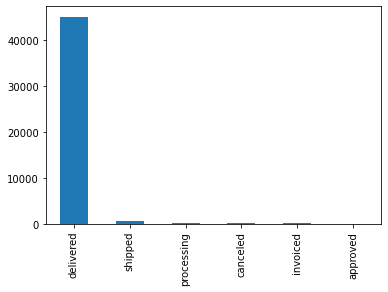

In [231]:
df_OPCD_2017['order_status'].value_counts().plot(kind='bar')
plt.show()

Tipo da order_status com 'delivered'(entregue) com 97.4%. 

A grande maioria dos pedidos foram entregues. 
Presumo que ambas as condições conduzam à mesma conclusão de que o pedido não foi executado(sem pagamentos e avaliações). Portanto, irei deletar esses registros do conjunto de dados.

In [232]:
df_OPCD_2017.shape

(46239, 120)

In [233]:
df_OPCD_2017 = df_OPCD_2017[df_OPCD_2017['order_status'] == 'delivered']

In [234]:
df_OPCD_2017.shape

(45070, 120)

In [235]:
(df_OPCD_2017['order_status'].value_counts() / df_OPCD_2017.shape[0]) *100

delivered    100.0
Name: order_status, dtype: float64

In [236]:
df_datas['Tipo'].unique()

array(['Nacional', 'Estadual', 'Comemorativa'], dtype=object)

In [237]:
df_datas.replace({'Nacional' : '1', 'Estadual': '1', 'Comemorativa': '1'}, inplace=True)
df_datas.rename(columns={'Tipo': 'Nacional_Estadual_Comemorativa'}, inplace=True)
df_datas['Data'] = df_datas['Data'].astype('datetime64')
df_datas['Nacional_Estadual_Comemorativa'] = df_datas['Nacional_Estadual_Comemorativa'].astype(np.uint8)
df_datas['Descricao'] = df_datas['Descricao'].astype(str)
df_datas['Uf'] = df_datas['Uf'].astype(str)

In [238]:
df_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Data                            737 non-null    datetime64[ns]
 1   Nacional_Estadual_Comemorativa  737 non-null    uint8         
 2   Descricao                       737 non-null    object        
 3   Uf                              737 non-null    object        
dtypes: datetime64[ns](1), object(2), uint8(1)
memory usage: 18.1+ KB


In [239]:
df_OPCD_2017.shape

(45070, 120)

In [240]:
df_OPCD_2017['data_compra']=pd.to_datetime(df_OPCD_2017['order_purchase_timestamp']).dt.date
df_OPCD_2017['data_compra'] = df_OPCD_2017['data_compra'].astype('datetime64')

In [241]:
#df_OPCD_2017.drop('data_compra', axis=1, inplace=True)

In [242]:
df_OPCD_2017 = pd.merge(left=df_OPCD_2017,right=df_datas, how='left',left_on=['data_compra','customer_state'], right_on=['Data','Uf'])
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

Colunas  Nulos  Total de nulos  \
0                                            seller_id      0            0.00   
1                                             order_id      0            0.00   
2                                           product_id      0            0.00   
3                                  shipping_limit_date      0            0.00   
4                                        order_item_id      0            0.00   
5                                                price      0            0.00   
6                                        freight_value      0            0.00   
7                                          customer_id      0            0.00   
8                                         order_status      0            0.00   
9                             order_purchase_timestamp      0            0.00   
10                                   order_approved_at     14            0.03   
11                        order_delivered_carrier_date      2            0.00   
12                       order_delivered_customer_date      2            0.00   
13                       order_estimated_delivery_date      0            0.00   
14                             review_answer_timestamp      0            0.00   
15                                           review_id      0            0.00   
16                                        review_score      0            0.00   
17                                review_comment_title  45058           99.97   
18                              review_comment_message  26117           57.95   
19                                review_creation_date      0            0.00   
20                           payment_sequential_boleto      0            0.00   
21                      payment_sequential_credit_card      0            0.00   
22                       payment_sequential_debit_card      0            0.00   
23                          payment_sequential_voucher      0            0.00   
24                         payment_installments_boleto      0            0.00   
25                    payment_installments_credit_card      0            0.00   
26                     payment_installments_debit_card      0            0.00   
27                        payment_installments_voucher      0            0.00   
28                                payment_value_boleto      0            0.00   
29                           payment_value_credit_card      0            0.00   
30                            payment_value_debit_card      0            0.00   
31                               payment_value_voucher      0            0.00   
32                                 payment_type_boleto      0            0.00   
33                            payment_type_credit_card      0            0.00   
34                             payment_type_debit_card      0            0.00   
35                                payment_type_voucher      0            0.00   
36                                  customer_unique_id      0            0.00   
37                            customer_zip_code_prefix      0            0.00   
38                                       customer_city      0            0.00   
39                                      customer_state      0            0.00   
40                               product_category_name    787            1.75   
41                                 product_name_lenght    787            1.75   
42                          product_description_lenght    787            1.75   
43                                  product_photos_qty    787            1.75   
44                                    product_weight_g     16            0.04   
45                                   product_length_cm     16            0.04   
46                                   product_height_cm     16            0.04   
47                                    product_width_cm     16            0.04   
48                              seller_zip_code_prefix      0            0.00 

In [243]:
df_OPCD_2017['Descricao'].unique()

array([nan, 'Padroeira do Brasil', 'Dia da Abolição da Escravatura',
       'Dia das Mães', 'Dia Mundial do Meio Ambiente',
       'Proclamação da República', 'Dia de São Pedro', 'Páscoa',
       'Independência do Brasil', 'Natal',
       'Dia Nacional da Consciência Negra', 'Finados', 'Dia de São João',
       'Corpus Christi', 'Dia da Mulher', 'Zumbi dos Palmares',
       'Dia dos Pais', 'Dia do Amigo e Internacional da Amizade',
       'Sexta-feira Santa', 'Dia do Professor', 'Carnaval',
       'Adesão do Grão-Pará à indepen', 'Descobrimento do Brasil',
       'Tiradentes', 'Dia do Trabalhador',
       'Revolução Constitucionalista\xa0de 1932', 'Dia dos Namorados',
       'Dia do Índio', 'Criação da capitania', 'Dia de São Jorge',
       'Revolução Farroupilha', 'Dia do Funcionário Público',
       'Dia de Reis', 'Independência da Bahia', 'Conscriência Negra',
       'Adesão do Maranhão à independê', 'Data Magna do Ceará',
       'Dia do Evangélico', 'Fundação do Estado da Paraíba',

In [244]:
#df_OPCD_2017.to_excel(caminho_temp+'df_OPCD_2017.xlsx', index=False)

In [245]:
#df_OPCD_2017 = pd.read_excel(caminho_temp+'df_OPCD_2017.xlsx')

## <a class="anchor" id="trat">2.4 Tratamentos de Dados</a>

## <a class="anchor" id="ause">2.4.1 Ausentes</a>

In [246]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

Colunas  Nulos  Total de nulos  \
0                                            seller_id      0            0.00   
1                                             order_id      0            0.00   
2                                           product_id      0            0.00   
3                                  shipping_limit_date      0            0.00   
4                                        order_item_id      0            0.00   
5                                                price      0            0.00   
6                                        freight_value      0            0.00   
7                                          customer_id      0            0.00   
8                                         order_status      0            0.00   
9                             order_purchase_timestamp      0            0.00   
10                                   order_approved_at     14            0.03   
11                        order_delivered_carrier_date      2            0.00   
12                       order_delivered_customer_date      2            0.00   
13                       order_estimated_delivery_date      0            0.00   
14                             review_answer_timestamp      0            0.00   
15                                           review_id      0            0.00   
16                                        review_score      0            0.00   
17                                review_comment_title  45058           99.97   
18                              review_comment_message  26117           57.95   
19                                review_creation_date      0            0.00   
20                           payment_sequential_boleto      0            0.00   
21                      payment_sequential_credit_card      0            0.00   
22                       payment_sequential_debit_card      0            0.00   
23                          payment_sequential_voucher      0            0.00   
24                         payment_installments_boleto      0            0.00   
25                    payment_installments_credit_card      0            0.00   
26                     payment_installments_debit_card      0            0.00   
27                        payment_installments_voucher      0            0.00   
28                                payment_value_boleto      0            0.00   
29                           payment_value_credit_card      0            0.00   
30                            payment_value_debit_card      0            0.00   
31                               payment_value_voucher      0            0.00   
32                                 payment_type_boleto      0            0.00   
33                            payment_type_credit_card      0            0.00   
34                             payment_type_debit_card      0            0.00   
35                                payment_type_voucher      0            0.00   
36                                  customer_unique_id      0            0.00   
37                            customer_zip_code_prefix      0            0.00   
38                                       customer_city      0            0.00   
39                                      customer_state      0            0.00   
40                               product_category_name    787            1.75   
41                                 product_name_lenght    787            1.75   
42                          product_description_lenght    787            1.75   
43                                  product_photos_qty    787            1.75   
44                                    product_weight_g     16            0.04   
45                                   product_length_cm     16            0.04   
46                                   product_height_cm     16            0.04   
47                                    product_width_cm     16            0.04   
48                              seller_zip_code_prefix      0            0.00 

In [247]:
df_OPCD_2017.shape

(45070, 125)

df_OPCD_2017.drop(['Bandeira','Região Metropolitana','review_comment_title','Código Concentração Urbana',
                 'Nome Concentração Urbana','Tipo Concentração Urbana','Código Arranjo Populacional',
                 'Nome Arranjo Populacional','Unidade federativa','Abreviação','Área (km²)','População (2014)',
                 'Densidade (2005)','PIB (2015)','(% total) (2015)','PIB per capita (R$) (2015)',
                 'IDH (2010)','Alfabetização (2016)','Mortalidade infantil (2016)','Expectativa de vida (2016)','data_compra','Data','Descricao','Uf'], axis=1, inplace=True)
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

In [248]:
print("{} Número total de ocorrencias de nulos no dataframe.".format(df_OPCD_2017.isna().sum().sum()))

727026 Número total de ocorrencias de nulos no dataframe.


Tratando feature Sede de governo: nan=0 demais casos=1, indicando ser capital do respectivo estado.

In [249]:
df_OPCD_2017['Sede de governo'].unique()

array([nan, 'São Paulo', 'Fortaleza', 'Rio de Janeiro', 'Belo Horizonte',
       'Porto Alegre', 'Goiânia', 'Curitiba', 'Cuiabá', 'Teresina',
       'Recife', 'Brasília', 'Salvador', 'Palmas', 'Vitória',
       'Florianópolis', 'Belém', 'João Pessoa', 'Maceió', 'Manaus',
       'Campo Grande', 'Natal', 'São Luís', 'Aracaju', 'Porto Velho',
       'Rio Branco', 'Boa Vista', 'Macapá'], dtype=object)

In [250]:
df_OPCD_2017['Sede de governo']= df_OPCD_2017['Sede de governo'].replace(np.nan, 0)
df_OPCD_2017['Sede de governo'] = df_OPCD_2017['Sede de governo'].apply(lambda x: 1 if x != 0  else 0)
df_OPCD_2017['Sede de governo'].unique()

array([0, 1], dtype=int64)

Feature Sede de governo: 0 e 1(é capital do respectivo estado).

In [251]:
 np.unique(df_OPCD_2017[df_OPCD_2017['Sede de governo'] == 1][['Nome do Município']])

array(['Aracaju', 'Belo Horizonte', 'Belém', 'Boa Vista', 'Brasília',
       'Campo Grande', 'Cuiabá', 'Curitiba', 'Florianópolis', 'Fortaleza',
       'Goiânia', 'João Pessoa', 'Macapá', 'Maceió', 'Manaus', 'Natal',
       'Palmas', 'Porto Alegre', 'Porto Velho', 'Recife', 'Rio Branco',
       'Rio de Janeiro', 'Salvador', 'São Luís', 'São Paulo', 'Teresina',
       'Vitória'], dtype=object)

In [252]:
print("{} Número total de ocorrencias de nulos no dataframe.".format(df_OPCD_2017.isna().sum().sum()))

698422 Número total de ocorrencias de nulos no dataframe.


In [253]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

Colunas  Nulos  Total de nulos  \
0                                            seller_id      0            0.00   
1                                             order_id      0            0.00   
2                                           product_id      0            0.00   
3                                  shipping_limit_date      0            0.00   
4                                        order_item_id      0            0.00   
5                                                price      0            0.00   
6                                        freight_value      0            0.00   
7                                          customer_id      0            0.00   
8                                         order_status      0            0.00   
9                             order_purchase_timestamp      0            0.00   
10                                   order_approved_at     14            0.03   
11                        order_delivered_carrier_date      2            0.00   
12                       order_delivered_customer_date      2            0.00   
13                       order_estimated_delivery_date      0            0.00   
14                             review_answer_timestamp      0            0.00   
15                                           review_id      0            0.00   
16                                        review_score      0            0.00   
17                                review_comment_title  45058           99.97   
18                              review_comment_message  26117           57.95   
19                                review_creation_date      0            0.00   
20                           payment_sequential_boleto      0            0.00   
21                      payment_sequential_credit_card      0            0.00   
22                       payment_sequential_debit_card      0            0.00   
23                          payment_sequential_voucher      0            0.00   
24                         payment_installments_boleto      0            0.00   
25                    payment_installments_credit_card      0            0.00   
26                     payment_installments_debit_card      0            0.00   
27                        payment_installments_voucher      0            0.00   
28                                payment_value_boleto      0            0.00   
29                           payment_value_credit_card      0            0.00   
30                            payment_value_debit_card      0            0.00   
31                               payment_value_voucher      0            0.00   
32                                 payment_type_boleto      0            0.00   
33                            payment_type_credit_card      0            0.00   
34                             payment_type_debit_card      0            0.00   
35                                payment_type_voucher      0            0.00   
36                                  customer_unique_id      0            0.00   
37                            customer_zip_code_prefix      0            0.00   
38                                       customer_city      0            0.00   
39                                      customer_state      0            0.00   
40                               product_category_name    787            1.75   
41                                 product_name_lenght    787            1.75   
42                          product_description_lenght    787            1.75   
43                                  product_photos_qty    787            1.75   
44                                    product_weight_g     16            0.04   
45                                   product_length_cm     16            0.04   
46                                   product_height_cm     16            0.04   
47                                    product_width_cm     16            0.04   
48                              seller_zip_code_prefix      0            0.00 

Feature product_category_name	com 787	1.75% nulos.Alterado então para Outros.

In [254]:
df_OPCD_2017['product_category_name'].fillna('Outros', inplace=True)
df_OPCD_2017['product_category_name'].isna().sum()

0

Feature review_comment_message	26117 ocorrencias 57.95% nulos. Alterado para Sem comentario.

In [255]:
df_OPCD_2017['review_comment_message'].fillna('Sem comentario', inplace=True)
df_OPCD_2017['review_comment_message'].isna().sum()

0

In [256]:
df_OPCD_2017['Descricao'].fillna('Não é feriado.', inplace=True)
df_OPCD_2017['Descricao'].isna().sum()

0

Nas features:

order_delivered_carrier_date

order_delivered_customer_date

ocorrem nulos(0.0044%- 2 ocorrencias) e serão excluidos.

In [257]:
df_OPCD_2017.dropna(subset = ['order_delivered_carrier_date','order_delivered_customer_date'], inplace=True)

In [258]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux[df_aux['Total de nulos'] > 0]

Colunas  Nulos  Total de nulos  Total de unicos  \
10                order_approved_at     14            0.03            41345   
17             review_comment_title  45055           99.97               12   
41              product_name_lenght    787            1.75               63   
42       product_description_lenght    787            1.75             2441   
43               product_photos_qty    787            1.75               17   
44                 product_weight_g     16            0.04             1511   
45                product_length_cm     16            0.04               98   
46                product_height_cm     16            0.04               97   
47                 product_width_cm     16            0.04               87   
51                customer_latitude    405            0.90            11813   
52               customer_longitude    405            0.90            11813   
53                  seller_latitude    117            0.26             1356   
54                 seller_longitude    117            0.26             1356   
64             Região Metropolitana  12885           28.59               78   
75       Código Concentração Urbana   9925           22.02              184   
76         Nome Concentração Urbana   9925           22.02              184   
77         Tipo Concentração Urbana   9925           22.02                7   
78      Código Arranjo Populacional  11205           24.86              268   
79        Nome Arranjo Populacional  11205           24.86              268   
99                         Bandeira  45067          100.00                0   
100              Unidade federativa  28602           63.47               27   
101                      Abreviação  28602           63.47               27   
103                      Área (km²)  28602           63.47               27   
104                População (2014)  28602           63.47               27   
105                Densidade (2005)  28602           63.47               27   
106                      PIB (2015)  28602           63.47               27   
107                (% total) (2015)  28602           63.47               21   
108      PIB per capita (R$) (2015)  28602           63.47               27   
109                      IDH (2010)  28602           63.47               26   
110            Alfabetização (2016)  28602           63.47               23   
111     Mortalidade infantil (2016)  28602           63.47               27   
112      Expectativa de vida (2016)  28602           63.47               23   
121                            Data  42392           94.06               37   
122  Nacional_Estadual_Comemorativa  42392           94.06                1   
124                              Uf  42392           94.06               27   

     Numero Registros            Tipo  
10              45067  datetime64[ns]  
17              45067          object  
41              45067         float64  
42              45067         float64  
43              45067         float64  
44              45067         float64  
45              45067         float64  
46              45067         float64  
47              45067         float64  
51              45067         float64  
52              45067         float64  
53              45067         float64  
54              45067         float64  
64              45067          object  
75              45067         float64  
76              45067          object  
77              45067          object  
78              45067         float64  
79              45067          object  
99              45067         float64  
100             45067          object  
101             45067          object  
103             45067          object  
104             45067          object  
105             45067         float64  
106             45067          object  
107             45067         float64  
108             45067          object  
109             45067  

Clientes com coordenadas faltantes.

In [259]:
df_cli_sem_coordenadas=df_OPCD_2017[df_OPCD_2017['customer_latitude'].isna()]
df_cli_sem_coordenadas.shape

(405, 125)

In [260]:
df_cli_sem_coordenadas[['customer_zip_code_prefix','customer_city','customer_state']]

customer_zip_code_prefix          customer_city customer_state
309                       15903           taquaritinga             SP
314                       37653            camanducaia             MG
415                       73255               brasilia             DF
730                       71919               brasilia             DF
832                       28145  campos dos goytacazes             RJ
...                         ...                    ...            ...
44629                     72863              novo gama             GO
44840                     72005               brasilia             DF
44925                     85926                 toledo             PR
44930                     37925                 piumhi             MG
44944                     73255               brasilia             DF

[405 rows x 3 columns]

df_localizacoes_sem_duplicados foi gerado no item 2.1.8 Merge: Localizações.

In [261]:
df_localizacoes_sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


Agregando geolocalização das cidades pela mediana.

In [262]:
df_localizacoes_sem_duplicados_agreg = df_localizacoes_sem_duplicados.groupby('geolocation_city').agg({
    'geolocation_lat':'median',
    'geolocation_lng':'median', 
    'geolocation_state': 'last'
}).reset_index()
df_localizacoes_sem_duplicados_agreg.shape

(8011, 4)

In [263]:
df_cli_sem_coordenadas_pre_merge = df_cli_sem_coordenadas.copy()
df_cli_sem_coordenadas_pre_merge['indice_antigo'] = df_cli_sem_coordenadas_pre_merge.index
df_lista = df_cli_sem_coordenadas_pre_merge.merge(df_localizacoes_sem_duplicados_agreg, how='left', left_on='customer_city', right_on='geolocation_city')
len(df_lista)

405

df_lista base para atualizar df_OPCD_2017 com as coordenadas faltantes dos clientes.

In [264]:
df_lista['geolocation_city'].isna().sum()

4

In [265]:
df_listagem = df_lista[df_lista['geolocation_city'].isna()].copy()
df_listagem.shape

(4, 130)

Seta o indice de df_lista com os indices dos faltantes.

In [266]:
df_lista.set_index(df_lista['indice_antigo'], inplace=True)
df_lista.shape

(405, 130)

In [267]:
# fonte: https://www.askpython.com/python/python-geopy-to-find-geocode-of-an-address
#Criando uma instancia da classe Nominatim 
geolocator = Nominatim(user_agent="my_request")

In [268]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df_listagem['location'] = df_listagem['customer_city'].apply(geocode)

In [269]:
df_listagem.head(2)

seller_id                          order_id  \
126  4cf490a58259286ada5ba8525ba9e84a  7c42aafccecb4aefc0c0b345114cb321   
348  d91fb3b7d041e83b64a00a3edfb37e4f  71f500b84266602e89447c7eab602ddd   

                           product_id shipping_limit_date  order_item_id  \
126  ff81cd23251a357a120054397a01849f 2017-11-27 03:30:53              1   
348  768cb9a5290c41d7968447ae28c64cca 2017-06-20 22:22:34              1   

      price  freight_value                       customer_id order_status  \
126  178.90          36.57  e6add8f4805cb6a382c26548daaed9d7    delivered   
348   40.95          17.60  aa743174847b78266e47461b8bcd1bb5    delivered   

    order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
126      2017-11-06 00:27:44 2017-11-08 03:35:40          2017-11-14 16:56:51   
348      2017-06-14 22:09:08 2017-06-14 22:22:34          2017-06-19 17:06:40   

    order_delivered_customer_date order_estimated_delivery_date  \
126           2017-12-12 23:32:35                    2017-12-19   
348           2017-06-28 11:47:55                    2017-07-11   

    review_answer_timestamp                         review_id  review_score  \
126     2017-12-14 03:25:40  db0d4888d39e8fafdb3e41b99eaf30ef             1   
348     2017-06-30 18:08:26  823c7dc021633f41076da57ff814e8e0             5   

    review_comment_title                             review_comment_message  \
126                  NaN  Não recebi a saida maternidade vermelha q comp...   
348                  NaN      Entrega super rápida, e produto de qualidade.   

    review_creation_date  payment_sequential_boleto  \
126           2017-12-13                        1.0   
348           2017-06-29                        0.0   

     payment_sequential_credit_card  payment_sequential_debit_card  \
126                             0.0                            0.0   
348                             1.0                            0.0   

     payment_sequential_voucher  payment_installments_boleto  \
126                         0.0                          1.0   
348                         0.0                          0.0   

     payment_installments_credit_card  payment_installments_debit_card  \
126                               0.0                              0.0   
348                               2.0                              0.0   

     payment_installments_voucher  payment_value_boleto  \
126                           0.0                215.47   
348                           0.0                  0.00   

     payment_value_credit_card  payment_value_debit_card  \
126                       0.00                       0.0   
348                      58.55                       0.0   

     payment_value_voucher  payment_type_boleto  payment_type_credit_card  \
126                    0.0                    1                         0   
348                    0.0                    0                         1   

     payment_type_debit_card  payment_type_voucher  \
126                        0                     0   
348                        0                     0   

                   customer_unique_id  customer_zip_code_prefix customer_city  \
126  6c9871f7c55b411fabb59d9130b51e6d                     65830      sambaiba   
348  b91103208abd5c826bd0bc26ec99c1a2                     95572     mampituba   

    customer_state product_category_name  product_name_lenght  \
126             MA            cool_stuff                 54.0   
348             RS      eletrodomesticos                 58.0   

     product_description_lenght  product_photos_qty  product_weight_g  \
126                       268.0                 4.0             700.0   
348                       535.0                 1.0           15050.0   

     product_length_cm  product_height_cm  product_width_cm  \
126               34.0               10.0              27.0   
348               39.0               38.0              39.0   

     seller_zip_code_p

In [270]:
df_listagem['geolocation_lat'] = df_listagem['location'].apply(lambda x: x.latitude if x else None)
df_listagem['geolocation_lng'] = df_listagem['location'].apply(lambda x: x.longitude if x else None)
df_listagem

seller_id                          order_id  \
126  4cf490a58259286ada5ba8525ba9e84a  7c42aafccecb4aefc0c0b345114cb321   
348  d91fb3b7d041e83b64a00a3edfb37e4f  71f500b84266602e89447c7eab602ddd   
381  e9d99831abad74458942f21e16f33f92  2e79e51b96cf9b836ce81f55548d018e   
386  f2336e113377dd21c744d9c4fc8293a9  51e827dc634ca855acba1d305c4649af   

                           product_id shipping_limit_date  order_item_id  \
126  ff81cd23251a357a120054397a01849f 2017-11-27 03:30:53              1   
348  768cb9a5290c41d7968447ae28c64cca 2017-06-20 22:22:34              1   
381  144fc7abb16b6f6d92d2c9f34d3c3452 2017-10-13 13:14:11              1   
386  0c8862859cb952ee81428f80dc8140d9 2017-09-25 13:35:18              1   

       price  freight_value                       customer_id order_status  \
126   178.90          36.57  e6add8f4805cb6a382c26548daaed9d7    delivered   
348    40.95          17.60  aa743174847b78266e47461b8bcd1bb5    delivered   
381    35.99          25.63  09f38e2ced1fe32a87b56f43e079f6d4    delivered   
386  1199.00          66.83  dcef2fe349300ac52c962eb0f0fbc453    delivered   

    order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
126      2017-11-06 00:27:44 2017-11-08 03:35:40          2017-11-14 16:56:51   
348      2017-06-14 22:09:08 2017-06-14 22:22:34          2017-06-19 17:06:40   
381      2017-10-07 13:04:01 2017-10-07 13:14:11          2017-10-23 20:53:55   
386      2017-09-15 13:18:29 2017-09-15 13:35:18          2017-09-26 20:32:44   

    order_delivered_customer_date order_estimated_delivery_date  \
126           2017-12-12 23:32:35                    2017-12-19   
348           2017-06-28 11:47:55                    2017-07-11   
381           2017-11-07 20:37:55                    2017-11-13   
386           2017-10-09 10:37:10                    2017-10-19   

    review_answer_timestamp                         review_id  review_score  \
126     2017-12-14 03:25:40  db0d4888d39e8fafdb3e41b99eaf30ef             1   
348     2017-06-30 18:08:26  823c7dc021633f41076da57ff814e8e0             5   
381     2017-11-08 23:32:05  6f83494b7cb456bcdefcf76998f8a46f             5   
386     2017-10-10 16:21:28  ae20bea72513b2ccb531a5e21ee8e81f             5   

    review_comment_title                             review_comment_message  \
126                  NaN  Não recebi a saida maternidade vermelha q comp...   
348                  NaN      Entrega super rápida, e produto de qualidade.   
381                  NaN                                     Sem comentario   
386                  NaN                                   produto perfeito   

    review_creation_date  payment_sequential_boleto  \
126           2017-12-13                        1.0   
348           2017-06-29                        0.0   
381           2017-11-08                        0.0   
386           2017-10-10                        0.0   

     payment_sequential_credit_card  payment_sequential_debit_card  \
126                             0.0                            0.0   
348                             1.0                            0.0   
381                             1.0                            0.0   
386                             1.0                            0.0   

     payment_sequential_voucher  payment_installments_boleto  \
126                         0.0                          1.0   
348                         0.0                          0.0   
381                         0.0                          0.0   
386                         0.0                          0.0   

     payment_installments_credit_card  payment_installments_debit_card  \
126                               0.0                              0.0   
348                               2.0                              0.0   
381                               1.0                              0.0   
386                              10.0                              0.0   

     payment_installments_v

In [271]:
df_listagem['geolocation_lat'].isna().sum()

0

In [272]:
df_indices = df_lista[df_lista['geolocation_lat'].isna()].index
len(df_indices)

4

In [273]:
lista=df_listagem['geolocation_lat'].tolist()
df_lista.loc[df_indices, 'geolocation_lat'] = lista
df_lista['geolocation_lat'].isna().sum()

0

In [274]:
lista=df_listagem['geolocation_lng'].tolist()
df_lista.loc[df_indices, 'geolocation_lng'] = lista
df_lista['geolocation_lng'].isna().sum()

0

In [275]:
df_OPCD_2017['customer_latitude'].isna().sum()

405

In [276]:
df_OPCD_2017['customer_longitude'].isna().sum()

405

Verificando os indices para depois atualizar.

In [277]:
df_indice_sem_latitude = df_OPCD_2017[df_OPCD_2017['customer_latitude'].isna()].index

In [278]:
df_indice_sem_latitude

Int64Index([  309,   314,   415,   730,   832,   928,  1052,  1317,  1478,
             1671,
            ...
            44204, 44236, 44476, 44488, 44557, 44629, 44840, 44925, 44930,
            44944],
           dtype='int64', length=405)

In [279]:
df_lista.index

Int64Index([  309,   314,   415,   730,   832,   928,  1052,  1317,  1478,
             1671,
            ...
            44204, 44236, 44476, 44488, 44557, 44629, 44840, 44925, 44930,
            44944],
           dtype='int64', name='indice_antigo', length=405)

Atualizando df_OPCD_2017 as coordenadas dos clientes que estavam faltando.

In [280]:
lista=df_lista['geolocation_lat'].tolist()
df_OPCD_2017.loc[df_indice_sem_latitude, 'customer_latitude'] = lista
lista=df_lista['geolocation_lng'].tolist()
df_OPCD_2017.loc[df_indice_sem_latitude, 'customer_longitude'] = lista

Verificando df_OPCD_2017 coordenadas dos clientes estão todas preenchidas.

In [281]:
df_OPCD_2017['customer_latitude'].isna().sum()

0

In [282]:
df_OPCD_2017['customer_longitude'].isna().sum()

0

In [283]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux[df_aux['Total de nulos'] > 0]

Colunas  Nulos  Total de nulos  Total de unicos  \
10                order_approved_at     14            0.03            41345   
17             review_comment_title  45055           99.97               12   
41              product_name_lenght    787            1.75               63   
42       product_description_lenght    787            1.75             2441   
43               product_photos_qty    787            1.75               17   
44                 product_weight_g     16            0.04             1511   
45                product_length_cm     16            0.04               98   
46                product_height_cm     16            0.04               97   
47                 product_width_cm     16            0.04               87   
53                  seller_latitude    117            0.26             1356   
54                 seller_longitude    117            0.26             1356   
64             Região Metropolitana  12885           28.59               78   
75       Código Concentração Urbana   9925           22.02              184   
76         Nome Concentração Urbana   9925           22.02              184   
77         Tipo Concentração Urbana   9925           22.02                7   
78      Código Arranjo Populacional  11205           24.86              268   
79        Nome Arranjo Populacional  11205           24.86              268   
99                         Bandeira  45067          100.00                0   
100              Unidade federativa  28602           63.47               27   
101                      Abreviação  28602           63.47               27   
103                      Área (km²)  28602           63.47               27   
104                População (2014)  28602           63.47               27   
105                Densidade (2005)  28602           63.47               27   
106                      PIB (2015)  28602           63.47               27   
107                (% total) (2015)  28602           63.47               21   
108      PIB per capita (R$) (2015)  28602           63.47               27   
109                      IDH (2010)  28602           63.47               26   
110            Alfabetização (2016)  28602           63.47               23   
111     Mortalidade infantil (2016)  28602           63.47               27   
112      Expectativa de vida (2016)  28602           63.47               23   
121                            Data  42392           94.06               37   
122  Nacional_Estadual_Comemorativa  42392           94.06                1   
124                              Uf  42392           94.06               27   

     Numero Registros            Tipo  
10              45067  datetime64[ns]  
17              45067          object  
41              45067         float64  
42              45067         float64  
43              45067         float64  
44              45067         float64  
45              45067         float64  
46              45067         float64  
47              45067         float64  
53              45067         float64  
54              45067         float64  
64              45067          object  
75              45067         float64  
76              45067          object  
77              45067          object  
78              45067         float64  
79              45067          object  
99              45067         float64  
100             45067          object  
101             45067          object  
103             45067          object  
104             45067          object  
105             45067         float64  
106             45067          object  
107             45067         float64  
108             45067          object  
109             45067         float64  
110             45067          object  
111             45067          object  
112             45067          object  
121             45067  datetime64[ns]  
122             45067         float64  
124             45067

Quantos faltantes.

In [284]:
print("{} Número total de ocorrencias de nulos no dataframe..".format(df_OPCD_2017.isna().sum().sum()))

628265 Número total de ocorrencias de nulos no dataframe..


Vendedores com coordenadas faltantes.

In [285]:
df_vend_sem_coordenadas=df_OPCD_2017[df_OPCD_2017['seller_latitude'].isna()]
df_vend_sem_coordenadas.shape

(117, 125)

In [286]:
df_vend_sem_coordenadas[['seller_zip_code_prefix','seller_city','seller_state']]

seller_zip_code_prefix      seller_city seller_state
1470                     7412            aruja           SP
1471                     7412            aruja           SP
7483                    72580         brasilia           DF
7868                     2285        sao paulo           SP
7869                     2285        sao paulo           SP
7870                     2285        sao paulo           SP
7871                     2285        sao paulo           SP
7872                     2285        sao paulo           SP
7873                     2285        sao paulo           SP
7874                     2285        sao paulo           SP
7875                     2285        sao paulo           SP
7876                     2285        sao paulo           SP
7877                     2285        sao paulo           SP
7878                     2285        sao paulo           SP
7879                     2285        sao paulo           SP
7880                     2285        sao paulo           SP
7881                     2285        sao paulo           SP
7882                     2285        sao paulo           SP
7883                     2285        sao paulo           SP
7884                     2285        sao paulo           SP
7885                     2285        sao paulo           SP
7886                     2285        sao paulo           SP
7887                     2285        sao paulo           SP
7888                     2285        sao paulo           SP
7889                     2285        sao paulo           SP
7890                     2285        sao paulo           SP
7891                     2285        sao paulo           SP
7892                     2285        sao paulo           SP
7893                     2285        sao paulo           SP
7894                     2285        sao paulo           SP
7895                     2285        sao paulo           SP
7896                     2285        sao paulo           SP
7897                     2285        sao paulo           SP
7898                     2285        sao paulo           SP
7899                     2285        sao paulo           SP
7900                     2285        sao paulo           SP
7901                     2285        sao paulo           SP
7902                     2285        sao paulo           SP
7903                     2285        sao paulo           SP
7904                     2285        sao paulo           SP
7905                     2285        sao paulo           SP
7906                     2285        sao paulo           SP
7907                     2285        sao paulo           SP
7908                     2285        sao paulo           SP
7909                     2285        sao paulo           SP
7910                     2285        sao paulo           SP
10907                   71551         brasilia           DF
10908                   71551         brasilia           DF
10909                   71551         brasilia           DF
10910                   71551         brasilia           DF
10911                   71551         brasilia           DF
10912                   71551         brasilia           DF
10913                   71551         brasilia           DF
10914                   71551         brasilia           DF
10915                   71551         brasilia           DF
10916                   71551         brasilia           DF
10917                   71551         brasilia           DF
10918                   71551         brasilia           DF
10919                   71551         brasilia           DF
10920                   71551         brasilia           DF
10921                   71551         brasilia           DF
10922                   71551         brasilia           DF
10923                   71551         brasilia           DF
10924                   71551         brasilia           DF
10925                   71551         brasilia           DF
10926                   71551         brasilia 

df_localizacoes_sem_duplicados foi gerado no item 2.1.8 Merge: Localizações.

In [287]:
df_localizacoes_sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


Agregando geolocalização das cidades pela mediana.

In [288]:
df_localizacoes_sem_duplicados_agreg = df_localizacoes_sem_duplicados.groupby('geolocation_city').agg({
    'geolocation_lat':'median',
    'geolocation_lng':'median', 
    'geolocation_state': 'last'
}).reset_index()
df_localizacoes_sem_duplicados_agreg.shape

(8011, 4)

df_lista base para atualizar df_OPCD_2017 com as coordenadas faltantes dos vendedores.

In [289]:
df_vend_sem_coordenadas_pre_merge = df_vend_sem_coordenadas.copy()
df_vend_sem_coordenadas_pre_merge['indice_antigo'] = df_vend_sem_coordenadas_pre_merge.index
df_lista = df_vend_sem_coordenadas_pre_merge.merge(df_localizacoes_sem_duplicados_agreg, how='left', left_on='seller_city', right_on='geolocation_city')
df_lista['geolocation_city'].isna().sum()

0

Seta o indice de df_lista com os indices dos faltantes.

In [290]:
df_lista.set_index(df_lista['indice_antigo'], inplace=True)
df_lista.shape

(117, 130)

In [291]:
df_indices = df_lista['geolocation_lat'].index

Verificando os indices para depois atualizar.

In [292]:
df_indice_sem_latitude = df_OPCD_2017[df_OPCD_2017['seller_latitude'].isna()].index
df_indice_sem_latitude

Int64Index([ 1470,  1471,  7483,  7868,  7869,  7870,  7871,  7872,  7873,
             7874,
            ...
            26493, 26494, 26495, 26496, 26497, 26498, 26499, 26500, 26501,
            26502],
           dtype='int64', length=117)

In [293]:
df_lista.index

Int64Index([ 1470,  1471,  7483,  7868,  7869,  7870,  7871,  7872,  7873,
             7874,
            ...
            26493, 26494, 26495, 26496, 26497, 26498, 26499, 26500, 26501,
            26502],
           dtype='int64', name='indice_antigo', length=117)

Atualizando df_OPCD_2017 as coordenadas dos vendedores que estavam faltando.

In [294]:
lista=df_lista['geolocation_lat'].tolist()
df_OPCD_2017.loc[df_indice_sem_latitude, 'seller_latitude'] = lista
lista=df_lista['geolocation_lng'].tolist()
df_OPCD_2017.loc[df_indice_sem_latitude, 'seller_longitude'] = lista

Verificando df_OPCD_2017 coordenadas dos vendedores estão todas preenchidas.

In [295]:
df_OPCD_2017['seller_latitude'].isna().sum()

0

In [296]:
df_OPCD_2017['seller_longitude'].isna().sum()

0

In [297]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux[df_aux['Total de nulos'] > 0]

Colunas  Nulos  Total de nulos  Total de unicos  \
10                order_approved_at     14            0.03            41345   
17             review_comment_title  45055           99.97               12   
41              product_name_lenght    787            1.75               63   
42       product_description_lenght    787            1.75             2441   
43               product_photos_qty    787            1.75               17   
44                 product_weight_g     16            0.04             1511   
45                product_length_cm     16            0.04               98   
46                product_height_cm     16            0.04               97   
47                 product_width_cm     16            0.04               87   
64             Região Metropolitana  12885           28.59               78   
75       Código Concentração Urbana   9925           22.02              184   
76         Nome Concentração Urbana   9925           22.02              184   
77         Tipo Concentração Urbana   9925           22.02                7   
78      Código Arranjo Populacional  11205           24.86              268   
79        Nome Arranjo Populacional  11205           24.86              268   
99                         Bandeira  45067          100.00                0   
100              Unidade federativa  28602           63.47               27   
101                      Abreviação  28602           63.47               27   
103                      Área (km²)  28602           63.47               27   
104                População (2014)  28602           63.47               27   
105                Densidade (2005)  28602           63.47               27   
106                      PIB (2015)  28602           63.47               27   
107                (% total) (2015)  28602           63.47               21   
108      PIB per capita (R$) (2015)  28602           63.47               27   
109                      IDH (2010)  28602           63.47               26   
110            Alfabetização (2016)  28602           63.47               23   
111     Mortalidade infantil (2016)  28602           63.47               27   
112      Expectativa de vida (2016)  28602           63.47               23   
121                            Data  42392           94.06               37   
122  Nacional_Estadual_Comemorativa  42392           94.06                1   
124                              Uf  42392           94.06               27   

     Numero Registros            Tipo  
10              45067  datetime64[ns]  
17              45067          object  
41              45067         float64  
42              45067         float64  
43              45067         float64  
44              45067         float64  
45              45067         float64  
46              45067         float64  
47              45067         float64  
64              45067          object  
75              45067         float64  
76              45067          object  
77              45067          object  
78              45067         float64  
79              45067          object  
99              45067         float64  
100             45067          object  
101             45067          object  
103             45067          object  
104             45067          object  
105             45067         float64  
106             45067          object  
107             45067         float64  
108             45067          object  
109             45067         float64  
110             45067          object  
111             45067          object  
112             45067          object  
121             45067  datetime64[ns]  
122             45067         float64  
124             45067          object

Tratando os falantes em: product_weight_g, product_length_cm, product_height_cm e product_width_cm.

In [298]:
np.unique(df_OPCD_2017[df_OPCD_2017['product_length_cm'].isna()][['product_id']])

array(['09ff539a621711667c43eba6a3bd8466',
       '5eb564652db742ff8f28759cd8d2652a'], dtype=object)

São 2 códigos de produtos não tem product_weight_g, product_length_cm,product_height_cm, product_width_cm no cadastro df_produtos.

In [299]:
df_produtos[df_produtos['product_id'] == '5eb564652db742ff8f28759cd8d2652a']

product_id product_category_name  \
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
18851               NaN                NaN                NaN   

       product_width_cm  
18851               NaN

In [300]:
df_produtos[df_produtos['product_id'] == '09ff539a621711667c43eba6a3bd8466']

product_id product_category_name  \
8578  09ff539a621711667c43eba6a3bd8466                 bebes   

      product_name_lenght  product_description_lenght  product_photos_qty  \
8578                 60.0                       865.0                 3.0   

      product_weight_g  product_length_cm  product_height_cm  product_width_cm  
8578               NaN                NaN                NaN               NaN

Um dos produtos é da categoria bebes, por isto verificando estatistica desta categoria.

In [301]:
df_bebes=df_produtos[df_produtos['product_category_name'] == 'bebes']

In [302]:
df_bebes.describe(percentiles=[0.1,0.25,0.5,0.65,0.71,0.99])

product_name_lenght  product_description_lenght  product_photos_qty  \
count           919.000000                  919.000000          919.000000   
mean             46.056583                  824.261153            2.352557   
std              11.382298                  544.414530            1.735121   
min               7.000000                    4.000000            1.000000   
10%              30.000000                  235.000000            1.000000   
25%              38.000000                  381.000000            1.000000   
50%              49.000000                  728.000000            2.000000   
65%              53.000000                  931.700000            2.000000   
71%              55.000000                 1057.780000            3.000000   
99%              63.000000                 2438.740000            8.820000   
max              64.000000                 3923.000000           19.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count        918.000000         918.000000         918.000000   
mean        3655.201525          37.147059          21.617647   
std         5665.129577          17.945730          16.591138   
min           50.000000          14.000000           2.000000   
10%          200.000000          18.000000           6.000000   
25%          400.000000          23.000000          10.000000   
50%          850.000000          33.000000          16.000000   
65%         1900.000000          40.000000          24.000000   
71%         3045.350000          42.000000          25.000000   
99%        28048.890000          84.000000          82.660000   
max        30000.000000         102.000000          97.000000   

       product_width_cm  
count        918.000000  
mean          28.717865  
std           13.964589  
min            8.000000  
10%           13.000000  
25%           16.000000  
50%           25.000000  
65%           33.000000  
71%           36.000000  
99%           65.000000  
max           84.000000

Existe boa diferença entre média(3655.20) e mediana(850.00). Como ocorre em 1 registro adoto a mediana.

In [303]:
df_indice=df_OPCD_2017[df_OPCD_2017['product_id'] == '09ff539a621711667c43eba6a3bd8466'].index

In [304]:
df_OPCD_2017.loc[df_indice,'product_weight_g'] = 850
df_OPCD_2017.loc[df_indice,'product_length_cm'] = 33
df_OPCD_2017.loc[df_indice,'product_height_cm'] = 16
df_OPCD_2017.loc[df_indice,'product_width_cm'] = 25
df_OPCD_2017[df_OPCD_2017['product_id'] == '09ff539a621711667c43eba6a3bd8466']

seller_id                          order_id  \
27441  8b8cfc8305aa441e4239358c9f6f2485  85f8ad45e067abd694b627859fa57453   

                             product_id shipping_limit_date  order_item_id  \
27441  09ff539a621711667c43eba6a3bd8466 2017-02-03 21:40:02              1   

        price  freight_value                       customer_id order_status  \
27441  1934.0           27.0  1d088dea8732788ec35dd4ee6dd76112    delivered   

      order_purchase_timestamp   order_approved_at  \
27441      2017-01-29 21:40:02 2017-01-30 22:32:20   

      order_delivered_carrier_date order_delivered_customer_date  \
27441          2017-02-02 05:04:58           2017-02-07 10:46:00   

      order_estimated_delivery_date review_answer_timestamp  \
27441                    2017-03-08     2017-02-09 10:09:24   

                              review_id  review_score review_comment_title  \
27441  125af5098b160c059cd60bafcc1f6ad1             5                  NaN   

      review_comment_message review_creation_date  payment_sequential_boleto  \
27441         Sem comentario           2017-02-08                        0.0   

       payment_sequential_credit_card  payment_sequential_debit_card  \
27441                             1.0                            0.0   

       payment_sequential_voucher  payment_installments_boleto  \
27441                         0.0                          0.0   

       payment_installments_credit_card  payment_installments_debit_card  \
27441                              10.0                              0.0   

       payment_installments_voucher  payment_value_boleto  \
27441                           0.0                   0.0   

       payment_value_credit_card  payment_value_debit_card  \
27441                     1961.0                       0.0   

       payment_value_voucher  payment_type_boleto  payment_type_credit_card  \
27441                    0.0                    0                         1   

       payment_type_debit_card  payment_type_voucher  \
27441                        0                     0   

                     customer_unique_id  customer_zip_code_prefix  \
27441  69b2b29382af03e03e486ad307a76000                     90160   

      customer_city customer_state product_category_name  product_name_lenght  \
27441  porto alegre             RS                 bebes                 60.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
27441                       865.0                 3.0             850.0   

       product_length_cm  product_height_cm  product_width_cm  \
27441               33.0               16.0              25.0   

       seller_zip_code_prefix seller_city seller_state  customer_latitude  \
27441                   86020    londrina           PR         -30.050698   

       customer_longitude  seller_latitude  seller_longitude  \
27441           -51.21801       -23.312709        -51.167363   

            municipio_UF seller_municipio_UF  Código da Grande Região  \
27441  PORTO ALEGRE - RS       LONDRINA - PR                        4   

      Nome da Grande Região  Código da Unidade da Federação  \
27441                   Sul                              43   

      Sigla da Unidade da Federação Nome da Unidade da Federação  \
27441                            RS            Rio Grande do Sul   

       Código do Município Nome do Município Região Metropolitana  \
27441              4314902      Porto Alegre      RM Porto Alegre   

       Código da Mesorregião            Nome da Mesorregião  \
27441                   4305  Metropolitana de Porto Alegre   

       Código da Microrregião Nome da Microrregião  \
27441                   43026         Porto Alegre   

       Código da Região Geográfica Imediata  \
27441                                430001   

      Nome da Região Geográfica Imediata  \
27441                       Porto Alegre   

      Município da Região Geográfica Imediata  \
27441                         

In [305]:
df_indice=df_OPCD_2017[df_OPCD_2017['product_id'] == '5eb564652db742ff8f28759cd8d2652a'].index

In [306]:
df_produtos.describe(percentiles=[0.1,0.25,0.5,0.65,0.71,0.99])

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
10%              33.000000                  207.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
65%              55.000000                  786.000000            2.000000   
71%              56.000000                  890.000000            3.000000   
99%              63.000000                 3286.200000            8.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
10%          175.000000          16.000000           4.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
65%         1200.000000          31.000000          17.000000   
71%         1533.000000          35.000000          20.000000   
99%        22538.000000         100.000000          69.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
10%           11.000000  
25%           15.000000  
50%           20.000000  
65%           25.000000  
71%           28.000000  
99%           63.000000  
max          118.000000

Como ocorre em 1 registro adoto a mediana.

In [307]:
df_OPCD_2017.loc[df_indice,'product_weight_g'] = 700
df_OPCD_2017.loc[df_indice,'product_length_cm'] = 25
df_OPCD_2017.loc[df_indice,'product_height_cm'] = 13
df_OPCD_2017.loc[df_indice,'product_width_cm'] = 20
df_OPCD_2017[df_OPCD_2017['product_id'] == '5eb564652db742ff8f28759cd8d2652a']

seller_id                          order_id  \
14450  4e922959ae960d389249c378d1c939f5  101157d4fae1c9fb74a00a5dee265c25   
14453  4e922959ae960d389249c378d1c939f5  1521c6bb7b1028154c8c67cf80fa809f   
14495  4e922959ae960d389249c378d1c939f5  415cfaaaa8cea49f934470548797fed1   
14517  4e922959ae960d389249c378d1c939f5  595316a07cd3dea9db7adfcc7e247ae7   
14546  4e922959ae960d389249c378d1c939f5  6e150190fbe04c642a9cf0b80d83ee16   
14548  4e922959ae960d389249c378d1c939f5  6f497c40431d5fb0cfbd6c943dd29215   
14601  4e922959ae960d389249c378d1c939f5  a2456e7f02197951664897a94c87242d   
14605  4e922959ae960d389249c378d1c939f5  a7a43f469c0d7bdb0a23a82db125aefa   
14621  4e922959ae960d389249c378d1c939f5  bbfc7badbed2f1828e22b6d629201bd4   
14625  4e922959ae960d389249c378d1c939f5  bf49f84a0580ef6751e13357776b7ed9   
14627  4e922959ae960d389249c378d1c939f5  c1424efcde3c9e9febd9e1761667789e   
14645  4e922959ae960d389249c378d1c939f5  d38dcb503cd4ddc6ce7702552918bd8f   
14657  4e922959ae960d389249c378d1c939f5  ddf16d77e858a32f36e10c289a28ef61   
14663  4e922959ae960d389249c378d1c939f5  e3daea0200104991cb979c2fcc509ae7   
14670  4e922959ae960d389249c378d1c939f5  eb855beb3ac99461f7a076b4c3652472   

                             product_id shipping_limit_date  order_item_id  \
14450  5eb564652db742ff8f28759cd8d2652a 2017-04-11 08:02:26              1   
14453  5eb564652db742ff8f28759cd8d2652a 2017-04-07 10:10:16              1   
14495  5eb564652db742ff8f28759cd8d2652a 2017-04-07 10:35:19              2   
14517  5eb564652db742ff8f28759cd8d2652a 2017-08-18 04:26:04              1   
14546  5eb564652db742ff8f28759cd8d2652a 2017-06-30 16:45:14              1   
14548  5eb564652db742ff8f28759cd8d2652a 2017-04-11 05:55:32              1   
14601  5eb564652db742ff8f28759cd8d2652a 2017-04-06 11:50:09              1   
14605  5eb564652db742ff8f28759cd8d2652a 2017-08-28 13:15:11              1   
14621  5eb564652db742ff8f28759cd8d2652a 2017-07-18 04:04:10              1   
14625  5eb564652db742ff8f28759cd8d2652a 2017-07-09 21:35:18              1   
14627  5eb564652db742ff8f28759cd8d2652a 2017-04-14 02:45:36              1   
14645  5eb564652db742ff8f28759cd8d2652a 2017-06-09 17:55:13              2   
14657  5eb564652db742ff8f28759cd8d2652a 2017-05-02 10:50:08              1   
14663  5eb564652db742ff8f28759cd8d2652a 2017-04-06 14:22:36              1   
14670  5eb564652db742ff8f28759cd8d2652a 2017-03-30 16:03:46              1   

       price  freight_value                       customer_id order_status  \
14450   29.0          14.52  f72b2f8d9295ef93fd40a4c49f67a42b    delivered   
14453   29.0          16.05  ca29b2bf57243228e98eab2dab805ae9    delivered   
14495   58.0          29.04  a8dff6357fea30071032ff2091d16430    delivered   
14517   39.0           9.27  696e8f940eeee6b009d1539b59e47366    delivered   
14546   39.0          16.79  135a42a465867ff932f1222f71a3efb2    delivered   
14548   29.0          10.96  5beb36d1757aa17a044222a7d79b9820    delivered   
14601   29.0          24.84  7317f41f2cf650174af819cdb68284f0    delivered   
14605   39.0          15.10  d7c95dc1ece116c14188092ead3d0951    delivered   
14621   39.0          11.85  f25f442c0ff3a9401eed8ed3a686f362    delivered   
14625   39.0          15.10  e7f41abe62db82cffe5c8f6138f18fb2    delivered   
14627   29.0          14.52  8a80133b8ace6b21415367a131a75a26    delivered   
14645   78.0          30.20  b0a3a02fe893d9a9385a98db1348244b    delivered   
14657   29.0          14.52  84cc013dd1790fdafb0fa598695cf3c3    delivered   
14663   29.0          10.96  4730251e8934a542a009d77dfd027375    delivered   
14670   29.0          14.52  c91289ce43149a8ea5560d446f1d1dd2    delivered   

      order_purchase_timestamp   order_approved_at  \
14450      2017-04-03 07:54:34 2017-04-04 08:02:26   
14453      2017-04-02 10:00:43 2017-04-02 10:10:16   
14495      2017-04-02 10:25:38 2017-04-02 10:35:19   
14517      2017-08-09 23:50:08 2017-08-11 04:26:04   
14546      2017-06-24 16:33:3

In [308]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux[df_aux['Total de nulos'] > 0]

Colunas  Nulos  Total de nulos  Total de unicos  \
10                order_approved_at     14            0.03            41345   
17             review_comment_title  45055           99.97               12   
41              product_name_lenght    787            1.75               63   
42       product_description_lenght    787            1.75             2441   
43               product_photos_qty    787            1.75               17   
64             Região Metropolitana  12885           28.59               78   
75       Código Concentração Urbana   9925           22.02              184   
76         Nome Concentração Urbana   9925           22.02              184   
77         Tipo Concentração Urbana   9925           22.02                7   
78      Código Arranjo Populacional  11205           24.86              268   
79        Nome Arranjo Populacional  11205           24.86              268   
99                         Bandeira  45067          100.00                0   
100              Unidade federativa  28602           63.47               27   
101                      Abreviação  28602           63.47               27   
103                      Área (km²)  28602           63.47               27   
104                População (2014)  28602           63.47               27   
105                Densidade (2005)  28602           63.47               27   
106                      PIB (2015)  28602           63.47               27   
107                (% total) (2015)  28602           63.47               21   
108      PIB per capita (R$) (2015)  28602           63.47               27   
109                      IDH (2010)  28602           63.47               26   
110            Alfabetização (2016)  28602           63.47               23   
111     Mortalidade infantil (2016)  28602           63.47               27   
112      Expectativa de vida (2016)  28602           63.47               23   
121                            Data  42392           94.06               37   
122  Nacional_Estadual_Comemorativa  42392           94.06                1   
124                              Uf  42392           94.06               27   

     Numero Registros            Tipo  
10              45067  datetime64[ns]  
17              45067          object  
41              45067         float64  
42              45067         float64  
43              45067         float64  
64              45067          object  
75              45067         float64  
76              45067          object  
77              45067          object  
78              45067         float64  
79              45067          object  
99              45067         float64  
100             45067          object  
101             45067          object  
103             45067          object  
104             45067          object  
105             45067         float64  
106             45067          object  
107             45067         float64  
108             45067          object  
109             45067         float64  
110             45067          object  
111             45067          object  
112             45067          object  
121             45067  datetime64[ns]  
122             45067         float64  
124             45067          object

Analisando faltantes em:product_name_lenght, product_description_lenght e product_photos_qty

In [309]:
df_lista=pd.DataFrame(np.unique(df_OPCD_2017[df_OPCD_2017['product_name_lenght'].isna()][['product_id']]))
df_lista.rename(columns={0: 'product_id'},inplace=True)
df_teste=df_produtos.loc[df_produtos['product_id'].isin(df_lista['product_id'])]
df_teste

product_id product_category_name  \
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
459    bcb815bba008d89458e428078c0b9211                   NaN   
504    6b82874c6b51b92913dcdb364eaaae0f                   NaN   
...                                 ...                   ...   
32487  22e8a1571e0f8e1aeac77c01ae28539c                   NaN   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
128                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
459                    NaN                         NaN                 NaN   
504                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32487                  NaN                         NaN                 NaN   
32515                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
128               300.0               16.0                7.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
459               150.0               16.0                2.0   
504             21450.0               70.0               34.0   
...                 ...                ...                ...   
32487            1300.0               17.0               25.0   
32515            1800.0               30.0               20.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
128                20.0  
154                41.0  
197                12.0  
459                11.0  
504                50.0  
...                 ...  
32487              20.0  
32515              70.0  
32616              16.0  
32772              45.0  
32852              43.0  

[377 rows x 9 columns]

Informações estão ausentes no cadastro de produtos(df_produtos).

In [310]:
df_OPCD_2017['product_category_name'].fillna('Sem comentario', inplace=True)
df_OPCD_2017['product_name_lenght'].fillna(14, inplace=True)
df_OPCD_2017['product_description_lenght'].fillna(14, inplace=True)
df_OPCD_2017['product_photos_qty'].fillna(0, inplace=True)

#Verificando alteração.
np.unique(df_OPCD_2017[df_OPCD_2017['product_name_lenght'].isna()][['product_id']])

array([], dtype=object)

Ok, atualizado corretamente o dataframe df_OPCD_2017.

Atualizando data da aprovação faltante.

In [311]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

Colunas  Nulos  Total de nulos  \
0                                            seller_id      0            0.00   
1                                             order_id      0            0.00   
2                                           product_id      0            0.00   
3                                  shipping_limit_date      0            0.00   
4                                        order_item_id      0            0.00   
5                                                price      0            0.00   
6                                        freight_value      0            0.00   
7                                          customer_id      0            0.00   
8                                         order_status      0            0.00   
9                             order_purchase_timestamp      0            0.00   
10                                   order_approved_at     14            0.03   
11                        order_delivered_carrier_date      0            0.00   
12                       order_delivered_customer_date      0            0.00   
13                       order_estimated_delivery_date      0            0.00   
14                             review_answer_timestamp      0            0.00   
15                                           review_id      0            0.00   
16                                        review_score      0            0.00   
17                                review_comment_title  45055           99.97   
18                              review_comment_message      0            0.00   
19                                review_creation_date      0            0.00   
20                           payment_sequential_boleto      0            0.00   
21                      payment_sequential_credit_card      0            0.00   
22                       payment_sequential_debit_card      0            0.00   
23                          payment_sequential_voucher      0            0.00   
24                         payment_installments_boleto      0            0.00   
25                    payment_installments_credit_card      0            0.00   
26                     payment_installments_debit_card      0            0.00   
27                        payment_installments_voucher      0            0.00   
28                                payment_value_boleto      0            0.00   
29                           payment_value_credit_card      0            0.00   
30                            payment_value_debit_card      0            0.00   
31                               payment_value_voucher      0            0.00   
32                                 payment_type_boleto      0            0.00   
33                            payment_type_credit_card      0            0.00   
34                             payment_type_debit_card      0            0.00   
35                                payment_type_voucher      0            0.00   
36                                  customer_unique_id      0            0.00   
37                            customer_zip_code_prefix      0            0.00   
38                                       customer_city      0            0.00   
39                                      customer_state      0            0.00   
40                               product_category_name      0            0.00   
41                                 product_name_lenght      0            0.00   
42                          product_description_lenght      0            0.00   
43                                  product_photos_qty      0            0.00   
44                                    product_weight_g      0            0.00   
45                                   product_length_cm      0            0.00   
46                                   product_height_cm      0            0.00   
47                                    product_width_cm      0            0.00   
48                              seller_zip_code_prefix      0            0.00 

In [312]:
pedidos_sem_aprovacao=len(np.unique(df_OPCD_2017[df_OPCD_2017['order_approved_at'].isna()][['order_id']]))                          
pedidos_sem_aprovacao_per=(pedidos_sem_aprovacao / len(np.unique(df_OPCD_2017['order_id'])))*100

print("{}/{} ({:.2f}%) Número de pedidos SEM aprovação.".format(pedidos_sem_aprovacao, len(np.unique(df_OPCD_2017['order_id'])),pedidos_sem_aprovacao_per))


14/43354 (0.03%) Número de pedidos SEM aprovação.


In [313]:
pedidos_datas_iguais=len(df_OPCD_2017[(pd.to_datetime(df_OPCD_2017['order_purchase_timestamp']).dt.date == pd.to_datetime(df_OPCD_2017['order_approved_at']).dt.date )])
pedidos_totais=len(np.unique(df_OPCD_2017['order_id']))
pedidos_datas_iguais_per=(pedidos_datas_iguais / pedidos_totais)*100
print("São {}/{} ({:.2f}%) onde order_purchase_timestamp=order_approved_at(data de compra = data de aprovação ). Posso então adotar para os faltantes em order_approved_at.".\
    format(pedidos_datas_iguais,pedidos_totais,pedidos_datas_iguais_per))

São 31584/43354 (72.85%) onde order_purchase_timestamp=order_approved_at(data de compra = data de aprovação ). Posso então adotar para os faltantes em order_approved_at.


In [314]:
np.unique(df_OPCD_2017[df_OPCD_2017['order_approved_at'].isna()][['order_id']])

array(['12a95a3c06dbaec84bcfb0e2da5d228a',
       '2babbb4b15e6d2dfe95e2de765c97bce',
       '2eecb0d85f281280f79fa00f9cec1a95',
       '3c0b8706b065f9919d0505d3b3343881',
       '51eb2eebd5d76a24625b31c33dd41449',
       '5cf925b116421afa85ee25e99b4c34fb',
       '7002a78c79c519ac54022d4f8a65e6e8',
       '7013bcfc1c97fe719a7b5e05e61c12db',
       '88083e8f64d95b932164187484d90212',
       '8a9adc69528e1001fc68dd0aaebbb54a',
       'c1d4211b3dae76144deccd6c74144a88',
       'd69e5d356402adc8cf17e08b5033acfb',
       'd77031d6a3c8a52f019764e68f211c69',
       'e04abd8149ef81b95221e88f6ed9ab6a'], dtype=object)

In [315]:
df_OPCD_2017[df_OPCD_2017['order_approved_at'].isna()]
#Mais adiante p/ teste
#e04abd8149ef81b95221e88f6ed9ab6a
#88083e8f64d95b932164187484d90212

seller_id                          order_id  \
245    004c9cd9d87a3c30c522c48c4fc07416  3c0b8706b065f9919d0505d3b3343881   
1997   0db783cfcd3b73998abc6e10e59a102f  88083e8f64d95b932164187484d90212   
8304   3481aa57cd91f9f9d3fa1fa12d9a3bf7  7013bcfc1c97fe719a7b5e05e61c12db   
14410  4e7c18b98d84e05cbae3ff0ff03846c2  e04abd8149ef81b95221e88f6ed9ab6a   
17174  5fd924b4836098a5be0ecf81ba054ce0  2eecb0d85f281280f79fa00f9cec1a95   
22099  7a67c85e85bb2ce8582c35f2203ad736  12a95a3c06dbaec84bcfb0e2da5d228a   
22161  7a67c85e85bb2ce8582c35f2203ad736  2babbb4b15e6d2dfe95e2de765c97bce   
22318  7a67c85e85bb2ce8582c35f2203ad736  5cf925b116421afa85ee25e99b4c34fb   
24542  80e6699fe29150b372a0c8a1ebf7dcc8  c1d4211b3dae76144deccd6c74144a88   
30653  a4b6b9b992b46e9ef863637af96e04bc  8a9adc69528e1001fc68dd0aaebbb54a   
34377  cb3dd9ce66268c7a3ca7241ac70ab58c  d77031d6a3c8a52f019764e68f211c69   
35931  cca3071e3e9bb7d12640c9fbe2301306  51eb2eebd5d76a24625b31c33dd41449   
35999  cca3071e3e9bb7d12640c9fbe2301306  7002a78c79c519ac54022d4f8a65e6e8   
36272  cca3071e3e9bb7d12640c9fbe2301306  d69e5d356402adc8cf17e08b5033acfb   

                             product_id shipping_limit_date  order_item_id  \
245    db8ed3d08891d16a2438a67ab3acb740 2017-02-22 14:53:27              1   
1997   8c5876b1c7768217964f353bc7e64393 2017-02-22 21:49:19              2   
8304   583916a5dae918f5e89baec139141c54 2017-02-22 12:29:47              1   
14410  0e20a07ca1714df21f9b07ca3bf7c682 2017-02-22 13:40:00              1   
17174  4fd676d9c4723d475026e40aeae56957 2017-02-21 16:21:55              1   
22099  c6dd917a0be2a704582055949915ab32 2017-02-21 12:05:55              1   
22161  c6dd917a0be2a704582055949915ab32 2017-02-22 16:15:03              1   
22318  c6dd917a0be2a704582055949915ab32 2017-02-22 15:48:35              1   
24542  5ab02ca028398131a5ae91401eb49788 2017-01-23 12:48:08              1   
30653  2c2b6a28924791234bd386bddb17512e 2017-02-22 11:45:31              1   
34377  02a79d79e818ad0be36cfc843a6af7ad 2017-02-25 10:04:19              1   
35931  7868a64aa111bbb4f41f8e1146c0becb 2017-02-28 14:52:27              1   
35999  c3b271f47e73d0c9ccf1b43b7606c705 2017-01-29 22:26:59              1   
36272  cae2e38942c8489d9d7a87a3f525c06b 2017-02-26 01:28:47              1   

        price  freight_value                       customer_id order_status  \
245    133.99          23.20  d85919cb3c0529589c6fa617f5f43281    delivered   
1997    98.00          29.04  f67cd1a215aae2a1074638bbd35a223a    delivered   
8304    49.99          15.53  2941af76d38100e0f8740a374f1a5dc3    delivered   
14410  309.90          39.11  2127dc6603ac33544953ef05ec155771    delivered   
17174  135.00          19.23  a3d3c38e58b9d2dfb9207cab690b6310    delivered   
22099   79.99          15.77  1e101e0daffaddce8159d25a8e53f2b2    delivered   
22161   79.99          26.82  74bebaf46603f9340e3b50c6b086f992    delivered   
22318   79.99          26.82  29c35fc91fc13fb5073c8f30505d860d    delivered   
24542   39.99          14.52  684cb238dc5b5d6366244e0e0776b450    delivered   
30653  379.00          17.86  4c1ccc74e00993733742a3c786dc3c1f    delivered   
34377   28.99          10.96  0bf35cac6cc7327065da879e2d90fae8    delivered   
35931   59.90          17.16  07a2a7e0f63fd8cb757ed77d4245623c    delivered   
35999   45.90          14.52  d5de688c321096d15508faae67a27051    delivered   
36272  149.80          13.63  68d081753ad4fe22fc4d410a9eb1ca01    delivered   

      order_purchase_timestamp order_approved_at order_delivered_carrier_date  \
245        2017-02-17 15:53:27               NaT          2017-02-22 11:31:30   
1997       2017-02-18 22:49:19               NaT          2017-02-22 11:31:06   
8304       2017-02-18 13:29:47               NaT          2017-02-22 16:25:25   
14410      2017-02-18 14:40:00               NaT          2017-02-23 12:04:47   
17174      2017-02-17 17:21:55               NaT          2017-02-22 11:42:51   
22099      2017-02-17 13:05:55 

In [316]:
df_OPCD_2017['order_approved_at'].fillna(df_OPCD_2017['order_purchase_timestamp'],inplace=True)
df_OPCD_2017[df_OPCD_2017['order_approved_at'].isna()][['order_purchase_timestamp']]

Empty DataFrame
Columns: [order_purchase_timestamp]
Index: []

Mais uma verificação se ocorreu cfe esperado!

In [317]:
#e04abd8149ef81b95221e88f6ed9ab6a
#88083e8f64d95b932164187484d90212
df_OPCD_2017[df_OPCD_2017['order_id'] == 'e04abd8149ef81b95221e88f6ed9ab6a']

seller_id                          order_id  \
14410  4e7c18b98d84e05cbae3ff0ff03846c2  e04abd8149ef81b95221e88f6ed9ab6a   

                             product_id shipping_limit_date  order_item_id  \
14410  0e20a07ca1714df21f9b07ca3bf7c682 2017-02-22 13:40:00              1   

       price  freight_value                       customer_id order_status  \
14410  309.9          39.11  2127dc6603ac33544953ef05ec155771    delivered   

      order_purchase_timestamp   order_approved_at  \
14410      2017-02-18 14:40:00 2017-02-18 14:40:00   

      order_delivered_carrier_date order_delivered_customer_date  \
14410          2017-02-23 12:04:47           2017-03-01 13:25:33   

      order_estimated_delivery_date review_answer_timestamp  \
14410                    2017-03-17     2017-03-21 17:35:02   

                              review_id  review_score review_comment_title  \
14410  5d0fd5deb7e6a4f952cf63cc52cc18e3             4                  NaN   

                         review_comment_message review_creation_date  \
14410  Muita demora, mas, tudo ok.\r\nTerezinha           2017-03-21   

       payment_sequential_boleto  payment_sequential_credit_card  \
14410                        1.0                             0.0   

       payment_sequential_debit_card  payment_sequential_voucher  \
14410                            0.0                         0.0   

       payment_installments_boleto  payment_installments_credit_card  \
14410                          1.0                               0.0   

       payment_installments_debit_card  payment_installments_voucher  \
14410                              0.0                           0.0   

       payment_value_boleto  payment_value_credit_card  \
14410                349.01                        0.0   

       payment_value_debit_card  payment_value_voucher  payment_type_boleto  \
14410                       0.0                    0.0                    1   

       payment_type_credit_card  payment_type_debit_card  \
14410                         0                        0   

       payment_type_voucher                customer_unique_id  \
14410                     0  8a9a08c7ca8900a200d83cf838a07e0b   

       customer_zip_code_prefix customer_city customer_state  \
14410                      6708         cotia             SP   

      product_category_name  product_name_lenght  product_description_lenght  \
14410       eletroportateis                 41.0                       675.0   

       product_photos_qty  product_weight_g  product_length_cm  \
14410                 2.0           20800.0               75.0   

       product_height_cm  product_width_cm  seller_zip_code_prefix  \
14410               40.0              40.0                   14882   

       seller_city seller_state  customer_latitude  customer_longitude  \
14410  jaboticabal           SP         -23.594124           -46.84671   

       seller_latitude  seller_longitude municipio_UF seller_municipio_UF  \
14410        -21.24638        -48.318008   COTIA - SP    JABOTICABAL - SP   

       Código da Grande Região Nome da Grande Região  \
14410                        3               Sudeste   

       Código da Unidade da Federação Sigla da Unidade da Federação  \
14410                              35                            SP   

      Nome da Unidade da Federação  Código do Município Nome do Município  \
14410                    São Paulo              3513009             Cotia   

      Região Metropolitana  Código da Mesorregião         Nome da Mesorregião  \
14410         RM São Paulo                   3515  Metropolitana de São Paulo   

       Código da Microrregião  Nome da Microrregião  \
14410                   35060  Itapecerica da Serra   

       Código da Região Geográfica Imediata  \
14410                                350001   

      Nome da Região Geográfica Imediata  \
14410                          São Paulo   

      Município da Região Geográfica Imediata  \
14410   

In [318]:
df_OPCD_2017[df_OPCD_2017['order_id'] == '88083e8f64d95b932164187484d90212']

seller_id                          order_id  \
1997  0db783cfcd3b73998abc6e10e59a102f  88083e8f64d95b932164187484d90212   

                            product_id shipping_limit_date  order_item_id  \
1997  8c5876b1c7768217964f353bc7e64393 2017-02-22 21:49:19              2   

      price  freight_value                       customer_id order_status  \
1997   98.0          29.04  f67cd1a215aae2a1074638bbd35a223a    delivered   

     order_purchase_timestamp   order_approved_at  \
1997      2017-02-18 22:49:19 2017-02-18 22:49:19   

     order_delivered_carrier_date order_delivered_customer_date  \
1997          2017-02-22 11:31:06           2017-03-02 12:06:06   

     order_estimated_delivery_date review_answer_timestamp  \
1997                    2017-03-21     2017-03-04 03:45:57   

                             review_id  review_score review_comment_title  \
1997  331c2fea3f2c1512a9ca1889436a6904             4                  NaN   

                                 review_comment_message review_creation_date  \
1997  O serviço do site dessa vez foi otimo. \r\nEm ...           2017-03-03   

      payment_sequential_boleto  payment_sequential_credit_card  \
1997                        1.0                             0.0   

      payment_sequential_debit_card  payment_sequential_voucher  \
1997                            0.0                         0.0   

      payment_installments_boleto  payment_installments_credit_card  \
1997                          1.0                               0.0   

      payment_installments_debit_card  payment_installments_voucher  \
1997                              0.0                           0.0   

      payment_value_boleto  payment_value_credit_card  \
1997                127.04                        0.0   

      payment_value_debit_card  payment_value_voucher  payment_type_boleto  \
1997                       0.0                    0.0                    1   

      payment_type_credit_card  payment_type_debit_card  payment_type_voucher  \
1997                         0                        0                     0   

                    customer_unique_id  customer_zip_code_prefix  \
1997  bc1896dc77f49e6dec880445a9b443a3                     21020   

       customer_city customer_state product_category_name  \
1997  rio de janeiro             RJ             telefonia   

      product_name_lenght  product_description_lenght  product_photos_qty  \
1997                 61.0                       440.0                 1.0   

      product_weight_g  product_length_cm  product_height_cm  \
1997             250.0               18.0                3.0   

      product_width_cm  seller_zip_code_prefix seller_city seller_state  \
1997              28.0                   11010      santos           SP   

      customer_latitude  customer_longitude  seller_latitude  \
1997         -22.834498          -43.277118       -23.933241   

      seller_longitude         municipio_UF seller_municipio_UF  \
1997        -46.329427  RIO DE JANEIRO - RJ         SANTOS - SP   

      Código da Grande Região Nome da Grande Região  \
1997                        3               Sudeste   

      Código da Unidade da Federação Sigla da Unidade da Federação  \
1997                              33                            RJ   

     Nome da Unidade da Federação  Código do Município Nome do Município  \
1997               Rio de Janeiro              3304557    Rio de Janeiro   

     Região Metropolitana  Código da Mesorregião  \
1997    RM Rio de Janeiro                   3306   

                  Nome da Mesorregião  Código da Microrregião  \
1997  Metropolitana do Rio de Janeiro                   33018   

     Nome da Microrregião  Código da Região Geográfica Imediata  \
1997       Rio de Janeiro                                330001   

     Nome da Região Geográfica Imediata  \
1997                     Rio de Janeiro   

     Município da Região Geográfica Imediata  \
1997                  

In [319]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux[df_aux['Total de nulos'] > 0]

Colunas  Nulos  Total de nulos  Total de unicos  \
17             review_comment_title  45055           99.97               12   
64             Região Metropolitana  12885           28.59               78   
75       Código Concentração Urbana   9925           22.02              184   
76         Nome Concentração Urbana   9925           22.02              184   
77         Tipo Concentração Urbana   9925           22.02                7   
78      Código Arranjo Populacional  11205           24.86              268   
79        Nome Arranjo Populacional  11205           24.86              268   
99                         Bandeira  45067          100.00                0   
100              Unidade federativa  28602           63.47               27   
101                      Abreviação  28602           63.47               27   
103                      Área (km²)  28602           63.47               27   
104                População (2014)  28602           63.47               27   
105                Densidade (2005)  28602           63.47               27   
106                      PIB (2015)  28602           63.47               27   
107                (% total) (2015)  28602           63.47               21   
108      PIB per capita (R$) (2015)  28602           63.47               27   
109                      IDH (2010)  28602           63.47               26   
110            Alfabetização (2016)  28602           63.47               23   
111     Mortalidade infantil (2016)  28602           63.47               27   
112      Expectativa de vida (2016)  28602           63.47               23   
121                            Data  42392           94.06               37   
122  Nacional_Estadual_Comemorativa  42392           94.06                1   
124                              Uf  42392           94.06               27   

     Numero Registros            Tipo  
17              45067          object  
64              45067          object  
75              45067         float64  
76              45067          object  
77              45067          object  
78              45067         float64  
79              45067          object  
99              45067         float64  
100             45067          object  
101             45067          object  
103             45067          object  
104             45067          object  
105             45067         float64  
106             45067          object  
107             45067         float64  
108             45067          object  
109             45067         float64  
110             45067          object  
111             45067          object  
112             45067          object  
121             45067  datetime64[ns]  
122             45067         float64  
124             45067          object

In [320]:
df_OPCD_2017['Nacional_Estadual_Comemorativa'].fillna(0, inplace=True)

In [321]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux[df_aux['Total de nulos'] > 0]

Colunas  Nulos  Total de nulos  Total de unicos  \
17          review_comment_title  45055           99.97               12   
64          Região Metropolitana  12885           28.59               78   
75    Código Concentração Urbana   9925           22.02              184   
76      Nome Concentração Urbana   9925           22.02              184   
77      Tipo Concentração Urbana   9925           22.02                7   
78   Código Arranjo Populacional  11205           24.86              268   
79     Nome Arranjo Populacional  11205           24.86              268   
99                      Bandeira  45067          100.00                0   
100           Unidade federativa  28602           63.47               27   
101                   Abreviação  28602           63.47               27   
103                   Área (km²)  28602           63.47               27   
104             População (2014)  28602           63.47               27   
105             Densidade (2005)  28602           63.47               27   
106                   PIB (2015)  28602           63.47               27   
107             (% total) (2015)  28602           63.47               21   
108   PIB per capita (R$) (2015)  28602           63.47               27   
109                   IDH (2010)  28602           63.47               26   
110         Alfabetização (2016)  28602           63.47               23   
111  Mortalidade infantil (2016)  28602           63.47               27   
112   Expectativa de vida (2016)  28602           63.47               23   
121                         Data  42392           94.06               37   
124                           Uf  42392           94.06               27   

     Numero Registros            Tipo  
17              45067          object  
64              45067          object  
75              45067         float64  
76              45067          object  
77              45067          object  
78              45067         float64  
79              45067          object  
99              45067         float64  
100             45067          object  
101             45067          object  
103             45067          object  
104             45067          object  
105             45067         float64  
106             45067          object  
107             45067         float64  
108             45067          object  
109             45067         float64  
110             45067          object  
111             45067          object  
112             45067          object  
121             45067  datetime64[ns]  
124             45067          object

Liberando recursos.

In [322]:
%whos

Variable                               Type             Data/Info
-----------------------------------------------------------------
BeautifulSoup                          type             <class 'bs4.BeautifulSoup'>
HTTPError                              type             <class 'urllib.error.HTTPError'>
LabelEncoder                           type             <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
MinMaxScaler                           type             <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
Nominatim                              type             <class 'geopy.geocoders.nominatim.Nominatim'>
Path                                   type             <class 'pathlib.Path'>
RateLimiter                            type             <class 'geopy.extra.rate_limiter.RateLimiter'>
Request                                type             <class 'urllib.request.Request'>
StandardScaler                         type             <class 'sklearn.preproces<...>ng._data.Sta

In [323]:
del  df_bebes, df_pagamentos_grupo_categoria, df_selecao, df_ultima, df_teste, df_temps, df_temp
del  df_vend_sem_coordenadas_pre_merge


## <a class="anchor" id="inco">2.4.2 Inconsistentes</a>

Este projeto referencia somente clientes do Brasil.Verificando!

In [324]:
df_OPCD_2017.shape

(45067, 125)

In [325]:
num_total=df_OPCD_2017.shape[0]
num_antes=num_total
num_reg_excluidos=0

Com relação aos campos tipo datetimes são várias consistencias possiveis.

Contudo, só irei consistir aquelas que forem de interesse a este projeto.

In [326]:
#1-entrega - compra
#tempo_entrega_compra =           order_delivered_customer_date - order_purchase_timestamp

# compra > entrega
num_registros=num_total-len(df_OPCD_2017[~(df_OPCD_2017["order_purchase_timestamp"] > df_OPCD_2017["order_delivered_customer_date"])])
df_OPCD_2017=df_OPCD_2017[~(df_OPCD_2017["order_purchase_timestamp"] > df_OPCD_2017["order_delivered_customer_date"])]
print(f'São {num_registros} registros: data de compra DEPOIS da entrega!!')
num_total=df_OPCD_2017.shape[0]
num_reg_excluidos = num_reg_excluidos + num_registros

São 0 registros: data de compra DEPOIS da entrega!!


In [327]:
#2-aprovação - compra
#tempo_aprovacao_compra =           order_approved_at - order_purchase_timestamp

# compra > aprovação
num_registros=num_total-len(df_OPCD_2017[~(df_OPCD_2017["order_purchase_timestamp"] > df_OPCD_2017["order_approved_at"])])
df_OPCD_2017=df_OPCD_2017[~(df_OPCD_2017["order_purchase_timestamp"] > df_OPCD_2017["order_approved_at"])]
print(f'São {num_registros} registros: data de compra DEPOIS da aprovação!!')
num_total=df_OPCD_2017.shape[0]
num_reg_excluidos = num_reg_excluidos + num_registros

São 0 registros: data de compra DEPOIS da aprovação!!


In [328]:
#3-estimado - compra
#tempo_espera_compra =            order_estimated_delivery_date - order_purchase_timestamp

# compra > estimado
num_registros=num_total-len(df_OPCD_2017[~(df_OPCD_2017["order_purchase_timestamp"] > df_OPCD_2017["order_estimated_delivery_date"])])
df_OPCD_2017=df_OPCD_2017[~(df_OPCD_2017["order_purchase_timestamp"] > df_OPCD_2017["order_estimated_delivery_date"])]
print(f'São {num_registros} registros: data de compra DEPOIS da data de estimação de entrega!!')
num_total=df_OPCD_2017.shape[0]
num_reg_excluidos = num_reg_excluidos + num_registros

São 0 registros: data de compra DEPOIS da data de estimação de entrega!!


In [329]:
#4-postagem - compra
#tempo_postagem _compra            order_delivered_carrier_date - order_purchase_timestamp

# compra > postagem
num_registros=num_total-len(df_OPCD_2017[~(df_OPCD_2017["order_purchase_timestamp"] > df_OPCD_2017["order_delivered_carrier_date"])])
df_OPCD_2017=df_OPCD_2017[~(df_OPCD_2017["order_purchase_timestamp"] > df_OPCD_2017["order_delivered_carrier_date"])]
print(f'São {num_registros} registros: data de compra DEPOIS da postagem!!')
num_total=df_OPCD_2017.shape[0]
num_reg_excluidos = num_reg_excluidos + num_registros

São 0 registros: data de compra DEPOIS da postagem!!


In [330]:
#5- entrega - aprovado
#tempo_prazo_entrega_aprovado         =   order_delivered_customer_date - order_approved_at

# aprovação > entrega
num_registros=num_total-len(df_OPCD_2017[~(df_OPCD_2017["order_approved_at"] >  df_OPCD_2017["order_delivered_customer_date"])])
df_OPCD_2017=df_OPCD_2017[~(df_OPCD_2017["order_approved_at"] >  df_OPCD_2017["order_delivered_customer_date"])]
print(f'São {num_registros} registros: data de aprovação DEPOIS da entrega!!')
num_total=df_OPCD_2017.shape[0]
num_reg_excluidos = num_reg_excluidos + num_registros

São 11 registros: data de aprovação DEPOIS da entrega!!


In [331]:
#6- postagem - aprovado
#tempo_postagem_aprovado = order_delivered_carrier_date - order_approved_at

# aprovação > postagem
num_registros=num_total-len(df_OPCD_2017[~(df_OPCD_2017["order_approved_at"] > df_OPCD_2017["order_delivered_carrier_date"])])
df_OPCD_2017=df_OPCD_2017[~(df_OPCD_2017["order_approved_at"] > df_OPCD_2017["order_delivered_carrier_date"])]
print(f'São {num_registros} registros: data de aprovação DEPOIS da postagem!!')
num_total=df_OPCD_2017.shape[0]
num_reg_excluidos = num_reg_excluidos + num_registros

São 75 registros: data de aprovação DEPOIS da postagem!!


In [332]:
#7- entrega - postagem
#tempo_entrega_postagem =  order_delivered_customer_date - order_delivered_carrier_date

#postagem > entrega
num_registros=num_total-len(df_OPCD_2017[~(df_OPCD_2017["order_delivered_carrier_date"] > df_OPCD_2017["order_delivered_customer_date"])])
df_OPCD_2017=df_OPCD_2017[~(df_OPCD_2017["order_delivered_carrier_date"] > df_OPCD_2017["order_delivered_customer_date"])]
print(f'São {num_registros} registros: data de postagem DEPOIS da entrega!!')
num_total=df_OPCD_2017.shape[0]
num_reg_excluidos = num_reg_excluidos + num_registros

São 38 registros: data de postagem DEPOIS da entrega!!


In [333]:
print(f'Antes do processo de consistencia de datas: {num_antes} registros.')
print(f'São {num_reg_excluidos} registros excluidos: datas inconsistentes.')
print(f'Atual: {df_OPCD_2017.shape[0]} registros.')

Antes do processo de consistencia de datas: 45067 registros.
São 124 registros excluidos: datas inconsistentes.
Atual: 44943 registros.


In [334]:
df_aux = pd.merge(left=df_OPCD_2017,
                    right=df_ids_munic_estados, 
                    how='left', 
                    left_on='seller_municipio_UF', 
                    right_on='municipio_UF', indicator=True)
df_aux['_merge'].value_counts()

both          44943
left_only         0
right_only        0
Name: _merge, dtype: int64

In [335]:
df_temp=mf.Resumo_DataFrame(df_aux)
df_temp

Colunas  Nulos  Total de nulos  \
0                                            seller_id      0            0.00   
1                                             order_id      0            0.00   
2                                           product_id      0            0.00   
3                                  shipping_limit_date      0            0.00   
4                                        order_item_id      0            0.00   
5                                                price      0            0.00   
6                                        freight_value      0            0.00   
7                                          customer_id      0            0.00   
8                                         order_status      0            0.00   
9                             order_purchase_timestamp      0            0.00   
10                                   order_approved_at      0            0.00   
11                        order_delivered_carrier_date      0            0.00   
12                       order_delivered_customer_date      0            0.00   
13                       order_estimated_delivery_date      0            0.00   
14                             review_answer_timestamp      0            0.00   
15                                           review_id      0            0.00   
16                                        review_score      0            0.00   
17                                review_comment_title  44931           99.97   
18                              review_comment_message      0            0.00   
19                                review_creation_date      0            0.00   
20                           payment_sequential_boleto      0            0.00   
21                      payment_sequential_credit_card      0            0.00   
22                       payment_sequential_debit_card      0            0.00   
23                          payment_sequential_voucher      0            0.00   
24                         payment_installments_boleto      0            0.00   
25                    payment_installments_credit_card      0            0.00   
26                     payment_installments_debit_card      0            0.00   
27                        payment_installments_voucher      0            0.00   
28                                payment_value_boleto      0            0.00   
29                           payment_value_credit_card      0            0.00   
30                            payment_value_debit_card      0            0.00   
31                               payment_value_voucher      0            0.00   
32                                 payment_type_boleto      0            0.00   
33                            payment_type_credit_card      0            0.00   
34                             payment_type_debit_card      0            0.00   
35                                payment_type_voucher      0            0.00   
36                                  customer_unique_id      0            0.00   
37                            customer_zip_code_prefix      0            0.00   
38                                       customer_city      0            0.00   
39                                      customer_state      0            0.00   
40                               product_category_name      0            0.00   
41                                 product_name_lenght      0            0.00   
42                          product_description_lenght      0            0.00   
43                                  product_photos_qty      0            0.00   
44                                    product_weight_g      0            0.00   
45                                   product_length_cm      0            0.00   
46                                   product_height_cm      0            0.00   
47                                    product_width_cm      0            0.00   
48                              seller_zip_code_prefix      0            0.00 

In [336]:
df_OPCD_2017 = df_aux.copy()

## <a class="anchor" id="dupli">2.4.3 Duplicados</a>

In [337]:
df_OPCD_2017.shape

(44943, 131)

In [338]:
df_OPCD_2017.duplicated(keep='last').value_counts()

False    44943
dtype: int64

Não há registros duplicados.

## <a class="anchor" id="efd">2.4.4 Eliminando features desnecessárias</a>

In [339]:
df_OPCD_2017.shape

(44943, 131)

In [340]:
#eliminando features desnecessárias de origem dataframe df_OLIST
df_OPCD_2017.drop(['review_comment_message','product_name_lenght','product_description_lenght','product_photos_qty'], axis=1, inplace=True)

In [341]:
#eliminando features desnecessárias de origem dataframe df_datas(feriados nacionais, estaduais e comemorativas)
df_OPCD_2017.drop(['Uf','Data','data_compra'], axis=1, inplace=True)

In [342]:
#eliminando features desnecessárias de origem dataframe df_uf(capitais)
df_OPCD_2017.drop(['Bandeira','Abreviação','Área (km²)','População (2014)','Densidade (2005)','PIB (2015)','(% total) (2015)',\
   'PIB per capita (R$) (2015)','IDH (2010)','Alfabetização (2016)','Mortalidade infantil (2016)','Expectativa de vida (2016)','municipio_UF_x','municipio_UF_y','_merge'], axis=1, inplace=True)

In [343]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

Colunas  Nulos  Total de nulos  \
0                                            seller_id      0            0.00   
1                                             order_id      0            0.00   
2                                           product_id      0            0.00   
3                                  shipping_limit_date      0            0.00   
4                                        order_item_id      0            0.00   
5                                                price      0            0.00   
6                                        freight_value      0            0.00   
7                                          customer_id      0            0.00   
8                                         order_status      0            0.00   
9                             order_purchase_timestamp      0            0.00   
10                                   order_approved_at      0            0.00   
11                        order_delivered_carrier_date      0            0.00   
12                       order_delivered_customer_date      0            0.00   
13                       order_estimated_delivery_date      0            0.00   
14                             review_answer_timestamp      0            0.00   
15                                           review_id      0            0.00   
16                                        review_score      0            0.00   
17                                review_comment_title  44931           99.97   
18                                review_creation_date      0            0.00   
19                           payment_sequential_boleto      0            0.00   
20                      payment_sequential_credit_card      0            0.00   
21                       payment_sequential_debit_card      0            0.00   
22                          payment_sequential_voucher      0            0.00   
23                         payment_installments_boleto      0            0.00   
24                    payment_installments_credit_card      0            0.00   
25                     payment_installments_debit_card      0            0.00   
26                        payment_installments_voucher      0            0.00   
27                                payment_value_boleto      0            0.00   
28                           payment_value_credit_card      0            0.00   
29                            payment_value_debit_card      0            0.00   
30                               payment_value_voucher      0            0.00   
31                                 payment_type_boleto      0            0.00   
32                            payment_type_credit_card      0            0.00   
33                             payment_type_debit_card      0            0.00   
34                                payment_type_voucher      0            0.00   
35                                  customer_unique_id      0            0.00   
36                            customer_zip_code_prefix      0            0.00   
37                                       customer_city      0            0.00   
38                                      customer_state      0            0.00   
39                               product_category_name      0            0.00   
40                                    product_weight_g      0            0.00   
41                                   product_length_cm      0            0.00   
42                                   product_height_cm      0            0.00   
43                                    product_width_cm      0            0.00   
44                              seller_zip_code_prefix      0            0.00   
45                                         seller_city      0            0.00   
46                                        seller_state      0            0.00   
47                                   customer_latitude      0            0.00   
48                                  customer_longitude      0            0.00 

In [344]:
#eliminando features desnecessárias de origem dataframe df_PIB
#'Código da Unidade da Federação', 'Código do Município','municipio_UF','Código da Grande Região', 'Nome da Grande Região'
df_OPCD_2017.drop([ 'seller_municipio_UF','Sigla da Unidade da Federação',
        'Nome da Unidade da Federação', 
        'Nome do Município', 'Região Metropolitana', 'Código da Mesorregião',
        'Nome da Mesorregião', 'Código da Microrregião', 'Nome da Microrregião',
        'Código da Região Geográfica Imediata',
        'Nome da Região Geográfica Imediata',
        'Município da Região Geográfica Imediata',
        'Código da Região Geográfica Intermediária',
        'Nome da Região Geográfica Intermediária',
        'Município da Região Geográfica Intermediária',
        'Código Concentração Urbana', 'Nome Concentração Urbana',
        'Tipo Concentração Urbana', 'Código Arranjo Populacional',
        'Nome Arranjo Populacional', 'Hierarquia Urbana',
        'Hierarquia Urbana (principais categorias)', 'Código da Região Rural',
        'Nome da Região Rural',
        'Região rural (segundo classificação do núcleo)', 'Amazônia Legal',
        'Semiárido', 'Cidade-Região de São Paulo',
        'Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)',
        'Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)',
        'Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)',
        'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)',
        'Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)',
        'Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)',
        'Atividade com maior valor adicionado bruto',
        'Atividade com segundo maior valor adicionado bruto',
        'Atividade com terceiro maior valor adicionado bruto'],axis=1, inplace=True)

In [345]:
df_OPCD_2017.shape

(44943, 72)

In [346]:
df_OPCD_2017['order_status'].nunique()

1

In [347]:
#como existe order_status=1, irei excluir esta feature
df_OPCD_2017.drop(['order_status'],axis=1, inplace=True)

In [348]:
#review_comment_title nulos 49469(99.98%), vou excluir esta feature.
df_OPCD_2017.drop(['review_comment_title'],axis=1, inplace=True)

In [349]:
#ficaram algumas features para trás
df_OPCD_2017.drop(['Unidade federativa'],axis=1, inplace=True)

In [350]:
#features que vieram do dataframe df_area_munic
df_OPCD_2017.drop(['ID','CD_GCUF', 'NM_UF', 'NM_UF_SIGLA', 'CD_GCMUN', 'NM_MUN_2017'],axis=1, inplace=True)

In [351]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

Colunas  Nulos  Total de nulos  \
0                                           seller_id      0             0.0   
1                                            order_id      0             0.0   
2                                          product_id      0             0.0   
3                                 shipping_limit_date      0             0.0   
4                                       order_item_id      0             0.0   
5                                               price      0             0.0   
6                                       freight_value      0             0.0   
7                                         customer_id      0             0.0   
8                            order_purchase_timestamp      0             0.0   
9                                   order_approved_at      0             0.0   
10                       order_delivered_carrier_date      0             0.0   
11                      order_delivered_customer_date      0             0.0   
12                      order_estimated_delivery_date      0             0.0   
13                            review_answer_timestamp      0             0.0   
14                                          review_id      0             0.0   
15                                       review_score      0             0.0   
16                               review_creation_date      0             0.0   
17                          payment_sequential_boleto      0             0.0   
18                     payment_sequential_credit_card      0             0.0   
19                      payment_sequential_debit_card      0             0.0   
20                         payment_sequential_voucher      0             0.0   
21                        payment_installments_boleto      0             0.0   
22                   payment_installments_credit_card      0             0.0   
23                    payment_installments_debit_card      0             0.0   
24                       payment_installments_voucher      0             0.0   
25                               payment_value_boleto      0             0.0   
26                          payment_value_credit_card      0             0.0   
27                           payment_value_debit_card      0             0.0   
28                              payment_value_voucher      0             0.0   
29                                payment_type_boleto      0             0.0   
30                           payment_type_credit_card      0             0.0   
31                            payment_type_debit_card      0             0.0   
32                               payment_type_voucher      0             0.0   
33                                 customer_unique_id      0             0.0   
34                           customer_zip_code_prefix      0             0.0   
35                                      customer_city      0             0.0   
36                                     customer_state      0             0.0   
37                              product_category_name      0             0.0   
38                                   product_weight_g      0             0.0   
39                                  product_length_cm      0             0.0   
40                                  product_height_cm      0             0.0   
41                                   product_width_cm      0             0.0   
42                             seller_zip_code_prefix      0             0.0   
43                                        seller_city      0             0.0   
44                                       seller_state      0             0.0   
45                                  customer_latitude      0             0.0   
46                                 customer_longitude      0             0.0   
47                                    seller_latitude      0             0.0   
48                                   seller_longitude      0             0.0   
49                            Código da Grande

  ## <a class="anchor" id="raf">2.4.5 Renomeando algumas features</a>

In [352]:
df_OPCD_2017.rename(columns = {"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)":"PIB"},inplace=True)
df_OPCD_2017.rename(columns = {"Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)":"PIB_per_capita"},inplace=True)
df_OPCD_2017.rename(columns = {"Sede de governo":"É_capital"},inplace=True)
df_OPCD_2017.rename(columns = {"AR_MUN_2017":"Area(km2)"},inplace=True)
df_OPCD_2017.rename(columns = {"Código da Grande Região":"customer_grande_regiao_id"},inplace=True)
df_OPCD_2017.rename(columns = {"Nome da Grande Região":"customer_grande_regiao_nome"},inplace=True)
df_OPCD_2017.rename(columns = {"Código da Unidade da Federação":"customer_state_id"},inplace=True)
df_OPCD_2017.rename(columns = {"Código do Município":"customer_city_id"},inplace=True)
df_OPCD_2017.rename(columns = {"cod_estado":"seller_state_id"},inplace=True)
df_OPCD_2017.rename(columns = {"cod_municipio":"seller_city_id"},inplace=True)
df_OPCD_2017.rename(columns = {"cod_grande_regiao":"seller_grande_regiao_id"},inplace=True)
df_OPCD_2017.rename(columns = {"nome_grande_regiao":"seller_grande_regiao_nome"},inplace=True)

#df_OPCD_2017.rename(columns = {"Descricao":"Descricao_Feriado"},inplace=True)

## <a class="anchor" id="tra">2.4.6 Conversão de tipos</a>

In [353]:
df_OPCD_2017['payment_sequential_boleto'] = df_OPCD_2017['payment_sequential_boleto'].astype(int)
df_OPCD_2017['payment_sequential_credit_card'] = df_OPCD_2017['payment_sequential_credit_card'].astype(int)
df_OPCD_2017['payment_sequential_debit_card'] = df_OPCD_2017['payment_sequential_debit_card'].astype(int)
df_OPCD_2017['payment_sequential_voucher'] = df_OPCD_2017['payment_sequential_voucher'].astype(int)

df_OPCD_2017['payment_installments_boleto'] = df_OPCD_2017['payment_installments_boleto'].astype(int)
df_OPCD_2017['payment_installments_credit_card'] = df_OPCD_2017['payment_installments_credit_card'].astype(int)
df_OPCD_2017['payment_installments_debit_card'] = df_OPCD_2017['payment_installments_debit_card'].astype(int)
df_OPCD_2017['payment_installments_voucher'] = df_OPCD_2017['payment_installments_voucher'].astype(int)

#df_OPCD_2017['product_name_lenght'] = df_OPCD_2017['product_name_lenght'].astype(int)
#df_OPCD_2017['product_description_lenght'] = df_OPCD_2017['product_description_lenght'].astype(int)
#df_OPCD_2017['product_photos_qty'] = df_OPCD_2017['product_photos_qty'].astype(int)

df_OPCD_2017['Nacional_Estadual_Comemorativa'] = df_OPCD_2017['Nacional_Estadual_Comemorativa'].astype(int)


In [354]:
df_OPCD_2017['order_id'] = df_OPCD_2017['order_id'].astype(str)
df_OPCD_2017['customer_id'] = df_OPCD_2017['customer_id'].astype(str)
df_OPCD_2017['product_id'] = df_OPCD_2017['product_id'].astype(str)
df_OPCD_2017['seller_id'] = df_OPCD_2017['seller_id'].astype(str)
df_OPCD_2017['review_id'] = df_OPCD_2017['review_id'].astype(str)
#df_OPCD_2017['review_comment_message'] = df_OPCD_2017['review_comment_message'].astype(str)
df_OPCD_2017['customer_unique_id'] = df_OPCD_2017['customer_unique_id'].astype(str)
df_OPCD_2017['customer_city'] = df_OPCD_2017['customer_city'].astype(str)
df_OPCD_2017['customer_state'] = df_OPCD_2017['customer_state'].astype(str)
df_OPCD_2017['product_category_name'] = df_OPCD_2017['product_category_name'].astype(str)
df_OPCD_2017['seller_city'] = df_OPCD_2017['seller_city'].astype(str)
df_OPCD_2017['seller_state'] = df_OPCD_2017['seller_state'].astype(str)
df_OPCD_2017['Descricao'] = df_OPCD_2017['Descricao'].astype(str)


In [355]:
df_aux=mf.Resumo_DataFrame(df_OPCD_2017)
df_aux

Colunas  Nulos  Total de nulos  Total de unicos  \
0                          seller_id      0             0.0             1687   
1                           order_id      0             0.0            43252   
2                         product_id      0             0.0            16761   
3                shipping_limit_date      0             0.0            41796   
4                      order_item_id      0             0.0               14   
5                              price      0             0.0             4173   
6                      freight_value      0             0.0             5262   
7                        customer_id      0             0.0            43252   
8           order_purchase_timestamp      0             0.0            43029   
9                  order_approved_at      0             0.0            41264   
10      order_delivered_carrier_date      0             0.0            40254   
11     order_delivered_customer_date      0             0.0            42843   
12     order_estimated_delivery_date      0             0.0              266   
13           review_answer_timestamp      0             0.0            42892   
14                         review_id      0             0.0            42952   
15                      review_score      0             0.0                5   
16              review_creation_date      0             0.0              382   
17         payment_sequential_boleto      0             0.0                2   
18    payment_sequential_credit_card      0             0.0                3   
19     payment_sequential_debit_card      0             0.0                2   
20        payment_sequential_voucher      0             0.0               18   
21       payment_installments_boleto      0             0.0                2   
22  payment_installments_credit_card      0             0.0               23   
23   payment_installments_debit_card      0             0.0                2   
24      payment_installments_voucher      0             0.0               18   
25              payment_value_boleto      0             0.0             5320   
26         payment_value_credit_card      0             0.0            13836   
27          payment_value_debit_card      0             0.0              385   
28             payment_value_voucher      0             0.0             1390   
29               payment_type_boleto      0             0.0                2   
30          payment_type_credit_card      0             0.0                2   
31           payment_type_debit_card      0             0.0                2   
32              payment_type_voucher      0             0.0                2   
33                customer_unique_id      0             0.0            41972   
34          customer_zip_code_prefix      0             0.0            12016   
35                     customer_city      0             0.0             3105   
36                    customer_state      0             0.0               27   
37             product_category_name      0             0.0               73   
38                  product_weight_g      0             0.0             1509   
39                 product_length_cm      0             0.0               98   
40                 product_height_cm      0             0.0               97   
41                  product_width_cm      0             0.0               87   
42            seller_zip_code_prefix      0             0.0             1360   
43                       seller_city      0             0.0              390   
44                      seller_state      0             0.0               19   
45                 customer_latitude      0             0.0            11922   
46                customer_longitude      0             0.0            11927   
47                   seller_latitude      0             0.0             1358   
48                  seller_longitude      0             0.0             1359   
49         customer_grande_re

In [356]:
features_numericas = list(df_OPCD_2017.select_dtypes(include=[np.number]).columns)
features_numericas

['order_item_id',
 'price',
 'freight_value',
 'review_score',
 'payment_sequential_boleto',
 'payment_sequential_credit_card',
 'payment_sequential_debit_card',
 'payment_sequential_voucher',
 'payment_installments_boleto',
 'payment_installments_credit_card',
 'payment_installments_debit_card',
 'payment_installments_voucher',
 'payment_value_boleto',
 'payment_value_credit_card',
 'payment_value_debit_card',
 'payment_value_voucher',
 'payment_type_boleto',
 'payment_type_credit_card',
 'payment_type_debit_card',
 'payment_type_voucher',
 'customer_zip_code_prefix',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'customer_latitude',
 'customer_longitude',
 'seller_latitude',
 'seller_longitude',
 'customer_grande_regiao_id',
 'customer_state_id',
 'customer_city_id',
 'PIB',
 'PIB_per_capita',
 'É_capital',
 'Area(km2)',
 'Nacional_Estadual_Comemorativa',
 'seller_state_id',
 'seller_city_id',
 'seller_grande_regiao_

In [357]:
len(df_OPCD_2017['product_category_name'].unique())

73

Vemos então que há 73 categorias e ao verificar cada uma notamos que muitas delas são ligeiramente repetidas, ou pelo menos poderiam ser agrupadas em uma única categoria, diminuindo assim este número alto. Portanto iremos agrupar categorias semelhantes com o código abaixo.

## <a class="anchor" id="featcat">2.4.7 Features categóricas

In [358]:
df_OPCD_2017['PIB_per_capita'].describe(include='all')

count     44943.000000
mean      42435.800226
std       25735.102164
min        4699.670000
25%       25345.440000
50%       41318.740000
75%       54052.130000
max      344847.170000
Name: PIB_per_capita, dtype: float64

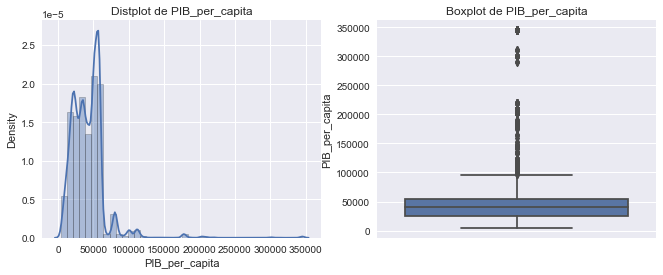

In [359]:
mf.univariate_num(df_OPCD_2017,['PIB_per_capita'])

In [360]:
df_OPCD_2017['PIB_per_capita'].kurt()

35.810064086130026

In [361]:
df_OPCD_2017['PIB_per_capita'].skew()

4.115213465518608

In [362]:
k2, p = normaltest(df_OPCD_2017['PIB_per_capita'], nan_policy='omit')
if p < 0.05:  
    print(f"Teste de distribuição normal.Valor p={p}  Hipótese nula NÃO aceita:Não é normal")
else:
    print(f"Teste de distribuição normal.Valor p={p}  Hipótese nula aceita:É normal")

Teste de distribuição normal.Valor p=0.0  Hipótese nula NÃO aceita:Não é normal


A diferença entre a mediana= 41.318,74 e o máximo:344.847,17 é grande:303.528,43.

A diferença entre o minimo= 4.699,67 e a mediana:41.318,74 é :33.6619,07.

Ou seja, a diferença é bem maior do máximo a mediana.

Em particular, uma média mais elevada que a mediana nos diz que os valores no topo da distribuição estão muito distantes do centro, em comparação aos valores que estão na parte de baixo da distribuição.
Temos uma assimetria positiva(media > mediana).
A partir disto, irei criar faixas cfe: https://biblioteca.ibge.gov.br/visualizacao/livros/liv101688_informativo.pdf

In [363]:
df_OPCD_2017['PIB_percapita'] = df_OPCD_2017.PIB_per_capita.map(mf.faixa_pib_per_capita)
df_OPCD_2017['PIB_percapitaK'] = df_OPCD_2017['PIB_percapita'] 


In [364]:
#df_OPCD_2017[df_OPCD_2017['PIB_percapitaK'].isna()]

In [365]:
df_OPCD_2017 = pd.get_dummies(df_OPCD_2017, columns = ['PIB_percapita'],drop_first=False)

## <a class="anchor" id="fcpn">2.4.8 Features categóricas para numéricas

No item   2.1.4.1(Categóricas p/ numéricas:payment_type) foi feita a transformação em numéricas porque lá existiam vários pagamentos para o pedido e foi transformado em 1:1.

In [366]:
df_OPCD_2017.select_dtypes('O').columns.tolist()

['seller_id',
 'order_id',
 'product_id',
 'customer_id',
 'review_id',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'product_category_name',
 'seller_city',
 'seller_state',
 'customer_grande_regiao_nome',
 'Descricao',
 'seller_grande_regiao_nome',
 'PIB_percapitaK']

As features que não serão categorizadas:

seller_id, order_id, product_id, customer_id, review_id, customer_unique_id servem para identificação.

Descricao serve p/ informar o motivo pelo qual a presente data é feriado nacional/estadual/data comemorativa.

customer_city, customer_state, seller_city e seller_state já foram categorizadas cfe IBGE.

PIB_percapitaK tb já foi categorizada.

In [367]:
print("{} número de códigos únicos: estados dos clientes".format(df_OPCD_2017['customer_state_id'].nunique()))
print("{} número de códigos únicos: municipios dos clientes".format(df_OPCD_2017['customer_city_id'].nunique()))
print("{} número de códigos únicos:grande região dos clientes".format(df_OPCD_2017['customer_grande_regiao_id'].nunique()))

27 número de códigos únicos: estados dos clientes
3202 número de códigos únicos: municipios dos clientes
5 número de códigos únicos:grande região dos clientes


In [368]:
print("{} número de códigos únicos: estados dos vendedores".format(df_OPCD_2017['seller_state_id'].nunique()))
print("{} número de códigos únicos: municipios dos vendedores".format(df_OPCD_2017['seller_city_id'].nunique()))
print("{} número de códigos únicos:grande região dos vendedores".format(df_OPCD_2017['seller_grande_regiao_id'].nunique()))

19 número de códigos únicos: estados dos vendedores
390 número de códigos únicos: municipios dos vendedores
5 número de códigos únicos:grande região dos vendedores


In [369]:
df_OPCD_2017['review_score'].nunique()

5

In [370]:
df_OPCD_2017['product_category_name'].nunique()

73

São 73 categorias de produtos. Irei diminuir p/ 34 categorias.

In [371]:
mf.resumo_categorias_produtos(df_OPCD_2017)

seller_id                          order_id  \
0      0015a82c2db000af6aaaf3ae2ecb0532  7f39ba4c9052be115350065d07583cac   
1      0015a82c2db000af6aaaf3ae2ecb0532  9dc8d1a6f16f1b89874c29c9d8d30447   
2      0015a82c2db000af6aaaf3ae2ecb0532  d455a8cb295653b55abda06d434ab492   
3      001cca7ae9ae17fb1caed9dfb1094831  006e43460a55bc60c0a437521e426529   
4      001cca7ae9ae17fb1caed9dfb1094831  00dfb074b5c910fbd08e04691c4b712f   
...                                 ...                               ...   
44938  ffff564a4f9085cd26170f4732393726  7ab9c55c59eaeea579d047e2d8aaed81   
44939  ffff564a4f9085cd26170f4732393726  81251f18621a822ad5b09593dfee4fc9   
44940  ffff564a4f9085cd26170f4732393726  94b35c9542f07ad80b3367f9051b63af   
44941  ffff564a4f9085cd26170f4732393726  df537c849af44beef86a7ef7de12126a   
44942  ffff564a4f9085cd26170f4732393726  fdb3ef83ea6f7bef7d13bdd9b38da661   

                             product_id shipping_limit_date  order_item_id  \
0      a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-24 23:56:20              1   
1      a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-18 14:49:22              1   
2      a2ff5a97bf95719e38ea2e3b4105bce8 2017-10-12 22:24:16              1   
3      08574b074924071f4e201e151b152b4e 2017-05-17 01:30:22              1   
4      4f3b83b83f7fb280fca4f90ba502f50e 2017-06-19 19:55:19              1   
...                                 ...                 ...            ...   
44938  c4b925e40f11289063a854c47aaef129 2017-02-01 13:04:20              1   
44939  c4b925e40f11289063a854c47aaef129 2017-01-31 14:17:21              1   
44940  24905035adec59d4ab5a46c13973ef17 2017-02-03 12:38:48              1   
44941  dbd024d4182504993ad1e3cd2ee9d9e9 2017-01-29 21:48:41              1   
44942  cb17b798ba889575385281b7ec2fc22b 2017-01-27 21:09:40              1   

       price  freight_value                       customer_id  \
0      895.0          21.02  d7fc82cbeafea77bd0a8fbbf6296e387   
1      895.0          21.02  d9442164acf4b03109425633efaa0cfc   
2      895.0          21.02  944b72539d7e1f7f7fc6e46639ef1fe3   
3       99.0          43.06  23bfd4316e261786deed5a08231c75bc   
4       99.5          35.07  a5ced4926d7d8fa71e9be2b007720356   
...      ...            ...                               ...   
44938   11.5          10.96  feca0f935fcce79dd42d409d96af9645   
44939   11.5          10.96  ae4dce7235e0aac52e4b82c54f7b18de   
44940   47.5          26.61  ae3a3a6fd9128d8617e2cb3a88a7598b   
44941   29.4          10.96  e97a76910029690bc1f5b67376c38af5   
44942  109.2          13.34  fbc1bec47970c387d5f4962d518dd268   

      order_purchase_timestamp   order_approved_at  \
0          2017-10-18 08:16:34 2017-10-18 23:56:20   
1          2017-10-12 13:33:22 2017-10-12 13:49:22   
2          2017-09-26 22:17:05 2017-09-27 22:24:16   
3          2017-05-11 00:24:35 2017-05-11 01:30:22   
4          2017-06-08 19:43:35 2017-06-08 19:55:19   
...                        ...                 ...   
44938      2017-01-22 13:04:20 2017-01-25 02:55:21   
44939      2017-01-21 14:17:21 2017-01-21 14:30:16   
44940      2017-01-24 12:38:48 2017-01-25 02:42:34   
44941      2017-01-19 21:48:41 2017-01-19 22:01:56   
44942      2017-01-17 21:09:40 2017-01-17 21:21:39   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-20 14:29:01           2017-10-27 16:46:05   
1              2017-10-17 15:42:42           2017-10-24 20:17:44   
2              2017-09-29 15:53:03           2017-10-07 16:12:47   
3              2017-05-12 12:26:32           2017-05-19 09:51:17   
4              2017-06-09 15:12:41           2017-06-15 09:03:59   
...                            ...                           ...   
44938          2017-01-26 16:41:28           2017-02-01 00:52:30   
44939          2017-01-25 16:51:53           2017-01-27 11:34:09   
44940          2017-01-26 16:32:31           2017-02-07 08:42:04   
44941          2017-01-25 16:05:15           2017-01-30 11

In [372]:
df_OPCD_2017['product_category_name'].nunique()

34

In [373]:
#criando codigo para as categorias de produto
encoder=LabelEncoder()
df_OPCD_2017['product_category_id']=encoder.fit_transform(df_OPCD_2017['product_category_name'])

In [374]:
df_OPCD_2017.sample(1)

seller_id                          order_id  \
22290  7a67c85e85bb2ce8582c35f2203ad736  65bd383b9f9b0b9de967055e198a8ddc   

                             product_id shipping_limit_date  order_item_id  \
22290  9b968712a8768d8e23318f73476af1a3 2017-05-30 13:30:13              1   

       price  freight_value                       customer_id  \
22290   9.99          11.73  2522598e7195c875f15436df1b7aa687   

      order_purchase_timestamp   order_approved_at  \
22290      2017-05-24 13:17:55 2017-05-24 13:30:13   

      order_delivered_carrier_date order_delivered_customer_date  \
22290          2017-05-25 10:39:23           2017-05-26 08:16:34   

      order_estimated_delivery_date review_answer_timestamp  \
22290                    2017-06-06     2017-05-29 23:07:18   

                              review_id  review_score review_creation_date  \
22290  7731e5ed1331d3524472164787b8ab6c             4           2017-05-27   

       payment_sequential_boleto  payment_sequential_credit_card  \
22290                          0                               1   

       payment_sequential_debit_card  payment_sequential_voucher  \
22290                              0                           0   

       payment_installments_boleto  payment_installments_credit_card  \
22290                            0                                 2   

       payment_installments_debit_card  payment_installments_voucher  \
22290                                0                             0   

       payment_value_boleto  payment_value_credit_card  \
22290                   0.0                      21.72   

       payment_value_debit_card  payment_value_voucher  payment_type_boleto  \
22290                       0.0                    0.0                    0   

       payment_type_credit_card  payment_type_debit_card  \
22290                         1                        0   

       payment_type_voucher                customer_unique_id  \
22290                     0  7779fdf670bfe673e064b9aa5447674e   

       customer_zip_code_prefix    customer_city customer_state  \
22290                      8830  mogi das cruzes             SP   

      product_category_name  product_weight_g  product_length_cm  \
22290    brinquedos_e_bebes             850.0               23.0   

       product_height_cm  product_width_cm  seller_zip_code_prefix  \
22290               14.0              28.0                    3426   

      seller_city seller_state  customer_latitude  customer_longitude  \
22290   sao paulo           SP         -23.515184          -46.140994   

       seller_latitude  seller_longitude  customer_grande_regiao_id  \
22290       -23.552032        -46.537461                          3   

      customer_grande_regiao_nome  customer_state_id  customer_city_id  \
22290                     Sudeste                 35           3530607   

                PIB  PIB_per_capita  É_capital  Area(km2)  \
22290  1.447062e+07        33350.06          0    712.541   

       Nacional_Estadual_Comemorativa       Descricao  seller_state_id  \
22290                               0  Não é feriado.               35   

       seller_city_id  seller_grande_regiao_id seller_grande_regiao_nome  \
22290         3550308                        3                   Sudeste   

      PIB_percapitaK  PIB_percapita_(11000,19000]  \
22290  (27000,35000]                            0   

       PIB_percapita_(19000,27000]  PIB_percapita_(27000,35000]  \
22290                            0                            1   

       PIB_percapita_(3285,11000]  PIB_percapita_(35000,43000]  \
22290                           0                            0   

       PIB_percapita_(43000,51000]  PIB_percapita_(51000,344847]  \
22290                            0                             0   

       product_category_id  
22290                    6

In [375]:
df_OPCD_2017['seller_id'].nunique()

1687

## <a class="anchor" id="arout">2.5 Análise e Tratamento dos Outliers</a>

Identificar Outliers

Um outlier é uma observação que se diferencia tanto das demais observações que levanta a suspeita de que aquela observação foi gerada por um mecanismo distinto, ou seja, são observações que estão bem distante de outros registros de dados em uma amostra.

Nesta etapa vamos verificar e tratar os outliers (outliers são valores que se distanciam muito da média).
O tratamento de outliers é uma das etapas mais importantes, pois se não for feita corretamente podemos deixar nosso modelo enviesado.
Existem diversas maneiras para tratar os outliers, por exemplo: excluir, preencher com a média, tratar separado, transformação logarítmica, utilizar métodos de clusterização e etc.
É importante destacar que nem todo valor indentificado como oulier é um registro errado, o valor poder ser correto. Mas como ele difere muito da média, a gente precisa tratar para evitar distorções no modelo.

Para remover os outliers usaremos uma biblioteca chamada PyOD que, juntamente com o algorítmo KNN irá identificar os outliers em nossa base de dados calculando a distância entre os registros e assim, retornando os índices dos mesmos. Seguimos então com a sua implementação.

O algoritmo Isolation Forest isola as observações selecionando aleatoriamente uma feição e, em seguida, selecionando aleatoriamente um valor de divisão entre os valores máximo e mínimo da feição selecionada. O argumento lógico é: isolar observações de anomalias é mais fácil porque apenas algumas condições são necessárias para separar esses casos das observações normais. Por outro lado, isolar observações normais requer mais condições. Portanto, uma pontuação de anomalia pode ser calculada como o número de condições necessárias para separar uma determinada observação.

Para qualquer ponto de dados, a distância até seu k-ésimo vizinho mais próximo pode ser vista como a pontuação periférica PyOD suporta três detectores kNN: Maior: Usa a distância do k-ésimo vizinho como a pontuação discrepante Média: Usa a média de todos os k vizinhos como discrepante score Median: Usa a mediana da distância para k vizinhos como a pontuação outlier.

Com tudo isto, a clusterização sofre ainda que influenciem o resultado final do modelo, esses valores destoantes refletem as características desse dataset e deverão ser mantidos.

In [376]:
df_OPCD_2017_antes_outliers = df_OPCD_2017.copy()

In [377]:
#df_OPCD_2017 = df_OPCD_2017_antes_outliers

## <a class="anchor" id="featnum">2.5.1 Features Numéricas</a>

In [378]:
#Removendo alguns outliers dos clientes
#https://github.com/kelvins/Municipios-Brasileiros
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = df_OPCD_2017[df_OPCD_2017.customer_latitude <= 5.27438888]
print(geo.shape)

#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[df_OPCD_2017.customer_longitude >= -73.98283055]
print(geo.shape)

#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = df_OPCD_2017[df_OPCD_2017.customer_latitude >= -33.75116944]
print(geo.shape)

#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = df_OPCD_2017[df_OPCD_2017.customer_longitude <= -34.79314722]
print(geo.shape)

(44943, 72)
(44943, 72)
(44943, 72)
(44943, 72)


Sem outliers para os clientes

In [379]:
#Removendo alguns outliers dos vendedores
#https://github.com/kelvins/Municipios-Brasileiros
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = df_OPCD_2017[df_OPCD_2017.seller_latitude <= 5.27438888]
print(geo.shape)

#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[df_OPCD_2017.seller_longitude >= -73.98283055]
print(geo.shape)

#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = df_OPCD_2017[df_OPCD_2017.seller_latitude >= -33.75116944]
print(geo.shape)

#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = df_OPCD_2017[df_OPCD_2017.seller_longitude <= -34.79314722]
print(geo.shape)

(44943, 72)
(44943, 72)
(44943, 72)
(44943, 72)


Sem outliers para os vendedores

In [380]:
numericos = ['float16','float32', 'float64']
features_numericos = list(df_OPCD_2017.select_dtypes(include=numericos).columns)
features_numericos= set(features_numericos)- set(['customer_latitude','customer_longitude', 'seller_latitude', 'seller_longitude'])
features_numericos

{'Area(km2)',
 'PIB',
 'PIB_per_capita',
 'freight_value',
 'payment_value_boleto',
 'payment_value_credit_card',
 'payment_value_debit_card',
 'payment_value_voucher',
 'price',
 'product_height_cm',
 'product_length_cm',
 'product_weight_g',
 'product_width_cm'}

In [381]:
df_dados=df_OPCD_2017[features_numericos]

In [382]:
df_outliers = mf.localiza_outliers(df_dados[features_numericos], 6)
# gera lista dos indices dos outliers p/ dropar
outlier_indices = []
for chave, valor in df_outliers.items():
    for outlier in valor:
        outlier_indices.append(outlier['indice'])
# cria dataframe alternativo SEM os outliers
df_dados_sem_outliers = df_dados.drop(outlier_indices)
print('')
print('{}({}/{}={}%) número de indices unicos dos outliers'.format(len(np.unique(outlier_indices)),len(np.unique(outlier_indices)),\
                            len(df_dados), round((len(np.unique(outlier_indices))/len(df_dados)*100),2) ))

Outliers maiores que 6 desvios-padrão
----------------------------------------------
freight_value | mean 21.2 | std 18.1 | ll=-87.1 | ul=129.6 | outliers=200 |44943 outlier % 0.45%
payment_value_credit_card | mean 126.7 | std 213.1 | ll=-1152.2 | ul=1405.6 | outliers=184 |44943 outlier % 0.41%
payment_value_boleto | mean 31.5 | std 119.0 | ll=-682.3 | ul=745.3 | outliers=192 |44943 outlier % 0.43%
payment_value_debit_card | mean 1.0 | std 12.8 | ll=-75.6 | ul=77.6 | outliers=211 |44943 outlier % 0.47%
price | mean 132.2 | std 212.0 | ll=-1139.6 | ul=1404.0 | outliers=188 |44943 outlier % 0.42%
product_length_cm | mean 31.0 | std 16.3 | ll=-66.6 | ul=128.5 | outliers=0 |44943 outlier % 0.00%
Area(km2) | mean 1283.9 | std 3472.7 | ll=-19552.1 | ul=22119.9 | outliers=131 |44943 outlier % 0.29%
payment_value_voucher | mean 3.8 | std 28.5 | ll=-167.0 | ul=174.6 | outliers=184 |44943 outlier % 0.41%
PIB | mean 143937175.3 | std 242822789.6 | ll=-1312999562.3 | ul=1600873913.0 | outliers=0 |

As features não tiveram outliers detectados pelo método: product_length_cm e PIB.

Restando 11 features p/ análise individual.

In [383]:
df_dados_sem_outliers

freight_value  payment_value_credit_card  payment_value_boleto  \
0              21.02                     916.02                  0.00   
1              21.02                     916.02                  0.00   
2              21.02                     916.02                  0.00   
3              43.06                     142.06                  0.00   
4              35.07                     134.57                  0.00   
...              ...                        ...                   ...   
44938          10.96                       0.00                 22.46   
44939          10.96                      22.46                  0.00   
44940          26.61                       0.00                 74.11   
44941          10.96                      40.36                  0.00   
44942          13.34                     122.54                  0.00   

       payment_value_debit_card  price  product_length_cm  Area(km2)  \
0                           0.0  895.0               40.0    456.796   
1                           0.0  895.0               40.0   8229.595   
2                           0.0  895.0               40.0   1234.537   
3                           0.0   99.0               42.0    144.794   
4                           0.0   99.5               39.0    206.236   
...                         ...    ...                ...        ...   
44938                       0.0   11.5               20.0    794.571   
44939                       0.0   11.5               20.0    244.906   
44940                       0.0   47.5               20.0    834.827   
44941                       0.0   29.4               17.0    190.392   
44942                       0.0  109.2               20.0    155.641   

       payment_value_voucher           PIB  product_weight_g  \
0                        0.0  1.806571e+05           11800.0   
1                        0.0  3.510748e+06           11800.0   
2                        0.0  3.284406e+06           11800.0   
3                        0.0  8.589741e+06            9000.0   
4                        0.0  1.076108e+07            9050.0   
...                      ...           ...               ...   
44938                    0.0  5.905356e+07             100.0   
44939                    0.0  1.975018e+06             100.0   
44940                    0.0  2.972765e+07             100.0   
44941                    0.0  4.191882e+05             100.0   
44942                    0.0  1.043490e+06            1300.0   

       product_width_cm  product_height_cm  PIB_per_capita  
0                  36.0               43.0        11813.83  
1                  36.0               43.0        38000.86  
2                  36.0               43.0        29870.46  
3                  39.0               12.0        27220.37  
4                  42.0               12.0        37009.04  
...                 ...                ...             ...  
44938              20.0               20.0        49942.59  
44939              20.0               20.0        35629.57  
44940              20.0               20.0        27226.41  
44941              17.0               17.0        23835.12  
44942              20.0               20.0        15284.76  

[43530 rows x 13 columns]

In [384]:
#criar features var+'_log' e var+'_yeojohnson' nos 2 dataframes
#mf.adiciona_features(df_dados,features_numericos)
#mf.adiciona_features(df_dados_sem_outliers,features_numericos)

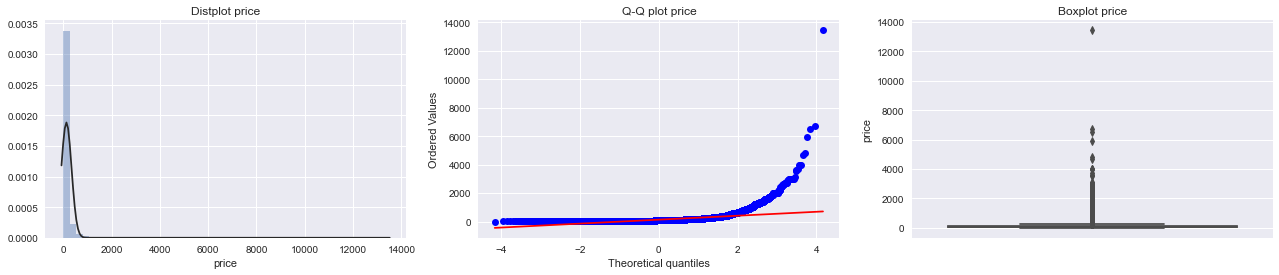

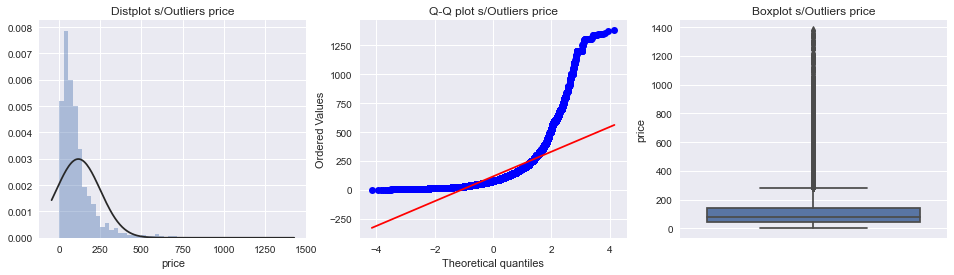

feature    count    mean     std       var   min    25%   50%  \
0             price  44943.0  132.22  211.97  44931.66  2.29  44.90  79.9   
1  s/outliers_price  43530.0  117.29  133.42  17800.25  2.29  43.82  79.9   

     75%     90%    95%     97%   99.99%      max   skew  kurtosis  
0  145.0  258.82  388.0  571.99  4745.13  13440.0  12.54    451.50  
1  139.9  239.71  348.8  449.00  1349.64   1380.0   3.78     20.74

In [385]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['price'], "S")

In [386]:

#              Maximo   99.99%
#             13440 - 4745.13 = 8694.87
#sem outliers  1380 - 1349.64 =   30.36
 
#Verifica-se que na variação 0.01% temos uma redução muito grande.
#            Maximo    Mediana                 Minimo  Mediana
#             13440 -   79.90 = 13360.10          2.29 - 79.90  = 77.61
#sem outliers  1380 -   79.90 =  1300.10          2.29 - 79.90  = 77.61

#Quer dizer com a remoção dos outliers deixou a distribuição menos enviasada.
#Além disto, vê-se que assimetria positiva(mediana<média).

#A média é 132.22 enquanto a variancia é 44931.66, o que diz que muitos dados estão muito longe da média.
#Muitos pedidos de baixo valor, alguns poucos de muito valor se comparados. 

#Esta feature reflete valores de mercadorias que foram registradas e não deveriam sofrem alterações.
#Apesar isto, fica evidente o ganho da exclusão de outliers(188-0.42%) e portanto, assim mantenho esta exclusão.
#Skew diminui estando mais perto de zero, deixando de ser menos assimetrico
#Kustosis considerável diminuição. Quanto menor melhor, mais os resultados são agrupados em torno da média.
#Irei manter a exclusão dos outliers desta feature.

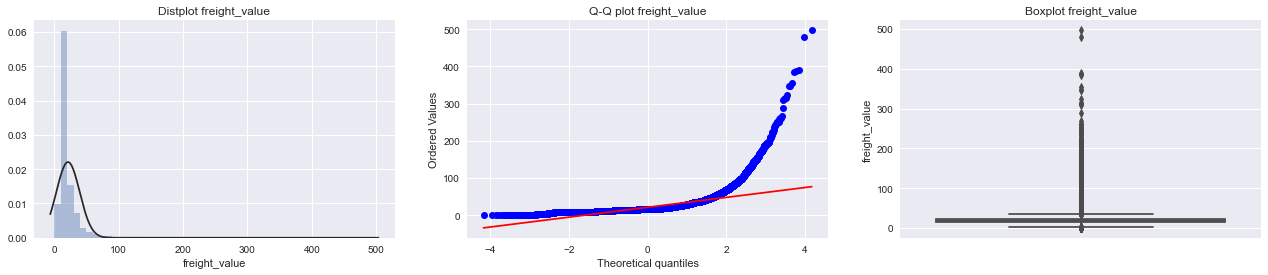

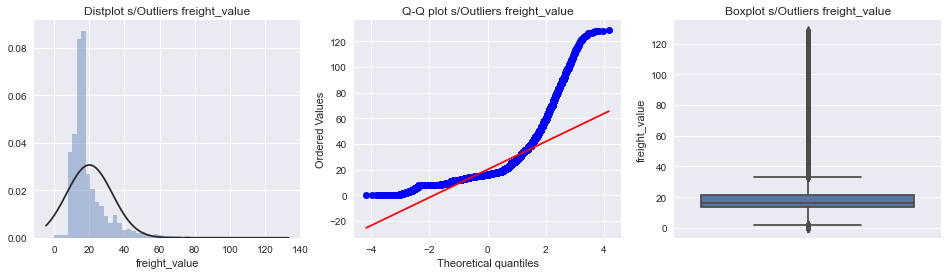

feature    count   mean    std     var  min    25%    50%  \
0             freight_value  44943.0  21.24  18.05  325.84  0.0  13.71  16.30   
1  s/outliers_freight_value  43530.0  20.09  13.04  170.01  0.0  13.62  16.18   

     75%    90%    95%    97%  99.99%     max  skew  kurtosis  
0  22.01  35.77  48.53  60.46  369.13  497.08  6.33     76.25  
1  21.40  34.50  45.09  54.02  127.61  128.74  3.05     13.10

In [387]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['freight_value'], "S")

In [388]:
#             Maximo   99.99%
#              497.08 - 369.13 = 127.95
#sem outliers  128.74 - 127.61 =   1.13

#Verifica-se que na variação 0.01% temos uma boa redução.
#             Maximo    Mediana               Minimo Mediana
#              497.08 -  16.30  = 480.78        0 - 16.30  = 16.30
#sem outliers  128.74-   16.18  = 112.56        0 - 16.18  = 16.18

#A média sofreu pouca alteração(21.24 - 20.09=1.15)
#A kurtosi baixou consideravelmente, deixando os dados mais próximos da média
#Com outliers=200(0.45%) vale mais o beneficio.
#Irei manter a exclusão dos outliers desta feature.

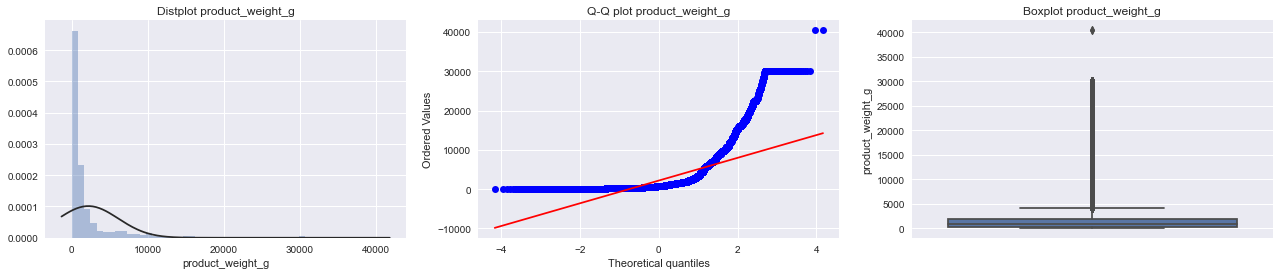

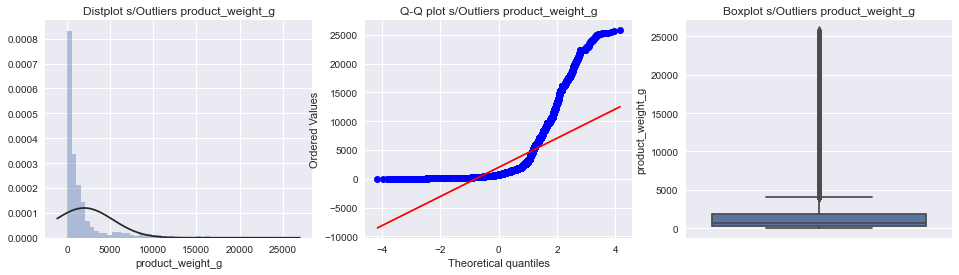

feature    count     mean      std          var   min  \
0             product_weight_g  44943.0  2192.24  3935.64  15489262.23  50.0   
1  s/outliers_product_weight_g  43530.0  1993.85  3332.55  11105921.43  50.0   

     25%    50%     75%     90%     95%      97%   99.99%      max  skew  \
0  300.0  750.0  1850.0  6300.0  9750.0  13100.0  30000.0  40425.0  3.67   
1  300.0  725.0  1800.0  5950.0  9200.0  11450.0  25400.0  25800.0  3.17   

   kurtosis  
0     16.59  
1     11.53

In [389]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['product_weight_g'], "S")

In [390]:
#             Maximo   99.99%
#              40425.0 - 30000 = 10425
#sem outliers  25800   - 25400 =   400

#Verifica-se que na variação 0.01% temos pouca redução.
#             Maximo    Mediana               Minimo Mediana
#              40425 -  750  = 39675           50 -  750  = 700
#sem outliers  25800 -  725 =  25075           50 -  725  = 675

#Consideravel diminuição foi entre a estatistica 99.99% e o maximo.
#A kurtosi pouco ganho
#Com outliers=39(0.09%)
#Não irei manter a exclusão dos outliers desta feature.

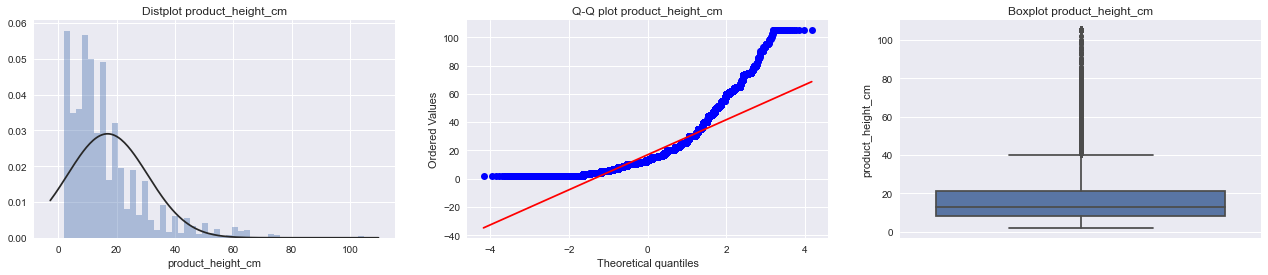

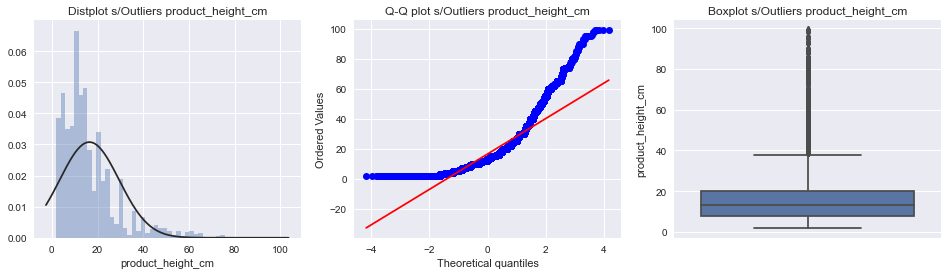

feature    count   mean    std     var  min  25%  \
0             product_height_cm  44943.0  16.84  13.74  188.68  2.0  8.0   
1  s/outliers_product_height_cm  43530.0  16.42  12.97  168.34  2.0  8.0   

    50%   75%   90%   95%   97%  99.99%    max  skew  kurtosis  
0  13.0  21.0  34.0  46.0  54.0  105.00  105.0  2.01      5.46  
1  13.0  20.0  32.0  45.0  51.0   98.65   99.0  1.86      4.46

In [391]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['product_height_cm'], "S")

In [392]:
#             Maximo   99.99%
#              105 - 105   = 0
#sem outliers   99 - 98.65 = 0.35

#Verifica-se que na variação 0.01% temos pouca redução.
#             Maximo    Mediana          Minimo Mediana
#              105 -  13  = 92           2 -     13  = 11
#sem outliers  99  -  13 =  86           2 -     13  = 11

#No geral, pouca melhoria.
#A kurtosi pouco ganho
#Com outliers=39(0.09%)
#Não irei manter a exclusão dos outliers desta feature.

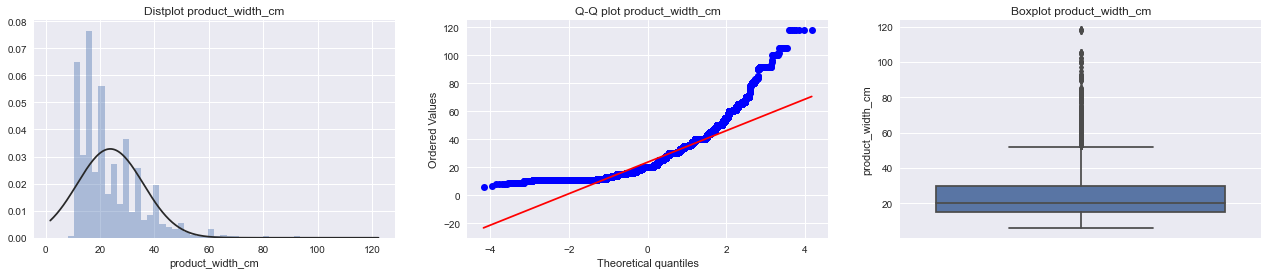

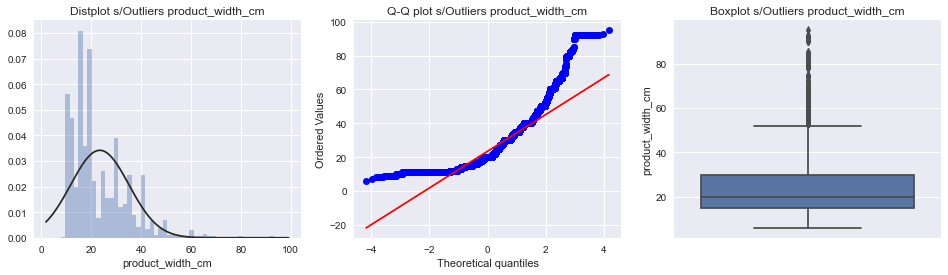

feature    count   mean    std     var  min   25%  \
0             product_width_cm  44943.0  23.77  12.16   147.9  6.0  15.0   
1  s/outliers_product_width_cm  43530.0  23.46  11.67  136.29  6.0  15.0   

    50%   75%   90%   95%   97%  99.99%    max  skew  kurtosis  
0  20.0  30.0  40.0  46.0  50.0   118.0  118.0  1.68      4.63  
1  20.0  30.0  40.0  45.0  50.0    92.0   95.0  1.52      3.49

In [393]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['product_width_cm'], "S")

In [394]:
#             Maximo   99.99%
#              118 - 118   = 0
#sem outliers   95 - 92    = 3

#Verifica-se que na variação 0.01% temos pouca redução.
#             Maximo  Mediana          Minimo Mediana
#              118 -  20  = 98           6 -     20  = 14
#sem outliers  95  -  20 =  75           6 -     20  = 14

#No geral, pouca melhoria.
#A kurtosi pouco ganho
#Com outliers=36(0.08%)
#Não irei manter a exclusão dos outliers desta feature.

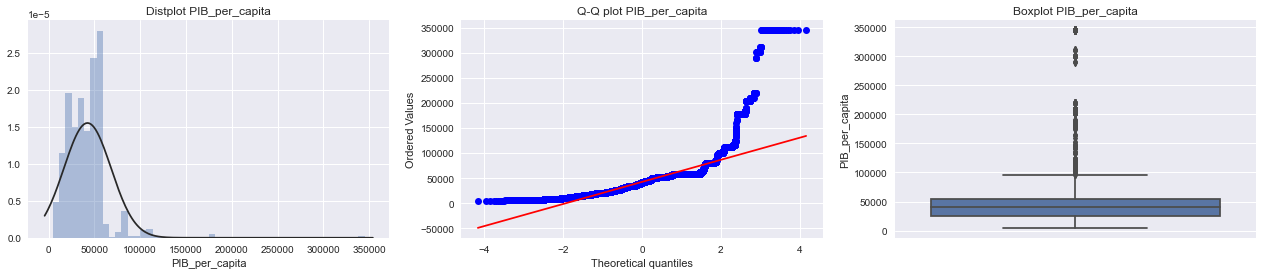

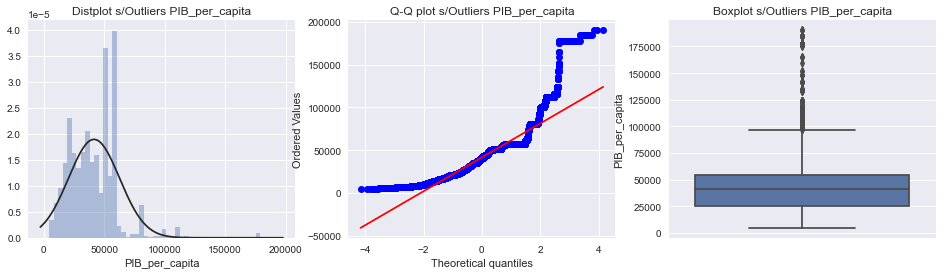

feature    count      mean       std           var  \
0             PIB_per_capita  44943.0  42435.80  25735.10   662295483.4   
1  s/outliers_PIB_per_capita  43530.0  41602.62  21068.43  443878756.38   

       min       25%       50%       75%       90%       95%       97%  \
0  4699.67  25345.44  41318.74  54052.13  57759.39  80502.47  86244.15   
1  4699.67  25345.44  41318.74  53998.54  57759.39  78890.07  80502.47   

      99.99%        max  skew  kurtosis  
0  344847.17  344847.17  4.12     35.81  
1  184493.91  190238.95  1.64      7.34

In [395]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['PIB_per_capita'], "S")

In [396]:
#             Maximo        99.99%
#              344847.17 - 344847.17    = 0
#sem outliers  190238.95 - 184493.91    = 5745.01

#Verifica-se que na variação 0.01% aumento considerável.
#             Maximo        Mediana                   Minimo      Mediana
#              344847.17 -  41318.74  = 303528.43    4699.67 -     41318.74  = 36619.07 
#sem outliers  190238.95 -  41318.74 =  148920.21    4699.67 -     41318.74  = 36619.07

#No geral, pouca melhoria.
#A kurtosi bom ganho)
#Não Irei manter a exclusão dos outliers desta feature.

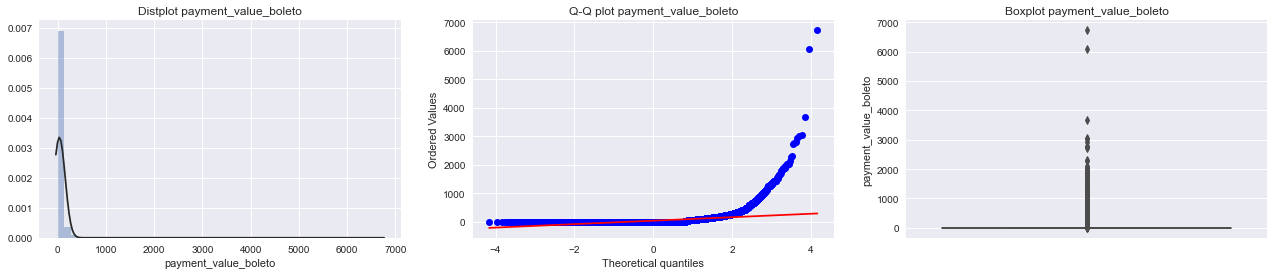

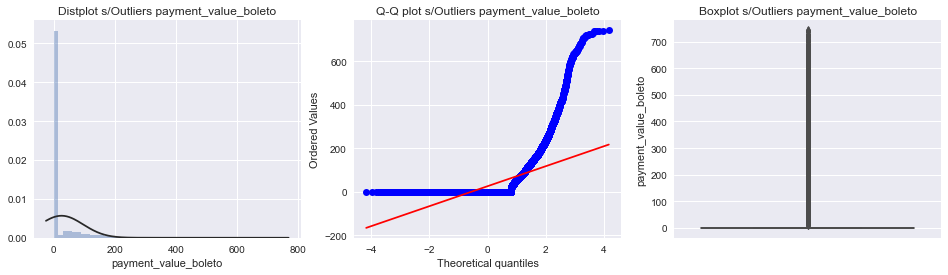

feature    count   mean     std       var  min  \
0             payment_value_boleto  44943.0  31.50  118.96  14152.43  0.0   
1  s/outliers_payment_value_boleto  43530.0  26.01   70.45   4963.15  0.0   

   25%  50%  75%    90%     95%     97%   99.99%      max   skew  kurtosis  
0  0.0  0.0  0.0  99.24  165.57  226.22  2981.62  6726.66  15.03    496.30  
1  0.0  0.0  0.0  95.99  159.03  208.52   739.39   743.27   4.34     25.31

In [397]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['payment_value_boleto'], "S")

In [398]:
#             Maximo      99.99%
#              6726.66 - 2981.62  = 3745.04
#sem outliers   743.27 - 739.39   =    4

#Verifica-se que na variação 0.01% aumento considerável.
#             Maximo      mediana         Minimo  Mediana
#              6726.66 -  0  = 6726.66    0 -     0  = 0 
#sem outliers   743.39 -  0 =  743.39     0 -     0  = 0

#No geral, boa melhoria.
#A kurtosi otimo ganho
#Com outliers=192(0.43%)
#Irei manter a exclusão dos outliers desta feature.

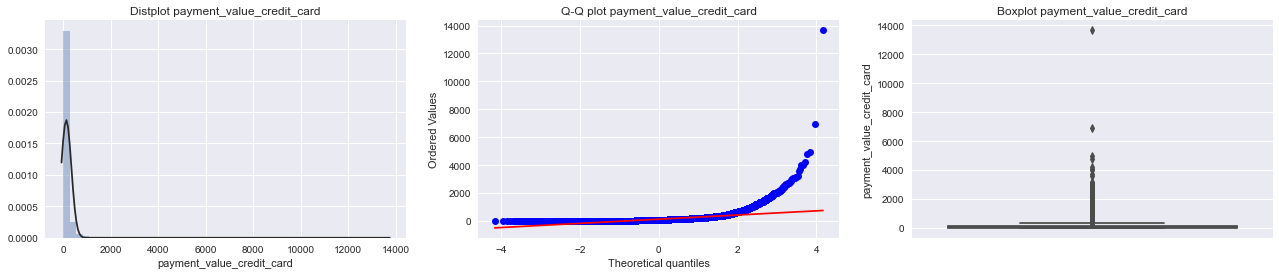

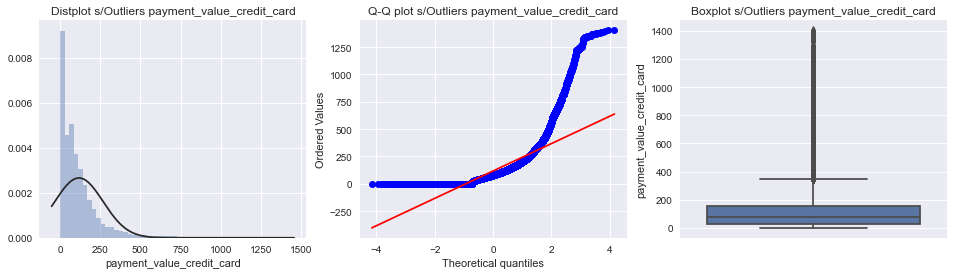

feature    count    mean     std       var  \
0             payment_value_credit_card  44943.0  126.70  213.15  45431.31   
1  s/outliers_payment_value_credit_card  43530.0  117.14  150.22  22565.22   

   min    25%    50%     75%     90%     95%     97%   99.99%       max  \
0  0.0  21.77  77.57  154.72  273.26  400.85  550.63  4119.63  13664.08   
1  0.0  25.39  77.57  152.74  263.01  372.23  479.54  1383.73   1404.41   

    skew  kurtosis  
0  11.56    437.70  
1   3.26     15.86

In [399]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['payment_value_credit_card'], "S")

In [400]:
#             Maximo      99.99%
#              13664.08 - 4119.63  = 9544.45
#sem outliers  1404.41 -  1383.73  =   20.68

#Verifica-se que na variação 0.01% aumento considerável.
#             Maximo      mediana              Minimo    Mediana
#              13664.08 -  77.57  = 13586.38    0 -     77.57 = 77.57
#sem outliers   1404.41 -  77.57 =   1326.84    0 -     77.57 = 77.57

#No geral, boa melhoria.
#A kurtosi otimo ganho
#Com outliers=184(0.41%)
#Irei manter a exclusão dos outliers desta feature.

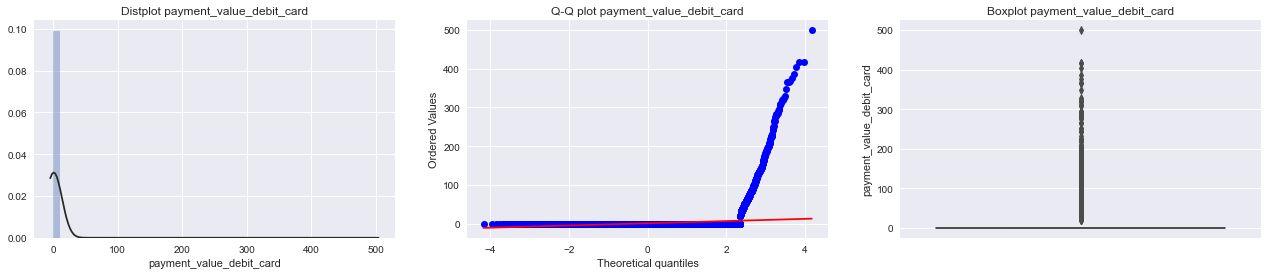

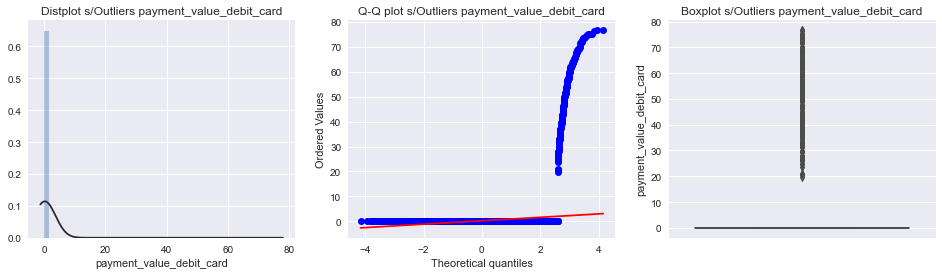

feature    count  mean    std     var  min  \
0             payment_value_debit_card  44943.0  0.97  12.76  162.91  0.0   
1  s/outliers_payment_value_debit_card  43530.0  0.23   3.49   12.21  0.0   

   25%  50%  75%  90%  95%  97%  99.99%     max   skew  kurtosis  
0  0.0  0.0  0.0  0.0  0.0  0.0  381.45  499.40  18.55    425.44  
1  0.0  0.0  0.0  0.0  0.0  0.0   74.98   76.64  16.23    275.52

In [401]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['payment_value_debit_card'], "S")

In [402]:
#             Maximo      99.99%
#              499.40 -  381.45  = 117.95
#sem outliers   76.64 -   74.98  =   1.66

#Verifica-se que na variação 0.01% aumento considerável.
#             Maximo      mediana         Minimo    Mediana
#              499.40 -  0 = 499.40        0 -    0 = 0
#sem outliers   76.64 -  0 =  76.64        0 -    0 = 0

#No geral, pouca melhoria.
#A kurtosi bom ganho
#Com outliers=211(0.47%)
#Irei manter a exclusão dos outliers desta feature.

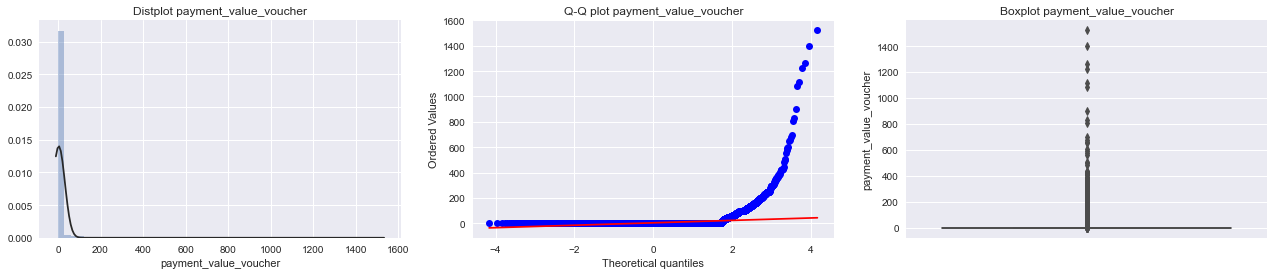

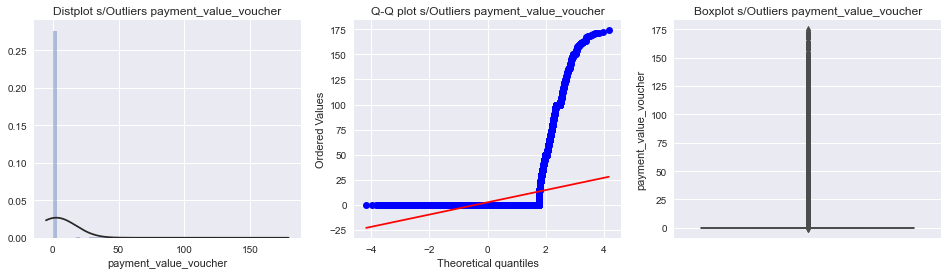

feature    count  mean    std     var  min  25%  \
0             payment_value_voucher  44943.0  3.81  28.47  810.67  0.0  0.0   
1  s/outliers_payment_value_voucher  43530.0  2.58  14.92  222.62  0.0  0.0   

   50%  75%  90%  95%    97%   99.99%      max   skew  kurtosis  
0  0.0  0.0  0.0  0.0  43.27  1099.81  1522.42  20.16    701.47  
1  0.0  0.0  0.0  0.0  34.27   170.69   174.07   6.85     51.49

In [403]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['payment_value_voucher'], "S")

In [404]:
#             Maximo      99.99%
#              1522.42 -  1099.81  = 422.61
#sem outliers   174.07 -   170.69  =   3.38

#Verifica-se que na variação 0.01% aumento considerável.
#             Maximo      mediana         Minimo    Mediana
#              1522.42 -  0 = 1522.42        0 -    0 = 0
#sem outliers   174.07 -  0 =  174.07        0 -    0 = 0

#No geral, boa melhoria.
#A kurtosi otimo ganho
#Com outliers=184(0.41%)
#Irei manter a exclusão dos outliers desta feature.

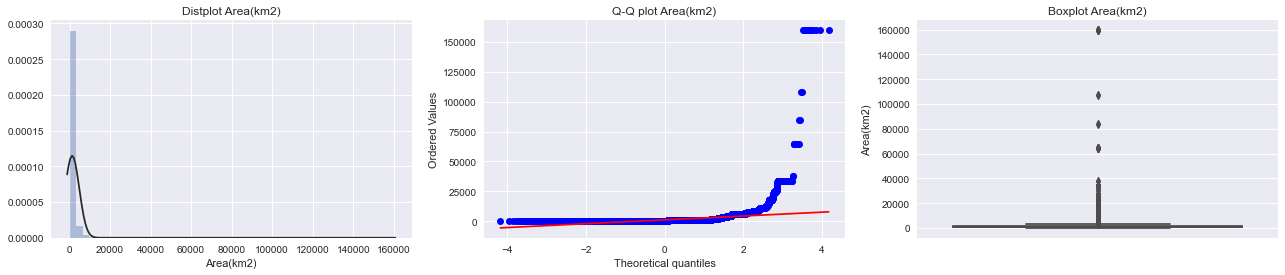

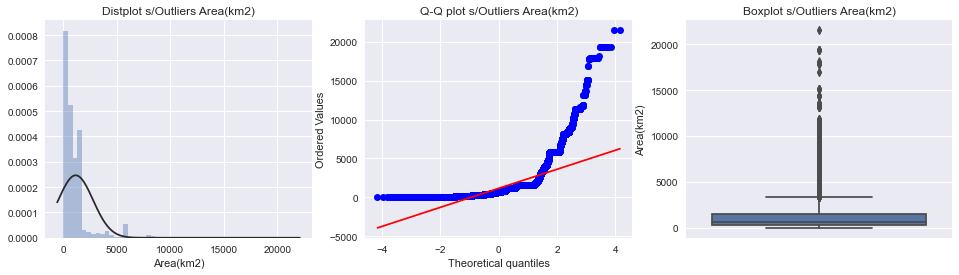

feature    count    mean      std          var   min     25%  \
0             Area(km2)  44943.0  1283.9  3472.70  12059665.91  3.56  318.68   
1  s/outliers_Area(km2)  43530.0  1155.5  1618.16   2618430.38  3.56  318.68   

      50%      75%      90%      95%     97%     99.99%        max   skew  \
0  689.39  1521.11  2054.73  4523.96  5780.0  159533.33  159533.33  26.28   
1  687.10  1521.11  1836.09  4115.21  5780.0   19342.25   21518.25   4.21   

   kurtosis  
0   1050.64  
1     25.71

In [405]:
mf.exibe_estatistica(df_dados, df_dados_sem_outliers,['Area(km2)'], "S")

In [406]:
#             Maximo          99.99%
#              159533.33 -   159533.33  = 0
#sem outliers   21518.25 -    19342.25  = 2176

#Verifica-se que na variação 0.01% aumento considerável.
#               Maximo       mediana                    Minimo    Mediana
#              159533.33 -  689.39 = 158843.94        3.56 -    689.39 = 685.83
#sem outliers   21518.25 -  687.10 =  20831.15        3.56 -    687.10 = 683.54

#No geral, boa melhoria.
#Kurtosi melhoria considerável
#Com outliers=131(0.29%)
#Até 97% se manteve semelhante.
#Irei manter a exclusão dos outliers desta feature.

Analisando os resultados:

Em todas as features a skew é alto enviasamento(>1).
Kurtosis > 3: significa que ela tende a produzir mais outliers do que a distribuição normal.

Das 13 features iniciais:Area(km2), PIB,PIB_per_capita,freight_value,payment_value_boleto,payment_value_credit_card,
 payment_value_debit_card, payment_value_voucher, price, product_height_cm, product_length_cm, product_weight_g,
 product_width_cm, duas não tiveram outliers, a saber:PIB e product_length_cm.
 
Sete apresentaram boa melhoria sem outliers, a saber:Area(km2), price, freight_value, payment_value_boleto,payment_value_credit_card,
payment_value_debit_card, payment_value_voucher.

O processo anteriormente feito, agora será repetido para estas 7 features.

In [407]:
features_numericos= set(features_numericos)- set(['PIB','product_length_cm', 'PIB_per_capita', 'product_height_cm',
                'product_length_cm','product_width_cm','product_weight_g'])
features_numericos

{'Area(km2)',
 'freight_value',
 'payment_value_boleto',
 'payment_value_credit_card',
 'payment_value_debit_card',
 'payment_value_voucher',
 'price'}

In [408]:
#df_dados=df_OPCD_2017[features_numericos]

df_outliers = mf.localiza_outliers(df_OPCD_2017[features_numericos], 6)
# gera lista dos indices dos outliers p/ dropar
outlier_indices = []
for chave, valor in df_outliers.items():
    for outlier in valor:
        outlier_indices.append(outlier['indice'])
# cria dataframe alternativo SEM os outliers
df_OPCD_2017_sem_outliers = df_OPCD_2017.drop(outlier_indices)
print('')
print('{}({}/{}={}%) número de indices unicos dos outliers'.format(len(np.unique(outlier_indices)),len(np.unique(outlier_indices)),\
                            len(df_dados), round((len(np.unique(outlier_indices))/len(df_dados)*100),2) ))

Outliers maiores que 6 desvios-padrão
----------------------------------------------
freight_value | mean 21.2 | std 18.1 | ll=-87.1 | ul=129.6 | outliers=200 |44943 outlier % 0.45%
payment_value_credit_card | mean 126.7 | std 213.1 | ll=-1152.2 | ul=1405.6 | outliers=184 |44943 outlier % 0.41%
payment_value_boleto | mean 31.5 | std 119.0 | ll=-682.3 | ul=745.3 | outliers=192 |44943 outlier % 0.43%
payment_value_debit_card | mean 1.0 | std 12.8 | ll=-75.6 | ul=77.6 | outliers=211 |44943 outlier % 0.47%
price | mean 132.2 | std 212.0 | ll=-1139.6 | ul=1404.0 | outliers=188 |44943 outlier % 0.42%
Area(km2) | mean 1283.9 | std 3472.7 | ll=-19552.1 | ul=22119.9 | outliers=131 |44943 outlier % 0.29%
payment_value_voucher | mean 3.8 | std 28.5 | ll=-167.0 | ul=174.6 | outliers=184 |44943 outlier % 0.41%

1034(1034/44943=2.3%) número de indices unicos dos outliers


In [409]:
df_OPCD_2017_sem_outliers.shape

(43909, 72)

In [410]:
df_OPCD_2017[features_numericos].std()

freight_value                  18.051146
payment_value_credit_card     213.146222
payment_value_boleto          118.963972
payment_value_debit_card       12.763678
price                         211.970888
Area(km2)                    3472.702969
payment_value_voucher          28.472267
dtype: float64

In [411]:
df_OPCD_2017_sem_outliers[features_numericos].std()

freight_value                  13.444684
payment_value_credit_card     152.242932
payment_value_boleto           71.173948
payment_value_debit_card        3.495276
price                         135.310126
Area(km2)                    1615.383800
payment_value_voucher          14.904569
dtype: float64

In [412]:
df_OPCD_2017[features_numericos].mean()

freight_value                  21.244846
payment_value_credit_card     126.704795
payment_value_boleto           31.498143
payment_value_debit_card        0.974709
price                         132.217855
Area(km2)                    1283.896001
payment_value_voucher           3.814463
dtype: float64

In [413]:
df_OPCD_2017_sem_outliers[features_numericos].mean()

freight_value                  20.250580
payment_value_credit_card     118.131211
payment_value_boleto           26.191050
payment_value_debit_card        0.229866
price                         118.299470
Area(km2)                    1151.253127
payment_value_voucher           2.576397
dtype: float64

In [414]:
df_OPCD_2017.shape

(44943, 72)

In [415]:
df_OPCD_2017_sem_outliers.shape

(43909, 72)

## <a class="anchor" id="feaeng">2.6 Feature Engineering</a>

In [416]:
#Criação da feature product_volume_cm3
df_OPCD_2017_sem_outliers['product_volume_cm3'] = np.round(df_OPCD_2017_sem_outliers['product_length_cm'] *\
            df_OPCD_2017_sem_outliers['product_height_cm'] * df_OPCD_2017_sem_outliers['product_width_cm'],2)

#Não teve outliers e posso continuar.
#Criação da feature distancia entre vendedor e cliente
df_OPCD_2017_sem_outliers['distancia_customer_seller'] = df_OPCD_2017_sem_outliers.apply(lambda x:round(mf.haversine(x['customer_latitude'],x['customer_longitude'], x['seller_latitude'], x['seller_longitude']),3), axis=1)

#Criação da feature populacao
df_OPCD_2017_sem_outliers['PIB']=df_OPCD_2017_sem_outliers['PIB']*1000
df_OPCD_2017_sem_outliers['populacao']=round(df_OPCD_2017_sem_outliers['PIB']/ df_OPCD_2017_sem_outliers['PIB_per_capita'],3)

#Dropa esta feature pois foi categorizada na seção 2.4.7 Features categóricas
df_OPCD_2017_sem_outliers.drop(['PIB_per_capita'], axis=1, inplace=True)
#Dropa estas features pois foi criada a feature product_volume_cm3
df_OPCD_2017_sem_outliers.drop(['product_length_cm','product_height_cm','product_width_cm'], axis=1, inplace=True)
#Dropa estas features, pois foi criada a feature distancia_customer_seller
df_OPCD_2017_sem_outliers.drop(['customer_latitude','customer_longitude','seller_latitude','seller_longitude'], axis=1, inplace=True)

df_OPCD_2017_sem_outliers['tempo_entrega_compra'] =  (df_OPCD_2017_sem_outliers['order_delivered_customer_date'] - df_OPCD_2017_sem_outliers['order_purchase_timestamp']).dt.days
df_OPCD_2017_sem_outliers['tempo_aprovado_compra'] = (df_OPCD_2017_sem_outliers['order_approved_at'] - df_OPCD_2017_sem_outliers['order_purchase_timestamp'] ).dt.days
df_OPCD_2017_sem_outliers['tempo_estimado_compra'] = (df_OPCD_2017_sem_outliers['order_estimated_delivery_date'] - df_OPCD_2017_sem_outliers['order_purchase_timestamp']).dt.days
df_OPCD_2017_sem_outliers['tempo_postagem_compra'] = (df_OPCD_2017_sem_outliers['order_delivered_carrier_date'] - df_OPCD_2017_sem_outliers['order_purchase_timestamp']).dt.days
df_OPCD_2017_sem_outliers['tempo_entrega_aprovado_LeadTime'] = (df_OPCD_2017_sem_outliers['order_delivered_customer_date'] - df_OPCD_2017_sem_outliers['order_approved_at']).dt.days
df_OPCD_2017_sem_outliers['tempo_postagem_aprovado'] = (df_OPCD_2017_sem_outliers['order_delivered_carrier_date'] - df_OPCD_2017_sem_outliers['order_approved_at']).dt.days
df_OPCD_2017_sem_outliers['tempo_entrega_postagem'] =  (df_OPCD_2017_sem_outliers['order_delivered_customer_date'] - df_OPCD_2017_sem_outliers['order_delivered_carrier_date']).dt.days

#não necessita verificar inconsistencia nas datas
#<0 -> em atraso: entrega ao parceiro logistico no prazo(vendedor entregou na hora)
df_OPCD_2017_sem_outliers['postagem_limiteparceiro_variacao']    = ( df_OPCD_2017_sem_outliers['order_delivered_carrier_date'] - df_OPCD_2017_sem_outliers['shipping_limit_date']).dt.days
df_OPCD_2017_sem_outliers['postagem_limiteparceiro_dias_atraso'] =  df_OPCD_2017_sem_outliers['postagem_limiteparceiro_variacao'].map(lambda x: x if x > 0 else 0)
df_OPCD_2017_sem_outliers['postagem_limiteparceiro_atrasado']    =  df_OPCD_2017_sem_outliers['postagem_limiteparceiro_dias_atraso'].map(lambda x: 1 if x > 0 else 0)

#df_OPCD_2017_sem_outliers['tempo_limiteparceiro_postagem'] =np.abs( ( df_OPCD_2017_sem_outliers['shipping_limit_date'] - df_OPCD_2017_sem_outliers['order_delivered_carrier_date'] ).dt.days)

#entrega ao cliente no prazo
df_OPCD_2017_sem_outliers['entrega_estimado_variacao']    = ( df_OPCD_2017_sem_outliers['order_delivered_customer_date'] - df_OPCD_2017_sem_outliers['order_estimated_delivery_date']).dt.days
df_OPCD_2017_sem_outliers['entrega_estimado_dias_atraso'] =  df_OPCD_2017_sem_outliers['entrega_estimado_variacao'].map(lambda x: x if x > 0 else 0)
df_OPCD_2017_sem_outliers['entrega_estimado_atrasado']    =  df_OPCD_2017_sem_outliers['entrega_estimado_dias_atraso'].map(lambda x: 1 if x > 0 else 0)

#df_OPCD_2017_sem_outliers['tempo_estimado_entrega'] =   np.abs(( df_OPCD_2017_sem_outliers['order_estimated_delivery_date'] - df_OPCD_2017_sem_outliers['order_delivered_customer_date']).dt.days)

#Estado do cliente mesmo estado do vendedor
df_OPCD_2017_sem_outliers['customer_seller_state'] = np.where(df_OPCD_2017_sem_outliers['seller_state'] == df_OPCD_2017_sem_outliers['customer_state'], 1, 0)

#Valor total de cada item do pedido
df_OPCD_2017_sem_outliers['price_freight'] = df_OPCD_2017_sem_outliers['price'] + df_OPCD_2017_sem_outliers['freight_value']

#custo dos reviews por pedido
df_OPCD_2017_sem_outliers['custo_reviews'] = df_OPCD_2017_sem_outliers.review_score.map({
            1: 40,
            2: 25,
            3: 15,
            4: 5,
            5: 0   })
df_OPCD_2017_sem_outliers['habit_km2'] = round(df_OPCD_2017_sem_outliers['populacao'] / df_OPCD_2017_sem_outliers['Area(km2)'],2)

#densidade do produto
df_OPCD_2017_sem_outliers['densidade_produto']=round(df_OPCD_2017_sem_outliers['product_weight_g'] / df_OPCD_2017_sem_outliers['product_volume_cm3'] ,2)

In [417]:
#Planos Olist
#Lite   18.99 mês  + 21% comissão  até 30 produtos
#Basic  68.99 mês  + 20% comissão  até 60 produtos
#Pro   173.99 mês  + 19% comissão  ilimitado-produtos

In [418]:
df_seller_planos=df_OPCD_2017_sem_outliers.groupby('seller_id').agg({'product_id': ('count')}).reset_index()

In [419]:
df_seller_planos['plano']         =df_seller_planos['product_id'].apply(lambda x: mf.faixa_plano(x))
df_seller_planos['plano_valor']   =df_seller_planos['plano'].apply(lambda x: mf.plano_valor(x))
df_seller_planos['plano_comissao']=df_seller_planos['plano'].apply(lambda x: mf.plano_comissao(x))

In [420]:
df_OPCD_2017_sem_outliers = pd.merge(left=df_OPCD_2017_sem_outliers,
                        right=df_seller_planos,
                        how='inner',
                        left_on=['seller_id'],
                        right_on='seller_id')
df_OPCD_2017_sem_outliers.drop(columns=['product_id_x'], inplace=True)
df_OPCD_2017_sem_outliers.rename(columns={"product_id_y": "product_id"},inplace=True)

In [421]:
df_OPCD_2017_sem_outliers['valor_comissao']=0
df_OPCD_2017_sem_outliers['valor_taxa']=5
df_OPCD_2017_sem_outliers['custo_frete']=0

In [422]:
#pedidos com valor menor R$ 79.00
df_lista_menor_79=df_OPCD_2017_sem_outliers[df_OPCD_2017_sem_outliers['price'] < 79]
df_lista_menor_79['valor_comissao']=round(df_lista_menor_79['plano_comissao']* df_lista_menor_79['price'],2)

In [423]:
#pedidos com valor maior ou igual R$ 79.00
df_lista_maiorigual_79=df_OPCD_2017_sem_outliers[df_OPCD_2017_sem_outliers['price'] >= 79]
df_lista_maiorigual_79['valor_comissao']=round(df_lista_maiorigual_79['plano_comissao']* df_lista_maiorigual_79['price'],2)
df_lista_maiorigual_79['valor_taxa']=0
df_lista_maiorigual_79['custo_frete'] = round((df_lista_maiorigual_79['freight_value'] / 2), 2)

In [424]:
#junta dataframe com valores dos pedidos
df_OPCD_2017_sem_outliers=pd.concat([df_lista_menor_79,df_lista_maiorigual_79],axis=0)


In [425]:
df_OPCD_2017_sem_outliers[df_OPCD_2017_sem_outliers['order_id'] == '7f39ba4c9052be115350065d07583cac']

seller_id                          order_id  \
0  0015a82c2db000af6aaaf3ae2ecb0532  7f39ba4c9052be115350065d07583cac   

  shipping_limit_date  order_item_id  price  freight_value  \
0 2017-10-24 23:56:20              1  895.0          21.02   

                        customer_id order_purchase_timestamp  \
0  d7fc82cbeafea77bd0a8fbbf6296e387      2017-10-18 08:16:34   

    order_approved_at order_delivered_carrier_date  \
0 2017-10-18 23:56:20          2017-10-20 14:29:01   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-27 16:46:05                    2017-11-09   

  review_answer_timestamp                         review_id  review_score  \
0     2017-10-28 14:32:42  2abb25fde5aafe9bc85d031dffb2f4ac             1   

  review_creation_date  payment_sequential_boleto  \
0           2017-10-28                          0   

   payment_sequential_credit_card  payment_sequential_debit_card  \
0                               1                              0   

   payment_sequential_voucher  payment_installments_boleto  \
0                           0                            0   

   payment_installments_credit_card  payment_installments_debit_card  \
0                                 8                                0   

   payment_installments_voucher  payment_value_boleto  \
0                             0                   0.0   

   payment_value_credit_card  payment_value_debit_card  payment_value_voucher  \
0                     916.02                       0.0                    0.0   

   payment_type_boleto  payment_type_credit_card  payment_type_debit_card  \
0                    0                         1                        0   

   payment_type_voucher                customer_unique_id  \
0                     0  9de5797cddb92598755a0f76383ddbbb   

   customer_zip_code_prefix        customer_city customer_state  \
0                     35490  entre rios de minas             MG   

  product_category_name  product_weight_g  seller_zip_code_prefix  \
0       eletroportateis           11800.0                    9080   

   seller_city seller_state  customer_grande_regiao_id  \
0  santo andre           SP                          3   

  customer_grande_regiao_nome  customer_state_id  customer_city_id  \
0                     Sudeste                 31           3123908   

           PIB  É_capital  Area(km2)  Nacional_Estadual_Comemorativa  \
0  180657123.0          0    456.796                               0   

        Descricao  seller_state_id  seller_city_id  seller_grande_regiao_id  \
0  Não é feriado.               35         3547809                        3   

  seller_grande_regiao_nome PIB_percapitaK  PIB_percapita_(11000,19000]  \
0                   Sudeste  (11000,19000]                            1   

   PIB_percapita_(19000,27000]  PIB_percapita_(27000,35000]  \
0                            0                            0   

   PIB_percapita_(3285,11000]  PIB_percapita_(35000,43000]  \
0                           0                            0   

   PIB_percapita_(43000,51000]  PIB_percapita_(51000,344847]  \
0                            0                             0   

   product_category_id  product_volume_cm3  distancia_customer_seller  \
0                   15             61920.0                    417.444   

   populacao  tempo_entrega_compra  tempo_aprovado_compra  \
0  15292.003                     9                      0   

   tempo_estimado_compra  tempo_postagem_compra  \
0                     21                      2   

   tempo_entrega_aprovado_LeadTime  tempo_postagem_aprovado  \
0                                8                        1   

   tempo_entrega_postagem  postagem_limiteparceiro_variacao  \
0                       7                                -5   

   postagem_limiteparceiro_dias_atraso  postagem_limiteparceiro_atrasado  \
0                                    0                                 0   

   entrega_e

In [426]:
df_OPCD_2017_sem_outliers[df_OPCD_2017_sem_outliers['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

seller_id                          order_id  \
7108  2709af9587499e95e803a6498a5a56e9  8272b63d03f5f79c56e9e4120aec44ef   
7109  2709af9587499e95e803a6498a5a56e9  8272b63d03f5f79c56e9e4120aec44ef   
7110  2709af9587499e95e803a6498a5a56e9  8272b63d03f5f79c56e9e4120aec44ef   

     shipping_limit_date  order_item_id  price  freight_value  \
7108 2017-07-21 18:25:23             10   12.0          78.90   
7109 2017-07-21 18:25:23             10   12.0          78.90   
7110 2017-07-21 18:25:23              1    7.8           6.57   

                           customer_id order_purchase_timestamp  \
7108  fc3d1daec319d62d49bfb5e1f83123e9      2017-07-16 18:19:25   
7109  fc3d1daec319d62d49bfb5e1f83123e9      2017-07-16 18:19:25   
7110  fc3d1daec319d62d49bfb5e1f83123e9      2017-07-16 18:19:25   

       order_approved_at order_delivered_carrier_date  \
7108 2017-07-17 18:25:23          2017-07-20 15:45:53   
7109 2017-07-17 18:25:23          2017-07-20 15:45:53   
7110 2017-07-17 18:25:23          2017-07-20 15:45:53   

     order_delivered_customer_date order_estimated_delivery_date  \
7108           2017-07-31 18:03:02                    2017-07-28   
7109           2017-07-31 18:03:02                    2017-07-28   
7110           2017-07-31 18:03:02                    2017-07-28   

     review_answer_timestamp                         review_id  review_score  \
7108     2017-07-30 14:19:07  e8236fe7b6e1bdd513a500de361e2b87             1   
7109     2017-07-30 14:19:07  e8236fe7b6e1bdd513a500de361e2b87             1   
7110     2017-07-30 14:19:07  e8236fe7b6e1bdd513a500de361e2b87             1   

     review_creation_date  payment_sequential_boleto  \
7108           2017-07-30                          0   
7109           2017-07-30                          0   
7110           2017-07-30                          0   

      payment_sequential_credit_card  payment_sequential_debit_card  \
7108                               1                              0   
7109                               1                              0   
7110                               1                              0   

      payment_sequential_voucher  payment_installments_boleto  \
7108                           0                            0   
7109                           0                            0   
7110                           0                            0   

      payment_installments_credit_card  payment_installments_debit_card  \
7108                                 2                                0   
7109                                 2                                0   
7110                                 2                                0   

      payment_installments_voucher  payment_value_boleto  \
7108                             0                   0.0   
7109                             0                   0.0   
7110                             0                   0.0   

      payment_value_credit_card  payment_value_debit_card  \
7108                     196.11                       0.0   
7109                     196.11                       0.0   
7110                     196.11                       0.0   

      payment_value_voucher  payment_type_boleto  payment_type_credit_card  \
7108                    0.0                    0                         1   
7109                    0.0                    0                         1   
7110                    0.0                    0                         1   

      payment_type_debit_card  payment_type_voucher  \
7108                        0                     0   
7109                        0                     0   
7110                        0                     0   

                    customer_unique_id  customer_zip_code_prefix  \
7108  4546caea018ad8c692964e3382debd19                      5882   
7109  4546caea018ad8c692964e3382debd19                      5882   
7110  4546caea018ad8c692964e3382debd19                      5882   

     c

## <a class="anchor" id="abt">2.7 Analytic Base Table(ABT)</a>

https://en.wikipedia.org/wiki/Analytical_base_table

É um dataframe que é usado para construir modelos analíticos e pontuar (prever) o comportamento futuro de um sujeito.
Um único registro neste dataframe representa o assunto da previsão (por exemplo, um cliente ) e armazena todos os dados (variáveis) que descrevem esse assunto.
Basicamente, existem duas categorias de dados : 
quem é o sujeito:descrevendo características do sujeito relacionadas à organização, como dados sócio-demográfico-geográficos, eventos, etc.;
o que sujeito faz :descrevendo características do comportamento do sujeito, compra do produto, uso do produto, comportamento de pagamento, instâncias de relacionamento, etc.
O ABT pode ser desenvolvido como uma instância mais geral aplicável à solução de problemas gerais de negócios , mas mais frequentemente é desenvolvido para resolver problemas de negócios muito específicos.

In [427]:
df_temps=mf.Resumo_DataFrame(df_OPCD_2017_sem_outliers)
df_temps

Colunas  Nulos  Total de nulos  \
0                             seller_id      0             0.0   
1                              order_id      0             0.0   
2                   shipping_limit_date      0             0.0   
3                         order_item_id      0             0.0   
4                                 price      0             0.0   
5                         freight_value      0             0.0   
6                           customer_id      0             0.0   
7              order_purchase_timestamp      0             0.0   
8                     order_approved_at      0             0.0   
9          order_delivered_carrier_date      0             0.0   
10        order_delivered_customer_date      0             0.0   
11        order_estimated_delivery_date      0             0.0   
12              review_answer_timestamp      0             0.0   
13                            review_id      0             0.0   
14                         review_score      0             0.0   
15                 review_creation_date      0             0.0   
16            payment_sequential_boleto      0             0.0   
17       payment_sequential_credit_card      0             0.0   
18        payment_sequential_debit_card      0             0.0   
19           payment_sequential_voucher      0             0.0   
20          payment_installments_boleto      0             0.0   
21     payment_installments_credit_card      0             0.0   
22      payment_installments_debit_card      0             0.0   
23         payment_installments_voucher      0             0.0   
24                 payment_value_boleto      0             0.0   
25            payment_value_credit_card      0             0.0   
26             payment_value_debit_card      0             0.0   
27                payment_value_voucher      0             0.0   
28                  payment_type_boleto      0             0.0   
29             payment_type_credit_card      0             0.0   
30              payment_type_debit_card      0             0.0   
31                 payment_type_voucher      0             0.0   
32                   customer_unique_id      0             0.0   
33             customer_zip_code_prefix      0             0.0   
34                        customer_city      0             0.0   
35                       customer_state      0             0.0   
36                product_category_name      0             0.0   
37                     product_weight_g      0             0.0   
38               seller_zip_code_prefix      0             0.0   
39                          seller_city      0             0.0   
40                         seller_state      0             0.0   
41            customer_grande_regiao_id      0             0.0   
42          customer_grande_regiao_nome      0             0.0   
43                    customer_state_id      0             0.0   
44                     customer_city_id      0             0.0   
45                                  PIB      0             0.0   
46                            É_capital      0             0.0   
47                            Area(km2)      0             0.0   
48       Nacional_Estadual_Comemorativa      0             0.0   
49                            Descricao      0             0.0   
50                      seller_state_id      0             0.0   
51                       seller_city_id      0             0.0   
52              seller_grande_regiao_id      0             0.0   
53            seller_grande_regiao_nome      0             0.0   
54                       PIB_percapitaK      0             0.0   
55          PIB_percapita_(11000,19000]      0             0.0   
56          PIB_percapita_(19000,27000]      0             0.0   
57          PIB_percapita_(27000,35000]      0             0.0   
58           PIB_percapita_(3285,11000]      0             0.0   
59          PIB_percapita_(35000,43000]      0             0.0   
60    

In [428]:
#Temos: numero de vendedores=1658
#       pedidos=42286= numero de clientes
#       pedidos-itens=43909

In [429]:
df_OPCD_2017_sem_outliers.describe()

order_item_id         price  freight_value  review_score  \
count   43909.000000  43909.000000   43909.000000  43909.000000   
mean        1.089594    118.299470      20.250580      4.138696   
std         0.400576    135.310126      13.444684      1.288128   
min         1.000000      2.290000       0.000000      1.000000   
25%         1.000000     43.960000      13.610000      4.000000   
50%         1.000000     79.900000      16.190000      5.000000   
75%         1.000000    139.900000      21.470000      5.000000   
max        15.000000   1380.000000     128.740000      5.000000   

       payment_sequential_boleto  payment_sequential_credit_card  \
count               43909.000000                    43909.000000   
mean                    0.208704                        0.774761   
std                     0.406387                        0.425469   
min                     0.000000                        0.000000   
25%                     0.000000                        1.000000   
50%                     0.000000                        1.000000   
75%                     0.000000                        1.000000   
max                     1.000000                        2.000000   

       payment_sequential_debit_card  payment_sequential_voucher  \
count                   43909.000000                43909.000000   
mean                        0.004692                    0.059783   
std                         0.068335                    0.450119   
min                         0.000000                    0.000000   
25%                         0.000000                    0.000000   
50%                         0.000000                    0.000000   
75%                         0.000000                    0.000000   
max                         1.000000                   25.000000   

       payment_installments_boleto  payment_installments_credit_card  \
count                 43909.000000                      43909.000000   
mean                      0.208704                          2.912455   
std                       0.406387                          3.064554   
min                       0.000000                          0.000000   
25%                       0.000000                          1.000000   
50%                       0.000000                          2.000000   
75%                       0.000000                          4.000000   
max                       1.000000                         24.000000   

       payment_installments_debit_card  payment_installments_voucher  \
count                     43909.000000                  43909.000000   
mean                          0.004692                      0.059783   
std                           0.068335                      0.450119   
min                           0.000000                      0.000000   
25%                           0.000000                      0.000000   
50%                           0.000000                      0.000000   
75%                           0.000000                      0.000000   
max                           1.000000                     25.000000   

       payment_value_boleto  payment_value_credit_card  \
count          43909.000000               43909.000000   
mean              26.191050                 118.131211   
std               71.173948                 152.242932   
min                0.000000                   0.000000   
25%                0.000000                  25.420000   
50%                0.000000                  77.570000   
75%                0.000000                 153.580000   
max              743.270000                1404.410000   

       payment_value_debit_card  payment_value_voucher  payment_type_boleto  \
count              43909.000000           43909.000000         43909.000000   
mean                   0.229866               2.576397             0.208704   
std                    3.495276              14.904569             0.406387   
min                    0.000000         

In [430]:
df_OPCD_2017_sem_outliers.shape

(43909, 91)

In [436]:
#total de pedidos por vendedor feitos em feriados nacionais, estaduais e datas comemorativas estaduais
df_aux=df_OPCD_2017_sem_outliers[df_OPCD_2017_sem_outliers['Nacional_Estadual_Comemorativa'] == 1].\
    groupby(['seller_id','order_id']).agg({'Nacional_Estadual_Comemorativa': ('nunique')}).reset_index()
df_aux=df_aux.groupby(['seller_id']).agg({'Nacional_Estadual_Comemorativa' : ('sum')}).reset_index()
df_aux

seller_id  Nacional_Estadual_Comemorativa
0    0015a82c2db000af6aaaf3ae2ecb0532                               1
1    001cca7ae9ae17fb1caed9dfb1094831                              10
2    002100f778ceb8431b7a1020ff7ab48f                               4
3    004c9cd9d87a3c30c522c48c4fc07416                               6
4    00ee68308b45bc5e2660cd833c3f81cc                               6
..                                ...                             ...
642  fe49ee029e61e789a1f3a5525f57ba8d                               1
643  febab0275244b9a49a623f0bd613ca2f                               5
644  ff063b022a9a0aab91bad2c9088760b7                               1
645  ff4ea69c2a729e83e63c7579e4ef8170                               1
646  fffd5413c0700ac820c7069d66d98c89                               1

[647 rows x 2 columns]

In [437]:
#informações dos clientes
#Cliente é da capital do estado
df_aux2=df_OPCD_2017_sem_outliers[df_OPCD_2017_sem_outliers['É_capital'] == 1].\
    groupby(['seller_id','customer_id']).agg({'É_capital': ('nunique')}).reset_index()
#df_aux2=df_aux.groupby(['seller_id']).agg({'Nacional_Estadual_Comemorativa' : ('sum')}).reset_index()
df_aux2=df_aux2.groupby(['seller_id']).agg({'É_capital': 'sum'}).reset_index()
df_aux2


seller_id  É_capital
0     001cca7ae9ae17fb1caed9dfb1094831         60
1     002100f778ceb8431b7a1020ff7ab48f         12
2     003554e2dce176b5555353e4f3555ac8          1
3     004c9cd9d87a3c30c522c48c4fc07416         45
4     00ee68308b45bc5e2660cd833c3f81cc         21
...                                ...        ...
1326  ff69aa92bb6b1bf9b8b7a51c2ed9cf8b          2
1327  ffdd9f82b9a447f6f8d4b91554cc7dd3          4
1328  ffeee66ac5d5a62fe688b9d26f83f534          3
1329  fffd5413c0700ac820c7069d66d98c89          6
1330  ffff564a4f9085cd26170f4732393726          2

[1331 rows x 2 columns]

In [438]:
#cliente e vendedor estão no mesmo estado
df_aux3=df_OPCD_2017_sem_outliers[df_OPCD_2017_sem_outliers['customer_seller_state'] == 1].\
    groupby(['seller_id','customer_id']).agg({'customer_seller_state': ('nunique')}).reset_index()
df_aux3=df_aux3.groupby(['seller_id']).agg({'customer_seller_state': 'sum'}).reset_index()
df_aux3

seller_id  customer_seller_state
0     001cca7ae9ae17fb1caed9dfb1094831                      5
1     002100f778ceb8431b7a1020ff7ab48f                     18
2     004c9cd9d87a3c30c522c48c4fc07416                     50
3     00ab3eff1b5192e5f1a63bcecfee11c8                      1
4     00ee68308b45bc5e2660cd833c3f81cc                     22
...                                ...                    ...
1141  ff4ea69c2a729e83e63c7579e4ef8170                      2
1142  ff69aa92bb6b1bf9b8b7a51c2ed9cf8b                      1
1143  ffeee66ac5d5a62fe688b9d26f83f534                      5
1144  fffd5413c0700ac820c7069d66d98c89                      6
1145  ffff564a4f9085cd26170f4732393726                      4

[1146 rows x 2 columns]

In [439]:
#informações dos clientes
df_aux4=df_OPCD_2017_sem_outliers.\
    groupby(['seller_id','customer_id']).agg({  'PIB_percapita_(11000,19000]' :  ('first'),
                                                'PIB_percapita_(19000,27000]' :  ('first'),
                                                'PIB_percapita_(27000,35000]' :  ('first'),
                                                'PIB_percapita_(3285,11000]' :   ('first'),
                                                'PIB_percapita_(35000,43000]' :  ('first'),
                                                'PIB_percapita_(43000,51000]' :  ('first'),
                                                'PIB_percapita_(51000,344847]' : ('first')}).reset_index()
df_aux4=df_aux4.groupby(['seller_id']).agg({ 'PIB_percapita_(11000,19000]' :  ('sum'),
                                                'PIB_percapita_(19000,27000]' :  ('sum'),
                                                'PIB_percapita_(27000,35000]' :  ('sum'),
                                                'PIB_percapita_(3285,11000]' :   ('sum'),
                                                'PIB_percapita_(35000,43000]' :  ('sum'),
                                                'PIB_percapita_(43000,51000]' :  ('sum'),
                                                'PIB_percapita_(51000,344847]' : ('sum')}).reset_index()

df_aux4

seller_id  PIB_percapita_(11000,19000]  \
0     0015a82c2db000af6aaaf3ae2ecb0532                            1   
1     001cca7ae9ae17fb1caed9dfb1094831                           15   
2     002100f778ceb8431b7a1020ff7ab48f                            4   
3     003554e2dce176b5555353e4f3555ac8                            0   
4     004c9cd9d87a3c30c522c48c4fc07416                           16   
...                                ...                          ...   
1653  ff82e8873fba613f2261a9acc896fd84                            0   
1654  ffdd9f82b9a447f6f8d4b91554cc7dd3                            0   
1655  ffeee66ac5d5a62fe688b9d26f83f534                            0   
1656  fffd5413c0700ac820c7069d66d98c89                            3   
1657  ffff564a4f9085cd26170f4732393726                            1   

      PIB_percapita_(19000,27000]  PIB_percapita_(27000,35000]  \
0                               0                            1   
1                              36                           15   
2                               7                            1   
3                               0                            0   
4                              24                           18   
...                           ...                          ...   
1653                            0                            0   
1654                            1                            1   
1655                            1                            0   
1656                            1                            4   
1657                            1                            1   

      PIB_percapita_(3285,11000]  PIB_percapita_(35000,43000]  \
0                              0                            1   
1                              4                           25   
2                              1                            4   
3                              0                            0   
4                              3                           15   
...                          ...                          ...   
1653                           0                            0   
1654                           0                            1   
1655                           0                            2   
1656                           0                            2   
1657                           0                            1   

      PIB_percapita_(43000,51000]  PIB_percapita_(51000,344847]  
0                               0                           0.0  
1                              21                          50.0  
2                               8                          13.0  
3                               0                           1.0  
4                              12                          42.0  
...                           ...                           ...  
1653                            1                           0.0  
1654                            2                           2.0  
1655                            1                           5.0  
1656                            0                           6.0  
1657                            2                           0.0  

[1658 rows x 8 columns]

In [440]:
#informações dos pagamentos dos pedidos
df_aux5=df_OPCD_2017_sem_outliers.\
    groupby(['seller_id','order_id']).agg( {
                                            'payment_type_boleto' :       ('first'),
                                            'payment_type_credit_card' :  ('first'),
                                            'payment_type_debit_card' :   ('first'),
                                            'payment_type_voucher' :      ('first'),
                                            'payment_installments_boleto' :       ('first'),
                                            'payment_installments_credit_card' :  ('first'),
                                            'payment_installments_debit_card' :   ('first'),
                                            'payment_installments_voucher' :      ('first'),
                                            'payment_sequential_boleto' :       ('first'),
                                            'payment_sequential_credit_card' :  ('first'),
                                            'payment_sequential_debit_card' :   ('first'),
                                            'payment_sequential_voucher' :      ('first'),
                                            'payment_value_boleto' :       ('first'),
                                            'payment_value_credit_card' :  ('first'),
                                            'payment_value_debit_card' :   ('first'),
                                            'payment_value_voucher' :      ('first'),
                                            'custo_reviews'     :         ('first') }).reset_index()

df_aux5=df_aux5.groupby(['seller_id']).agg({
                                            'payment_type_boleto' :       ('sum'),
                                            'payment_type_credit_card' :  ('sum'),
                                            'payment_type_debit_card' :   ('sum'),
                                            'payment_type_voucher' :      ('sum'),
                                            'payment_installments_boleto' :       ('sum'),
                                            'payment_installments_credit_card' :  ('sum'),
                                            'payment_installments_debit_card' :   ('sum'),
                                            'payment_installments_voucher' :      ('sum'),
                                            'payment_sequential_boleto' :       ('sum'),
                                            'payment_sequential_credit_card' :  ('sum'),
                                            'payment_sequential_debit_card' :   ('sum'),
                                            'payment_sequential_voucher' :      ('sum'),
                                            'payment_value_boleto' :       ('sum'),
                                            'payment_value_credit_card' :  ('sum'),
                                            'payment_value_debit_card' :   ('sum'),
                                            'payment_value_voucher' :      ('sum'),
                                            'custo_reviews'     :         ('sum') }).reset_index()                                            
df_aux5

seller_id  payment_type_boleto  \
0     0015a82c2db000af6aaaf3ae2ecb0532                  0.0   
1     001cca7ae9ae17fb1caed9dfb1094831                 38.0   
2     002100f778ceb8431b7a1020ff7ab48f                 16.0   
3     003554e2dce176b5555353e4f3555ac8                  0.0   
4     004c9cd9d87a3c30c522c48c4fc07416                 25.0   
...                                ...                  ...   
1653  ff82e8873fba613f2261a9acc896fd84                  0.0   
1654  ffdd9f82b9a447f6f8d4b91554cc7dd3                  2.0   
1655  ffeee66ac5d5a62fe688b9d26f83f534                  2.0   
1656  fffd5413c0700ac820c7069d66d98c89                  2.0   
1657  ffff564a4f9085cd26170f4732393726                  2.0   

      payment_type_credit_card  payment_type_debit_card  payment_type_voucher  \
0                          3.0                        0                     0   
1                        127.0                        0                     2   
2                         20.0                        0                     5   
3                          1.0                        0                     0   
4                        102.0                        0                     4   
...                        ...                      ...                   ...   
1653                       1.0                        0                     0   
1654                       5.0                        0                     0   
1655                       7.0                        0                     0   
1656                      14.0                        0                     0   
1657                       4.0                        0                     0   

      payment_installments_boleto  payment_installments_credit_card  \
0                               0                                22   
1                              38                               533   
2                              16                                35   
3                               0                                 3   
4                              25                               543   
...                           ...                               ...   
1653                            0                                 2   
1654                            2                                34   
1655                            2                                18   
1656                            2                                72   
1657                            2                                 9   

      payment_installments_debit_card  payment_installments_voucher  \
0                                   0                             0   
1                                   0                             3   
2                                   0                             5   
3                                   0                             0   
4                                   0                            16   
...                               ...                           ...   
1653                                0                             0   
1654                                0                             0   
1655                                0                             0   
1656                                0                             0   
1657                                0                             0   

      payment_sequential_boleto  payment_sequential_credit_card  \
0                             0                               3   
1                            38                             127   
2                            16                              20   
3                             0                               1   
4                            25                             104   
...                         ...                             ...   
1653                          0                               1   
1654                          2                          

In [441]:
#1
df_seller_unique = df_OPCD_2017_sem_outliers.groupby(['seller_id']).agg({    
    'seller_city'   :       ('first'),
    'seller_state'  :       ('first'),
    'seller_city_id':       ('first'),
    'seller_state_id':      ('first'),
    'seller_grande_regiao_id'   : ('first'),
    'seller_grande_regiao_nome' : ('first'),
    'review_score' :                (lambda x: x.mode()[0]),
    'plano' :                     ('first'),
    'plano_valor' :               ('first'),
    'plano_comissao' :            ('first'),
    'valor_taxa' :                ('sum'),
    'valor_comissao':             ('sum'),
    'custo_frete':                ('sum'),
    'distancia_customer_seller' : ('median'),
    'customer_unique_id':   ('nunique'),
    'customer_id':          ('nunique'),
    'order_item_id'     :   ('median'),
    'price':                ('sum'),
    'freight_value':        ('sum'),
    'price_freight':        ('sum'),
    'order_id'     :        ('nunique'),
    'product_id':           ('count'),  
    'product_weight_g':     ('median'),
    'product_volume_cm3' :  ('median'),
    'densidade_produto'  :  ('median'),
    'product_category_name' : ( lambda x: x.mode()[0]),
    'product_category_id' :   ( lambda x: x.mode()[0]),
    'Area(km2)' :  ('median'),
    'populacao' :  ('median'),
    'habit_km2'  : ('median'),
    'tempo_entrega_compra' : ('median'), 
    'tempo_aprovado_compra': ('median'), 
    'tempo_estimado_compra': ('median'), 
    'tempo_postagem_compra': ('median'),
    'tempo_entrega_aprovado_LeadTime': ('median'), 
    'tempo_postagem_aprovado':         ('median'), 
    'tempo_entrega_postagem':          ('median'),    
    'postagem_limiteparceiro_variacao':   ('median'), 
    'postagem_limiteparceiro_dias_atraso':('median'),
    'postagem_limiteparceiro_atrasado': (lambda x: x.mode()[0]),
    'entrega_estimado_variacao'    :   ('median'),
    'entrega_estimado_dias_atraso' :   ('median'), 
    'entrega_estimado_atrasado'    :    (lambda x: x.mode()[0])

    }).reset_index()
#df_seller_unique.columns = ['_'.join(col).strip() for col in df_seller_unique.columns.values]
#df_seller_unique.columns = df_seller_unique.columns.map('_'.join).str.strip('|')


In [442]:
df_seller_unique = pd.merge(left=df_seller_unique,
                        right=df_aux,
                        how='left',
                        left_on=['seller_id'],
                        right_on='seller_id')
df_seller_unique = pd.merge(left=df_seller_unique,
                        right=df_aux2,
                        how='left',
                        left_on=['seller_id'],
                        right_on='seller_id')
df_seller_unique = pd.merge(left=df_seller_unique,
                        right=df_aux3,
                        how='left',
                        left_on=['seller_id'],
                        right_on='seller_id')
df_seller_unique = pd.merge(left=df_seller_unique,
                        right=df_aux4,
                        how='left',
                        left_on=['seller_id'],
                        right_on='seller_id')
df_seller_unique = pd.merge(left=df_seller_unique,
                        right=df_aux5,
                        how='left',
                        left_on=['seller_id'],
                        right_on='seller_id')

In [443]:
df_seller_unique.rename(columns={"order_id": "qtd_pedidos","customer_unique_id":"qtd_clientes","customer_id":"qtd_clientes_repete","order_item_id": "qtd_itens_pedido_mediana",\
                    "product_id":"qtd_produtos", 
                    "Nacional_Estadual_Comemorativa":'qtd_pedidos_Nacional_Estadual_Comemorativa',
                    "É_capital": "qtd_clientes_capital", "customer_seller_state": "qtd_clientes_fora_estado"},inplace=True)

In [444]:
df_seller_unique['qtd_pedidos_Nacional_Estadual_Comemorativa'].fillna(value=0, inplace=True)
df_seller_unique['qtd_clientes_capital'].fillna(value=0, inplace=True)
df_seller_unique['qtd_clientes_fora_estado'].fillna(value=0, inplace=True)

In [445]:
df_seller_unique

seller_id  seller_city seller_state  \
0     0015a82c2db000af6aaaf3ae2ecb0532  santo andre           SP   
1     001cca7ae9ae17fb1caed9dfb1094831    cariacica           ES   
2     002100f778ceb8431b7a1020ff7ab48f       franca           SP   
3     003554e2dce176b5555353e4f3555ac8      goiania           GO   
4     004c9cd9d87a3c30c522c48c4fc07416     ibitinga           SP   
...                                ...          ...          ...   
1653  ff82e8873fba613f2261a9acc896fd84      itabira           MG   
1654  ffdd9f82b9a447f6f8d4b91554cc7dd3     curitiba           PR   
1655  ffeee66ac5d5a62fe688b9d26f83f534     mirassol           SP   
1656  fffd5413c0700ac820c7069d66d98c89       amparo           SP   
1657  ffff564a4f9085cd26170f4732393726     campinas           SP   

      seller_city_id  seller_state_id  seller_grande_regiao_id  \
0            3547809               35                        3   
1            3201308               32                        3   
2            3516200               35                        3   
3            5208707               52                        5   
4            3519600               35                        3   
...              ...              ...                      ...   
1653         3131703               31                        3   
1654         4106902               41                        4   
1655         3530300               35                        3   
1656         3501905               35                        3   
1657         3509502               35                        3   

     seller_grande_regiao_nome  review_score  plano  plano_valor  \
0                      Sudeste             5   Lite        18.99   
1                      Sudeste             5    Pro       173.99   
2                      Sudeste             5  Basic        68.99   
3                 Centro-oeste             5   Lite        18.99   
4                      Sudeste             5    Pro       173.99   
...                        ...           ...    ...          ...   
1653                   Sudeste             3   Lite        18.99   
1654                       Sul             5   Lite        18.99   
1655                   Sudeste             5   Lite        18.99   
1656                   Sudeste             5   Lite        18.99   
1657                   Sudeste             5   Lite        18.99   

      plano_comissao  valor_taxa  valor_comissao  custo_frete  \
0               0.21           0          563.85        31.53   
1               0.19          25         3868.42      3399.56   
2               0.20         210          156.36         0.00   
3               0.21           0           25.20         9.69   
4               0.19          85         3092.50      1271.33   
...              ...         ...             ...          ...   
1653            0.21           5            3.13         0.00   
1654            0.21          10          173.49       124.28   
1655            0.21           0          258.30       144.89   
1656            0.21          15          564.08       234.09   
1657            0.21          25           50.09         6.67   

      distancia_customer_seller  qtd_clientes  qtd_clientes_repete  \
0                      687.8890             3                    3   
1                      735.3060           166                  166   
2                      353.5575            38                   38   
3                      936.3580             1                    1   
4                      543.4300           129                  130   
...                         ...           ...                  ...   
1653                   523.0960             1                    1   
1654                   547.8610             7                    7   
1655                   449.1380             9                    9   
1656                   425.6365            16                   16   
1657                   115.0865             6      

## <a class="anchor" id="maisfe">2.7.1 Feature engineering adicional</a>

In [446]:
#meses/dias olist
df_temp=df_OPCD_2017_sem_outliers.groupby('seller_id').agg({'order_purchase_timestamp': ('min','max')}).reset_index()
df_temp.columns = ['_'.join(col).strip() for col in df_temp.columns.values]
df_temp['meses_olist']=df_temp['order_purchase_timestamp_max']-df_temp['order_purchase_timestamp_min']
df_temp['dias_olist'] = (df_temp['order_purchase_timestamp_max']-df_temp['order_purchase_timestamp_min']).dt.days
df_temp['meses_olist']=round(df_temp['meses_olist'] / np.timedelta64(1, 'M'))
#substitui 0 por 1
df_temp['meses_olist']= df_temp['meses_olist'].replace(0,1)
df_temp['dias_olist'] = df_temp['dias_olist'].replace(0,1)
df_seller_unique = pd.merge(left=df_seller_unique,
                        right=df_temp,
                        how='inner',
                        left_on=['seller_id'],
                        right_on='seller_id_')
df_seller_unique.drop(['order_purchase_timestamp_min','order_purchase_timestamp_max','seller_id_'],axis=1, inplace=True) 

In [447]:
quantiles = df_seller_unique[['qtd_pedidos','price','review_score','tempo_postagem_compra']].quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'qtd_pedidos': {0.25: 2.0, 0.5: 6.0, 0.75: 20.0},
 'price': {0.25: 204.025, 0.5: 710.475, 0.75: 2353.7275000000004},
 'review_score': {0.25: 4.0, 0.5: 5.0, 0.75: 5.0},
 'tempo_postagem_compra': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0}}

In [448]:
df_seller_unique['qtd_pedidos_pontos']  = df_seller_unique['qtd_pedidos'].apply(mf.Pontuacao_FM, args=('qtd_pedidos',quantiles,))
df_seller_unique['preco_pontos']        = df_seller_unique['price'].apply(mf.Pontuacao_FM, args=('price',quantiles,))
df_seller_unique['review_score_pontos'] = df_seller_unique['review_score'].apply(mf.Pontuacao_FM, args=('review_score',quantiles,))
df_seller_unique['tempo_postagem_compra_pontos'] = df_seller_unique['tempo_postagem_compra'].apply(mf.Pontuacao_R, args=('tempo_postagem_compra',quantiles,))

In [449]:
df_seller_unique['seller_pontuacao'] =  df_seller_unique['qtd_pedidos_pontos'].map(str)  + \
                                        df_seller_unique['preco_pontos'].map(str)  +\
                                        df_seller_unique['review_score_pontos'].map(str) +\
                                        df_seller_unique['tempo_postagem_compra_pontos'].map(str)

In [450]:
df_seller_unique['seller_score'] =  df_seller_unique['qtd_pedidos_pontos'] + \
                                        df_seller_unique['preco_pontos']  +\
                                        df_seller_unique['review_score_pontos'] +\
                                        df_seller_unique['tempo_postagem_compra_pontos']

In [451]:
df_seller_unique.head(2)

seller_id  seller_city seller_state  seller_city_id  \
0  0015a82c2db000af6aaaf3ae2ecb0532  santo andre           SP         3547809   
1  001cca7ae9ae17fb1caed9dfb1094831    cariacica           ES         3201308   

   seller_state_id  seller_grande_regiao_id seller_grande_regiao_nome  \
0               35                        3                   Sudeste   
1               32                        3                   Sudeste   

   review_score plano  plano_valor  plano_comissao  valor_taxa  \
0             5  Lite        18.99            0.21           0   
1             5   Pro       173.99            0.19          25   

   valor_comissao  custo_frete  distancia_customer_seller  qtd_clientes  \
0          563.85        31.53                    687.889             3   
1         3868.42      3399.56                    735.306           166   

   qtd_clientes_repete  qtd_itens_pedido_mediana     price  freight_value  \
0                    3                       1.0   2685.00          63.06   
1                  166                       1.0  20360.23        6963.92   

   price_freight  qtd_pedidos  qtd_produtos  product_weight_g  \
0        2748.06            3             3           11800.0   
1       27324.15          166           167            9000.0   

   product_volume_cm3  densidade_produto product_category_name  \
0             61920.0               0.19       eletroportateis   
1             19656.0               0.46    ferramentas_jardim   

   product_category_id  Area(km2)   populacao  habit_km2  \
0                   15   1234.537   92386.002      33.48   
1                   17    520.807  402027.039    1465.14   

   tempo_entrega_compra  tempo_aprovado_compra  tempo_estimado_compra  \
0                  10.0                    0.0                   24.0   
1                  10.0                    0.0                   25.0   

   tempo_postagem_compra  tempo_entrega_aprovado_LeadTime  \
0                    2.0                              9.0   
1                    2.0                             10.0   

   tempo_postagem_aprovado  tempo_entrega_postagem  \
0                      1.0                     7.0   
1                      1.0                     8.0   

   postagem_limiteparceiro_variacao  postagem_limiteparceiro_dias_atraso  \
0                              -5.0                                  0.0   
1                              -5.0                                  0.0   

   postagem_limiteparceiro_atrasado  entrega_estimado_variacao  \
0                                 0                      -13.0   
1                                 0                      -14.0   

   entrega_estimado_dias_atraso  entrega_estimado_atrasado  \
0                           0.0                          0   
1                           0.0                          0   

   qtd_pedidos_Nacional_Estadual_Comemorativa  qtd_clientes_capital  \
0                                         1.0                   0.0   
1                                        10.0                  60.0   

   qtd_clientes_fora_estado  PIB_percapita_(11000,19000]  \
0                       0.0                            1   
1                       5.0                           15   

   PIB_percapita_(19000,27000]  PIB_percapita_(27000,35000]  \
0                            0                            1   
1                           36                           15   

   PIB_percapita_(3285,11000]  PIB_percapita_(35000,43000]  \
0                           0                            1   
1                           4                           25   

   PIB_percapita_(43000,51000]  PIB_percapita_(51000,344847]  \
0                            0                           0.0   
1                           21                          50.0   

   payment_type_boleto  payment_type_credit_card  payment_type_debit_card  \
0                  0.0                       3.0                        0   
1                 38.0      

In [452]:
#custos administrativos anuais, estimado
custos_adm_acumulados = 800000

df_seller_unique['receitas'] = round(df_seller_unique['meses_olist']*df_seller_unique['plano_valor'] + 
                            df_seller_unique['valor_comissao'] + df_seller_unique['valor_taxa'] ,2)

df_seller_unique['adm_custos']= round(custos_adm_acumulados  / np.sum(np.sqrt(df_seller_unique['qtd_pedidos'])) * np.sqrt(df_seller_unique['qtd_pedidos']),2) 

df_seller_unique['lucro']= round( df_seller_unique['receitas'] - df_seller_unique['custo_reviews'] - 
                        df_seller_unique['adm_custos'] - df_seller_unique['custo_frete'],2)

df_seller_unique['velocidade_km_dias'] = round(df_seller_unique['distancia_customer_seller'] / df_seller_unique['tempo_entrega_aprovado_LeadTime'],2)

In [453]:
df_seller_unique['adm_custos'].sum()

800001.09

In [454]:
# Frequencia entre pedidos
df_seller_unique['pedidos_por_dia_media'] = df_seller_unique['qtd_pedidos'] / df_seller_unique['dias_olist']
df_seller_unique['dias_entre_pedidos'] = df_seller_unique['pedidos_por_dia_media'].apply(lambda x: np.ceil(1/x))

#Valor médio do pedido
df_seller_unique['vlr_medio_pedido']= round(df_seller_unique['price_freight'] / df_seller_unique['qtd_pedidos'],2)

#razão entre frete e preço do item
df_seller_unique['razao_frete_preco'] = round(df_seller_unique['freight_value'] / df_seller_unique['price'],2)

#razão entre frete e qtd de pedidos
df_seller_unique['razao_frete_pedidos'] = round(df_seller_unique['freight_value'] / df_seller_unique['qtd_pedidos'],2)

In [455]:
df_seller_unique.shape

(1658, 88)

In [456]:
df_seller_unique.rename(columns={"seller_id":"vendedor_id", "seller_city":"vendedor_cidade", "seller_state":"vendedor_estado", "seller_city_id":"vendedor_cidade_id",
        "seller_state_id":"vendedor_estado_id", "seller_grande_regiao_id":"vendedor_grande_regiao_id",   "seller_grande_regiao_nome":"vendedor_grande_regiao_nome", 
        "distancia_customer_seller":"distancia_cliente_vendedor_mediana",  "price":"preco", "freight_value":"frete_valor", "price_freight":"preco_frete",
        "product_weight_g":"produto_peso_g_mediana", "product_volume_cm3":"produto_volume_cm3_mediana", "review_score":"review_score_moda",
        "product_category_name":"produto_categoria_nome_moda", "product_category_id":"produto_categoria_id_moda", "densidade_produto":"densidade_produto_mediana",
        "payment_type_boleto":"pagamento_tipo_boleto", "payment_type_credit_card":"pagamento_tipo_cartao_credito", "Area(km2)":"Area(km2)_mediana","populacao":"populacao_mediana",
        "payment_type_debit_card":"pagamento_tipo_cartao_debito", "payment_type_voucher":"pagamento_tipo_voucher", "habit_km2":"habit_km2_mediana",
        "payment_installments_boleto":"pagamento_parcelas_boleto", "payment_installments_credit_card":"pagamento_parcelas_cartao_credito",
        "payment_installments_debit_card":"pagamento_parcelas_cartao_debito", "payment_installments_voucher":"pagamento_parcelas_voucher",
        "payment_sequential_boleto":"pagamento_sequencia_boleto", "payment_sequential_credit_card":"pagamento_sequencia_cartao_credito",
        "payment_sequential_debit_card":"pagamento_sequencia_cartao_debito", "payment_sequential_voucher":"pagamento_sequencia_voucher",
        "payment_value_boleto":"pagamento_valor_boleto", "payment_value_credit_card":"pagamento_valor_cartao_credito",
        "payment_value_debit_card":"pagamento_valor_cartao_debito", "payment_value_voucher":"pagamento_valor_voucher", 
        "tempo_entrega_compra" : "tempo_entrega_compra_mediana", "tempo_aprovado_compra": "tempo_aprovado_compra_mediana",
        "tempo_estimado_compra": "tempo_estimado_compra_mediana", "tempo_postagem_compra": "tempo_postagem_compra_mediana",
        "tempo_entrega_aprovado_LeadTime": "tempo_entrega_aprovado_LeadTime_mediana", "tempo_postagem_aprovado":  "tempo_postagem_aprovado_mediana", 
        "tempo_entrega_postagem": "tempo_entrega_postagem_mediana",  "postagem_limiteparceiro_variacao": "postagem_limiteparceiro_variacao_mediana", 
        "postagem_limiteparceiro_dias_atraso":"postagem_limiteparceiro_dias_atraso_mediana", "entrega_estimado_variacao": "entrega_estimado_variacao_mediana",
        "entrega_estimado_dias_atraso" : "entrega_estimado_dias_atraso_mediana", 
        "postagem_limiteparceiro_atrasado" : "postagem_limiteparceiro_atrasado_moda", "entrega_estimado_atrasado" : "entrega_estimado_atrasado_moda",                      
        "seller_pontuacao":"vendedor_pontuacao", "seller_score":"vendedor_score"},inplace=True)

In [457]:
#conversões de tipos
df_seller_unique['qtd_itens_pedido_mediana'] = df_seller_unique['qtd_itens_pedido_mediana'].astype(int)
df_seller_unique['meses_olist'] = df_seller_unique['meses_olist'].astype(int)
df_seller_unique['tempo_entrega_compra_mediana']=df_seller_unique['tempo_entrega_compra_mediana'].astype(int)
df_seller_unique['tempo_aprovado_compra_mediana']=df_seller_unique['tempo_aprovado_compra_mediana'].astype(int)
df_seller_unique['tempo_estimado_compra_mediana']=df_seller_unique['tempo_estimado_compra_mediana'].astype(int)
df_seller_unique['tempo_postagem_compra_mediana']=df_seller_unique['tempo_postagem_compra_mediana'].astype(int)
df_seller_unique['tempo_entrega_aprovado_LeadTime_mediana']=df_seller_unique['tempo_entrega_aprovado_LeadTime_mediana'].astype(int)
df_seller_unique['tempo_postagem_aprovado_mediana']=df_seller_unique['tempo_postagem_aprovado_mediana'].astype(int)
df_seller_unique['tempo_entrega_postagem_mediana']=df_seller_unique['tempo_entrega_postagem_mediana'].astype(int)
df_seller_unique['postagem_limiteparceiro_variacao_mediana']=df_seller_unique['postagem_limiteparceiro_variacao_mediana'].astype(int)
df_seller_unique['postagem_limiteparceiro_dias_atraso_mediana']=df_seller_unique['postagem_limiteparceiro_dias_atraso_mediana'].astype(int)
df_seller_unique['entrega_estimado_variacao_mediana']=df_seller_unique['entrega_estimado_variacao_mediana'].astype(int)
df_seller_unique['entrega_estimado_dias_atraso_mediana']=df_seller_unique['entrega_estimado_dias_atraso_mediana'].astype(int)
df_seller_unique['qtd_pedidos_Nacional_Estadual_Comemorativa']=df_seller_unique['qtd_pedidos_Nacional_Estadual_Comemorativa'].astype(int)
df_seller_unique['qtd_clientes_capital']=df_seller_unique['qtd_clientes_capital'].astype(int)
df_seller_unique['qtd_clientes_fora_estado']=df_seller_unique['qtd_clientes_fora_estado'].astype(int)
df_seller_unique['PIB_percapita_(51000,344847]']=df_seller_unique['PIB_percapita_(51000,344847]'].astype(int)
df_seller_unique['pagamento_tipo_boleto']=df_seller_unique['pagamento_tipo_boleto'].astype(int)
df_seller_unique['pagamento_tipo_cartao_credito']=df_seller_unique['pagamento_tipo_cartao_credito'].astype(int)
df_seller_unique['dias_entre_pedidos']=df_seller_unique['dias_entre_pedidos'].astype(int)
df_seller_unique['vendedor_pontuacao']=df_seller_unique['vendedor_pontuacao'].astype(str)

In [458]:
df_seller_unique.dtypes

vendedor_id                                     object
vendedor_cidade                                 object
vendedor_estado                                 object
vendedor_cidade_id                               int64
vendedor_estado_id                               int64
vendedor_grande_regiao_id                        int64
vendedor_grande_regiao_nome                     object
review_score_moda                                int64
plano                                           object
plano_valor                                    float64
plano_comissao                                 float64
valor_taxa                                       int64
valor_comissao                                 float64
custo_frete                                    float64
distancia_cliente_vendedor_mediana             float64
qtd_clientes                                     int64
qtd_clientes_repete                              int64
qtd_itens_pedido_mediana                         int32
preco     

In [459]:
df_seller_unique.head(3)

vendedor_id vendedor_cidade vendedor_estado  \
0  0015a82c2db000af6aaaf3ae2ecb0532     santo andre              SP   
1  001cca7ae9ae17fb1caed9dfb1094831       cariacica              ES   
2  002100f778ceb8431b7a1020ff7ab48f          franca              SP   

   vendedor_cidade_id  vendedor_estado_id  vendedor_grande_regiao_id  \
0             3547809                  35                          3   
1             3201308                  32                          3   
2             3516200                  35                          3   

  vendedor_grande_regiao_nome  review_score_moda  plano  plano_valor  \
0                     Sudeste                  5   Lite        18.99   
1                     Sudeste                  5    Pro       173.99   
2                     Sudeste                  5  Basic        68.99   

   plano_comissao  valor_taxa  valor_comissao  custo_frete  \
0            0.21           0          563.85        31.53   
1            0.19          25         3868.42      3399.56   
2            0.20         210          156.36         0.00   

   distancia_cliente_vendedor_mediana  qtd_clientes  qtd_clientes_repete  \
0                            687.8890             3                    3   
1                            735.3060           166                  166   
2                            353.5575            38                   38   

   qtd_itens_pedido_mediana     preco  frete_valor  preco_frete  qtd_pedidos  \
0                         1   2685.00        63.06      2748.06            3   
1                         1  20360.23      6963.92     27324.15          166   
2                         1    781.80       593.53      1375.33           38   

   qtd_produtos  produto_peso_g_mediana  produto_volume_cm3_mediana  \
0             3                 11800.0                     61920.0   
1           167                  9000.0                     19656.0   
2            42                   300.0                      9600.0   

   densidade_produto_mediana produto_categoria_nome_moda  \
0                       0.19             eletroportateis   
1                       0.46          ferramentas_jardim   
2                       0.03            moveis_decoracao   

   produto_categoria_id_moda  Area(km2)_mediana  populacao_mediana  \
0                         15          1234.5370          92386.002   
1                         17           520.8070         402027.039   
2                         26           539.7165         399307.051   

   habit_km2_mediana  tempo_entrega_compra_mediana  \
0             33.480                            10   
1           1465.140                            10   
2            843.435                            13   

   tempo_aprovado_compra_mediana  tempo_estimado_compra_mediana  \
0                              0                             24   
1                              0                             25   
2                              0                             22   

   tempo_postagem_compra_mediana  tempo_entrega_aprovado_LeadTime_mediana  \
0                              2                                        9   
1                              2                                       10   
2                              4                                       13   

   tempo_postagem_aprovado_mediana  tempo_entrega_postagem_mediana  \
0                                1                               7   
1                                1                               8   
2                                3                               9   

   postagem_limiteparceiro_variacao_mediana  \
0                                        -5   
1                                        -5   
2                                        -3   

   postagem_limiteparceiro_dias_atraso_mediana  \
0                                            0   
1                                            0   
2                                            0   

   postagem_l

In [460]:
df_OPCD_2017_sem_outliers[df_OPCD_2017_sem_outliers['seller_id'] == 'ffeee66ac5d5a62fe688b9d26f83f534']

seller_id                          order_id  \
43878  ffeee66ac5d5a62fe688b9d26f83f534  16a73b59c868ed5c7152b96b0ebc7693   
43879  ffeee66ac5d5a62fe688b9d26f83f534  3012c36a0f6377ec543f931bf33923d9   
43880  ffeee66ac5d5a62fe688b9d26f83f534  39036e9122762c9b45c239ddbc452651   
43881  ffeee66ac5d5a62fe688b9d26f83f534  41e296c991263f9ade5507299e38fe72   
43882  ffeee66ac5d5a62fe688b9d26f83f534  5eca574faaba7961b0e3f7147f20b658   
43883  ffeee66ac5d5a62fe688b9d26f83f534  79e2d134258914ae2184cb0a3116a802   
43884  ffeee66ac5d5a62fe688b9d26f83f534  8bff3c1c4e7be54ba2c6e96173af9cbd   
43885  ffeee66ac5d5a62fe688b9d26f83f534  90195b2be816e11d2c854069f663f7f0   
43886  ffeee66ac5d5a62fe688b9d26f83f534  ff793adad2c9e1cc9fa921e8f1f952f8   

      shipping_limit_date  order_item_id   price  freight_value  \
43878 2017-10-25 23:28:21              1  129.99          77.98   
43879 2018-01-09 04:11:29              1  129.99          34.27   
43880 2017-11-03 02:55:31              1  129.99          34.27   
43881 2017-11-30 03:58:34              1  129.99          20.88   
43882 2017-10-05 16:14:11              1  129.99          20.88   
43883 2017-12-29 11:54:32              1  149.99          38.57   
43884 2017-12-08 15:51:49              1  149.99          21.02   
43885 2017-12-04 23:31:16              1  149.99          21.02   
43886 2017-12-08 17:14:41              1  129.99          20.88   

                            customer_id order_purchase_timestamp  \
43878  63e7a08af483dc834e72063957f82e52      2017-10-18 23:21:35   
43879  87e46784e51e259b907957c54c22cb5f      2017-12-30 12:19:04   
43880  c008f3bac9e5d451c760f32c168394a1      2017-10-25 18:30:49   
43881  26414d88442f62fcbd8a39607b9211e4      2017-11-25 01:30:14   
43882  48d46fabd9154d485aa7e409d07ad65f      2017-09-30 15:56:56   
43883  bb4fa4aae850a6b2b01d52468a947b5f      2017-12-23 11:48:09   
43884  03c8a5c09464a476c67708e0ef65078d      2017-12-04 11:02:18   
43885  879dbf04bb9f856512c1c0e43290157f      2017-11-28 23:10:29   
43886  db10bf2055fcc12456e4c1cacde5e304      2017-12-04 13:31:22   

        order_approved_at order_delivered_carrier_date  \
43878 2017-10-19 23:28:21          2017-10-20 20:42:09   
43879 2018-01-03 04:11:29          2018-01-05 22:49:16   
43880 2017-10-27 02:55:31          2017-11-01 21:12:19   
43881 2017-11-25 03:58:34          2017-11-27 22:21:07   
43882 2017-09-30 16:14:11          2017-10-02 20:42:08   
43883 2017-12-23 11:54:32          2018-01-05 22:50:28   
43884 2017-12-04 16:31:57          2017-12-08 23:47:13   
43885 2017-11-28 23:37:46          2017-12-01 21:29:04   
43886 2017-12-04 17:14:41          2017-12-08 23:47:13   

      order_delivered_customer_date order_estimated_delivery_date  \
43878           2017-11-01 17:49:38                    2017-12-04   
43879           2018-01-15 17:15:35                    2018-01-29   
43880           2017-11-14 12:59:31                    2017-11-22   
43881           2017-12-05 01:24:41                    2017-12-15   
43882           2017-10-09 21:22:45                    2017-10-24   
43883           2018-01-19 17:26:37                    2018-01-31   
43884           2017-12-20 18:32:44                    2017-12-27   
43885           2017-12-26 20:33:22                    2017-12-18   
43886           2017-12-20 17:53:08                    2017-12-27   

      review_answer_timestamp                         review_id  review_score  \
43878     2017-11-03 15:17:53  66932a028e6f96f669a070cecf379e46             5   
43879     2018-01-16 23:52:17  35cfd5fa1f2ce8d5b645ea38b34a2c70             5   
43880     2017-11-15 23:21:27  f4b9ed712c7baf7fc709ad8ff6d3b739             5   
43881     2017-12-08 04:15:01  10e635121d85204118f97d37b98b4f4b             4   
43882     2017-10-11 15:58:44  b9e55f0955a9789ee2480dde32f0feb9             5   
43883     2018-01-23 11:52:08  b066ce8cfe45c9c5c85da4e0232a00e6             5   
43884     2017-12-23 14:26:09  c9098af77333439567c96956e08c9008     

In [461]:
#olist-105
"""
Receitas
A Olist tem um desconto de 10% no preço do produto (excl. frete) de cada pedido entregue.
A Olist cobra R$ 80 por mês por vendedor.

Custo
A longo prazo, a má experiência do cliente tem implicações nos negócios: baixa taxa de repetição, 
    custo imediato de suporte ao cliente, reembolsos ou comunicação boca a boca desfavorável. 
    Vamos supor que temos uma medida estimada do custo monetário para cada revisão ruim:

a review score of 1 star costs 100 BRL
a review score of 2 stars costs 50 BRL
a review score of 3 stars costs 40 BRL
review scores of 4 or 5 stars aren't associated with additional costs

Além disso, os custos de TI da Olist (servidores, etc...) aumentam com a quantidade de pedidos processados, 
embora cada vez menos rapidamente (efeitos de escala). Por uma questão de simplicidade, consideraremos os 
custos totais acumulados de TI da Olist como sendo proporcionais à raiz quadrada do número total acumulado de 
pedidos aprovados. O departamento de TI também informou que desde o nascimento do mercado, os custos acumulados 
de TI somaram R$ 500.000.

A Olist deve remover vendedores com baixo desempenho de seu mercado?

Para analisar o impacto da remoção dos piores vendedores do mercado da Olist, podemos começar com uma análise hipotética:
    O que teria acontecido se a Olist nunca tivesse aceitado esses vendedores em primeiro lugar? Por isso:
        
Etapa 1: calcule, para cada seller_id, e cumule desde o início:
        The revenues it brings
        The costs associated with all its bad reviews
        The resulting profits (revenues - costs)
        The number of orders (it will impact overall IT costs)
        
Etapa 2: podemos classificar os vendedores aumentando os lucros para o Olist e, para cada número de vendedores a serem 
    removidos, calcular o impacto financeiro que teria causado se eles nunca tivessem sido aceitos na plataforma.
    Podemos encontrar um número ideal de vendedores para remover que maximize a margem de lucro da Olist.
    
"""   

"\nReceitas\nA Olist tem um desconto de 10% no preço do produto (excl. frete) de cada pedido entregue.\nA Olist cobra R$ 80 por mês por vendedor.\n\nCusto\nA longo prazo, a má experiência do cliente tem implicações nos negócios: baixa taxa de repetição, \n    custo imediato de suporte ao cliente, reembolsos ou comunicação boca a boca desfavorável. \n    Vamos supor que temos uma medida estimada do custo monetário para cada revisão ruim:\n\na review score of 1 star costs 100 BRL\na review score of 2 stars costs 50 BRL\na review score of 3 stars costs 40 BRL\nreview scores of 4 or 5 stars aren't associated with additional costs\n\nAlém disso, os custos de TI da Olist (servidores, etc...) aumentam com a quantidade de pedidos processados, \nembora cada vez menos rapidamente (efeitos de escala). Por uma questão de simplicidade, consideraremos os \ncustos totais acumulados de TI da Olist como sendo proporcionais à raiz quadrada do número total acumulado de \npedidos aprovados. O departamento

In [462]:
def get_year_month_label(series_label):
    month = ["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]
    dic_month = {int(((i * 100) / 12)):month[i] for i in range(12)}
    return series_label.apply(lambda x: dic_month[int(str(x)[4:])] + " " +str(x)[:4]).values

def set_year_month_timeseries(date):
    return int(date.year * 100 + (((date.month - 1) * 100) / 12))


In [463]:
retention_df

NameError: name 'retention_df' is not defined

In [ ]:
retention_df[retention_df['customer_unique_id'] == 'e03a1bf47d42257f8e8e5e8775696622'].sort_values(by=['order_purchase_timestamp'])

In [ ]:
retention_df = df_OPCD_2017_sem_outliers[["customer_unique_id","order_purchase_timestamp"]]
retention_df["order_year_month"] = retention_df["order_purchase_timestamp"].map(lambda date: set_year_month_timeseries(date))


In [ ]:
#olist 71
#Rétention clients
#Taux de rétention (fidélisation) mensuel = Clients fidélisés du mois précédent / Clients actifs

retention_df = df_OPCD_2017_sem_outliers[["seller_id","order_purchase_timestamp"]]
retention_df["order_year_month"] = retention_df["order_purchase_timestamp"].map(lambda date: set_year_month_timeseries(date))

cross_retention = pd.crosstab(retention_df["seller_id"],retention_df["order_year_month"]).reset_index()

months= cross_retention.columns[2:]
retention_array = []

for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = cross_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = cross_retention[(cross_retention[selected_month]>0) 
                                                          & (cross_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
retention = pd.DataFrame(retention_array)
retention['RetentionRate'] = retention['RetainedUserCount']/retention['TotalUserCount']


In [ ]:
cross_retention

In [ ]:
retention_df

In [ ]:
retention

In [ ]:
df_seller_unique

In [ ]:
df_OPCD_2017_sem_outliers.head(3)

In [ ]:
# merge customers dataset with orders and payments dataset.
#pay_ord_cust = orders.merge(payments, on='order_id', how='outer').merge(customers, on='customer_id', how='outer')
customer_spent = df_OPCD_2017_sem_outliers.groupby('customer_unique_id').agg({'price': 'sum'}).sort_values(by='price', ascending=False)


In [ ]:
# calculating mean customer spent and standard deviation
customer_mean = customer_spent['price'].mean()
customer_std = stats.sem(customer_spent['price'])


In [ ]:
# estimating population average from sample
stats.t.interval(0.95, loc=customer_mean, scale= customer_std, df= len(customer_spent)- 1)


In [ ]:
# estimate mean and confidence interval for customers in each region
customer_regions = df_OPCD_2017_sem_outliers.groupby('customer_state').agg({'price':[np.mean, np.std], 'customer_unique_id':'count'})
customer_regions.reset_index(inplace=True)


In [ ]:
cis = stats.t.interval(.95, loc=customer_regions['price']['mean'], scale=customer_regions['price']['std']/np.sqrt(customer_regions['customer_unique_id']['count']), df= customer_regions['customer_unique_id']['count'] -1)

customer_regions['ci_low'] = cis[0]
customer_regions['ci_hi'] = cis[1]


In [ ]:
customer_regions

In [ ]:
#df_dataframes.to_excel(caminho_temp+'01_Coleta_Processamento_df_dataframes.xlsx', index=False)

In [ ]:
#df_seller_unique.to_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx', index=False)